## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from collections import ChainMap
%matplotlib inline

## read data

In [2]:
!ls training_data_first/

public_train_x_ccba_full_hashed.csv     public_train_x_remit1_full_hashed.csv
public_train_x_cdtx0001_full_hashed.csv public_x_alert_date.csv
public_train_x_custinfo_full_hashed.csv train_x_alert_date.csv
public_train_x_dp_full_hashed.csv       train_y_answer.csv


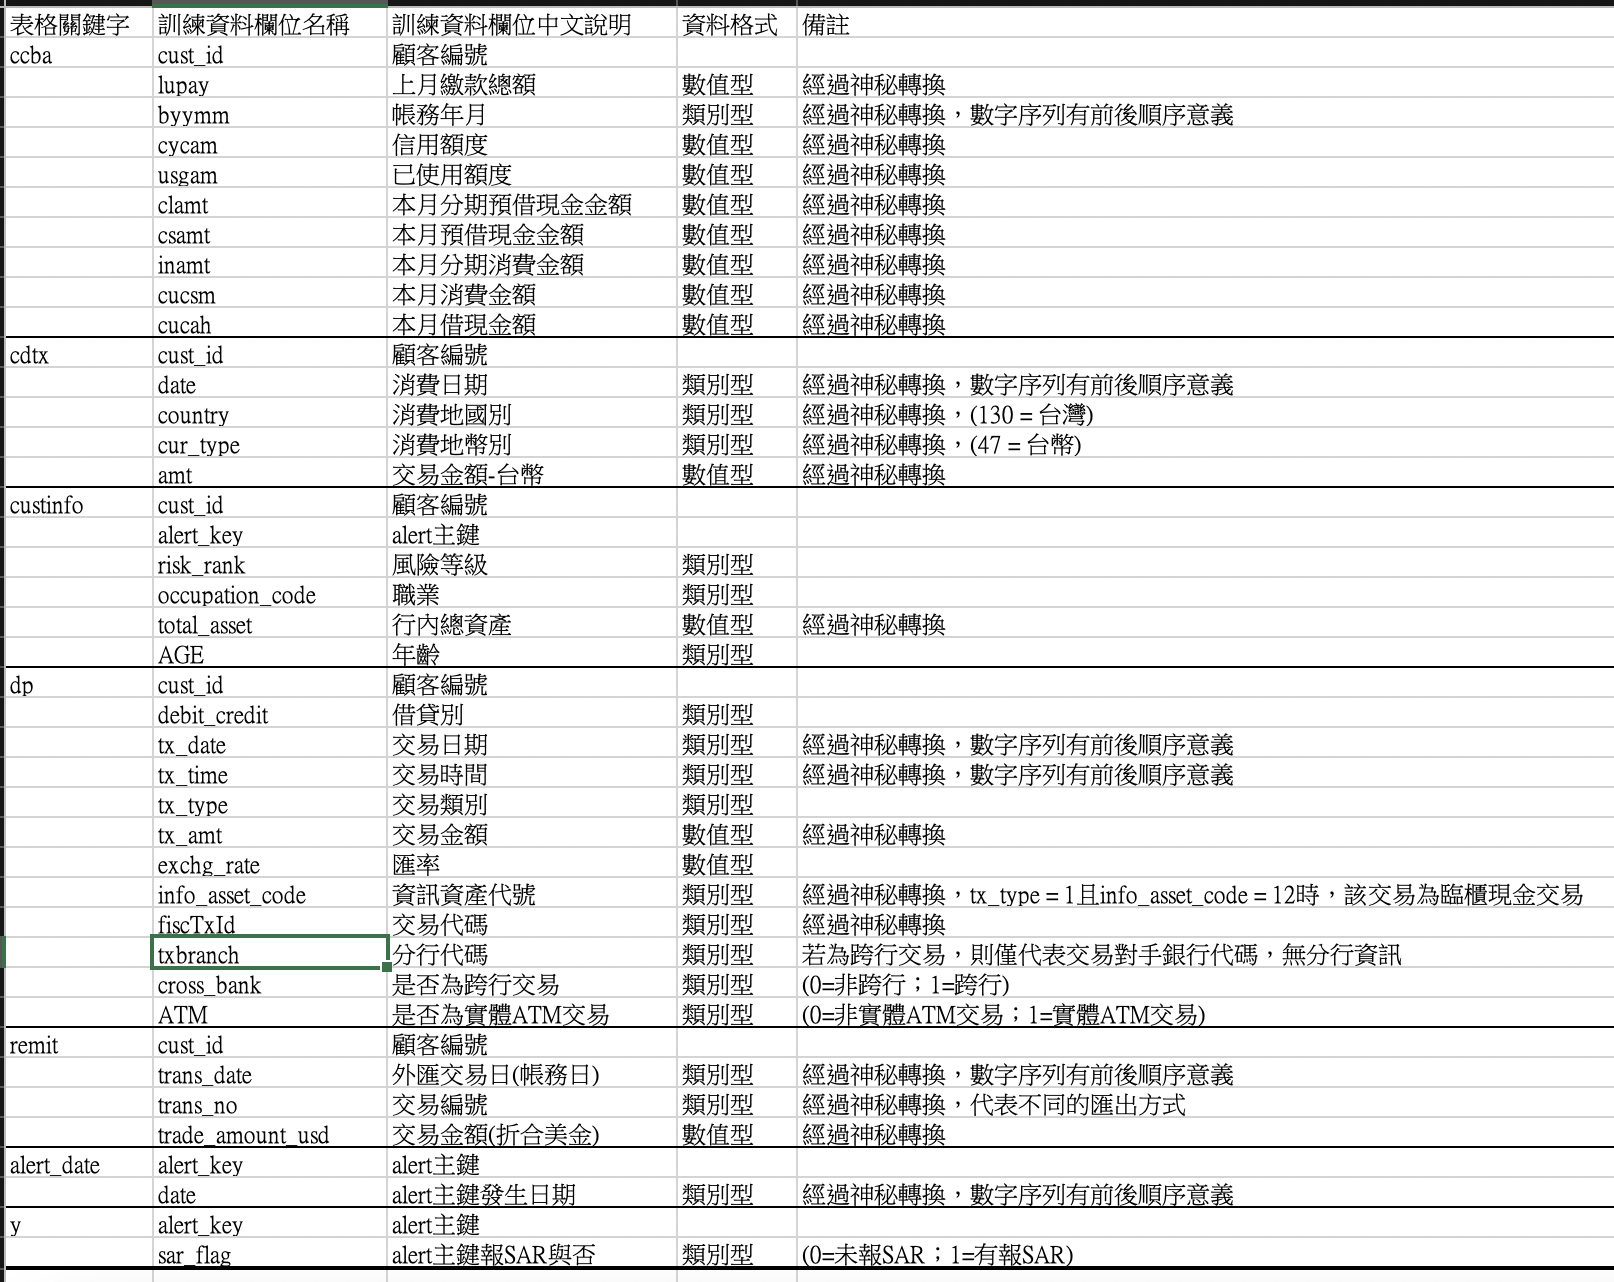

In [3]:
df_ccba = pd.read_csv('training_data_first/public_train_x_ccba_full_hashed.csv')
df_cbtx = pd.read_csv('training_data_first/public_train_x_cdtx0001_full_hashed.csv')
df_custinfo = pd.read_csv('training_data_first/public_train_x_custinfo_full_hashed.csv')
df_dp = pd.read_csv('training_data_first/public_train_x_dp_full_hashed.csv')
df_remit = pd.read_csv('training_data_first/public_train_x_remit1_full_hashed.csv')
df_alertday_public = pd.read_csv('training_data_first/public_x_alert_date.csv')
df_alertday_train = pd.read_csv('training_data_first/train_x_alert_date.csv')
# this seems useless; but maybe can consider it as a predict target?
df_y = pd.read_csv('training_data_first/train_y_answer.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

data = {
    'monthly': df_ccba,
    'transaction': df_cbtx,
    'custinfo': df_custinfo,
    'credit': df_dp,
    'exchange': df_remit,
    'y': df_y,
    'train_date': df_alertday_train,
    'test_date': df_alertday_public
}

In [4]:
len(df_sample_submission)

3850

In [5]:
for name, df in data.items():
    print(name, 'length:', len(df))
    display(df.isna().sum())
    print('-' * 50)

monthly length: 59075


cust_id    0
lupay      0
byymm      0
cycam      0
usgam      0
clamt      0
csamt      0
inamt      0
cucsm      0
cucah      0
dtype: int64

--------------------------------------------------
transaction length: 1043014


cust_id     0
date        0
country     0
cur_type    0
amt         0
dtype: int64

--------------------------------------------------
custinfo length: 25751


alert_key            0
cust_id              0
risk_rank            0
occupation_code    116
total_asset          0
AGE                  0
dtype: int64

--------------------------------------------------
credit length: 1969818


cust_id                  0
debit_credit             0
tx_date                  0
tx_time                  0
tx_type                  0
tx_amt               22015
exchg_rate               0
info_asset_code          0
fiscTxId           1043090
txbranch           1003150
cross_bank               0
ATM                      0
dtype: int64

--------------------------------------------------
exchange length: 17167


cust_id             0
trans_date          0
trans_no            0
trade_amount_usd    0
dtype: int64

--------------------------------------------------
y length: 23906


alert_key    0
sar_flag     0
dtype: int64

--------------------------------------------------
train_date length: 23906


alert_key    0
date         0
dtype: int64

--------------------------------------------------
test_date length: 1845


alert_key    0
date         0
dtype: int64

--------------------------------------------------


## take a look at the distribution of y

<AxesSubplot:>

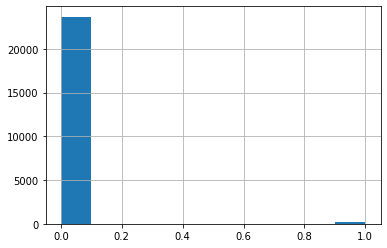

In [6]:
df_y['sar_flag'].hist()

In [7]:
df_y[df_y['sar_flag'] == 1].tail(10)

alert_key  sar_flag
18847     313558         1
18948     316664         1
20439     323358         1
22681     341482         1
22990     343888         1
23164     346021         1
23308     347051         1
23368     347894         1
23572     348724         1
23760     351367         1

## take a look at "one" row of data

In [8]:
df_custinfo[df_custinfo['alert_key'] == 352080]

alert_key                                            cust_id  \
25734     352080  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...   

       risk_rank  occupation_code  total_asset  AGE  
25734          2              9.0      69080.0    6

In [9]:
# look at one customer
# peek_id = df_cbtx.iloc[18, 0]
def show_alert_key_info(alert_key): # 352132
    '''
    a function to preliminary inspect a "alert key" of data
    '''
    peek_id = df_custinfo[df_custinfo['alert_key'] == alert_key]['cust_id'].values[0]
    print('ccba')
    display(df_ccba.groupby('cust_id').get_group(peek_id))
    print('cbtx') # not every cust_id exist in each df
    display(df_cbtx.groupby('cust_id').get_group(peek_id))
    print('dp')
    display(df_dp.groupby('cust_id').get_group(peek_id))
    print('remit')
    try:
        display(df_remit.groupby('cust_id').get_group(peek_id))
    except KeyError:
        print('no remit info')
    print('custinfo')
    display(df_custinfo.groupby('cust_id').get_group(peek_id))
    corresponding_alert_key = df_custinfo.groupby('cust_id').get_group(peek_id)['alert_key'].tolist()
    print(corresponding_alert_key)
    print('y') # key is different to cust_id
    display(df_y[df_y['alert_key'].isin(corresponding_alert_key)])
    display(df_alertday_train[df_alertday_train['alert_key'].isin(corresponding_alert_key)])
    print('public set')
    display(df_alertday_public[df_alertday_public['alert_key'].isin(corresponding_alert_key)])
    print('sample_submission')
    display(df_sample_submission[df_sample_submission['alert_key'].isin(corresponding_alert_key)])

In [10]:
# 352132
# 171770
show_alert_key_info(352132)

ccba


cust_id     lupay  byymm  \
4730  c49b33d1fde790ec03584672903f296e486615adfdc989...  190069.0      0   
4731  c49b33d1fde790ec03584672903f296e486615adfdc989...  532534.0     30   
4732  c49b33d1fde790ec03584672903f296e486615adfdc989...  286675.0     61   
4733  c49b33d1fde790ec03584672903f296e486615adfdc989...  205338.0     91   
4734  c49b33d1fde790ec03584672903f296e486615adfdc989...  265789.0    122   
4735  c49b33d1fde790ec03584672903f296e486615adfdc989...  317495.0    153   
4736  c49b33d1fde790ec03584672903f296e486615adfdc989...  210934.0    183   
4737  c49b33d1fde790ec03584672903f296e486615adfdc989...  597162.0    214   
4738  c49b33d1fde790ec03584672903f296e486615adfdc989...  456877.0    244   
4739  c49b33d1fde790ec03584672903f296e486615adfdc989...   17223.0    275   
4740  c49b33d1fde790ec03584672903f296e486615adfdc989...  219133.0    306   
4741  c49b33d1fde790ec03584672903f296e486615adfdc989...  213184.0    334   
4742  c49b33d1fde790ec03584672903f296e486615adfdc989...  187494.0    365   

         cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
4730  306146.0  273225.0    0.0    0.0    0.0  265209.0    0.0  
4731  357170.0   53545.0    0.0    0.0    0.0  285761.0    0.0  
4732  306146.0  216241.0    0.0    0.0    0.0  204745.0    0.0  
4733  306146.0   72618.0    0.0    0.0    0.0  265322.0    0.0  
4734  357170.0   72958.0    0.0    0.0    0.0  316531.0    0.0  
4735  306146.0  217278.0    0.0    0.0    0.0  210570.0    0.0  
4736  306146.0  215772.0    0.0    0.0    0.0  188442.0    0.0  
4737  408194.0  188693.0    0.0    0.0    0.0  586995.0    0.0  
4738  408194.0   30795.0    0.0    0.0    0.0  292056.0    0.0  
4739  408194.0  251529.0    0.0    0.0    0.0  218397.0    0.0  
4740  306146.0  244451.0    0.0    0.0    0.0  212027.0    0.0  
4741  306146.0  200625.0    0.0    0.0    0.0  186552.0    0.0  
4742  306146.0  286696.0    0.0    0.0    0.0  254213.0    0.0

cbtx


cust_id  date  country  \
98328   c49b33d1fde790ec03584672903f296e486615adfdc989...     1      130   
98329   c49b33d1fde790ec03584672903f296e486615adfdc989...     1      130   
98330   c49b33d1fde790ec03584672903f296e486615adfdc989...     2      130   
98331   c49b33d1fde790ec03584672903f296e486615adfdc989...     3      130   
98332   c49b33d1fde790ec03584672903f296e486615adfdc989...     2      130   
...                                                   ...   ...      ...   
101580  c49b33d1fde790ec03584672903f296e486615adfdc989...   393      130   
101581  c49b33d1fde790ec03584672903f296e486615adfdc989...   393      130   
101582  c49b33d1fde790ec03584672903f296e486615adfdc989...   392      130   
101583  c49b33d1fde790ec03584672903f296e486615adfdc989...   394      130   
101584  c49b33d1fde790ec03584672903f296e486615adfdc989...   390      130   

        cur_type     amt  
98328         47  1609.0  
98329         47    77.0  
98330         47   127.0  
98331         47    40.0  
98332         47   167.0  
...          ...     ...  
101580        47   283.0  
101581        47   308.0  
101582        47    31.0  
101583        47    31.0  
101584        47  8832.0  

[3257 rows x 5 columns]

dp


cust_id debit_credit  \
337312  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337313  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
337314  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
337315  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337316  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
...                                                   ...          ...   
337464  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337465  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337466  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337467  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
337468  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
337312      225       16        2  279668.0       1.000                6   
337313      235        9        2  270079.0       1.000               16   
337314      228       15        2   23113.0       1.000                6   
337315       81        0        2  155604.0       1.000               16   
337316      327        9        2  198372.0       1.000               16   
...         ...      ...      ...       ...         ...              ...   
337464      351       20        2   40973.0       4.441               20   
337465      349       15        2    1002.0      28.616               20   
337466      334       13        2  139309.0       1.000               13   
337467      357       17        2  286812.0       1.000               13   
337468      356       15        2    2766.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
337312       NaN       NaN           0    0  
337313       NaN       NaN           0    0  
337314       NaN       NaN           0    0  
337315       NaN       NaN           0    0  
337316       NaN       NaN           0    0  
...          ...       ...         ...  ...  
337464       NaN       NaN           0    1  
337465       NaN       NaN           0    1  
337466       4.0     141.0           1    1  
337467       4.0       0.0           0    1  
337468       NaN       NaN           0    0  

[157 rows x 12 columns]

remit


cust_id  trans_date  trans_no  \
3951  c49b33d1fde790ec03584672903f296e486615adfdc989...         228         4   

      trade_amount_usd  
3951          364459.0

custinfo


alert_key                                            cust_id  \
766       357526  c49b33d1fde790ec03584672903f296e486615adfdc989...   
1160      360094  c49b33d1fde790ec03584672903f296e486615adfdc989...   
25519     350046  c49b33d1fde790ec03584672903f296e486615adfdc989...   
25676     351377  c49b33d1fde790ec03584672903f296e486615adfdc989...   
25750     352132  c49b33d1fde790ec03584672903f296e486615adfdc989...   

       risk_rank  occupation_code  total_asset  AGE  
766            1             19.0    3218731.0    3  
1160           1             19.0    3218731.0    3  
25519          1             19.0    1075983.0    3  
25676          1             19.0    1075983.0    3  
25750          1             19.0    3218731.0    3

[357526, 360094, 350046, 351377, 352132]
y


alert_key  sar_flag
23649     350046         0
23807     351377         0
23901     352132         0

alert_key  date
23649     350046   361
23807     351377   363
23901     352132   364

public set


alert_key  date
193     357526   370
712     360094   377

sample_submission


alert_key  probability
1972     357526     0.507329
2282     360094     0.587626

In [11]:
class Preprocess:
    '''
    class for storing all function for preprocessing
    not storing data here, this may not be a good class using example
    the spirit of class: data with operation
    maybe better way: open another script name "preprocess.py" and store these code
    but now in the developing process, everything is dynamic, so it is ok
    '''
    def __init__(self, data):
        self.data = data
        self.history_data_names = ['monthly', 'transaction', 'credit', 'exchange']
        self.groupby = {k: data[k].groupby('cust_id') for k in self.history_data_names}
    
    @staticmethod
    def collect_history(df_groupby, id_, date, date_key, id_key='cust_id'):
        '''
        df: target feature DataFrame
        id_: the customer id
        date: the date of "now"
        date_key: column name for the date
        id_key: column name for id_
        '''
        try:
            # doing groupby when iterate each row is waste of time
            df_person = df_groupby.get_group(id_)
            history = df_person[df_person[date_key] <= date]
        except KeyError:
            history = None
        return history
    
    def collect_one_row_data(
        self,
        alert_key, 
        train=True, 
        key_name='alert_key', 
        id_key='cust_id',
        label_name='sar_flag',
        date_name='date',
    ):
        
        # collect timestamp data
        row_main = self.data['custinfo'][self.data['custinfo'][key_name] == alert_key]
        cust_id = row_main[id_key].values[0]
        if train:
            y = self.data['y'][self.data['y'][key_name] == alert_key][label_name].values[0]
            date = self.data['train_date'][self.data['train_date'][key_name] == alert_key][date_name].values[0]
        else:
            date = self.data['test_date'][self.data['test_date'][key_name] == alert_key][date_name].values[0]
            y = None
        personal_info = {
            'age': row_main['AGE'].values[0],
            'occupation': row_main['occupation_code'].values[0],
            'total_asset': row_main['total_asset'].values[0],
            'risk_rank': row_main['risk_rank'].values[0],
        }

        # collect history data
        history_ccba = self.collect_history(self.groupby['monthly'], cust_id, date, 'byymm')
        history_cbtx = self.collect_history(self.groupby['transaction'], cust_id, date, 'date')
        history_dp = self.collect_history(self.groupby['credit'], cust_id, date, 'tx_date')
        history_remit = self.collect_history(self.groupby['exchange'], cust_id, date, 'trans_date')

        # collect all data as a dictionary
        row_data = {
            'alert_key': alert_key,
            'personal_info': personal_info,
            'cust_id': cust_id,
            'date': date,
            'y': y,
            'monthly': history_ccba,
            'transaction': history_cbtx,
            'credit': history_dp,
            'exchange': history_remit
        }

        return row_data

In [12]:
p = Preprocess(data)

In [13]:
for key in df_y[df_y['sar_flag'] == 1]['alert_key'].values:
    print('key:', key)
    d = p.collect_one_row_data(key)
    for k, v in d.items():
        print(k)
        display(v)

key: 171770
alert_key


171770

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 1913895.0, 'risk_rank': 1}

cust_id


'25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c5106edffaa7943b284e9a'

date


0

y


1

monthly


cust_id    lupay  byymm  \
13853  25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...  11650.0      0   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
13853  509326.0  24500.0    0.0    0.0  775.0  22940.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
659693  25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...           DB   
659697  25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
659693        0       13        1  1045550.0         1.0               12   
659697        0       13        2   230477.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
659693       NaN       NaN           0    0  
659697       NaN     142.0           1    1

exchange


None

key: 172480
alert_key


172480

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 8251.0, 'risk_rank': 3}

cust_id


'7fde997da7e7a95280460889004bd2f23050bd8953de7ea648bd3fd9fc977fde'

date


5

y


1

monthly


cust_id    lupay  byymm  \
32600  7fde997da7e7a95280460889004bd2f23050bd8953de7e...  30355.0      0   

         cycam   usgam  clamt  csamt  inamt    cucsm  cucah  
32600  60710.0  5069.0    0.0    0.0    0.0  15918.0    0.0

transaction


cust_id  date  country  \
645135  7fde997da7e7a95280460889004bd2f23050bd8953de7e...     2      130   
645136  7fde997da7e7a95280460889004bd2f23050bd8953de7e...     3      130   
645137  7fde997da7e7a95280460889004bd2f23050bd8953de7e...     3      130   
645138  7fde997da7e7a95280460889004bd2f23050bd8953de7e...     1      130   
645139  7fde997da7e7a95280460889004bd2f23050bd8953de7e...     5      130   
645140  7fde997da7e7a95280460889004bd2f23050bd8953de7e...     5      130   
645142  7fde997da7e7a95280460889004bd2f23050bd8953de7e...     1      130   

        cur_type     amt  
645135        47   307.0  
645136        47    56.0  
645137        47   405.0  
645138        47    40.0  
645139        47  1751.0  
645140        47   101.0  
645142        47   121.0

credit


cust_id debit_credit  \
1216087  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           DB   
1216095  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           CR   
1216096  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           DB   
1216097  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           DB   
1216102  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           CR   
1216104  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           DB   
1216108  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           CR   
1216112  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           CR   
1216115  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           DB   
1216116  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           CR   
1216117  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           CR   
1216120  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           DB   
1216121  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           DB   
1216122  7fde997da7e7a95280460889004bd2f23050bd8953de7e...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1216087        0       15        2   51523.0         1.0               13   
1216095        0       15        1   12053.0         1.0               13   
1216096        1        0        2   17116.0         1.0               13   
1216097        1        0        2    4505.0         1.0               13   
1216102        1        0        1   51523.0         1.0               13   
1216104        0       15        2   12377.0         1.0               13   
1216108        0       15        1  103031.0         1.0               13   
1216112        0       15        1    7432.0         1.0               13   
1216115        0       15        2   21958.0         1.0               13   
1216116        1        0        1    4136.0         1.0               13   
1216117        0       15        1    2575.0         1.0               13   
1216120        0       15        2   22164.0         1.0               13   
1216121        1        0        2   16276.0         1.0               13   
1216122        1        0        1   15180.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1216087       4.0       0.0           0    1  
1216095      20.0     133.0           0    1  
1216096       4.0       0.0           0    1  
1216097       4.0       0.0           0    1  
1216102      20.0     133.0           0    1  
1216104       4.0       0.0           0    1  
1216108      20.0     133.0           0    1  
1216112      20.0     133.0           0    1  
1216115       4.0       0.0           0    1  
1216116      20.0     133.0           0    1  
1216117      20.0     133.0           0    1  
1216120       4.0       0.0           0    1  
1216121       4.0       0.0           0    1  
1216122      20.0     133.0           0    1

exchange


None

key: 174298
alert_key


174298

personal_info


{'age': 7, 'occupation': 19.0, 'total_asset': 186714.0, 'risk_rank': 1}

cust_id


'bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f59730ccbf90c5092da8349'

date


7

y


1

monthly


cust_id    lupay  byymm  \
45760  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...  76645.0      0   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
45760  130031.0  74982.0    0.0    0.0    0.0  74982.0    0.0

transaction


cust_id  date  country  \
833340  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...     2      130   
833341  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...     2      130   

        cur_type     amt  
833340        47  3730.0  
833341        47  1224.0

credit


cust_id debit_credit  \
1576440  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           DB   
1576444  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1576446  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1576447  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1576973  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1576974  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1576975  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           DB   
1576977  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1576980  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1576983  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1576984  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1576987  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           DB   
1576998  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1577005  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1577007  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1577008  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1577012  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           DB   
1577013  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1577016  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1577017  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           DB   
1577019  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1577020  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1577024  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           DB   
1577028  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1577040  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   
1577041  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1576440        6       14        2     1026.0       1.000                6   
1576444        6       12        2    18044.0      28.445               20   
1576446        0       17        2  5548675.0      28.525               20   
1576447        5       17        2   733371.0      28.505               20   
1576973        7       11        1    83608.0       1.000               13   
1576974        7        2        2    16750.0       1.000               16   
1576975        0       12        1    50830.0       1.000               12   
1576977        6       12        1    73106.0       1.000               13   
1576980        7       11        1    16155.0       1.000               13   
1576983        7       11        1    46997.0       1.000               13   
1576984        7       11        1    52219.0       1.000               13   
1576987        0       17        2    20887.0      28.525               20   
1576998        7       11        1    26720.0       1.000               13   
1577005        1       16        2     7311.0       1.000               13   
1577007        5       16        2  1462139.0       1.000               13   
1577008        7       11        1     4687.0       1.000               13   
1577012        5       17        2     9986.0      28.505               20   
1577013        6       12        1    10444.0       1.000               13   
1577016        7       11        1    52219.0       1.000               13   
1577017        6       14        2    31331.0       1.000                6   
1577019        6       12        1  2737666.0       1.000               13   
1577020        7       11        1    20887.0       1.000               13   
1577024        6       12        2     6223.0      28.445               20   
1577028        0       16        2    52219.0       1.000               13   
1577040        7       11        1    15914.0       1.000               13 

exchange


cust_id  trans_date  \
13238  bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...           6   

       trans_no  trade_amount_usd  
13238         4           42223.0

key: 177960
alert_key


177960

personal_info


{'age': 2, 'occupation': 9.0, 'total_asset': 238193.0, 'risk_rank': 1}

cust_id


'26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331c96d2b0c8536cbf132'

date


12

y


1

monthly


cust_id    lupay  byymm  \
14034  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...  31162.0      0   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
14034  103320.0  96070.0    0.0    0.0    0.0  95047.0    0.0

transaction


cust_id  date  country  \
239789  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     0       93   
239790  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     0      130   
239791  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     2      119   
239792  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     1       94   
239793  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     4      130   
239794  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     3      130   
239795  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     0      130   
239796  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     7      130   
239797  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     6      130   
239798  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     7      130   
239799  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     8       94   
239800  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...    11       94   
239801  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     9       93   
239802  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...     7      130   

        cur_type      amt  
239789        50     65.0  
239790        47    517.0  
239791        47    279.0  
239792        50     65.0  
239793        47   1059.0  
239794        47    237.0  
239795        47    181.0  
239796        47   2841.0  
239797        47    517.0  
239798        47  20983.0  
239799        50     98.0  
239800        50     98.0  
239801        50    199.0  
239802        47     83.0

credit


cust_id debit_credit  \
662981  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...           CR   
662984  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...           DB   
662988  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...           CR   
662990  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...           CR   
662991  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...           CR   
...                                                   ...          ...   
663311  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...           CR   
663312  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...           CR   
663313  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...           CR   
663314  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...           CR   
663315  26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
662981        2       17        2   78913.0         1.0               13   
662984       12       12        2   60396.0         1.0               13   
662988        5       13        2   27881.0         1.0               13   
662990        8       22        1   45447.0         1.0               13   
662991       11       22        1    4555.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
663311        1       15        2   15072.0         1.0               13   
663312        1        7        2  166296.0         1.0               13   
663313        8        3        2   18757.0         1.0               16   
663314        8       13        2  330541.0         1.0               13   
663315        0       14        2   32970.0         1.0               16   

        fiscTxId  txbranch  cross_bank  ATM  
662981       4.0     310.0           1    1  
662984       4.0       0.0           0    1  
662988       4.0     313.0           1    1  
662990      20.0     122.0           0    1  
662991      20.0     108.0           0    1  
...          ...       ...         ...  ...  
663311       4.0     147.0           1    1  
663312       4.0     147.0           1    1  
663313       NaN       NaN           0    0  
663314       NaN     313.0           1    1  
663315       NaN       NaN           0    0  

[156 rows x 12 columns]

exchange


None

key: 177788
alert_key


177788

personal_info


{'age': 5, 'occupation': 15.0, 'total_asset': 1744729.0, 'risk_rank': 1}

cust_id


'6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c23aef68c7c74b36464c'

date


12

y


1

monthly


cust_id    lupay  byymm  \
26574  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...  13880.0      0   

          cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
26574  417806.0  6889.0    0.0    0.0    0.0  6889.0    0.0

transaction


cust_id  date  country  \
534513  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...     1      130   
534514  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...     3      130   
534515  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...     4      130   
534516  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...     2      130   
534517  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...     4      130   
534518  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...     9      130   
534519  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...     9      130   

        cur_type    amt  
534513        47  104.0  
534514        47  342.0  
534515        47   13.0  
534516        47   10.0  
534517        47   11.0  
534518        47   89.0  
534519        47  132.0

credit


cust_id debit_credit  \
1030580  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030589  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030590  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030592  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030593  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030594  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030596  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030598  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030601  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030602  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030607  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030608  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030610  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030614  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030615  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030620  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030624  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030627  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030629  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030637  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030638  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030639  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030640  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030643  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030645  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030650  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030655  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030656  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030657  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030658  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030659  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   
1030660  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030665  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030667  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           CR   
1030669  6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...           DB   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1030580        0       14        2  4604787.0         1.0               13   
1030589        0       12        2    37207.0         1.0                4   
1030590       11       10        1   109369.0         1.0               13   
1030592       11       23        2    73712.0         1.0                2   
1030593        1       16        2    36784.0         1.0                1   
1030594        6       21        1    73712.0         1.0               13   
1030596        4       16        2    36856.0         1.0               13   
1030598        6       21        1    36701.0         1.0               13   
1030601        9       18        1    36763.0         1.0               13   
1030602       12       12        2    37207.0         1.0                4   
1030607        2        7        2   103238.0         1.0                1   
1030608        4       16        2    74435.0         1.0               13   
1030610        5        1        2     2865.0         1.0               16   
1030614       12       11        1    36701.0         1.0               13   
1030615        0       16        2    36804.0         1.0               13   
1030620        8       22        2    37217.0         1.0                2   
1030624       11       1

exchange


None

key: 178503
alert_key


178503

personal_info


{'age': 5, 'occupation': 17.0, 'total_asset': 5757.0, 'risk_rank': 1}

cust_id


'09cfe320cde830391166990ddc4a835bd543e7cd26400b50dcd8a855be309379'

date


13

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
425723  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425724  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           DB   
425725  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425726  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           DB   
425727  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           DB   
425729  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425730  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425731  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425732  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425733  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425734  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425735  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425736  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425738  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   
425739  09cfe320cde830391166990ddc4a835bd543e7cd26400b...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
425723       13       12        1    85077.0         1.0               13   
425724       13       13        2   362949.0         1.0               13   
425725       13       12        1   308189.0         1.0               13   
425726       13       12        1     1545.0         1.0               13   
425727        7       13        2     2819.0         1.0               13   
425729        6       20        1   157021.0         1.0               13   
425730       13       12        1    28597.0         1.0               13   
425731        6       20        1    46659.0         1.0               13   
425732       13       12        1   156569.0         1.0               13   
425733       13       15        2   596217.0         1.0                1   
425734        6       20        1   663598.0         1.0               13   
425735       13       12        1    14087.0         1.0               13   
425736       13       12        1  1317596.0         1.0               13   
425738        6       20        1   109258.0         1.0               13   
425739        6       20        1    57028.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
425723      20.0       2.0           0    1  
425724       4.0       0.0           0    1  
425725      20.0       2.0           0    1  
425726      21.0       2.0           0    1  
425727       4.0       0.0           0    1  
425729      20.0     128.0           0    1  
425730      20.0       2.0           0    1  
425731      20.0     128.0           0    1  
425732      20.0       2.0           0    1  
425733       NaN       NaN           0    1  
425734      20.0     128.0           0    1  
425735      20.0       2.0           0    1  
425736      20.0       2.0           0    1  
425738      20.0     128.0           0    1  
425739      20.0     128.0           0    1

exchange


Empty DataFrame
Columns: [cust_id, trans_date, trans_no, trade_amount_usd]
Index: []

key: 179086
alert_key


179086

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 5476.0, 'risk_rank': 1}

cust_id


'46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e6a67723a4140822381'

date


13

y


1

monthly


cust_id    lupay  byymm  \
20567  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...  58354.0      0   

          cycam     usgam  clamt  csamt  inamt   cucsm  cucah  
20567  308582.0  303649.0    0.0    0.0    0.0  3115.0    0.0

transaction


cust_id  date  country  \
443202  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...     0      119   
443203  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...     7      130   

        cur_type     amt  
443202        46   176.0  
443203        47  1029.0

credit


cust_id debit_credit  \
886145  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886151  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886160  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886161  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886164  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886165  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886167  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886169  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886176  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886179  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886181  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886185  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886187  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886190  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886196  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886208  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886217  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886221  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886229  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886235  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886236  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886237  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886241  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886243  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886255  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886258  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886260  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886261  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886272  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886278  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886281  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886284  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886300  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886302  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886303  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886308  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886316  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886321  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886356  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886361  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886363  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886365  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886367  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886368  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886371  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886373  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886381  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886384  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886398  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886404  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886406  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886410  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           DB   
886426  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           CR   
886437  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e

exchange


cust_id  trans_date  trans_no  \
7292  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           5         0   
7293  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           0         0   
7294  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           6         0   
7295  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           7         0   
7296  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...           8         0   
7297  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...          11         0   
7298  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...          12         0   
7299  46eb67c442f694abfcef7f36fe5a30e7d98addbe6e8d3e...          13         0   

      trade_amount_usd  
7292           10286.0  
7293            7200.0  
7294           16663.0  
7295           23041.0  
7296           36704.0  
7297           36824.0  
7298           43201.0  
7299           53488.0

key: 180223
alert_key


180223

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 71303.0, 'risk_rank': 1}

cust_id


'df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb02774049dcff2b473d'

date


14

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1756145  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756148  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756149  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756152  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756153  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756154  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756155  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756162  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756164  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756168  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756171  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756172  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756176  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756177  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756179  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756180  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756181  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756184  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756191  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756192  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756193  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756195  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756197  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756198  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756199  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756200  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756202  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756203  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756206  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756211  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756214  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756215  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756216  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           DB   
1756217  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756218  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756219  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756221  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756222  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756224  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756225  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   
1756226  df687b19349040a877e7dcbfdee38d1b26286dc0fb37cb...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1756145       12       12        2   2652.0         1.0               13   
1756148       12       21        2   3640.0         1.0               13   
1756149       10        0        2    291.0         1.0               13   
1756152       10        0        2    468.0         1.0               13   
1756153       13       23        2  50962.0         1.0               13   
1756154       14       21        1  25481.0         1.0               13   
1756155        6       13        1   5741.0         1.0               13   
1756162        9       21        2   4888.0         1.0               13   
1756164        6       14        2    624.0         1.0               16   
1756168        7       13        2    936.0         1.0               13   
1756171        2       12        2   1248.0         1.0         

exchange


None

key: 179789
alert_key


179789

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 6.0, 'risk_rank': 1}

cust_id


'1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5dc6dbbed9ba609cd134'

date


14

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
602841  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   
602842  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   
602843  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   
602844  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   
602845  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   
602846  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   
602847  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   
602850  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           DB   
602853  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           DB   
602855  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   
602857  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           DB   
602859  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           DB   
602860  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   
602863  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           DB   
602864  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   
602866  1aadc240bbe9a3244352f57603bbe2d706d7760dc81f5d...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
602841       14       10        2   15032.0         1.0               13   
602842       14       10        2    1928.0         1.0               13   
602843        4       10        1   64688.0         1.0               13   
602844       14       11        2    5021.0         1.0               13   
602845       14       10        2    1617.0         1.0               13   
602846       14       10        2   16534.0         1.0               13   
602847       14       10        2   20037.0         1.0               13   
602850       14       12        2    2017.0         1.0               13   
602853       14       11        1   35655.0         1.0               12   
602855       14       10        2   15933.0         1.0               13   
602857        4       10        2   98033.0         1.0               13   
602859       14       14        2   12169.0         1.0               13   
602860       14       11        2   43477.0         1.0               13   
602863        4       10        2   43477.0         1.0               13   
602864       14       10        2   74460.0         1.0               13   
602866       14       11        2  101282.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
602841       4.0     147.0           1    1  
602842       4.0     147.0           1    1  
602843      20.0      28.0           0    1  
602844       4.0     147.0           1    1  
602845       4.0     147.0           1    1  
602846       4.0     147.0           1    1  
602847       4.0     147.0           1    1  
602850       4.0       0.0           0    1  
602853       NaN       NaN           0    0  
602855       4.0     147.0           1    1  
602857       3.0     147.0           1    1  
602859       4.0       0.0           0    1  
602860       4.0     147.0           1    1  
602863       3.0     147.0           1    1  
602864       4.0     147.0           1    1  
602866       4.0     147.0           1    1

exchange


None

key: 181241
alert_key


181241

personal_info


{'age': 4, 'occupation': 13.0, 'total_asset': 894325.0, 'risk_rank': 1}

cust_id


'fbc356085009ea946023d5fa8e4d8c6051716945501e79e489f0f7a9a7d24bf9'

date


18

y


1

monthly


cust_id   lupay  byymm  \
58199  fbc356085009ea946023d5fa8e4d8c6051716945501e79...  7420.0      0   

          cycam    usgam  clamt  csamt    inamt    cucsm  cucah  
58199  146538.0  97884.0    0.0    0.0  12126.0  37265.0    0.0

transaction


cust_id  date  country  \
1031777  fbc356085009ea946023d5fa8e4d8c6051716945501e79...     5      130   
1031778  fbc356085009ea946023d5fa8e4d8c6051716945501e79...     1      130   
1031779  fbc356085009ea946023d5fa8e4d8c6051716945501e79...    18      130   

         cur_type     amt  
1031777        47  1435.0  
1031778        47  1413.0  
1031779        47   419.0

credit


cust_id debit_credit  \
1953042  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953044  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953046  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953048  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953052  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953054  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953055  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953058  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953063  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953064  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953072  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953080  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953081  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953083  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953084  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953087  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953089  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953092  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953096  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953099  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953100  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953102  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953107  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953110  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953116  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953120  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953124  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953126  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953128  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953129  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953131  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953132  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953133  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953134  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953137  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953142  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953145  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953146  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953150  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953152  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953154  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953162  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953166  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953167  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953168  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953173  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953177  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953179  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953183  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953186  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   
1953188  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           CR   
1953189  fbc356085009ea946023d5fa8e4d8c6051716945501e79...           DB   

         tx_date  tx_time  tx_type      tx_amt  exchg_rate  info_asset_code

exchange


None

key: 181742
alert_key


181742

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 741614.0, 'risk_rank': 1}

cust_id


'dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2136db19834f8630184'

date


19

y


1

monthly


cust_id    lupay  byymm  \
51845  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...  44965.0      0   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
51845  308769.0  31547.0    0.0    0.0    0.0  28171.0    0.0

transaction


cust_id  date  country  \
933371  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...     7      130   
933372  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...     7      130   
933373  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...    14      130   
933374  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...    17      130   

        cur_type     amt  
933371        47  2986.0  
933372        47  1327.0  
933373        47   984.0  
933374        47   902.0

credit


cust_id debit_credit  \
1737423  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...           DB   
1737425  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...           DB   
1737429  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...           DB   
1737430  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...           DB   
1737431  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...           DB   
1737433  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...           CR   
1737434  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...           DB   
1737437  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...           DB   
1737439  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...           CR   
1737440  dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1737423        0        3        2   1591.0         1.0               16   
1737425        0        3        2   2132.0         1.0               16   
1737429       14       13        1    162.0         1.0               12   
1737430        6       15        1    359.0         1.0               12   
1737431       12        2        2    272.0         1.0               16   
1737433        5       11        2   1208.0         1.0               13   
1737434       15        9        1    308.0         1.0               12   
1737437        0        0        2    318.0         1.0               16   
1737439       11       10        2  33125.0         1.0               13   
1737440       19       15        1   1529.0         1.0               12   

         fiscTxId  txbranch  cross_bank  ATM  
1737423       NaN       NaN           0    0  
1737425       NaN       NaN           0    0  
1737429       NaN       NaN           0    0  
1737430       NaN       NaN           0    0  
1737431       NaN       NaN           0    0  
1737433       NaN     167.0           1    1  
1737434       NaN       NaN           0    0  
1737437       NaN       NaN           0    0  
1737439       NaN     167.0           1    1  
1737440       NaN       NaN           0    0

exchange


None

key: 182686
alert_key


182686

personal_info


{'age': 4, 'occupation': 9.0, 'total_asset': 3626612.0, 'risk_rank': 1}

cust_id


'c550e92641bad9c3f314f489be543aa9066c7c09adbff9ea781a65801370c3f6'

date


21

y


1

monthly


cust_id  lupay  byymm  \
47223  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...    0.0      0   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
47223  50406.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1621692  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621693  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           DB   
1621695  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           DB   
1621696  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621697  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621698  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621700  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621703  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621704  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621705  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621707  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           DB   
1621708  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621709  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621710  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621711  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621712  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621713  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621714  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           DB   
1621716  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621717  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621718  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621719  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621720  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   
1621721  c550e92641bad9c3f314f489be543aa9066c7c09adbff9...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1621692       10       22        1   2460.0         1.0               13   
1621693       13        6        2   1240.0         1.0               16   
1621695       13       11        2    820.0         1.0               13   
1621696       14        8        1   2050.0         1.0               13   
1621697       14        8        1   1025.0         1.0               13   
1621698       10       22        1    830.0         1.0               13   
1621700        6        6        2   3259.0         1.0               16   
1621703        5        6        2   9512.0         1.0               16   
1621704       21       19        1   9532.0         1.0               13   
1621705       14        8        1   1435.0         1.0               13   
1621707       15        9        2  27670.0         1.0               13   
1621708        5        0        1  27673.0         1.0               13   
1621709        4       23        1   1025.0         1.0               13   
1621710       21       19        1     85.0         1.0               13   
1621711       10       22        1   1395.0         1.0               13   
1621712        5        0        1   5125.0         1.0               13   
1621713       21       19        1    620.0         1.0               13   
1621714        7       10        2   1127.0         1.0               13   
1621716       14        7        1    154.0         1.0               13   
1621717       21       19        1    328.0         1.0               13   
1621718       12        8        2    425.0         1.0               16   
1621719        5        0        1     72.0         1.0               13   
1621720       21       19        1   1025.0         1.0               13   
1621721        5        0        1  25382.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1621692      20.0     128.0           0    1  
1621693       NaN       NaN           0    0  
1621695       4.0       0.0           0    1  
1621696      20.0      79.0           0    1  
1621697      20.0      79.0           0

exchange


None

key: 184304
alert_key


184304

personal_info


{'age': 2, 'occupation': 14.0, 'total_asset': 1678.0, 'risk_rank': 1}

cust_id


'1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636c504a558b04df51961'

date


25

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
601596  1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636...           CR   
601597  1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636...           DB   
601598  1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636...           CR   
601599  1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636...           CR   
601600  1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636...           CR   
...                                                   ...          ...   
601708  1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636...           CR   
601709  1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636...           DB   
601710  1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636...           DB   
601711  1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636...           CR   
601712  1a895c2b35e4efbe1e51c84926dae1b8b0287bc036e636...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
601596       17       17        2  164697.0         1.0               15   
601597       20       11        2  110141.0         1.0               13   
601598       21       10        2   82349.0         1.0               12   
601599       15       17        2  205872.0         1.0               15   
601600       16       14        2  432331.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
601708       20       10        2     163.0         1.0               15   
601709       17       14        2    1251.0         1.0               13   
601710       18       13        2  411744.0         1.0               13   
601711       16       21        1  291309.0         1.0               13   
601712       18       16        2    1040.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
601596       NaN       NaN           0    1  
601597       4.0       0.0           0    1  
601598       NaN       NaN           0    0  
601599       NaN       NaN           0    1  
601600       4.0     313.0           1    1  
...          ...       ...         ...  ...  
601708       NaN       NaN           0    1  
601709       4.0       0.0           0    1  
601710       4.0       0.0           0    1  
601711      20.0      10.0           0    1  
601712       4.0       0.0           0    1  

[109 rows x 12 columns]

exchange


None

key: 184729
alert_key


184729

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 9909.0, 'risk_rank': 1}

cust_id


'12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e9187a67cdcf485350f'

date


26

y


1

monthly


Empty DataFrame
Columns: [cust_id, lupay, byymm, cycam, usgam, clamt, csamt, inamt, cucsm, cucah]
Index: []

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
157574  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           CR   
157576  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           DB   
157577  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           DB   
157578  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           CR   
157580  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           DB   
157581  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           DB   
157582  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           DB   
157583  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           CR   
157584  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           CR   
157585  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           DB   
157588  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           CR   
157589  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           CR   
157591  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           DB   
157597  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           DB   
157598  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           CR   
157599  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
157574       14       13        2   2717.0       28.47               20   
157576       18        9        2  13264.0       28.36               20   
157577       22       12        2  22447.0       28.17               20   
157578       26       10        2   4016.0       27.92               20   
157580       26       11        2   1240.0       27.92               20   
157581       25       10        2  14080.0       28.03               20   
157582        7       10        2  14080.0       28.47               20   
157583       15       17        2  33234.0       28.38               20   
157584       25       10        2  46984.0       28.03               20   
157585       19       16        2  16325.0       28.16               20   
157588       19       16        2   1686.0       28.16               20   
157589        7       10        2  79585.0       28.47               20   
157591       22        9        2  10203.0       28.17               20   
157597       14       13        2   1020.0       28.47               20   
157598       22       11        2   1686.0       28.17               20   
157599       21       18        2   6515.0       28.16               20   

        fiscTxId  txbranch  cross_bank  ATM  
157574       NaN       NaN           0    1  
157576       NaN       NaN           0    1  
157577       NaN       NaN           0    1  
157578       NaN       NaN           0    1  
157580       NaN       NaN           0    1  
157581       NaN       NaN           0    1  
157582       NaN       NaN           0    1  
157583       NaN       NaN           0    1  
157584       NaN       NaN           0    1  
157585       NaN       NaN           0    1  
157588       NaN       NaN           0    1  
157589       NaN       NaN           0    1  
157591       NaN       NaN           0    1  
157597       NaN       NaN           0    1  
157598       NaN       NaN           0    1  
157599       NaN       NaN           0    1

exchange


cust_id  trans_date  trans_no  \
294  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...           7         0   
295  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...          14         0   
296  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...          18         0   
297  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...          19         0   
298  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...          22         0   
299  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...          22         0   
300  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...          25         0   
301  12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...          26         0   

     trade_amount_usd  
294           30001.0  
295           30001.0  
296           30001.0  
297           50009.0  
298           50009.0  
299           50009.0  
300           50008.0  
301           50008.0

key: 184581
alert_key


184581

personal_info


{'age': 5, 'occupation': 19.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d38e516b0807cab9c88'

date


26

y


1

monthly


cust_id  lupay  byymm  \
25232  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...    0.0      0   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
25232  100263.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
994448  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           CR   
994449  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           DB   
994451  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           DB   
994453  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           CR   
994454  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           CR   
994786  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           DB   
994805  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           DB   
994808  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           CR   
994815  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           CR   
994819  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           CR   
994820  5d5d80933d2c1ab9bea463b60d46415fa60b6c52f4899d...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
994448       25       12        1  224578.0       1.000               12   
994449       26       15        2   16559.0      27.940               20   
994451       26       12        2   62095.0      27.920               20   
994453       26       12        2   72445.0      27.885               20   
994454       26       15        2  786613.0      27.905               20   
994786       26       12        2    1503.0      27.885               20   
994805       26       15        2     703.0      27.905               20   
994808       25       12        1     703.0       1.000               12   
994815       26       10        2    9034.0       1.000               13   
994819       26       15        2     703.0       1.000               13   
994820       26       10        2      88.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
994448       NaN       NaN           0    0  
994449       NaN       NaN           0    1  
994451       NaN       NaN           0    1  
994453       NaN       NaN           0    1  
994454       NaN       NaN           0    1  
994786       NaN       NaN           0    1  
994805       NaN       NaN           0    1  
994808       NaN       NaN           0    0  
994815       4.0     142.0           1    1  
994819       NaN     279.0           1    1  
994820       4.0     147.0           1    1

exchange


None

key: 184569
alert_key


184569

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 119040.0, 'risk_rank': 1}

cust_id


'73774a0325924c074e08a8a04e3f0c3789f352308ae98536fc61a856eede2986'

date


26

y


1

monthly


cust_id    lupay  byymm  \
29799  73774a0325924c074e08a8a04e3f0c3789f352308ae985...  19210.0      0   

          cycam     usgam  clamt  csamt   inamt    cucsm  cucah  
29799  312151.0  271967.0    0.0    0.0  2997.0  42769.0    0.0

transaction


cust_id  date  country  \
582146  73774a0325924c074e08a8a04e3f0c3789f352308ae985...     2      130   
582147  73774a0325924c074e08a8a04e3f0c3789f352308ae985...     4      135   
582148  73774a0325924c074e08a8a04e3f0c3789f352308ae985...    14      130   

        cur_type      amt  
582146        47    138.0  
582147        46  77631.0  
582148        47   2421.0

credit


cust_id debit_credit  \
1153094  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           DB   
1153095  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           DB   
1153096  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           DB   
1153097  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           CR   
1153098  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           DB   
...                                                    ...          ...   
1153832  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           CR   
1153833  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           DB   
1153834  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           CR   
1153835  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           CR   
1153837  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1153094       25       15        2   51716.0       28.00               20   
1153095       21       15        2   51716.0       28.15               20   
1153096       18       15        2    7929.0       28.24               20   
1153097        8       13        2    1631.0        3.66               20   
1153098       20       15        2  657397.0        1.00                6   
...          ...      ...      ...       ...         ...              ...   
1153832       15       15        2  935633.0        1.00                1   
1153833       18       14        2  228710.0        1.00                1   
1153834       15       15        2   19737.0        1.00               13   
1153835        6       15        2    1661.0        1.00               13   
1153837       11       14        2   24015.0        1.00               13   

         fiscTxId  txbranch  cross_bank  ATM  
1153094       NaN       NaN           0    1  
1153095       NaN       NaN           0    1  
1153096       NaN       NaN           0    1  
1153097       NaN       NaN           0    1  
1153098       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1153832       NaN       NaN           0    1  
1153833       NaN       NaN           0    1  
1153834       NaN     305.0           1    1  
1153835       NaN     305.0           1    1  
1153837       3.0     313.0           1    1  

[107 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
9957  73774a0325924c074e08a8a04e3f0c3789f352308ae985...           8         0   
9958  73774a0325924c074e08a8a04e3f0c3789f352308ae985...          13         0   
9959  73774a0325924c074e08a8a04e3f0c3789f352308ae985...          15         0   
9960  73774a0325924c074e08a8a04e3f0c3789f352308ae985...          18         0   
9961  73774a0325924c074e08a8a04e3f0c3789f352308ae985...          19         0   
9962  73774a0325924c074e08a8a04e3f0c3789f352308ae985...          20         4   
9963  73774a0325924c074e08a8a04e3f0c3789f352308ae985...          21         0   
9964  73774a0325924c074e08a8a04e3f0c3789f352308ae985...          22         0   
9965  73774a0325924c074e08a8a04e3f0c3789f352308ae985...          25         0   
9966  73774a0325924c074e08a8a04e3f0c3789f352308ae985...          26         0   

      trade_amount_usd  
9957           81014.0  
9958           62430.0  
9959           65552.0  
9960           69714.0  
9961           93645.0  
9962           54434.0  
9963           72835.0  
9964          104050.0  
9965          104050.0  
9966           93645.0

key: 185217
alert_key


185217

personal_info


{'age': 2, 'occupation': 15.0, 'total_asset': 238483.0, 'risk_rank': 1}

cust_id


'39b92500f5e9e40e3e3351579358311cb83a27ccdad8727ea3978d867e322359'

date


27

y


1

monthly


cust_id  lupay  byymm  \
17878  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...    0.0      0   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
17878  120697.0   -8.0    0.0    0.0    0.0    0.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
816653  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...           CR   
816654  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...           CR   
816655  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...           CR   
816657  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...           CR   
816658  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...           CR   
...                                                   ...          ...   
818465  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...           CR   
818466  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...           CR   
818469  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...           CR   
818472  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...           CR   
818475  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
816653       25       11        2  227863.0      27.965               20   
816654       26       11        2  178735.0      27.885               20   
816655       27       10        2  195031.0      27.875               20   
816657       27       10        2  205545.0      27.885               20   
816658       15        9        2  202917.0      28.345               20   
...         ...      ...      ...       ...         ...              ...   
818465       26       12        2   12500.0       1.000               13   
818466       24       10        2  517215.0       1.000                1   
818469       26       22        2   10344.0       1.000               13   
818472       27        9        2   10344.0       1.000               13   
818475       22       14        2   51722.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
816653       NaN       NaN           0    1  
816654       NaN       NaN           0    1  
816655       NaN       NaN           0    1  
816657       NaN       NaN           0    1  
816658       NaN       NaN           0    1  
...          ...       ...         ...  ...  
818465       4.0     313.0           1    1  
818466       NaN       NaN           0    1  
818469       4.0     310.0           1    1  
818472       4.0     313.0           1    1  
818475       4.0     279.0           1    1  

[148 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
6661  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...          13         4   
6662  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...          15         4   
6663  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...          15         4   
6664  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...          18         4   
6665  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...          20         0   
6666  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...          21         0   
6667  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...          26         0   
6668  39b92500f5e9e40e3e3351579358311cb83a27ccdad872...          27         0   

      trade_amount_usd  
6661            5029.0  
6662            5029.0  
6663            5029.0  
6664           11461.0  
6665           17424.0  
6666           10058.0  
6667           17903.0  
6668           18074.0

key: 185430
alert_key


185430

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 860.0, 'risk_rank': 1}

cust_id


'68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab68ee95b5516a29acca5'

date


27

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1095512  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...           CR   
1095513  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...           DB   
1095515  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...           DB   
1095518  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...           DB   
1095519  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...           CR   
...                                                    ...          ...   
1095636  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...           DB   
1095637  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...           DB   
1095638  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...           DB   
1095639  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...           DB   
1095640  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1095512       22        9        2    5781.0      28.135               20   
1095513       18       14        2  103152.0      28.250               20   
1095515       26       15        2     308.0      27.940               20   
1095518       19       15        2  309456.0      28.160               20   
1095519       27       14        2  108499.0      27.925               20   
...          ...      ...      ...       ...         ...              ...   
1095636       13       12        2   25475.0       1.000                6   
1095637        7       14        2  210514.0       1.000               16   
1095638       18       14        2    2322.0       1.000               16   
1095639       19       15        2   17908.0      28.160               20   
1095640        6       12        2   44320.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1095512       NaN       NaN           0    1  
1095513       NaN       NaN           0    1  
1095515       NaN       NaN           0    1  
1095518       NaN       NaN           0    1  
1095519       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1095636       NaN       NaN           0    0  
1095637       NaN       NaN           0    0  
1095638       NaN       NaN           0    0  
1095639       NaN       NaN           0    1  
1095640       4.0     147.0           1    1  

[68 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
9543  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...          13         4   
9544  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...          18         0   
9545  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...          19         0   
9546  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...          21         0   
9547  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...          22         0   
9548  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...          25         0   
9549  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...          26         0   
9550  68a846cbd9b6580d336a25d1f562f26942ecdc795b5ab6...          27         0   

      trade_amount_usd  
9543           10374.0  
9544          103743.0  
9545          103743.0  
9546           72620.0  
9547           72620.0  
9548           93369.0  
9549          103743.0  
9550           72620.0

key: 185806
alert_key


185806

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 1175.0, 'risk_rank': 1}

cust_id


'85ea69f02753c13e02af864fe6587fef7ba9e86d22d9022a3281f14f7507e9f5'

date


28

y


1

monthly


cust_id   lupay  byymm  \
33816  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...  2872.0      0   

          cycam    usgam  clamt  csamt   inamt   cucsm  cucah  
33816  134587.0  59268.0    0.0    0.0  5635.0  5579.0    0.0

transaction


cust_id  date  country  \
660389  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...    17      130   
660390  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...    24      130   
660391  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...    28      130   
660392  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...    28      130   
660393  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...    28      130   
660394  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...    28      130   

        cur_type      amt  
660389        47  18200.0  
660390        47  16420.0  
660391        47  12382.0  
660392        47  41204.0  
660393        47  12382.0  
660394        47  41204.0

credit


cust_id debit_credit  \
1246598  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246599  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246600  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246601  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246602  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246603  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246604  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246605  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246606  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246607  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246608  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246609  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246610  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246611  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246612  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246613  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246614  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246615  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246616  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246648  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246649  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246650  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246651  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246652  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246653  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246654  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246655  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246656  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246657  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246658  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246659  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246660  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246661  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246662  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246664  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246666  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246667  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246668  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246669  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246670  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246671  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246672  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246673  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246674  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246675  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246676  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246677  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           CR   
1246678  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246679  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   
1246681  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1246598       28       15        2   15466.0      27.925               20   
1246599       27       15        2   29715.0      27.990               

exchange


cust_id  trans_date  \
10791  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...           7   
10792  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...          14   
10793  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...          19   
10794  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...          21   
10795  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...          22   
10796  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...          27   
10797  85ea69f02753c13e02af864fe6587fef7ba9e86d22d902...          28   

       trans_no  trade_amount_usd  
10791         4           69993.0  
10792         4           72156.0  
10793         0          158963.0  
10794         0           71115.0  
10795         0           72082.0  
10796         0          146750.0  
10797         0           34709.0

key: 187066
alert_key


187066

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 10435.0, 'risk_rank': 1}

cust_id


'bb462dad8f29363d3e47361b6e8b90b069914b477904a27701fb30e80581bfb4'

date


32

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1559317  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559318  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559319  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559320  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559321  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559322  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559324  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559325  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559326  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559327  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559328  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559330  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559331  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559332  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559333  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559334  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559335  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559336  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559337  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559402  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559404  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559405  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559407  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559408  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559409  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559411  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559413  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559414  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559416  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559417  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559418  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559419  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559420  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559422  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559423  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559424  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559425  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559426  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559427  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559429  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559430  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559431  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559432  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559433  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559434  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559435  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559437  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559438  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559439  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559440  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           CR   
1559441  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559442  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1559443  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...           DB   
1

exchange


cust_id  trans_date  \
13125  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...          19   
13126  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...          20   
13127  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...          21   
13128  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...          25   
13129  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...          26   
13130  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...          27   
13131  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...          28   
13132  bb462dad8f29363d3e47361b6e8b90b069914b477904a2...          32   

       trans_no  trade_amount_usd  
13125         0           32675.0  
13126         0           67163.0  
13127         0           58425.0  
13128         0           35931.0  
13129         0           76941.0  
13130         0           67343.0  
13131         0           55831.0  
13132         0           57200.0

key: 187006
alert_key


187006

personal_info


{'age': 3, 'occupation': 13.0, 'total_asset': 710913.0, 'risk_rank': 1}

cust_id


'11314e91480007d8e660b13a629f7d654dc3436904076554ea60c80646cca900'

date


32

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
480842  11314e91480007d8e660b13a629f7d654dc34369040765...           CR   
480843  11314e91480007d8e660b13a629f7d654dc34369040765...           DB   
480844  11314e91480007d8e660b13a629f7d654dc34369040765...           CR   
480845  11314e91480007d8e660b13a629f7d654dc34369040765...           CR   
480846  11314e91480007d8e660b13a629f7d654dc34369040765...           DB   
...                                                   ...          ...   
480986  11314e91480007d8e660b13a629f7d654dc34369040765...           DB   
480987  11314e91480007d8e660b13a629f7d654dc34369040765...           CR   
480988  11314e91480007d8e660b13a629f7d654dc34369040765...           DB   
480989  11314e91480007d8e660b13a629f7d654dc34369040765...           CR   
480990  11314e91480007d8e660b13a629f7d654dc34369040765...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
480842        8       13        1   15047.0         1.0               13   
480843       30       14        1    3009.0         1.0               13   
480844       23       15        1    2006.0         1.0               13   
480845        0       13        1  123404.0         1.0               13   
480846        7       13        2    3009.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
480986        5       11        2    2006.0         1.0               13   
480987       16       15        1    1003.0         1.0               13   
480988       29       14        2    5016.0         1.0               13   
480989       21       14        1   10032.0         1.0               13   
480990       30       14        1   10032.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
480842      20.0      24.0           0    1  
480843      21.0      24.0           0    1  
480844      20.0      24.0           0    1  
480845      20.0      24.0           0    1  
480846       4.0       0.0           0    1  
...          ...       ...         ...  ...  
480986       4.0       0.0           0    1  
480987      20.0      24.0           0    1  
480988       3.0     310.0           1    1  
480989      20.0      24.0           0    1  
480990      21.0      24.0           0    1  

[119 rows x 12 columns]

exchange


None

key: 187020
alert_key


187020

personal_info


{'age': 5, 'occupation': 17.0, 'total_asset': 616463.0, 'risk_rank': 1}

cust_id


'3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd58c20bd3c7da81e6da4'

date


32

y


1

monthly


cust_id    lupay  byymm  \
18624  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...  18410.0      0   
18625  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...  20456.0     30   

          cycam     usgam  clamt  csamt    inamt    cucsm  cucah  
18624  306841.0  193323.0    0.0    0.0  12597.0  17029.0    0.0  
18625  306841.0  194882.0    0.0    0.0  13855.0  31441.0    0.0

transaction


cust_id  date  country  \
302204  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...     2      130   
302205  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...     4      130   
302206  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...     2      130   
302207  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...     1      130   
302208  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...     2      130   
302209  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...     5      130   
302210  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...     6      130   
302211  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...     7      130   
302212  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...     7      130   
302213  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...     8      130   
302214  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    11      130   
302215  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    11      130   
302216  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    16      130   
302217  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    18      130   
302218  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    18      130   
302219  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    21      130   
302220  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    22      130   
302221  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    22      130   
302222  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    23      130   
302223  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    32      130   
302224  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...    32      130   

        cur_type     amt  
302204        47   797.0  
302205        47   742.0  
302206        47   679.0  
302207        47   742.0  
302208        47   506.0  
302209        47  1279.0  
302210        47  1019.0  
302211        47   890.0  
302212        47   859.0  
302213        47  1013.0  
302214        47   511.0  
302215        47  1345.0  
302216        47   890.0  
302217        47   543.0  
302218        47  3027.0  
302219        47  1393.0  
302220        47  1238.0  
302221        47  1463.0  
302222        47  1463.0  
302223        47  9727.0  
302224        47  5159.0

credit


cust_id debit_credit  \
837537  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837538  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837539  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837540  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837541  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837542  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837543  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837544  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837545  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           CR   
837546  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837548  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837549  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           CR   
837550  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837551  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           CR   
837552  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           CR   
837553  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837554  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837555  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837556  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837557  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           CR   
837558  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837560  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837561  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837562  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           CR   
837563  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837564  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           CR   
837565  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837566  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837567  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837568  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837569  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837570  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837571  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837572  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           CR   
837573  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           CR   
837574  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837575  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   
837576  3da5410890f1668c5de7cf047d27bff78fdbdd557f2dd5...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
837537       26        9        1   238165.0         1.0               12   
837538       26       18        1    61079.0         1.0               13   
837539        7        9        2    30532.0         1.0               13   
837540       13        6        2     4900.0         1.0               13   
837541       14        6        2    30532.0         1.0               13   
837542       13        6        2   125181.0         1.0               13   
837543        7       12        2     7445.0         1.0               13   
837544       16        8        2   178119.0         1.0               13   
837545        5       16        2   203547.0         1.0               13   
837546       14        6        2     1758.0         1.0               13   
837548       22       13        1   203547.0         1.0               13   
837549       25       14        2    40725.0         1.0               13   
837550       16        8        2   189314.0         1.0               13   
837551       18       16        1    30532.0         1.0               13   
837552  

exchange


None

key: 187620
alert_key


187620

personal_info


{'age': 3, 'occupation': 2.0, 'total_asset': 44268.0, 'risk_rank': 1}

cust_id


'ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00a18a77ff3d15d22c18'

date


33

y


1

monthly


cust_id     lupay  byymm  \
48302  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...   26624.0      0   
48303  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...  123873.0     30   

          cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
48302  103801.0  124111.0    0.0    0.0    0.0  123865.0    0.0  
48303  103801.0   46487.0    0.0    0.0    0.0    7452.0    0.0

transaction


cust_id  date  country  \
884132  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...     2      130   
884133  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...     2      130   
884134  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...     1      130   
884135  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...     4      130   
884136  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...     4      119   
...                                                   ...   ...      ...   
884213  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...    32      130   
884214  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...    32      130   
884215  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...    33      130   
884216  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...    33      130   
884222  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...    33      130   

        cur_type    amt  
884132        47   15.0  
884133        47   50.0  
884134        47  135.0  
884135        47   13.0  
884136        46  176.0  
...          ...    ...  
884213        47  457.0  
884214        47   83.0  
884215        47   42.0  
884216        47   80.0  
884222        47   36.0  

[86 rows x 5 columns]

credit


cust_id debit_credit  \
1652747  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...           CR   
1652748  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...           DB   
1652749  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...           CR   
1652750  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...           DB   
1652751  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...           CR   
...                                                    ...          ...   
1653632  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...           DB   
1653633  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...           DB   
1653634  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...           DB   
1653635  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...           CR   
1653636  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1652747       33       10        2    140.0      27.935               20   
1652748       28       15        2    119.0      27.990               20   
1652749       25       14        2     38.0      27.945               20   
1652750       27       10        2    109.0      27.910               20   
1652751       28        9        2    107.0      27.895               20   
...          ...      ...      ...      ...         ...              ...   
1653632       33       10        2  51497.0      27.935               20   
1653633       27       10        2  51497.0      27.885               20   
1653634       28        9        2  51497.0      27.895               20   
1653635       26       14        2  12750.0       1.000               13   
1653636       13       11        2  11418.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1652747       NaN       NaN           0    1  
1652748       NaN       NaN           0    1  
1652749       NaN       NaN           0    1  
1652750       NaN       NaN           0    1  
1652751       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1653632       NaN       NaN           0    1  
1653633       NaN       NaN           0    1  
1653634       NaN       NaN           0    1  
1653635       NaN     305.0           1    1  
1653636       4.0     313.0           1    1  

[78 rows x 12 columns]

exchange


cust_id  trans_date  \
13632  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...          21   
13633  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...          25   
13634  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...          26   
13635  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...          27   
13636  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...          28   
13637  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...          28   
13638  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...          32   
13639  ca4d384e766e6df96810b0eeb941fa1e141eb95728fb00...          33   

       trans_no  trade_amount_usd  
13632         4           16245.0  
13633         0           15570.0  
13634         0           18061.0  
13635         0           18580.0  
13636         0           18580.0  
13637         0           12456.0  
13638         0           47489.0  
13639         0           42766.0

key: 188114
alert_key


188114

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 1033.0, 'risk_rank': 1}

cust_id


'925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81b5c0e7122b528e7ec6'

date


34

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1318855  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318856  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318858  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318859  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318860  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318861  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318862  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318863  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318866  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318867  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318868  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318943  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318945  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318948  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318949  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318951  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318952  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318953  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318954  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318957  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318958  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318961  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318962  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318963  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318964  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           DB   
1318965  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318966  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318968  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   
1318970  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1318855       34       15        2  14295.0      27.965               20   
1318856       32       16        2  14274.0      27.990               20   
1318858       26       15        2  14295.0      27.950               20   
1318859       34       15        2   5339.0      28.000               20   
1318860       33       15        2  14295.0      27.980               20   
1318861       34       15        2  17135.0      28.000               20   
1318862       33       15        2  14274.0      27.945               20   
1318863       26       15        2   5359.0      27.905               20   
1318866       26       15        2  17115.0       1.000                6   
1318867       33       15        2  11545.0      27.945               20   
1318868       32       15        2  22566.0       1.000                6   
1318943       33       15        2   5024.0       1.000               13   
1318945       33       15        2   1765.0      27.945               20   
1318948       33       15        2   2522.0       1.000                1   
1318949       32       15        2   3026.0       1.000                6   
1318951       34       15        2   1412.0      27.965               20   
1318952       26       13        2   2148.0       1.000               13   
1318953       26       15        2   3026.0      27.905               20   
1318954       33       15        2   2522.0       1.000               13   
1318957       33       15        2   2728.0      27.945               20   
1318958       33       15        2   1715.0       1.000                1   
1318961       34       15        2   3026.0       1.000                1   
1318962       32       14        2   1816.0       1.

exchange


cust_id  trans_date  \
11073  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...          26   
11074  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...          32   
11075  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...          33   
11076  925a62e282c38183472fefa9a8c2be8cd25859c4f9ce81...          34   

       trans_no  trade_amount_usd  
11073         0           88575.0  
11074         0           92840.0  
11075         0          115969.0  
11076         0          117369.0

key: 188572
alert_key


188572

personal_info


{'age': 3, 'occupation': 14.0, 'total_asset': 894961.0, 'risk_rank': 1}

cust_id


'36c96f886054b13855e0531cfc53562de5acdada08fb75c24e6d957c0d8af1a9'

date


35

y


1

monthly


cust_id    lupay  byymm  \
17225  36c96f886054b13855e0531cfc53562de5acdada08fb75...      0.0      0   
17226  36c96f886054b13855e0531cfc53562de5acdada08fb75...  12926.0     30   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
17225  256673.0  13593.0    0.0    0.0    0.0  12926.0    0.0  
17226  256673.0   1591.0    0.0    0.0    0.0   1591.0    0.0

transaction


cust_id  date  country  \
285147  36c96f886054b13855e0531cfc53562de5acdada08fb75...    33      130   

        cur_type      amt  
285147        47  12926.0

credit


cust_id debit_credit  \
802533  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802534  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802535  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802536  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802537  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802538  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802539  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802540  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802541  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802542  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802543  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802544  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802545  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802546  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802547  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802548  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802549  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802550  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802551  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802552  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802553  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802554  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802555  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802556  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802557  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802559  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802560  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802561  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802562  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802563  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   
802564  36c96f886054b13855e0531cfc53562de5acdada08fb75...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
802533       35       21        1    10061.0         1.0               13   
802534       35       22        1    38636.0         1.0               13   
802535       35       22        1    10061.0         1.0               13   
802536       35       21        1      733.0         1.0               13   
802537       35       21        1     9156.0         1.0               13   
802538       35       22        1    38248.0         1.0               13   
802539       35       22        1   321965.0         1.0               13   
802540       35       21        1     9256.0         1.0               13   
802541       35       21        1     9256.0         1.0               13   
802542       35       21        1    91559.0         1.0               13   
802543       35       21        1   201228.0         1.0               13   
802544       35       21        1     7445.0         1.0               13   
802545       35       21        1    64393.0         1.0               13   
802546       35       20        1   201228.0         1.0               13   
802547       35       22        1  1036325.0         1.0               13   
802548       35       22        1     5031.0         1.0               13   
802549       35       21        1   149915.0         1.0               13   
802550       35       22        1    27166.0         1.0               13   
802551       35       21        1    19318.0         1.0               13   
802552       35       22        1    20123.0         1.0               13   
802553       35       21        1     9156.0         1.0        

exchange


None

key: 189060
alert_key


189060

personal_info


{'age': 6, 'occupation': 19.0, 'total_asset': 47510.0, 'risk_rank': 1}

cust_id


'119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807a6d837f68d7e9b1ed0'

date


36

y


1

monthly


cust_id  lupay  byymm  \
9439  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...    0.0      0   
9440  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...  501.0     30   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
9439  300649.0  501.0    0.0    0.0    0.0  501.0    0.0  
9440  300649.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


cust_id  date  country  \
172775  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...    27      130   

        cur_type    amt  
172775        47  501.0

credit


cust_id debit_credit  \
482837  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           DB   
482838  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           CR   
482839  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           CR   
482841  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           DB   
482842  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           CR   
...                                                   ...          ...   
483027  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           CR   
483028  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           CR   
483029  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           DB   
483030  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           CR   
483031  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
482837       34       15        2   1050.0      28.000               20   
482838       35       15        2     90.0      27.995               20   
482839       21       14        2   1050.0      28.145               20   
482841        5       15        2    378.0       1.000                6   
482842       33       15        2  10499.0      27.945               20   
...         ...      ...      ...      ...         ...              ...   
483027        8       18        2      4.0       1.000                1   
483028       10       21        2      4.0       1.000                1   
483029       27       11        2      4.0      27.930               20   
483030       25       10        1      4.0       1.000               13   
483031        5        9        1      4.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
482837       NaN       NaN           0    1  
482838       NaN       NaN           0    1  
482839       NaN       NaN           0    1  
482841       NaN       NaN           0    0  
482842       NaN       NaN           0    1  
...          ...       ...         ...  ...  
483027       NaN       NaN           0    1  
483028       NaN       NaN           0    1  
483029       NaN       NaN           0    1  
483030      20.0      75.0           0    1  
483031      20.0      75.0           0    1  

[91 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
5226  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...           5         3   
5227  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          19         4   
5228  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          21         4   
5229  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          22         4   
5230  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          25         0   
5231  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          27         0   
5232  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          28         0   
5233  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          32         0   
5234  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          33         0   
5235  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          34         0   
5236  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          35         0   
5237  119a043d9bc42d3ee2e94f8f8719e0e6dc806aadfe7807...          36         0   

      trade_amount_usd  
5226           20043.0  
5227           30065.0  
5228           40087.0  
5229           40087.0  
5230           60130.0  
5231           60130.0  
5232           60130.0  
5233           75162.0  
5234           41089.0  
5235           59128.0  
5236           59388.0  
5237           59829.0

key: 189123
alert_key


189123

personal_info


{'age': 3, 'occupation': 15.0, 'total_asset': 83442.0, 'risk_rank': 1}

cust_id


'e94ac12d9f89a05a304da9711f8f3d773387d3be50853320484e50322b7c1867'

date


36

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1794808  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794809  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794810  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794811  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794812  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794813  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794814  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794815  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794816  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794817  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794818  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794819  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794820  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794821  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794822  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794823  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794824  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794825  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794975  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794976  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794977  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794978  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794979  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794980  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794982  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794983  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794984  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794986  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794988  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794989  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794990  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1794991  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794992  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794993  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794994  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794995  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794996  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794997  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794998  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1794999  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1795000  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1795001  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1795002  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1795003  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1795004  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1795005  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   
1795007  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1795008  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1795009  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1795010  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1795011  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           DB   
1795012  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code 

exchange


cust_id  trans_date  \
15359  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...          25   
15360  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...          26   
15361  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...          27   
15362  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...          32   
15363  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...          33   
15364  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...          34   
15365  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...          35   
15366  e94ac12d9f89a05a304da9711f8f3d773387d3be508533...          36   

       trans_no  trade_amount_usd  
15359         0           18435.0  
15360         0           18482.0  
15361         0           35554.0  
15362         0           36871.0  
15363         0           36897.0  
15364         0           36884.0  
15365         0           36845.0  
15366         0           36963.0

key: 189313
alert_key


189313

personal_info


{'age': 2, 'occupation': 15.0, 'total_asset': 851551.0, 'risk_rank': 1}

cust_id


'4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76d04ff0852d6217c3d3'

date


36

y


1

monthly


cust_id     lupay  byymm  \
22015  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    1919.0      0   
22016  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...  200140.0     30   

         cycam    usgam  clamt  csamt  inamt     cucsm  cucah  
22015  70049.0  67598.0    0.0    0.0    0.0 -416728.0    0.0  
22016  70049.0  27689.0    0.0    0.0    0.0  636831.0    0.0

transaction


cust_id  date  country  \
461740  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...     5      130   
461741  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...     0      130   
461742  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...     0      130   
461743  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...     1      130   
461744  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...     8      130   
461745  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...     8      130   
461746  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    10      130   
461747  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    12      130   
461748  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    15      130   
461749  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    15      130   
461750  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    18      130   
461751  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    18      130   
461752  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    18      130   
461753  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    17      130   
461754  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    18      130   
461755  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    18      130   
461756  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    15      130   
461757  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    20      130   
461758  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    23      130   
461759  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    23      130   
461760  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    26      130   
461761  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    25        7   
461762  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    25        7   
461763  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    25        7   
461764  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    25        7   
461765  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    24      130   
461766  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    29      130   
461767  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    29      130   
461768  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    31      130   
461769  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    31      130   
461770  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    31      130   
461771  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    30      130   
461772  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    28      130   
461773  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    28      130   
461774  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    32      130   
461775  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    32      130   
461776  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    33      130   
461777  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    33      130   
461778  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    34      130   
461780  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    36      130   
461781  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    36      130   
461783  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    36      130   
461784  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...    36      130   

        cur_type       amt  
461740        47    1001.0  
461741        47     132.0  
461742        47     124.0  
461743        47     280.0  
461744        47     258.0  
461745        47     239.0  
461746        47     260.0  
461747        47     130.0  
461748        47    3803.0  
461749        47    3753.0  
461750        47    3189.0  
461751        47     561.0  
461752        47     171.0  
461753        47     500.0  
461754        47     102.0  
461755        47     590.0  
461756        47    3603.0  
461757        47     505.0  
461758        47    1001.0  
461759        47     270.0  
461760        47    1001.0  
461761        46   47383.0  
461762        46  278724.0  
461763   

credit


cust_id debit_credit  \
919944  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...           CR   
919945  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...           CR   
919946  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...           CR   
919947  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...           CR   
919948  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...           DB   
...                                                   ...          ...   
920236  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...           DB   
920237  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...           DB   
920238  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...           DB   
920239  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...           DB   
920240  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
919944       27        9        2   20724.0      27.885               20   
919945       36        9        2      31.0      27.970               20   
919946       36        9        2   13489.0      27.935               20   
919947       34       11        2   20703.0      27.955               20   
919948       28       13        2   13497.0      27.920               20   
...         ...      ...      ...       ...         ...              ...   
920236       19       16        2  456862.0      28.125               20   
920237       35       10        2   17335.0      28.000               20   
920238        5       13        1  788216.0       1.000               12   
920239       16       15        2  101053.0       1.000                1   
920240       24       14        2  101053.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
919944       NaN       NaN           0    1  
919945       NaN       NaN           0    1  
919946       NaN       NaN           0    1  
919947       NaN       NaN           0    1  
919948       NaN       NaN           0    1  
...          ...       ...         ...  ...  
920236       NaN       NaN           0    1  
920237       NaN       NaN           0    1  
920238       NaN       NaN           0    0  
920239       NaN       NaN           0    1  
920240       4.0     146.0           1    1  

[79 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
7728  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...          20         4   
7729  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...          26         0   
7730  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...          27         0   
7731  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...          28         0   
7732  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...          32         0   
7733  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...          33         0   
7734  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...          34         0   
7735  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...          35         0   
7736  4d091ad9088eaed3bca5ab363b8bb75ae150e0738b2e76...          36         0   

      trade_amount_usd  
7728           17012.0  
7729           17894.0  
7730           17906.0  
7731           53771.0  
7732           35771.0  
7733           35835.0  
7734           35797.0  
7735           35784.0  
7736           35822.0

key: 190233
alert_key


190233

personal_info


{'age': 3, 'occupation': 9.0, 'total_asset': 984.0, 'risk_rank': 1}

cust_id


'3a139a17e26d7c7adad4a876bd862a4913169d380b3402dd2c002eeaa7c4171d'

date


39

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
820267  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820275  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820279  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820286  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820289  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820293  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820294  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820295  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820299  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820303  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820313  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820319  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820320  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820324  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820331  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820346  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820355  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820365  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820374  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820383  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820384  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820387  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820388  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820392  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820397  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820404  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820406  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820407  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820412  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820414  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820423  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820425  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820426  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820429  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820434  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820440  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820441  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820444  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820445  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820446  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820450  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820460  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820463  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820467  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820477  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820479  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820480  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           DB   
820494  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820496  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820498  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820503  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820526  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820531  3a139a17e26d7c7adad4a876bd862a4913169d380b3402...           CR   
820538  3a139a17e26d7c7adad4a876bd862a4913169d380b3402

exchange


None

key: 189855
alert_key


189855

personal_info


{'age': 3, 'occupation': 3.0, 'total_asset': 852118.0, 'risk_rank': 1}

cust_id


'5064baf3657deb3fcbad37374eaf3f8791be657af0fb5302e61665c4f3f64930'

date


39

y


1

monthly


cust_id  lupay  byymm  \
22712  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    0.0      0   
22713  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...  967.0     30   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
22712  152892.0    967.0    0.0    0.0    0.0    967.0    0.0  
22713  152892.0  15315.0    0.0    0.0    0.0  15315.0    0.0

transaction


cust_id  date  country  \
470437  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    23      130   
470438  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    24      130   
470439  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    24      130   
470440  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    25      130   
470441  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    29      130   
470442  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    29      130   
470443  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    30      130   
470444  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    30      130   
470445  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    30      130   
470446  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    32      130   
470447  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...    37      130   

        cur_type    amt  
470437        47  133.0  
470438        47   40.0  
470439        47   25.0  
470440        47   56.0  
470441        47   92.0  
470442        47  455.0  
470443        47   25.0  
470444        47   40.0  
470445        47   15.0  
470446        47   87.0  
470447        47   25.0

credit


cust_id debit_credit  \
937806  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...           DB   
937824  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...           CR   
937833  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...           DB   
937834  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...           DB   
937835  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...           CR   
...                                                   ...          ...   
938361  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...           DB   
938362  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...           CR   
938364  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...           DB   
938365  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...           CR   
938366  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
937806       39       10        2    1701.0      27.820               20   
937824       39       10        2     541.0      27.775               20   
937833       33        9        2    8677.0      27.970               20   
937834       21        9        2  314876.0      28.100               20   
937835       18        9        2    2939.0      28.315               20   
...         ...      ...      ...       ...         ...              ...   
938361       32        6        2   35382.0       1.000               16   
938362       12        8        2    2107.0       1.000               16   
938364       26        9        2    1369.0      27.895               20   
938365       22       17        2   29535.0       1.000               13   
938366       26       14        2   20726.0       1.000                1   

        fiscTxId  txbranch  cross_bank  ATM  
937806       NaN       NaN           0    1  
937824       NaN       NaN           0    1  
937833       NaN       NaN           0    1  
937834       NaN       NaN           0    1  
937835       NaN       NaN           0    1  
...          ...       ...         ...  ...  
938361       NaN       NaN           0    0  
938362       NaN       NaN           0    0  
938364       NaN       NaN           0    1  
938365       4.0     147.0           1    1  
938366       NaN       NaN           0    1  

[117 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
7777  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          12         4   
7778  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          14         0   
7779  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          18         0   
7780  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          20         0   
7781  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          21         0   
7782  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          22         0   
7783  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          25         0   
7784  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          26         0   
7785  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          27         0   
7786  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          28         0   
7787  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          32         0   
7788  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          33         0   
7789  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          34         0   
7790  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          35         0   
7791  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          36         0   
7792  5064baf3657deb3fcbad37374eaf3f8791be657af0fb53...          39         0   

      trade_amount_usd  
7777             102.0  
7778           40478.0  
7779           30572.0  
7780           35829.0  
7781           36289.0  
7782           36381.0  
7783           36003.0  
7784           36540.0  
7785           36540.0  
7786           32921.0  
7787           36071.0  
7788           36291.0  
7789           36084.0  
7790           36292.0  
7791           36169.0  
7792           36368.0

key: 190511
alert_key


190511

personal_info


{'age': 4, 'occupation': 15.0, 'total_asset': 26428.0, 'risk_rank': 1}

cust_id


'0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8ed773cfd65fef3224e'

date


40

y


1

monthly


cust_id  lupay  byymm  \
8871  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...    0.0      0   
8872  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...    0.0     30   

        cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
8871  80033.0    0.0    0.0    0.0    0.0    0.0    0.0  
8872  80033.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
454000  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...           DB   
454001  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...           CR   
454002  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...           DB   
454003  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...           CR   
454004  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...           CR   
...                                                   ...          ...   
454074  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...           DB   
454092  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...           CR   
454125  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...           DB   
454134  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...           DB   
454139  0e8151b8b0e77ead2a7d688e0d902d70196d46c096c3c8...           DB   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
454000       18       22        1     4.0         1.0               13   
454001       26       12        2     4.0         1.0                1   
454002       23       11        1     4.0         1.0               13   
454003       34       21        1     4.0         1.0               13   
454004       18       14        2     4.0         1.0                1   
...         ...      ...      ...     ...         ...              ...   
454074       19       16        1     4.0         1.0               13   
454092       40       11        1     4.0         1.0               13   
454125       40       11        2     4.0         1.0                1   
454134       40       14        2     4.0         1.0               16   
454139       39       12        1     4.0         1.0               12   

        fiscTxId  txbranch  cross_bank  ATM  
454000      21.0     103.0           0    1  
454001       NaN       NaN           0    1  
454002      21.0      84.0           0    1  
454003      20.0     103.0           0    1  
454004       NaN       NaN           0    1  
...          ...       ...         ...  ...  
454074      21.0      36.0           0    1  
454092      20.0       1.0           0    1  
454125       NaN       NaN           0    1  
454134       NaN       NaN           0    0  
454139       NaN       NaN           0    0  

[78 rows x 12 columns]

exchange


None

key: 190987
alert_key


190987

personal_info


{'age': 3, 'occupation': 1.0, 'total_asset': 17261.0, 'risk_rank': 1}

cust_id


'4b69069a5797b83d339db5517abd0ca4a421e5f9060e874f027b6e8854fe56c2'

date


41

y


1

monthly


cust_id    lupay  byymm  \
21618  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...  20282.0      0   
21619  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...  44757.0     30   

          cycam     usgam  clamt  csamt   inamt    cucsm  cucah  
21618  206296.0  107869.0    0.0    0.0  6933.0  44753.0    0.0  
21619  257870.0   80882.0    0.0    0.0  6933.0  33067.0    0.0

transaction


cust_id  date  country  \
455962  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     3      118   
455963  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     3      130   
455964  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     0      130   
455965  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     1      130   
455966  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     0      130   
455967  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     1      130   
455968  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     4      130   
455969  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     5      130   
455970  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     5      130   
455971  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    10      130   
455972  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     9      130   
455973  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    10      130   
455974  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...     9      130   
455975  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    15      130   
455976  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    15      130   
455977  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    16      130   
455978  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    19      130   
455979  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    17      130   
455980  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    19      130   
455981  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    19      130   
455982  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    19      130   
455983  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    19      130   
455984  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    21      130   
455985  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    17      130   
455986  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    21      130   
455987  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    22      130   
455988  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    25      130   
455989  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    24      130   
455990  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    26      130   
455991  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    32      130   
455992  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    29      130   
455993  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    29      130   
455994  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    29      130   
455995  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    31      130   
455996  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    32      130   
455997  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    32      130   
455998  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    33      130   
455999  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    33      130   
456000  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    33      130   
456001  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    33      118   
456002  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    34      130   
456003  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    34      130   
456004  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    35      130   
456005  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    36      130   
456006  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    39      130   
456007  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    39      130   
456008  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    39      130   
456059  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...    35      130   

        cur_type     amt  
455962        47   340.0  
455963        47    93.0  
455964        47   249.0  
455965        47   203.0  
455966        47   227.0  
455967        47  1144.0  
455968        47   464.0  
455969        47   182.0  
455970        47   273.0  
455971        47   146.0  
455972        47   257.0  
4

credit


cust_id debit_credit  \
907028  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907029  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907030  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907031  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907032  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907033  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907034  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907035  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907036  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907038  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907039  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907040  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907041  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907042  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907043  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907044  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907081  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907083  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907086  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907089  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907144  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907145  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907146  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907147  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907148  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907149  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907150  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907151  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907152  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907153  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907154  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907155  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907156  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907157  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907158  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907159  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907160  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907161  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907162  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907163  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907164  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907165  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907166  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907167  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907168  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907169  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907170  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907171  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907172  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907173  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907174  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907458  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           CR   
907475  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...           DB   
907478  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87

exchange


cust_id  trans_date  trans_no  \
7443  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...          27         4   
7444  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...          28         0   
7445  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...          32         0   
7446  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...          33         0   
7447  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...          34         0   
7448  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...          35         0   
7449  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...          36         0   
7450  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...          40         0   
7451  4b69069a5797b83d339db5517abd0ca4a421e5f9060e87...          41         0   

      trade_amount_usd  
7443           18381.0  
7444           18522.0  
7445           18667.0  
7446           18843.0  
7447           62446.0  
7448           62969.0  
7449           63577.0  
7450           63303.0  
7451           64179.0

key: 191275
alert_key


191275

personal_info


{'age': 6, 'occupation': 12.0, 'total_asset': 50615.0, 'risk_rank': 1}

cust_id


'0ab0b3e07980adfe167957de57d19d80444114466ea4ef8c817a4a1957fb12ae'

date


41

y


1

monthly


cust_id    lupay  byymm  \
8084  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...  12744.0      0   
8085  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...   7594.0     30   

         cycam     usgam  clamt  csamt  inamt    cucsm  cucah  
8084  206382.0   43390.0    0.0    0.0    0.0   7594.0    0.0  
8085  206382.0  149021.0    0.0    0.0    0.0  46309.0    0.0

transaction


cust_id  date  country  \
155002  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...     2      130   
155003  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...     7      130   
155004  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    12      130   
155005  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    14      130   
155006  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    19      130   
155007  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    23      130   
155008  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    23      130   
155009  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    28      130   
155010  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    28      130   
155011  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    28      130   
155012  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    28      130   
155013  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    33      130   
155014  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    36      130   
155015  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...    40      130   

        cur_type      amt  
155002        47   1049.0  
155003        47   1089.0  
155004        47   1113.0  
155005        47   1104.0  
155006        47   1097.0  
155007        47    876.0  
155008        47   1291.0  
155009        47   1031.0  
155010        47  11588.0  
155011        47  11588.0  
155012        47  11588.0  
155013        47   1166.0  
155014        47   1078.0  
155015        47   1064.0

credit


cust_id debit_credit  \
427273  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...           DB   
427274  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...           DB   
427275  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...           DB   
427276  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...           CR   
427277  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...           CR   
...                                                   ...          ...   
429015  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...           CR   
429016  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...           CR   
429017  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...           DB   
429409  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...           CR   
429410  0ab0b3e07980adfe167957de57d19d80444114466ea4ef...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
427273       32        9        2    1016.0         1.0               12   
427274       27        9        2    1016.0         1.0               12   
427275       25        0        2  172629.0         1.0               16   
427276       13       10        1    1016.0         1.0               12   
427277       27       15        2    1016.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
429015       33       11        2       4.0         1.0               13   
429016       35        1        3     555.0         1.0               16   
429017       34        9        2     419.0         1.0               13   
429409       14       13        2  311594.0         1.0               12   
429410       18        1        2  311578.0         1.0               16   

        fiscTxId  txbranch  cross_bank  ATM  
427273       NaN       NaN           0    0  
427274       NaN       NaN           0    0  
427275       NaN       NaN           0    0  
427276       NaN       NaN           0    0  
427277       4.0     310.0           1    1  
...          ...       ...         ...  ...  
429015       NaN     311.0           1    1  
429016       NaN       NaN           0    0  
429017       NaN       NaN           0    0  
429409       NaN       NaN           0    0  
429410       NaN       NaN           0    0  

[221 rows x 12 columns]

exchange


None

key: 191313
alert_key


191313

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 126322.0, 'risk_rank': 1}

cust_id


'b608b9b249ba0792298f2859221aaf73ae7d90faebb16dc173e220df7cfc1fdb'

date


41

y


1

monthly


cust_id    lupay  byymm  \
44048  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...  10769.0      0   
44049  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...  50854.0     30   

          cycam    usgam  clamt  csamt   inamt    cucsm  cucah  
44048  300606.0  74883.0    0.0    0.0  4060.0  50854.0    0.0  
44049  300606.0  29305.0    0.0    0.0  4060.0   9337.0    0.0

transaction


cust_id  date  country  \
808812  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...     2      130   
808813  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...     2      130   
808814  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...     3      130   
808815  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...     3      130   
808816  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...     9      130   
808817  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...     9      130   
808818  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...    10      130   
808819  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...    11      130   
808820  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...    19      130   
808821  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...    22      130   
808822  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...    26      130   
808823  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...    27      130   
808824  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...    29      130   
808825  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...    38      130   
808826  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...    37      130   
808827  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...    41      130   

        cur_type      amt  
808812        47     28.0  
808813        47     20.0  
808814        47   1152.0  
808815        47    932.0  
808816        47     28.0  
808817        47     20.0  
808818        47     45.0  
808819        47     20.0  
808820        47      6.0  
808821        47     20.0  
808822        47     36.0  
808823        47    104.0  
808824        47  35560.0  
808825        47     89.0  
808826        47   8015.0  
808827        47    861.0

credit


cust_id debit_credit  \
1531285  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...           CR   
1531286  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...           CR   
1531287  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...           CR   
1531288  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...           CR   
1531289  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...           CR   
...                                                    ...          ...   
1531916  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...           DB   
1531917  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...           DB   
1531918  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...           DB   
1531919  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...           DB   
1531920  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1531285       13       14        2  80162.0      28.465               20   
1531286       25       14        2  92186.0      27.945               20   
1531287       19       14        2  41127.0      28.115               20   
1531288       35       15        2  87236.0      27.995               20   
1531289       27       15        2  83979.0      27.945               20   
...          ...      ...      ...      ...         ...              ...   
1531916       19       14        2  15122.0      28.115               20   
1531917       21       15        2   8065.0      28.150               20   
1531918       25        9        2    403.0      28.005               20   
1531919       33       14        2  15412.0      27.965               20   
1531920       25        9        2  30824.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1531285       NaN       NaN           0    1  
1531286       NaN       NaN           0    1  
1531287       NaN       NaN           0    1  
1531288       NaN       NaN           0    1  
1531289       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1531916       NaN       NaN           0    1  
1531917       NaN       NaN           0    1  
1531918       NaN       NaN           0    1  
1531919       NaN       NaN           0    1  
1531920       4.0     155.0           1    1  

[153 rows x 12 columns]

exchange


cust_id  trans_date  \
12883  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          13   
12884  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          14   
12885  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          15   
12886  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          18   
12887  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          19   
12888  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          20   
12889  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          21   
12890  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          21   
12891  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          22   
12892  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          25   
12893  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          26   
12894  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          27   
12895  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          28   
12896  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          32   
12897  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          33   
12898  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          34   
12899  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          35   
12900  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          36   
12901  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          39   
12902  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          40   
12903  b608b9b249ba0792298f2859221aaf73ae7d90faebb16d...          41   

       trans_no  trade_amount_usd  
12883         4           17034.0  
12884         0           17034.0  
12885         0           17535.0  
12886         0           17636.0  
12887         0           17736.0  
12888         0           17737.0  
12889         0           17786.0  
12890         0           35622.0  
12891         0           56855.0  
12892         0           62025.0  
12893         0           60121.0  
12894         0           20040.0  
12895         0           70141.0  
12896         0           60121.0  
12897         0           70141.0  
12898         0           70129.0  
12899         0           70153.0  
12900         0           74931.0  
12901         0           70141.0  
12902         0           96535.0  
12903         0           95192.0

key: 191582
alert_key


191582

personal_info


{'age': 3, 'occupation': 9.0, 'total_asset': 205905.0, 'risk_rank': 1}

cust_id


'e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def54858e0291b2ad422f'

date


42

y


1

monthly


cust_id    lupay  byymm  \
54005  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...   5647.0      0   
54006  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...  43059.0     30   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
54005  402537.0  44270.0    0.0    0.0    0.0  43373.0    0.0  
54006  402537.0  11901.0    0.0    0.0    0.0  11898.0    0.0

transaction


cust_id  date  country  \
962645  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...     3       94   
962646  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...     1       94   
962647  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...     0       94   
962648  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    13      130   
962649  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    13       94   
962650  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    14       61   
962651  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    17       94   
962652  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    15       94   
962653  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    19       94   
962654  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    22      130   
962655  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    22       94   
962656  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    22       44   
962657  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    25      130   
962658  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    25       94   
962659  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    28      130   
962660  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    27       94   
962661  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    30       94   
962662  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    32       94   
962663  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    34       94   
962664  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    33       94   
962665  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    34       42   
962666  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    36       94   
962667  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    35       42   
962668  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    36       76   
962669  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    39       94   
962670  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    40       94   
962672  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...    42       94   

        cur_type      amt  
962645        47    480.0  
962646        47    459.0  
962647        47    544.0  
962648        47    471.0  
962649        47    457.0  
962650        53  15705.0  
962651        47    457.0  
962652        47    534.0  
962653        47    888.0  
962654        47    869.0  
962655        47    531.0  
962656        53    681.0  
962657        47    186.0  
962658        47    430.0  
962659        47    247.0  
962660        47    445.0  
962661        47    449.0  
962662        47    481.0  
962663        47    493.0  
962664        47    494.0  
962665        53   1743.0  
962666        47    464.0  
962667        53   8247.0  
962668        47   8110.0  
962669        47    360.0  
962670        47    532.0  
962672        47    909.0

credit


cust_id debit_credit  \
1783786  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           CR   
1783787  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           DB   
1783788  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           DB   
1783790  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           CR   
1783811  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           DB   
1783812  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           CR   
1783848  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           DB   
1783849  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           CR   
1783850  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           DB   
1783851  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           DB   
1783852  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           CR   
1783853  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           CR   
1783855  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           CR   
1783856  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           CR   
1783863  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...           DB   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1783786       20       10        2   572459.0         1.0                6   
1783787       28       10        2      617.0         1.0               16   
1783788       20       11        2    15176.0         1.0                6   
1783790       28       10        2    22259.0         1.0               16   
1783811       42       11        2  2023520.0         1.0                6   
1783812       42       10        2    42100.0         1.0                6   
1783848       27        1        2    31447.0         1.0               16   
1783849       36        6        2     2062.0         1.0               16   
1783850       28       10        2     3056.0         1.0               16   
1783851       28        6        2  1572357.0         1.0               16   
1783852       26        6        2   238998.0         1.0               16   
1783853       14        3        2     5561.0         1.0               16   
1783855       21        6        2      249.0         1.0               16   
1783856       42        7        2    13627.0         1.0               16   
1783863       42       11        2      126.0         1.0                6   

         fiscTxId  txbranch  cross_bank  ATM  
1783786       NaN       NaN           0    0  
1783787       NaN       NaN           0    0  
1783788       NaN       NaN           0    0  
1783790       NaN       NaN           0    0  
1783811       NaN       NaN           0    0  
1783812       NaN       NaN           0    0  
1783848       NaN       NaN           0    0  
1783849       NaN       NaN           0    0  
1783850       NaN       NaN           0    0  
1783851       NaN       NaN           0    0  
1783852       NaN       NaN           0    0  
1783853       NaN       NaN           0    0  
1783855       NaN       NaN           0    0  
1783856       NaN       NaN           0    0  
1783863       NaN       NaN           0    0

exchange


cust_id  trans_date  \
15145  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...          20   
15146  e71a5f6034b700510ed2c6798e5e6f8db9cb57fbdc2def...          42   

       trans_no  trade_amount_usd  
15145         4           31787.0  
15146         4          893881.0

key: 191687
alert_key


191687

personal_info


{'age': 2, 'occupation': 18.0, 'total_asset': 27258.0, 'risk_rank': 1}

cust_id


'19fb67de3cb636388e25f488fdbc7a165763e4f075d754ac1a000bdf8542805f'

date


42

y


1

monthly


cust_id  lupay  byymm  \
11296  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...    0.0      0   
11297  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...    0.0     30   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
11296  31355.0 -414.0    0.0    0.0    0.0    0.0    0.0  
11297  31355.0 -414.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
598876  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598877  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598878  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598879  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598880  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598881  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598882  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598883  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598884  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598885  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598886  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598887  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598888  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598889  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598890  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598891  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598892  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598893  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598894  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598895  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598896  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598897  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598898  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598899  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598900  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598901  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598902  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598903  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598904  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598905  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598906  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598907  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598912  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598918  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598921  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598925  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598928  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
598933  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
598936  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
599056  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
599057  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
599058  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
599059  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
599060  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
599061  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
599062  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
599063  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
599064  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
599065  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           DB   
599066  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
599067  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
599068  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
599069  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...           CR   
599083  19fb67de3cb636388e25f488fdbc7a165763e4f075d754

exchange


cust_id  trans_date  trans_no  \
5460  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...          25         4   
5461  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...          26         4   
5462  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...          27         0   
5463  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...          32         0   
5464  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...          35         0   
5465  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...          36         0   
5466  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...          40         0   
5467  19fb67de3cb636388e25f488fdbc7a165763e4f075d754...          42         0   

      trade_amount_usd  
5460           26107.0  
5461           26687.0  
5462           26929.0  
5463           26535.0  
5464           25387.0  
5465           25657.0  
5466           25806.0  
5467           26059.0

key: 192504
alert_key


192504

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 1526684.0, 'risk_rank': 1}

cust_id


'd2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889c79885064a8e5815dd'

date


43

y


1

monthly


cust_id    lupay  byymm  \
49893  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...  74885.0      0   
49894  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...  18646.0     30   

          cycam     usgam  clamt  csamt   inamt    cucsm  cucah  
49893  302389.0   89772.0    0.0    0.0  8816.0  18620.0    0.0  
49894  302389.0  107549.0    0.0    0.0  8816.0  43843.0    0.0

transaction


cust_id  date  country  \
909012  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...     4      130   
909013  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...     5      130   
909014  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...     5      130   
909015  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...     4      130   
909016  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...     7      130   
909017  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...     6      130   
909018  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    12      130   
909019  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    12      130   
909020  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    12      130   
909021  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    11      130   
909022  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    14      130   
909023  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    15      130   
909024  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    19      130   
909025  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    18      130   
909026  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    21      130   
909027  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    20      130   
909028  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    22      130   
909029  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    25      130   
909030  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    23      130   
909031  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    25       57   
909032  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    32      130   
909033  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    34      130   
909034  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    37      130   
909035  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    36      130   
909036  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    40      130   
909037  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    40      130   
909040  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...    43      130   

        cur_type       amt  
909012        47     439.0  
909013        47      18.0  
909014        47      20.0  
909015        47     254.0  
909016        47      35.0  
909017        47     158.0  
909018        47     153.0  
909019        47  100796.0  
909020        47     121.0  
909021        47     239.0  
909022        47  100796.0  
909023        47     206.0  
909024        47      20.0  
909025        47      91.0  
909026        47      71.0  
909027        47     504.0  
909028        47     281.0  
909029        47     353.0  
909030        47    1794.0  
909031        47      91.0  
909032        47      49.0  
909033        47      72.0  
909034        47     504.0  
909035        47    1541.0  
909036        47      29.0  
909037        47      45.0  
909040        47    1691.0

credit


cust_id debit_credit  \
1695816  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...           CR   
1695821  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...           DB   
1695827  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...           DB   
1695828  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...           CR   
1695830  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...           CR   
...                                                    ...          ...   
1696457  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...           DB   
1696458  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...           CR   
1696460  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...           DB   
1696465  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...           CR   
1696471  d2dc1508f82cfb8eb2d179fddef8429ee57e4b0a7d7889...           DB   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1695816       19       22        2    25888.0      0.2605               20   
1695821       40        6        2    11259.0      1.0000               16   
1695827       39        6        2     2082.0      1.0000               16   
1695828       42        6        2     8848.0      1.0000               16   
1695830       42        6        2     1012.0      1.0000               16   
...          ...      ...      ...        ...         ...              ...   
1696457       39       12        2  1460218.0      1.0000                1   
1696458       39       10        2     2082.0      1.0000               13   
1696460       41        1        2  2920436.0      1.0000               16   
1696465       41        9        1      687.0      1.0000               13   
1696471       42       14        2  6042819.0      1.0000                1   

         fiscTxId  txbranch  cross_bank  ATM  
1695816       NaN       NaN           0    1  
1695821       NaN       NaN           0    0  
1695827       NaN       NaN           0    0  
1695828       NaN       NaN           0    0  
1695830       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1696457       NaN       NaN           0    1  
1696458       NaN     162.0           1    1  
1696460       NaN       NaN           0    0  
1696465      20.0      70.0           0    1  
1696471       NaN       NaN           0    1  

[95 rows x 12 columns]

exchange


Empty DataFrame
Columns: [cust_id, trans_date, trans_no, trade_amount_usd]
Index: []

key: 192348
alert_key


192348

personal_info


{'age': 2, 'occupation': 1.0, 'total_asset': 102566.0, 'risk_rank': 1}

cust_id


'553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b4bed91f48c2086f425'

date


43

y


1

monthly


cust_id  lupay  byymm  \
23670  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...    0.0      0   
23671  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...    0.0     30   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
23670  72312.0    0.0    0.0    0.0    0.0    0.0    0.0  
23671  72312.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
960277  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...           CR   
960278  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...           CR   
960279  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...           CR   
960281  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...           CR   
960282  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...           CR   
...                                                   ...          ...   
961290  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...           CR   
961294  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...           DB   
961296  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...           CR   
961297  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...           DB   
961304  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
960277       36       15        2  42702.0      27.905               20   
960278       27       15        2   4218.0      27.955               20   
960279       25       12        2  50574.0      27.975               20   
960281       25       12        2   5084.0      27.975               20   
960282       34       15        2   1017.0      27.965               20   
...         ...      ...      ...      ...         ...              ...   
961290       42       14        2   3581.0       1.000               13   
961294       40       10        2  12605.0      27.825               20   
961296       39       14        2  10017.0       1.000               13   
961297       42       16        2   3090.0      28.030               20   
961304       39       16        2   9008.0      27.825               20   

        fiscTxId  txbranch  cross_bank  ATM  
960277       NaN       NaN           0    1  
960278       NaN       NaN           0    1  
960279       NaN       NaN           0    1  
960281       NaN       NaN           0    1  
960282       NaN       NaN           0    1  
...          ...       ...         ...  ...  
961290       4.0     147.0           1    1  
961294       NaN       NaN           0    1  
961296       4.0     147.0           1    1  
961297       NaN       NaN           0    1  
961304       NaN       NaN           0    1  

[91 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
8132  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...          27         0   
8133  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...          36         0   
8134  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...          40         0   
8135  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...          42         0   
8136  553d628d8557f38de2b5ed9f99e6d7f9a6598def14d69b...          43         0   

      trade_amount_usd  
8132           10330.0  
8133           63726.0  
8134          248907.0  
8135          258258.0  
8136          160896.0

key: 192624
alert_key


192624

personal_info


{'age': 4, 'occupation': 1.0, 'total_asset': 643713.0, 'risk_rank': 1}

cust_id


'3aa527403ff376eda551939999f5e13c6032c5cf0dd3a31609fff365ee37b2eb'

date


43

y


1

monthly


Empty DataFrame
Columns: [cust_id, lupay, byymm, cycam, usgam, clamt, csamt, inamt, cucsm, cucah]
Index: []

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
824602  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...           CR   
824603  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...           CR   
824606  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...           DB   
824607  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...           CR   
824608  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...           CR   
...                                                   ...          ...   
825421  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...           CR   
825426  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...           CR   
825429  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...           CR   
825430  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...           DB   
825431  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
824602       43       11        2    41090.0      27.985               20   
824603       43       12        2    11035.0      27.985               20   
824606       40       16        2    63071.0      27.960               20   
824607       40       10        2        7.0      27.835               20   
824608       39        9        2    80779.0      27.775               20   
...         ...      ...      ...        ...         ...              ...   
825421       42       14        2   103128.0       1.000               13   
825426       40       15        2    14191.0       1.000               13   
825429       43       15        2  6820461.0       1.000               13   
825430       42       15        2    45579.0      27.995               20   
825431       42       15        2  6820461.0      28.030               20   

        fiscTxId  txbranch  cross_bank  ATM  
824602       NaN       NaN           0    1  
824603       NaN       NaN           0    1  
824606       NaN       NaN           0    1  
824607       NaN       NaN           0    1  
824608       NaN       NaN           0    1  
...          ...       ...         ...  ...  
825421       NaN     305.0           1    1  
825426       4.0     146.0           1    1  
825429       4.0     146.0           1    1  
825430       NaN       NaN           0    1  
825431       NaN       NaN           0    1  

[103 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
6752  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...          19         0   
6753  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...          25         0   
6754  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...          40         0   
6755  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...          42         0   
6756  3aa527403ff376eda551939999f5e13c6032c5cf0dd3a3...          43         0   

      trade_amount_usd  
6752          209144.0  
6753          221011.0  
6754          258326.0  
6755          258336.0  
6756          258336.0

key: 192503
alert_key


192503

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 1666.0, 'risk_rank': 2}

cust_id


'f55fdb9b32c173871a431d770f7c9b52c7bac6bffe03138ffebe4c149a931e52'

date


43

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1920972  f55fdb9b32c173871a431d770f7c9b52c7bac6bffe0313...           DB   
1920973  f55fdb9b32c173871a431d770f7c9b52c7bac6bffe0313...           CR   
1920974  f55fdb9b32c173871a431d770f7c9b52c7bac6bffe0313...           CR   
1920975  f55fdb9b32c173871a431d770f7c9b52c7bac6bffe0313...           DB   
1920976  f55fdb9b32c173871a431d770f7c9b52c7bac6bffe0313...           CR   
...                                                    ...          ...   
1921184  f55fdb9b32c173871a431d770f7c9b52c7bac6bffe0313...           CR   
1921185  f55fdb9b32c173871a431d770f7c9b52c7bac6bffe0313...           CR   
1921188  f55fdb9b32c173871a431d770f7c9b52c7bac6bffe0313...           CR   
1921198  f55fdb9b32c173871a431d770f7c9b52c7bac6bffe0313...           DB   
1921200  f55fdb9b32c173871a431d770f7c9b52c7bac6bffe0313...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1920972       30       10        2    4357.0         1.0               13   
1920973       32       15        2   20921.0         1.0               13   
1920974       20       16        2    6166.0         1.0               13   
1920975       33       22        1   20685.0         1.0               13   
1920976       34       13        2   99348.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1921184       42       14        2  200870.0         1.0               13   
1921185       36       23        2   30131.0         1.0               13   
1921188       43       13        2   30131.0         1.0               13   
1921198       41        4        2   30131.0         1.0               13   
1921200       43       13        2   19294.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1920972       4.0       0.0           0    1  
1920973       4.0     313.0           1    1  
1920974       4.0     149.0           1    1  
1920975      21.0       6.0           0    1  
1920976       4.0     313.0           1    1  
...           ...       ...         ...  ...  
1921184       4.0     140.0           1    1  
1921185       4.0     141.0           1    1  
1921188       4.0     147.0           1    1  
1921198       4.0       0.0           0    1  
1921200       4.0     147.0           1    1  

[127 rows x 12 columns]

exchange


None

key: 192182
alert_key


192182

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 96.0, 'risk_rank': 1}

cust_id


'31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48012d0b5d9956016858'

date


43

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
706529  31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48...           CR   
706530  31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48...           CR   
706533  31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48...           CR   
706534  31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48...           CR   
706535  31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48...           CR   
...                                                   ...          ...   
706718  31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48...           DB   
706720  31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48...           CR   
706721  31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48...           DB   
706722  31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48...           CR   
706725  31fdd6f09580e13a47875e3b31ee98e8af2be6b3aa5b48...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
706529       32       19        2  201429.0         1.0               13   
706530       36       13        2   17980.0         1.0               13   
706533       32       14        2  252108.0         1.0               13   
706534       33       14        2  198307.0         1.0               13   
706535       35       15        2  226460.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
706718       43       18        2   73035.0         1.0               13   
706720       39       15        1   36248.0         1.0               12   
706721       43       14        2   18193.0         1.0               13   
706722       38       21        1   25211.0         1.0               13   
706725       39       22        2   97854.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
706529       4.0     313.0           1    1  
706530       4.0     313.0           1    1  
706533       4.0     313.0           1    1  
706534       NaN     305.0           1    1  
706535       4.0     313.0           1    1  
...          ...       ...         ...  ...  
706718       4.0       0.0           0    1  
706720       NaN       NaN           0    0  
706721       4.0       0.0           0    1  
706722      20.0      36.0           0    1  
706725       4.0       0.0           0    1  

[97 rows x 12 columns]

exchange


None

key: 193323
alert_key


193323

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 113.0, 'risk_rank': 1}

cust_id


'a531626cfd9aa0820e0e8953d91fd63700d2f5630d31381ab997aa97d158fff0'

date


46

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1453134  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453135  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453136  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453137  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453138  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453139  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453140  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453141  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453142  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453144  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453145  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453160  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453163  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453165  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453170  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453177  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453179  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453199  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453200  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453201  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453202  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453203  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453204  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453206  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453207  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453208  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453209  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453210  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453211  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453212  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453213  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453214  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453215  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453217  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453219  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453220  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453221  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453260  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453265  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453268  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453271  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453282  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453284  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453287  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453291  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453310  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           DB   
1453311  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   
1453317  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1453134       34       12        2      85.0      27.990               20   
1453135       36       15        2   73062.0      27.905               20   
1453136       25        9        1   70022.0       1.000               12   
1453137       26       13        2      87.0      27.885           

exchange


cust_id  trans_date  \
11988  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...          26   
11989  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...          33   
11990  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...          34   
11991  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...          36   
11992  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...          39   
11993  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...          40   
11994  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...          42   
11995  a531626cfd9aa0820e0e8953d91fd63700d2f5630d3138...          46   

       trans_no  trade_amount_usd  
11988         0           50207.0  
11989         0           55472.0  
11990         0           25081.0  
11991         0           26920.0  
11992         0           30311.0  
11993         0           30070.0  
11994         0           30347.0  
11995         0           29611.0

key: 193308
alert_key


193308

personal_info


{'age': 3, 'occupation': 3.0, 'total_asset': 34585.0, 'risk_rank': 1}

cust_id


'7534782e76784a0167b5dc4605ede3017181a967dadb19df95f5b2b851062fe7'

date


46

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1162095  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162099  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162102  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162103  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162108  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162112  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162116  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162118  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162119  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162121  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162123  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162124  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162125  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162126  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162197  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162198  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162199  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162200  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162201  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162202  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162203  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162204  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162205  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162206  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162207  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162208  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162394  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162395  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162396  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162397  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162398  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162399  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162400  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162401  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162402  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162403  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162404  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162405  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162406  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162407  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162409  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162410  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162535  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162536  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162537  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162539  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162541  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162542  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162543  7534782e76784a0167b5dc4605ede3017181a967dadb19...           DB   
1162546  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162549  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162550  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1162553  7534782e76784a0167b5dc4605ede3017181a967dadb19...           CR   
1

exchange


cust_id  trans_date  \
10177  7534782e76784a0167b5dc4605ede3017181a967dadb19...          42   

       trans_no  trade_amount_usd  
10177         0           88587.0

key: 193607
alert_key


193607

personal_info


{'age': 2, 'occupation': 5.0, 'total_asset': 608134.0, 'risk_rank': 1}

cust_id


'0de1693fab43cd7d94f40bc8644334260c91dfe683f3b26bbb6776214e34d01e'

date


47

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
447419  0de1693fab43cd7d94f40bc8644334260c91dfe683f3b2...           CR   
447420  0de1693fab43cd7d94f40bc8644334260c91dfe683f3b2...           CR   
448028  0de1693fab43cd7d94f40bc8644334260c91dfe683f3b2...           DB   
448031  0de1693fab43cd7d94f40bc8644334260c91dfe683f3b2...           CR   
448032  0de1693fab43cd7d94f40bc8644334260c91dfe683f3b2...           DB   
...                                                   ...          ...   
449172  0de1693fab43cd7d94f40bc8644334260c91dfe683f3b2...           DB   
449173  0de1693fab43cd7d94f40bc8644334260c91dfe683f3b2...           DB   
449174  0de1693fab43cd7d94f40bc8644334260c91dfe683f3b2...           CR   
449176  0de1693fab43cd7d94f40bc8644334260c91dfe683f3b2...           DB   
449177  0de1693fab43cd7d94f40bc8644334260c91dfe683f3b2...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
447419       36       13        2   4717.0      27.925               20   
447420        8       16        2  25049.0      28.445               20   
448028       41       14        2   5507.0       1.000               16   
448031       42        9        2  14200.0       1.000               16   
448032       44       13        2   4469.0       1.000                1   
...         ...      ...      ...      ...         ...              ...   
449172        0       17        2  25426.0       1.000               13   
449173       20       14        2   6616.0       1.000               16   
449174       34       12        1   6619.0       1.000               13   
449176       15       14        2   2320.0       1.000               16   
449177       34       12        1    464.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
447419       NaN       NaN           0    1  
447420       NaN       NaN           0    1  
448028       NaN       NaN           0    0  
448031       NaN       NaN           0    0  
448032       NaN       NaN           0    1  
...          ...       ...         ...  ...  
449172       4.0       0.0           0    1  
449173       NaN       NaN           0    0  
449174      20.0     125.0           0    1  
449176       NaN       NaN           0    0  
449177      20.0     125.0           0    1  

[203 rows x 12 columns]

exchange


Empty DataFrame
Columns: [cust_id, trans_date, trans_no, trade_amount_usd]
Index: []

key: 193591
alert_key


193591

personal_info


{'age': 4, 'occupation': 3.0, 'total_asset': 86084.0, 'risk_rank': 1}

cust_id


'780a1c6ddd725f1fde827457b227ee70032abfe4c96ed73c63c460704073e877'

date


47

y


1

monthly


cust_id    lupay  byymm  \
2762  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...  15489.0      0   
2763  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...  25211.0     30   

         cycam    usgam  clamt  csamt   inamt    cucsm  cucah  
2762  183317.0  38217.0    0.0    0.0  3677.0  25211.0    0.0  
2763  183317.0  23726.0    0.0    0.0  3672.0  14334.0    0.0

transaction


cust_id  date  country  \
60944  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...     0      130   
60945  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...     2      130   
60946  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...     1      130   
60947  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...     6      130   
60948  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...     8      130   
60949  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...     8      130   
60950  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    10      130   
60951  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    12      130   
60952  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    12      130   
60953  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    16      130   
60954  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    17      130   
60955  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    17      130   
60956  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    18      130   
60957  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    19      130   
60958  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    20      130   
60959  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    19      130   
60960  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    23      130   
60961  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    24      130   
60962  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    26      130   
60963  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    30      130   
60964  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    30      130   
60965  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    31      130   
60966  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    30      130   
60967  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    31      130   
60968  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    30      130   
60969  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    29      130   
60970  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    25      130   
60971  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    37      130   
60972  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    46      130   
60973  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...    44      130   

       cur_type     amt  
60944        47   509.0  
60945        47  1347.0  
60946        47   153.0  
60947        47    60.0  
60948        47    55.0  
60949        47    85.0  
60950        47   509.0  
60951        47    49.0  
60952        47    60.0  
60953        47   122.0  
60954        47   382.0  
60955        47   306.0  
60956        47    59.0  
60957        47   570.0  
60958        47   115.0  
60959        47   509.0  
60960        47  2444.0  
60961        47  3463.0  
60962        47    59.0  
60963        47  5092.0  
60964        47  4339.0  
60965        47  1100.0  
60966        47  1528.0  
60967        47   581.0  
60968        47  6616.0  
60969        47  1497.0  
60970        47  7251.0  
60971        47   118.0  
60972        47   109.0  
60973        47  2661.0

credit


cust_id debit_credit  \
265067  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           DB   
265072  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           CR   
265073  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           CR   
265075  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           DB   
265077  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           CR   
...                                                   ...          ...   
265473  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           DB   
265474  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           DB   
265475  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           DB   
265476  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           CR   
265477  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
265067       43       15        2     402.0      28.050               20   
265072       46       14        2  583853.0      28.045               20   
265073       43       15        2   87711.0      28.015               20   
265075       47       15        2   87731.0      27.980               20   
265077       47       15        2     496.0      27.945               20   
...         ...      ...      ...       ...         ...              ...   
265473       33       12        2       4.0      27.935               20   
265474       22        9        2       5.0      28.170               20   
265475       19       15        2       4.0      28.160               20   
265476       21        9        2       4.0       1.000               13   
265477       33       11        2       4.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
265067       NaN       NaN           0    1  
265072       NaN       NaN           0    1  
265073       NaN       NaN           0    1  
265075       NaN       NaN           0    1  
265077       NaN       NaN           0    1  
...          ...       ...         ...  ...  
265473       NaN       NaN           0    1  
265474       NaN       NaN           0    1  
265475       NaN       NaN           0    1  
265476       4.0     146.0           1    1  
265477       4.0     146.0           1    1  

[75 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
2361  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...           7         4   
2362  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...          15         0   
2363  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...          19         0   
2364  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...          20         0   
2365  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...          22         0   
2366  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...          26         0   
2367  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...          33         0   
2368  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...          43         0   
2369  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...          46         0   
2370  780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...          47         0   

      trade_amount_usd  
2361            1018.0  
2362           68228.0  
2363           68550.0  
2364           39775.0  
2365           62554.0  
2366           50409.0  
2367           38260.0  
2368           50857.0  
2369           54457.0  
2370           66313.0

key: 193609
alert_key


193609

personal_info


{'age': 3, 'occupation': 1.0, 'total_asset': 68.0, 'risk_rank': 1}

cust_id


'56ceed45bf349e85cb67785e424daa3f6d0508c88363de1f704dc93a64b27bd1'

date


47

y


1

monthly


cust_id    lupay  byymm  \
24009  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...  60944.0      0   
24010  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...  66241.0     30   

          cycam     usgam  clamt  csamt  inamt    cucsm  cucah  
24009  102010.0  102663.0    0.0    0.0    0.0  66241.0    0.0  
24010  102010.0   58968.0    0.0    0.0    0.0  21334.0    0.0

transaction


cust_id  date  country  \
492122  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...     1      130   
492123  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...     3      130   
492124  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...     0      130   
492125  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...     1      130   
492126  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...     1      130   
...                                                   ...   ...      ...   
492202  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...    44      130   
492203  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...    43      130   
492205  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...    46      130   
492206  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...    46      130   
492271  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...    38      130   

        cur_type      amt  
492122        47   1530.0  
492123        47    408.0  
492124        47   1530.0  
492125        47    404.0  
492126        47     56.0  
...          ...      ...  
492202        47   1140.0  
492203        47    924.0  
492205        47    510.0  
492206        47    510.0  
492271        47  35453.0  

[85 rows x 5 columns]

credit


cust_id debit_credit  \
967019  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967020  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967021  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967023  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967024  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967139  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967144  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967147  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967148  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967152  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967158  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967159  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967160  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967161  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967164  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967165  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967171  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967172  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967175  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967179  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967367  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967375  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967377  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967378  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967384  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967388  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967389  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967392  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967393  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967396  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967398  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967399  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967400  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967413  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967414  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967420  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967423  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967589  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967591  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967592  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967594  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967596  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967597  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967599  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967600  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967601  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   
967603  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           DB   
967604  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
967019       28       15        1     107.0       1.000               12   
967020       33       18        2     119.0      27.945               20   
967021       33       17        2     114.0      27.945               20   
967023       34        9        2     116.0      28.000               20   
967024       34        9        2     115.0

exchange


cust_id  trans_date  trans_no  \
8264  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...          34         0   
8265  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...          39         0   
8266  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...          41         0   
8267  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...          42         0   
8268  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...          43         0   
8269  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...          43         0   
8270  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...          46         0   
8271  56ceed45bf349e85cb67785e424daa3f6d0508c88363de...          47         0   

      trade_amount_usd  
8264            6230.0  
8265            8256.0  
8266            8299.0  
8267            8362.0  
8268           47352.0  
8269            8354.0  
8270           54503.0  
8271           54697.0

key: 194026
alert_key


194026

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 524342.0, 'risk_rank': 1}

cust_id


'ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a291fcf8c21e9d0d654f'

date


48

y


1

monthly


cust_id   lupay  byymm  \
54838  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...  1906.0      0   
54839  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...   875.0     30   

          cycam    usgam  clamt  csamt   inamt   cucsm  cucah  
54838  185541.0  12824.0    0.0    0.0  1494.0   875.0    0.0  
54839  185541.0  11949.0    0.0    0.0  1494.0  1494.0    0.0

transaction


cust_id  date  country  \
971545  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...    10      130   

        cur_type    amt  
971545        47  412.0

credit


cust_id debit_credit  \
1808944  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           CR   
1808945  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           DB   
1808946  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           CR   
1808955  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           CR   
1808956  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           CR   
...                                                    ...          ...   
1810582  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           CR   
1810583  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           DB   
1810584  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           DB   
1810585  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           CR   
1810587  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1808944       42       15        2   30160.0       1.000               13   
1808945       48       14        2    3016.0      27.875               20   
1808946       39       15        2    2011.0       1.000               13   
1808955       48       14        2     848.0       1.000               13   
1808956       47        9        2    6032.0       1.000               13   
...          ...      ...      ...       ...         ...              ...   
1810582       36       15        2    2295.0      27.905               20   
1810583       33       14        2     522.0      27.980               20   
1810584       26       14        2     136.0      27.920               20   
1810585       36       15        2  104332.0      27.905               20   
1810587       21       15        2    1565.0      28.135               20   

         fiscTxId  txbranch  cross_bank  ATM  
1808944       NaN     305.0           1    1  
1808945       NaN       NaN           0    1  
1808946       4.0     307.0           1    1  
1808955       4.0     310.0           1    1  
1808956       4.0     310.0           1    1  
...           ...       ...         ...  ...  
1810582       NaN       NaN           0    1  
1810583       NaN       NaN           0    1  
1810584       NaN       NaN           0    1  
1810585       NaN       NaN           0    1  
1810587       NaN       NaN           0    1  

[247 rows x 12 columns]

exchange


cust_id  trans_date  \
15636  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...           8   
15637  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          11   
15638  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          15   
15639  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          18   
15640  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          19   
15641  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          19   
15642  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          20   
15643  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          21   
15644  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          21   
15645  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          22   
15646  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          25   
15647  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          26   
15648  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          27   
15649  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          28   
15650  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          32   
15651  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          32   
15652  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          33   
15653  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          34   
15654  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          35   
15655  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          36   
15656  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          39   
15657  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          40   
15658  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          41   
15659  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          42   
15660  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          43   
15661  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          43   
15662  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          46   
15663  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          47   
15664  ec6a2d6c5e0a6cd0ca6e467035305ecc76592c4f1885a2...          48   

       trans_no  trade_amount_usd  
15636         0           46384.0  
15637         0           72399.0  
15638         0           18183.0  
15639         0           51539.0  
15640         0           51539.0  
15641         0           16740.0  
15642         0           51539.0  
15643         0           51539.0  
15644         0           50869.0  
15645         0           51539.0  
15646         0           64076.0  
15647         0           73931.0  
15648         0           54651.0  
15649         0          110863.0  
15650         0           51539.0  
15651         0           58953.0  
15652         0           92215.0  
15653         0           92182.0  
15654         0           55230.0  
15655         0          148086.0  
15656         0          100113.0  
15657         0          121908.0  
15658         0           92123.0  
15659         0           99411.0  
15660         0           55250.0  
15661         0           36768.0  
15662         0           85285.0  
15663         0           90568.0  
15664         0           73984.0

key: 194029
alert_key


194029

personal_info


{'age': 4, 'occupation': 4.0, 'total_asset': 40576.0, 'risk_rank': 1}

cust_id


'ccd3d51a66d01600fb0da447a9e973095e2aa30711d364c11aab3bbd030114de'

date


48

y


1

monthly


cust_id   lupay  byymm  \
48832  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...     0.0      0   
48833  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...  3020.0     30   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
48832  60403.0  18075.0    0.0    0.0    0.0  18903.0    0.0  
48833  60403.0  21390.0    0.0    0.0    0.0   6206.0    0.0

transaction


cust_id  date  country  \
894388  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    10      130   
894389  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    10      130   
894390  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    17      130   
894391  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    17      130   
894392  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    17      130   
894393  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    24      130   
894394  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    24      130   
894395  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    34       75   
894396  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    38      130   
894397  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    38      130   
894398  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...    39       32   

        cur_type     amt  
894388        47    64.0  
894389        47    66.0  
894390        47   936.0  
894391        47   133.0  
894392        47    28.0  
894393        47    15.0  
894394        47    33.0  
894395        47  8456.0  
894396        47    34.0  
894397        47    30.0  
894398        53  9237.0

credit


cust_id debit_credit  \
1666445  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...           DB   
1666446  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...           DB   
1666447  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...           CR   
1666448  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...           CR   
1666450  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...           DB   
...                                                    ...          ...   
1668069  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...           DB   
1668070  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...           CR   
1668071  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...           DB   
1668072  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...           CR   
1668073  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1666445       34       15        2   1131.0      27.965               20   
1666446       19       17        2   2027.0      28.125               20   
1666447       19       17        2   6080.0       1.000               13   
1666448       32       12        2      1.0       1.000                1   
1666450       20        9        2     65.0      28.160               20   
...          ...      ...      ...      ...         ...              ...   
1668069       15       11        2   1719.0      28.390               20   
1668070       14       11        2  30552.0      28.435               20   
1668071       15       11        2   1465.0      28.390               20   
1668072       19       17        2    204.0      28.125               20   
1668073       11       17        2    376.0       1.000                6   

         fiscTxId  txbranch  cross_bank  ATM  
1666445       NaN       NaN           0    1  
1666446       NaN       NaN           0    1  
1666447       4.0     145.0           1    1  
1666448       NaN       NaN           0    1  
1666450       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1668069       NaN       NaN           0    1  
1668070       NaN       NaN           0    1  
1668071       NaN       NaN           0    1  
1668072       NaN       NaN           0    1  
1668073       NaN       NaN           0    0  

[62 rows x 12 columns]

exchange


cust_id  trans_date  \
13830  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...          14   
13831  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...          15   
13832  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...          20   
13833  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...          40   
13834  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...          41   
13835  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...          42   
13836  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...          43   
13837  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...          46   
13838  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...          47   
13839  ccd3d51a66d01600fb0da447a9e973095e2aa30711d364...          48   

       trans_no  trade_amount_usd  
13830         0             302.0  
13831         0           17315.0  
13832         0           17114.0  
13833         0           10848.0  
13834         0           18005.0  
13835         0           17977.0  
13836         0           19757.0  
13837         0           25836.0  
13838         0           33503.0  
13839         0           39225.0

key: 194020
alert_key


194020

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 210524.0, 'risk_rank': 1}

cust_id


'f91111b92b3274e91984b1ba57729d600ce082391ed3564bfdd7f9a4a74ca12b'

date


48

y


1

monthly


cust_id  lupay  byymm  \
57617  f91111b92b3274e91984b1ba57729d600ce082391ed356...    0.0      0   
57618  f91111b92b3274e91984b1ba57729d600ce082391ed356...    0.0     30   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
57617  113183.0    0.0    0.0    0.0    0.0    0.0    0.0  
57618  113183.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1936719  f91111b92b3274e91984b1ba57729d600ce082391ed356...           CR   
1936723  f91111b92b3274e91984b1ba57729d600ce082391ed356...           DB   
1936727  f91111b92b3274e91984b1ba57729d600ce082391ed356...           DB   
1936731  f91111b92b3274e91984b1ba57729d600ce082391ed356...           CR   
1936735  f91111b92b3274e91984b1ba57729d600ce082391ed356...           CR   
...                                                    ...          ...   
1939606  f91111b92b3274e91984b1ba57729d600ce082391ed356...           DB   
1939607  f91111b92b3274e91984b1ba57729d600ce082391ed356...           DB   
1939608  f91111b92b3274e91984b1ba57729d600ce082391ed356...           DB   
1939609  f91111b92b3274e91984b1ba57729d600ce082391ed356...           DB   
1939610  f91111b92b3274e91984b1ba57729d600ce082391ed356...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1936719       41        9        2  255485.0      27.975               20   
1936723       48       10        2  202352.0      27.900               20   
1936727       39       15        2   28734.0      27.860               20   
1936731       43       14        2  130821.0      28.015               20   
1936735       40       15        2     627.0      27.955               20   
...          ...      ...      ...       ...         ...              ...   
1939606       20       15        2   10416.0      28.190               20   
1939607       12       15        2     522.0      28.510               20   
1939608       35       15        2    5222.0      28.030               20   
1939609       36       15        2   52166.0       1.000               13   
1939610        6       15        2   52166.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1936719       NaN       NaN           0    1  
1936723       NaN       NaN           0    1  
1936727       NaN       NaN           0    1  
1936731       NaN       NaN           0    1  
1936735       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1939606       NaN       NaN           0    1  
1939607       NaN       NaN           0    1  
1939608       NaN       NaN           0    1  
1939609       4.0       0.0           0    1  
1939610       NaN     305.0           1    1  

[284 rows x 12 columns]

exchange


cust_id  trans_date  \
16598  f91111b92b3274e91984b1ba57729d600ce082391ed356...           5   
16599  f91111b92b3274e91984b1ba57729d600ce082391ed356...           7   
16600  f91111b92b3274e91984b1ba57729d600ce082391ed356...          11   
16601  f91111b92b3274e91984b1ba57729d600ce082391ed356...          11   
16602  f91111b92b3274e91984b1ba57729d600ce082391ed356...          12   
16603  f91111b92b3274e91984b1ba57729d600ce082391ed356...          13   
16604  f91111b92b3274e91984b1ba57729d600ce082391ed356...          14   
16605  f91111b92b3274e91984b1ba57729d600ce082391ed356...          15   
16606  f91111b92b3274e91984b1ba57729d600ce082391ed356...          18   
16607  f91111b92b3274e91984b1ba57729d600ce082391ed356...          20   
16608  f91111b92b3274e91984b1ba57729d600ce082391ed356...          21   
16609  f91111b92b3274e91984b1ba57729d600ce082391ed356...          22   
16610  f91111b92b3274e91984b1ba57729d600ce082391ed356...          25   
16611  f91111b92b3274e91984b1ba57729d600ce082391ed356...          26   
16612  f91111b92b3274e91984b1ba57729d600ce082391ed356...          27   
16613  f91111b92b3274e91984b1ba57729d600ce082391ed356...          28   
16614  f91111b92b3274e91984b1ba57729d600ce082391ed356...          32   
16615  f91111b92b3274e91984b1ba57729d600ce082391ed356...          33   
16616  f91111b92b3274e91984b1ba57729d600ce082391ed356...          34   
16617  f91111b92b3274e91984b1ba57729d600ce082391ed356...          35   
16618  f91111b92b3274e91984b1ba57729d600ce082391ed356...          36   
16619  f91111b92b3274e91984b1ba57729d600ce082391ed356...          39   
16620  f91111b92b3274e91984b1ba57729d600ce082391ed356...          40   
16621  f91111b92b3274e91984b1ba57729d600ce082391ed356...          41   
16622  f91111b92b3274e91984b1ba57729d600ce082391ed356...          42   
16623  f91111b92b3274e91984b1ba57729d600ce082391ed356...          43   
16624  f91111b92b3274e91984b1ba57729d600ce082391ed356...          46   
16625  f91111b92b3274e91984b1ba57729d600ce082391ed356...          47   
16626  f91111b92b3274e91984b1ba57729d600ce082391ed356...          48   

       trans_no  trade_amount_usd  
16598         0           20919.0  
16599         0           21206.0  
16600         0           30719.0  
16601         0           21402.0  
16602         0           52785.0  
16603         0           53711.0  
16604         0           54956.0  
16605         0           56180.0  
16606         0           69348.0  
16607         0           73055.0  
16608         0           74907.0  
16609         0           24180.0  
16610         0           84373.0  
16611         0           91061.0  
16612         0           68939.0  
16613         0           55563.0  
16614         0           82315.0  
16615         0           83344.0  
16616         0           84373.0  
16617         0           85402.0  
16618         0           82315.0  
16619         0           82315.0  
16620         0           82315.0  
16621         0           82315.0  
16622         0           82315.0  
16623         0           82315.0  
16624         0           82315.0  
16625         0           82315.0  
16626         0           82315.0

key: 194991
alert_key


194991

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 1864.0, 'risk_rank': 1}

cust_id


'465059eccf145c35b40419dfefc40507fb3b7e2c3444aa7df46ac0422d92f50a'

date


49

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
884105  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...           CR   
884106  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...           CR   
884108  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...           DB   
884109  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...           DB   
884111  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...           DB   
...                                                   ...          ...   
884650  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...           CR   
884652  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...           DB   
884655  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...           CR   
884658  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...           CR   
884663  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
884105       32       16        2   5119.0      27.955               20   
884106       32       16        1   2057.0       1.000               12   
884108       41       12        2   4594.0      28.050               20   
884109       40       13        2    306.0      27.930               20   
884111       47       11        2    306.0      28.030               20   
...         ...      ...      ...      ...         ...              ...   
884650       46       14        2  21687.0       1.000               13   
884652       42       15        2  44408.0      28.005               20   
884655       49       15        2  21687.0       1.000               13   
884658       46       14        2   2195.0       1.000               13   
884663       41       21        1   3098.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
884105       NaN       NaN           0    1  
884106       NaN       NaN           0    0  
884108       NaN       NaN           0    1  
884109       NaN       NaN           0    1  
884111       NaN       NaN           0    1  
...          ...       ...         ...  ...  
884650       NaN       NaN           0    0  
884652       NaN       NaN           0    1  
884655       NaN       NaN           0    0  
884658       NaN       NaN           0    0  
884663      20.0     110.0           0    1  

[94 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
7268  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...          39         0   
7269  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...          40         0   
7270  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...          41         0   
7271  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...          42         0   
7272  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...          42         0   
7273  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...          46         0   
7274  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...          47         0   
7275  465059eccf145c35b40419dfefc40507fb3b7e2c3444aa...          49         0   

      trade_amount_usd  
7268           36086.0  
7269           35930.0  
7270           35763.0  
7271           36550.0  
7272           35790.0  
7273           36789.0  
7274           73343.0  
7275           38299.0

key: 194998
alert_key


194998

personal_info


{'age': 2, 'occupation': 1.0, 'total_asset': 531.0, 'risk_rank': 1}

cust_id


'1753923f4c041426d08985b8236ca4393898fdd4e7ab11736889a1437f9dea76'

date


49

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
574561  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574563  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574564  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574565  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574566  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574567  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574643  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574644  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574651  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574652  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574653  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574654  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574657  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574658  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574661  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574662  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574663  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574665  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574668  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574672  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574674  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574676  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574677  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574678  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574679  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574680  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574682  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574683  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574684  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574685  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574686  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574687  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574688  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574689  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574690  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574847  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574849  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574851  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574853  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574858  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574859  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574860  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574861  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574864  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574870  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574872  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574875  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574878  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574880  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574883  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574884  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           DB   
574885  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574886  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...           CR   
574887  1753923f4c041426d08985b8236ca4393898fdd4e7ab11

exchange


cust_id  trans_date  trans_no  \
5367  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...          36         0   
5368  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...          40         0   
5369  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...          42         0   
5370  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...          43         0   
5371  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...          46         0   
5372  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...          47         0   
5373  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...          48         0   
5374  1753923f4c041426d08985b8236ca4393898fdd4e7ab11...          49         0   

      trade_amount_usd  
5367           11042.0  
5368           16947.0  
5369           17212.0  
5370           18095.0  
5371           23360.0  
5372           23753.0  
5373           24154.0  
5374           24744.0

key: 194854
alert_key


194854

personal_info


{'age': 3, 'occupation': 1.0, 'total_asset': 168.0, 'risk_rank': 1}

cust_id


'5b0e737b0e42093f926800db8329abc413aae8134a2c52d5124e6b3ae3b3445e'

date


49

y


1

monthly


cust_id   lupay  byymm  \
24808  5b0e737b0e42093f926800db8329abc413aae8134a2c52...  1143.0      0   
24809  5b0e737b0e42093f926800db8329abc413aae8134a2c52...  1655.0     30   

         cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
24808  80501.0  1655.0    0.0    0.0    0.0  1655.0    0.0  
24809  80501.0  1143.0    0.0    0.0    0.0  1143.0    0.0

transaction


cust_id  date  country  \
504459  5b0e737b0e42093f926800db8329abc413aae8134a2c52...    32      130   
504460  5b0e737b0e42093f926800db8329abc413aae8134a2c52...    42      130   
504461  5b0e737b0e42093f926800db8329abc413aae8134a2c52...    45      130   

        cur_type     amt  
504459        47  1154.0  
504460        47   140.0  
504461        47   186.0

credit


cust_id debit_credit  \
983683  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983684  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
983686  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983759  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983760  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
983761  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983764  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983766  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983767  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983768  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983770  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
983771  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
983772  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
983774  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
983775  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
983776  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983779  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
983936  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983937  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983940  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983943  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
983944  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
984202  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984204  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
984209  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984212  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984215  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984216  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984217  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984218  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
984219  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984220  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984222  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
984224  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984228  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
984229  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
984230  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984231  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
984232  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984233  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984235  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           DB   
984236  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   
984237  5b0e737b0e42093f926800db8329abc413aae8134a2c52...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
983683       25       12        1   1033.0       1.000               12   
983684       36       15        2    462.0      27.940               20   
983686       36       15        2   1033.0      27.905               20   
983759       48       15        2   1027.0      27.965               20   
983760       49       15        2      0.0      28.050               20   
983761       41       14        2      0.0      27.945               20   
983764       40       15        2   1060.0      27.955               20   
983766       49       15        2  36405.0      28.015               20   
983767       46       14        2  17170.0      28.035               20   
983768       42       14        2  17170.0 

exchange


cust_id  trans_date  trans_no  \
8496  5b0e737b0e42093f926800db8329abc413aae8134a2c52...          36         0   
8497  5b0e737b0e42093f926800db8329abc413aae8134a2c52...          40         0   
8498  5b0e737b0e42093f926800db8329abc413aae8134a2c52...          41         0   
8499  5b0e737b0e42093f926800db8329abc413aae8134a2c52...          42         0   
8500  5b0e737b0e42093f926800db8329abc413aae8134a2c52...          46         0   
8501  5b0e737b0e42093f926800db8329abc413aae8134a2c52...          47         0   
8502  5b0e737b0e42093f926800db8329abc413aae8134a2c52...          48         0   
8503  5b0e737b0e42093f926800db8329abc413aae8134a2c52...          49         0   

      trade_amount_usd  
8496           17989.0  
8497           21936.0  
8498           21922.0  
8499           34624.0  
8500           35326.0  
8501           35742.0  
8502           35932.0  
8503           36874.0

key: 195572
alert_key


195572

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 1447.0, 'risk_rank': 1}

cust_id


'733a87a48a969de5601df47e8b6129338ccb47324a73289b74aa5caffa393204'

date


50

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1150995  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1150996  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1150999  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151000  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151002  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151003  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151004  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151005  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151006  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151007  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151008  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151009  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151010  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151011  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151012  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151013  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151014  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151025  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151026  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151027  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151028  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151029  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151030  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151031  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151032  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151033  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151034  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151035  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151036  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151037  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151038  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151039  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151040  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151043  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151044  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151047  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151049  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151051  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151052  733a87a48a969de5601df47e8b6129338ccb47324a7328...           DB   
1151054  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151055  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151056  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151057  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   
1151058  733a87a48a969de5601df47e8b6129338ccb47324a7328...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1150995       49       15        2    207.0      28.015               20   
1150996       49       15        2   2253.0      28.025               20   
1150999       50       15        2    435.0      27.970               20   
1151000       50       15        2     27.0      27.935               20   
1151002       50       15        2  10774.0      27.970               20   
1151003       49        9        2  51800.0      27.965               20   
1151004       50       15        2    932.0      27.935               20   
1151005       49       15        2   5180.0      28.050            

exchange


cust_id  trans_date  trans_no  \
9949  733a87a48a969de5601df47e8b6129338ccb47324a7328...          27         1   
9950  733a87a48a969de5601df47e8b6129338ccb47324a7328...          27         1   
9951  733a87a48a969de5601df47e8b6129338ccb47324a7328...          27         1   
9952  733a87a48a969de5601df47e8b6129338ccb47324a7328...          28         1   
9953  733a87a48a969de5601df47e8b6129338ccb47324a7328...          49         1   
9954  733a87a48a969de5601df47e8b6129338ccb47324a7328...          50         1   
9955  733a87a48a969de5601df47e8b6129338ccb47324a7328...          50         1   

      trade_amount_usd  
9949               1.0  
9950           71048.0  
9951           71717.0  
9952           36041.0  
9953          200048.0  
9954           67068.0  
9955           27720.0

key: 195471
alert_key


195471

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 815429.0, 'risk_rank': 1}

cust_id


'afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfdf574e140c1414e9e26'

date


50

y


1

monthly


cust_id   lupay  byymm  \
42952  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...     0.0      0   
42953  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...  5696.0     30   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
42952  71026.0   7662.0    0.0    0.0    0.0   5696.0    0.0  
42953  71026.0  14475.0    0.0    0.0    0.0  11802.0    0.0

transaction


cust_id  date  country  \
791391  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...    49      130   

        cur_type     amt  
791391        47  3738.0

credit


cust_id debit_credit  \
1500114  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...           CR   
1500115  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...           CR   
1500116  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...           CR   
1500117  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...           CR   
1500118  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...           DB   
...                                                    ...          ...   
1500366  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...           CR   
1500367  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...           DB   
1500368  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...           DB   
1500369  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...           DB   
1500370  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1500114       25       10        2   38280.0      27.995               20   
1500115       22       11        2   16347.0      28.135               20   
1500116       21       10        2     719.0      28.085               20   
1500117       27       15        2   10146.0      27.955               20   
1500118       32        9        2   10146.0      28.010               20   
...          ...      ...      ...       ...         ...              ...   
1500366       20       10        2    7225.0       1.000               13   
1500367       32        9        2   19254.0      28.010               20   
1500368       20       10        2  493296.0      28.075               20   
1500369       32        9        2  102770.0       1.000               13   
1500370       28       14        2    5755.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1500114       NaN       NaN           0    1  
1500115       NaN       NaN           0    1  
1500116       NaN       NaN           0    1  
1500117       NaN       NaN           0    1  
1500118       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1500366       NaN     146.0           1    1  
1500367       NaN       NaN           0    1  
1500368       NaN       NaN           0    1  
1500369       4.0       0.0           0    1  
1500370       NaN     305.0           1    1  

[82 rows x 12 columns]

exchange


cust_id  trans_date  \
12515  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...          20   
12516  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...          22   
12517  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...          26   
12518  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...          32   
12519  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...          40   
12520  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...          43   
12521  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...          46   
12522  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...          48   
12523  afb3f11b303b5eb0d1dde6f5ecd1615882504f6c40bcfd...          50   

       trans_no  trade_amount_usd  
12515         4           51681.0  
12516         0           72192.0  
12517         0          108875.0  
12518         0           55091.0  
12519         0           58324.0  
12520         0          128861.0  
12521         0           65973.0  
12522         0           54639.0  
12523         0          137079.0

key: 195765
alert_key


195765

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 306818.0, 'risk_rank': 1}

cust_id


'3a96eb23b4e0b0a029cdf25e6530bac43f9a22c546815472616fafe2e85098f9'

date


53

y


1

monthly


cust_id      lupay  byymm  \
17982  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...   157468.0      0   
17983  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...  3660604.0     30   

          cycam     usgam  clamt  csamt   inamt      cucsm  cucah  
17982  314936.0  138737.0    0.0    0.0     0.0   263515.0    0.0  
17983  314936.0  108253.0    0.0    0.0  2257.0  3549609.0    0.0

transaction


cust_id  date  country  \
295261  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...     1       61   
295262  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...     0      130   
295263  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...     1       61   
295264  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...     1      130   
295265  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...     2      130   
...                                                   ...   ...      ...   
295405  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...    50      130   
295406  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...    53      130   
295407  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...    53      130   
295414  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...    53       44   
295861  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...    28      130   

        cur_type        amt  
295261        47     1302.0  
295262        47     1260.0  
295263        47       31.0  
295264        47      126.0  
295265        47      294.0  
...          ...        ...  
295405        47      193.0  
295406        47      861.0  
295407        47      462.0  
295414        45  2464629.0  
295861        47     9284.0  

[149 rows x 5 columns]

credit


cust_id debit_credit  \
824346  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           CR   
824347  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           DB   
824348  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           CR   
824380  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           DB   
824381  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           DB   
824382  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           DB   
824383  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           CR   
824384  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           DB   
824385  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           CR   
824386  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           DB   
824387  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           DB   
824438  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           CR   
824439  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           DB   
824440  3a96eb23b4e0b0a029cdf25e6530bac43f9a22c5468154...           DB   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
824346       35       18        2  5104.0       1.000               16   
824347       21       12        2  1021.0       1.000                8   
824348       21       12        2  1021.0      28.114               20   
824380       47       21        2   998.0       1.000                2   
824381       47       21        2  1040.0       1.000               13   
824382       50       21        2   312.0       1.000               13   
824383       43        0        1   897.0       1.000               13   
824384       48       12        2   489.0       1.000               13   
824385       43        0        1   730.0       1.000               13   
824386       47       21        2  4519.0       1.000               13   
824387       50       21        2     1.0       1.000               13   
824438       20       22        1  2578.0       1.000               13   
824439       21       12        2   309.0      28.114               20   
824440       24       18        2    21.0       1.000                2   

        fiscTxId  txbranch  cross_bank  ATM  
824346       NaN       NaN           0    0  
824347       NaN       NaN           0    1  
824348       NaN       NaN           0    1  
824380       NaN       NaN           0    1  
824381       4.0       0.0           0    1  
824382       4.0       0.0           0    1  
824383      20.0      10.0           0    1  
824384       4.0       0.0           0    1  
824385      20.0      10.0           0    1  
824386       4.0       0.0           0    1  
824387       4.0       0.0           0    1  
824438      20.0      63.0           0    1  
824439       NaN       NaN           0    1  
824440       NaN       NaN           0    1

exchange


None

key: 195904
alert_key


195904

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 1508593.0, 'risk_rank': 1}

cust_id


'535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad71a1d40a234db968f2'

date


53

y


1

monthly


cust_id    lupay  byymm  \
23310  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...  88966.0      0   
23311  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...  42929.0     30   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
23310  157425.0  18791.0    0.0    0.0    0.0  42783.0    0.0  
23311  157425.0  86829.0    0.0    0.0    0.0  71315.0    0.0

transaction


cust_id  date  country  \
480269  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...     1      130   
480270  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...     3      130   
480271  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...     0      130   
480272  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...     2      130   
480273  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...     0      130   
...                                                   ...   ...      ...   
480432  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...    50      130   
480433  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...    50       57   
480434  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...    52       57   
480435  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...    53       57   
480436  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...    53      130   

        cur_type     amt  
480269        47   290.0  
480270        47  1448.0  
480271        47   184.0  
480272        47  1354.0  
480273        47   283.0  
...          ...     ...  
480432        47   388.0  
480433        47  1759.0  
480434        47  1039.0  
480435        47  1774.0  
480436        47   210.0  

[168 rows x 5 columns]

credit


cust_id debit_credit  \
954263  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954264  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954265  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954266  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954267  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954268  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954269  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954270  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954271  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954272  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954273  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954274  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954275  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954276  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954277  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954278  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954304  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954306  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954307  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954308  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954309  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954310  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954311  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954312  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954313  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954314  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954315  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954316  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954317  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954318  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954319  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954321  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954322  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954323  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954324  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954325  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954326  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954420  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954421  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954422  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954423  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954424  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954426  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954427  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954428  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954429  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954431  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954432  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954433  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954434  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954436  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954437  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           CR   
954438  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...           DB   
954439  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad

exchange


cust_id  trans_date  trans_no  \
8095  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...          42         0   
8096  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...          43         0   
8097  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...          46         0   
8098  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...          47         0   
8099  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...          48         0   
8100  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...          49         0   
8101  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...          50         0   
8102  535546b9ac4fe3cccf2a83bfcb83df08f4199bbe529aad...          53         0   

      trade_amount_usd  
8095           17821.0  
8096           75523.0  
8097           75198.0  
8098           56252.0  
8099           75021.0  
8100           29921.0  
8101           56313.0  
8102           24524.0

key: 195737
alert_key


195737

personal_info


{'age': 3, 'occupation': 15.0, 'total_asset': 100.0, 'risk_rank': 1}

cust_id


'4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec073e34ac74d2ac9eacf'

date


53

y


1

monthly


cust_id  lupay  byymm  \
21913  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...    0.0      0   
21914  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...    0.0     30   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
21913  170636.0   -3.0    0.0    0.0    0.0    0.0    0.0  
21914  170636.0   -3.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
916672  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916674  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916677  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916683  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916687  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916689  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916690  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916691  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916692  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916693  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916694  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916695  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916697  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916698  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916699  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916702  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916813  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916814  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916817  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916818  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916819  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916821  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916822  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916828  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916839  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916841  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916843  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916844  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916845  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916846  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916849  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916851  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916852  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916854  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916856  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916859  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916862  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916863  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916865  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916866  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916871  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916872  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916874  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916875  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916876  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   
916877  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916879  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916881  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           DB   
916884  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
916672       41       14        2       50.0      27.975               20   
916674       46       14        2    10377.0      28.080               20   
916677       41       14        2    51809.0      27.990               20   
916683       53       15        2     165

exchange


cust_id  trans_date  trans_no  \
7633  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...          39         4   
7634  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...          40         4   
7635  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...          41         0   
7636  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...          42         0   
7637  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...          46         0   
7638  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...          48         0   
7639  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...          49         0   
7640  4c8919b047d62d01fe208dfab1618a1886d9bb357e9ec0...          53         0   

      trade_amount_usd  
7633           30112.0  
7634           30112.0  
7635           30112.0  
7636           35131.0  
7637           37138.0  
7638           37961.0  
7639           38874.0  
7640           40150.0

key: 195880
alert_key


195880

personal_info


{'age': 5, 'occupation': 17.0, 'total_asset': 7569.0, 'risk_rank': 1}

cust_id


'0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a328b3fe02dc661ffa8d'

date


53

y


1

monthly


cust_id   lupay  byymm  \
7735  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...     0.0      0   
7736  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...  2470.0     30   

         cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
7735  201846.0  2470.0    0.0    0.0    0.0  2806.0    0.0  
7736  201846.0     0.0    0.0    0.0    0.0     0.0    0.0

transaction


cust_id  date  country  \
141842  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...    46      130   

        cur_type     amt  
141842        47  2806.0

credit


cust_id debit_credit  \
418093  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418094  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418095  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418096  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418097  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418098  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418099  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418101  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418102  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418104  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418105  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418106  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418108  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418111  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418115  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418117  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418119  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418141  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418143  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418144  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418146  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418147  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418149  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418150  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418151  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418154  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418155  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418156  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418157  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418159  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418163  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418164  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418165  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418166  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418167  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418169  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418170  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418172  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418174  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418175  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418176  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418177  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418178  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418179  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418181  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           CR   
418182  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   
418183  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...           DB   

        tx_date  tx_time  tx_type      tx_amt  exchg_rate  info_asset_code  \
418093       36       15        2    216654.0      27.940               20   
418094       35       15        2    216654.0      27.995               20   
418095       32        9        1    113485.0       1.000               12   
418096       36       15        2   1031684.0      27.905               20   
418097       34       13        2   3872340.0      27.990               20   
418098       34       13     

exchange


cust_id  trans_date  trans_no  \
5117  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...          34         0   
5118  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...          35         0   
5119  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...          36         0   
5120  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...          39         0   
5121  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...          47         0   
5122  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...          48         0   
5123  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...          50         0   
5124  0876541f3f3f0a01ae8dbc8578a311087c80d1c3d7a8a3...          53         0   

      trade_amount_usd  
5117           50461.0  
5118           50461.0  
5119           50461.0  
5120           50461.0  
5121           50461.0  
5122           50461.0  
5123           50461.0  
5124           50461.0

key: 196191
alert_key


196191

personal_info


{'age': 2, 'occupation': 1.0, 'total_asset': 1527007.0, 'risk_rank': 3}

cust_id


'e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bfaf3d2c4f0641ac8d31'

date


53

y


1

monthly


cust_id     lupay  byymm  \
54096  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...  137704.0      0   
54097  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...  157212.0     30   

          cycam     usgam  clamt  csamt    inamt     cucsm  cucah  
54096  423543.0  307828.0    0.0    0.0  52968.0  157169.0    0.0  
54097  423543.0  194321.0    0.0    0.0  37400.0   73626.0    0.0

transaction


cust_id  date  country  \
962993  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...     4      130   
962994  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...     0      130   
962995  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...     1      130   
962996  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...     2      130   
962997  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...     0      130   
...                                                   ...   ...      ...   
963179  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...    52      130   
963180  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...    52      130   
963181  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...    52      130   
963182  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...    53      130   
963183  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...    53      130   

        cur_type    amt  
962993        47  366.0  
962994        47  509.0  
962995        47  731.0  
962996        47  244.0  
962997        47  806.0  
...          ...    ...  
963179        47  323.0  
963180        47  354.0  
963181        47  252.0  
963182        47  192.0  
963183        47  191.0  

[191 rows x 5 columns]

credit


cust_id debit_credit  \
1785225  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1785226  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1785231  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1785234  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1785240  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
...                                                    ...          ...   
1786750  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1786751  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           DB   
1786753  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           DB   
1786755  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           DB   
1786758  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1785225       39       16        2     72.0      27.860               20   
1785226       48       15        2   6268.0      28.010               20   
1785231       48       22        2   1030.0      27.974               20   
1785234       42       16        2    167.0      28.030               20   
1785240       53       15        2    103.0      27.990               20   
...          ...      ...      ...      ...         ...              ...   
1786750       47       14        2  51976.0       1.000                1   
1786751       50       16        2   2711.0      27.970               20   
1786753       41       15        2   1139.0      27.990               20   
1786755       53       15        2  60787.0      27.954               20   
1786758       53       15        2    393.0       1.000                1   

         fiscTxId  txbranch  cross_bank  ATM  
1785225       NaN       NaN           0    1  
1785226       NaN       NaN           0    1  
1785231       NaN       NaN           0    1  
1785234       NaN       NaN           0    1  
1785240       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1786750       NaN       NaN           0    1  
1786751       NaN       NaN           0    1  
1786753       NaN       NaN           0    1  
1786755       NaN       NaN           0    1  
1786758       NaN       NaN           0    1  

[314 rows x 12 columns]

exchange


cust_id  trans_date  \
15151  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           0   
15152  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           5   
15153  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           6   
15154  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           7   
15155  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           8   
15156  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          11   
15157  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          12   
15158  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          13   
15159  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          14   
15160  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          15   
15161  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          18   
15162  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          19   
15163  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          20   
15164  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          25   
15165  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          26   
15166  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          27   
15167  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          28   
15168  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          32   
15169  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          33   
15170  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          34   
15171  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          35   
15172  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          36   
15173  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          39   
15174  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          40   
15175  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          41   
15176  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          42   
15177  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          43   
15178  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          46   
15179  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          49   
15180  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          50   
15181  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...          53   

       trans_no  trade_amount_usd  
15151         0           70693.0  
15152         0           68998.0  
15153         0          106354.0  
15154         0          223424.0  
15155         0          120531.0  
15156         0           61197.0  
15157         0          166763.0  
15158         0          231712.0  
15159         0          250997.0  
15160         0          141529.0  
15161         0          252108.0  
15162         0          198307.0  
15163         0          252108.0  
15164         0          252108.0  
15165         0          252108.0  
15166         0          225291.0  
15167         0          252108.0  
15168         0          240506.0  
15169         0          223273.0  
15170         0          252108.0  
15171         0           59646.0  
15172         0          237535.0  
15173         0          170945.0  
15174         0          252108.0  
15175         0          252108.0  
15176         0          252108.0  
15177         0          210873.0  
15178         0          172193.0  
15179         0          205739.0  
15180         0          225351.0  
15181         0          252108.0

key: 196533
alert_key


196533

personal_info


{'age': 3, 'occupation': 11.0, 'total_asset': 145123.0, 'risk_rank': 1}

cust_id


'2aa420faa8fe44154887f351e561d8648f0268875129daa6c2c2d17ad589a433'

date


54

y


1

monthly


cust_id    lupay  byymm  \
14780  2aa420faa8fe44154887f351e561d8648f0268875129da...  45351.0      0   
14781  2aa420faa8fe44154887f351e561d8648f0268875129da...    996.0     30   

          cycam    usgam  clamt  csamt  inamt   cucsm  cucah  
14780  120118.0  20916.0    0.0    0.0  996.0   996.0    0.0  
14781  120118.0  27974.0    0.0    0.0  996.0  7873.0    0.0

transaction


cust_id  date  country  \
249869  2aa420faa8fe44154887f351e561d8648f0268875129da...     7      130   
249870  2aa420faa8fe44154887f351e561d8648f0268875129da...    13      130   
249871  2aa420faa8fe44154887f351e561d8648f0268875129da...    54      130   

        cur_type     amt  
249869        47   340.0  
249870        47  1116.0  
249871        47  1018.0

credit


cust_id debit_credit  \
685928  2aa420faa8fe44154887f351e561d8648f0268875129da...           CR   
685930  2aa420faa8fe44154887f351e561d8648f0268875129da...           DB   
685932  2aa420faa8fe44154887f351e561d8648f0268875129da...           DB   
685933  2aa420faa8fe44154887f351e561d8648f0268875129da...           DB   
685935  2aa420faa8fe44154887f351e561d8648f0268875129da...           DB   
...                                                   ...          ...   
686284  2aa420faa8fe44154887f351e561d8648f0268875129da...           DB   
686285  2aa420faa8fe44154887f351e561d8648f0268875129da...           DB   
686286  2aa420faa8fe44154887f351e561d8648f0268875129da...           DB   
686287  2aa420faa8fe44154887f351e561d8648f0268875129da...           DB   
686288  2aa420faa8fe44154887f351e561d8648f0268875129da...           DB   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
685928       46       12        2     NaN         1.0               13   
685930       49       15        2     NaN         1.0               13   
685932       46       13        1     NaN         1.0               12   
685933       50       16        2     NaN         1.0               13   
685935       54       20        2     NaN         1.0               13   
...         ...      ...      ...     ...         ...              ...   
686284       34        8        2     NaN         1.0               13   
686285       21       11        2     NaN         1.0                1   
686286        1       17        2     NaN         1.0                1   
686287        8       17        2     NaN         1.0               13   
686288       11       10        2     NaN         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
685928       4.0     313.0           1    1  
685930       4.0       0.0           0    1  
685932       NaN       NaN           0    0  
685933       4.0       0.0           0    1  
685935       4.0       0.0           0    1  
...          ...       ...         ...  ...  
686284       4.0       0.0           0    1  
686285       NaN       NaN           0    1  
686286       NaN       NaN           0    1  
686287       4.0       0.0           0    1  
686288       4.0       0.0           0    1  

[149 rows x 12 columns]

exchange


None

key: 196584
alert_key


196584

personal_info


{'age': 2, 'occupation': 12.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'eab768375a300bebd51c24249ca87f86bf900799ffefa31dab409d514c9d9e5f'

date


54

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1799641  eab768375a300bebd51c24249ca87f86bf900799ffefa3...           DB   
1799642  eab768375a300bebd51c24249ca87f86bf900799ffefa3...           DB   
1799643  eab768375a300bebd51c24249ca87f86bf900799ffefa3...           CR   
1799644  eab768375a300bebd51c24249ca87f86bf900799ffefa3...           CR   
1799645  eab768375a300bebd51c24249ca87f86bf900799ffefa3...           DB   
...                                                    ...          ...   
1800139  eab768375a300bebd51c24249ca87f86bf900799ffefa3...           DB   
1800140  eab768375a300bebd51c24249ca87f86bf900799ffefa3...           DB   
1800141  eab768375a300bebd51c24249ca87f86bf900799ffefa3...           DB   
1800144  eab768375a300bebd51c24249ca87f86bf900799ffefa3...           CR   
1800145  eab768375a300bebd51c24249ca87f86bf900799ffefa3...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1799641       53       15        2     510.0      27.990               20   
1799642       43       14        2    5265.0       1.000                6   
1799643       39       12        2    3062.0      27.775               20   
1799644       43       13        2    1837.0      27.985               20   
1799645       43       17        2    3062.0       1.000                6   
...          ...      ...      ...       ...         ...              ...   
1800139       51        1        1  632016.0       1.000               13   
1800140       49       22        1   51805.0       1.000               13   
1800141       54        7        1  507685.0       1.000               13   
1800144       47       15        2  101537.0       1.000               13   
1800145       38       11        2   51805.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1799641       NaN       NaN           0    1  
1799642       NaN       NaN           0    0  
1799643       NaN       NaN           0    1  
1799644       NaN       NaN           0    1  
1799645       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1800139      21.0     130.0           0    1  
1800140      21.0      23.0           0    1  
1800141      21.0      10.0           0    1  
1800144       NaN     305.0           1    1  
1800145       4.0     313.0           1    1  

[94 rows x 12 columns]

exchange


cust_id  trans_date  \
15462  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          34   
15463  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          35   
15464  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          36   
15465  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          39   
15466  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          41   
15467  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          42   
15468  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          43   
15469  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          43   
15470  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          46   
15471  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          50   
15472  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          53   
15473  eab768375a300bebd51c24249ca87f86bf900799ffefa3...          54   

       trans_no  trade_amount_usd  
15462         4           10167.0  
15463         0           10151.0  
15464         0           10151.0  
15465         0           47493.0  
15466         0           29243.0  
15467         0           32113.0  
15468         4           54497.0  
15469         4           61919.0  
15470         0           63315.0  
15471         0           65918.0  
15472         0           37140.0  
15473         0           31182.0

key: 196768
alert_key


196768

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 10840.0, 'risk_rank': 1}

cust_id


'2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f0efdd19300f29e1d41'

date


54

y


1

monthly


cust_id    lupay  byymm  \
15156  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...  54940.0      0   
15157  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...   4486.0     30   

          cycam     usgam  clamt  csamt   inamt     cucsm  cucah  
15156  306583.0   46063.0    0.0    0.0  3743.0    4458.0    0.0  
15157  306583.0  258414.0    0.0    0.0  3739.0  217837.0    0.0

transaction


cust_id  date  country  \
255353  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...     6       76   
255354  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    11      130   
255355  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    10      130   
255356  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    10      130   
255357  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    15      130   
255358  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    14      130   
255359  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    17       76   
255360  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    21      119   
255361  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    21      130   
255362  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    33      130   
255363  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    37      130   
255364  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    39       17   
255365  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    47      130   
255366  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...    51      119   

        cur_type      amt  
255353        53  34654.0  
255354        47    445.0  
255355        47   1180.0  
255356        47    465.0  
255357        47    128.0  
255358        47   1027.0  
255359        53  17390.0  
255360        47    399.0  
255361        47   1010.0  
255362        47    445.0  
255363        47    613.0  
255364        53    207.0  
255365        47  44876.0  
255366        47    399.0

credit


cust_id debit_credit  \
691282  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...           DB   
691283  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...           DB   
691285  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...           DB   
691288  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...           DB   
691289  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...           CR   
...                                                   ...          ...   
691442  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...           DB   
691443  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...           CR   
691444  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...           DB   
691445  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...           CR   
691446  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
691282       47       14        2      4.0      28.000               20   
691283       53       15        2      4.0      27.990               20   
691285       54       15        2      4.0      27.900               20   
691288       41       14        2      4.0      27.990               20   
691289       47       14        2      4.0      27.954               20   
...         ...      ...      ...      ...         ...              ...   
691442       26       11        2     41.0      27.920               20   
691443       17       23        2   2262.0       1.000               13   
691444       25       12        2  10230.0      28.010               20   
691445       17       17        2   2775.0       1.000               13   
691446       31       15        2    131.0       1.000                1   

        fiscTxId  txbranch  cross_bank  ATM  
691282       NaN       NaN           0    1  
691283       NaN       NaN           0    1  
691285       NaN       NaN           0    1  
691288       NaN       NaN           0    1  
691289       NaN       NaN           0    1  
...          ...       ...         ...  ...  
691442       NaN       NaN           0    1  
691443       4.0     307.0           1    1  
691444       NaN       NaN           0    1  
691445       4.0     310.0           1    1  
691446       NaN       NaN           0    1  

[69 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
6237  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          18         4   
6238  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          20         4   
6239  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          22         0   
6240  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          25         0   
6241  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          26         0   
6242  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          41         0   
6243  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          46         0   
6244  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          47         0   
6245  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          48         0   
6246  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          49         0   
6247  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          50         0   
6248  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          53         0   
6249  2c9dbb0a9ef5919c8057c2e10904aac10d93ce27179d7f...          54         0   

      trade_amount_usd  
6237           11177.0  
6238           11576.0  
6239           10897.0  
6240           10960.0  
6241           16492.0  
6242           13375.0  
6243           13962.0  
6244           14689.0  
6245           23740.0  
6246           24054.0  
6247           24131.0  
6248           24859.0  
6249           25307.0

key: 197032
alert_key


197032

personal_info


{'age': 4, 'occupation': 15.0, 'total_asset': 2391.0, 'risk_rank': 1}

cust_id


'f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36e6b9e754e92c665cf4'

date


55

y


1

monthly


cust_id  lupay  byymm  \
57705  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...    0.0      0   
57706  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...    0.0     30   

          cycam   usgam  clamt  csamt  inamt  cucsm  cucah  
57705   50627.0     0.0    0.0    0.0    0.0    0.0    0.0  
57706  222760.0  1384.0    0.0    0.0    0.0  234.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
1941322  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...           CR   
1941323  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...           CR   
1941324  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...           CR   
1941325  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...           CR   
1941326  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...           CR   
...                                                    ...          ...   
1942711  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...           CR   
1942712  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...           DB   
1942714  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...           CR   
1942716  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...           CR   
1942717  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1941322       34       13        2  151863.0      27.955               20   
1941323       32       14        2  303757.0      27.995               20   
1941324       36       16        2   75977.0      27.905               20   
1941325       28       10        2  419522.0      27.875               20   
1941326       35       16        2  530606.0      27.995               20   
...          ...      ...      ...       ...         ...              ...   
1942711       39       15        2   10031.0       1.000                1   
1942712       46       14        2     745.0      28.080               20   
1942714       55       15        2    2821.0       1.000                1   
1942716       47       14        2    3186.0       1.000                2   
1942717       41       16        2    2380.0      27.935               20   

         fiscTxId  txbranch  cross_bank  ATM  
1941322       NaN       NaN           0    1  
1941323       NaN       NaN           0    1  
1941324       NaN       NaN           0    1  
1941325       NaN       NaN           0    1  
1941326       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1942711       NaN       NaN           0    1  
1942712       NaN       NaN           0    1  
1942714       NaN       NaN           0    1  
1942716       NaN       NaN           0    1  
1942717       NaN       NaN           0    1  

[126 rows x 12 columns]

exchange


cust_id  trans_date  \
16813  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...          42   
16814  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...          43   
16815  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...          46   
16816  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...          46   
16817  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...          47   
16818  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...          48   
16819  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...          49   
16820  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...          53   
16821  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...          54   
16822  f96a0fcb7c35aa7fa7983f87e5e888b49a814a44554c36...          55   

       trans_no  trade_amount_usd  
16813         0           49756.0  
16814         0           51221.0  
16815         3           70878.0  
16816         0          123499.0  
16817         0          125069.0  
16818         0           55309.0  
16819         0           70271.0  
16820         0           70676.0  
16821         0           57715.0  
16822         0           58728.0

key: 197088
alert_key


197088

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6099ec8220503c18a04'

date


55

y


1

monthly


cust_id    lupay  byymm  \
57770  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...  10049.0      0   
57771  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...  72329.0     30   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
57770  150742.0  37177.0    0.0    0.0    0.0  14036.0    0.0  
57771  150742.0   6765.0    0.0    0.0    0.0   5593.0    0.0

transaction


cust_id  date  country  \
1026499  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...    30       76   
1026500  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...    48      130   

         cur_type      amt  
1026499        46  14051.0  
1026500        47   2008.0

credit


cust_id debit_credit  \
1943858  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1943860  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1943989  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1943992  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1943996  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1943997  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1943998  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944002  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944003  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944004  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944005  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944008  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944010  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944013  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944014  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944015  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944016  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944019  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944021  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944070  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944071  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944072  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944073  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944074  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944080  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944081  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944083  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944084  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944085  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944087  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944090  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944091  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944092  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944094  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944100  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944101  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944102  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944103  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944106  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944107  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944108  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944109  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944110  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944117  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944120  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944121  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944122  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           DB   
1944125  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   
1944239  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1943858       35       13        2    68034.0       1.000                5   
1943860       48       10        2    65393.0      27.865               20   
1943989       42       14        2    31484.0      28.005         

exchange


cust_id  trans_date  \
16874  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...          40   
16875  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...          41   
16876  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...          42   
16877  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...          43   
16878  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...          46   
16879  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...          47   
16880  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...          48   
16881  f9d859f414d529c21455bf3e8261d5b6abd45169bc90b6...          55   

       trans_no  trade_amount_usd  
16874         0           19170.0  
16875         0           21577.0  
16876         0           43061.0  
16877         0           46633.0  
16878         0           60916.0  
16879         0           53753.0  
16880         0           54097.0  
16881         0           36119.0

key: 198160
alert_key


198160

personal_info


{'age': 3, 'occupation': 1.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda80f0b0a62cb64b93a7e'

date


57

y


1

monthly


cust_id    lupay  byymm  \
19072  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...  17009.0      0   
19073  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...  18301.0     30   

          cycam     usgam  clamt  csamt    inamt     cucsm  cucah  
19072  513648.0   79313.0    0.0    0.0  12314.0   17812.0    0.0  
19073  513648.0  491873.0    0.0    0.0   6779.0  430761.0    0.0

transaction


cust_id  date  country  \
307246  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...     5      130   
307247  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...     6      130   
307248  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...    20      130   
307249  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...    21      130   
307250  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...    28      130   
307251  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...    43      130   
307252  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...    52       76   
307253  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...    52       76   
307254  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...    52       76   
307255  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...    56      130   
307256  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...    56      130   
307257  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...    56      130   

        cur_type       amt  
307246        47    1375.0  
307247        47    1375.0  
307248        47    1375.0  
307249        47    1375.0  
307250        47    1375.0  
307251        47    1375.0  
307252        47  164368.0  
307253        47  102730.0  
307254        47  164368.0  
307255        47    1375.0  
307256        47    1375.0  
307257        47    1375.0

credit


cust_id debit_credit  \
849175  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
849181  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
849184  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
849186  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
849187  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
849188  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
849191  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
849196  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
849197  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
849200  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850058  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850059  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850062  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850063  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850064  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850066  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850067  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850070  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850079  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850081  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850082  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850084  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850085  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850087  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850088  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850090  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850096  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850099  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850104  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850108  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850111  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850116  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   
850119  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850121  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850123  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           CR   
850126  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
849175       57       15        2   103557.0      27.744               20   
849181       54       15        2    51778.0      27.910               20   
849184       56       15        2     2071.0      27.784               20   
849186       54       15        2     8864.0      27.874               20   
849187       55       15        2    15458.0      27.850               20   
849188       53       14        2     3048.0      27.964               20   
849191       57       15        2      905.0      27.780               20   
849196       55       15        2     2071.0      27.814               20   
849197       53       15        2    16823.0      28.000               20   
849200       56       15        2     2046.0      27.820               20   
850058       56       14        2    40376.0       1.000               13   
850059       53       15        2     6252.0       1.000               13   
850062       54       15        2    52098.0       1.000               13   
850063       54       15        2    52098.0      27.910               20   
850064       55       15        2    72937.0      27.850               20   
850066       53       14        2    16466.0       1.000               13   
85

exchange


cust_id  trans_date  trans_no  \
6994  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...          53         0   
6995  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...          54         0   
6996  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...          55         0   
6997  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...          56         0   
6998  3fb0f3d6e0e48d60846d1b42db537ba0e290b5047bcda8...          57         0   

      trade_amount_usd  
6994           56794.0  
6995           57773.0  
6996           58448.0  
6997           55573.0  
6998           59495.0

key: 198064
alert_key


198064

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 611901.0, 'risk_rank': 1}

cust_id


'd3f80dd88fac823575566966a99d1b638f34be32fa443295e30181af245f915b'

date


57

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1704025  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704026  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704027  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704028  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704029  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704030  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704031  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           DB   
1704032  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704033  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           DB   
1704034  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704035  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704036  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           DB   
1704038  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704039  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704040  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704041  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704057  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704059  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           DB   
1704060  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           DB   
1704061  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704062  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704063  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704073  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704074  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704076  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704078  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704080  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704082  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704083  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704084  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704085  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704087  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704088  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704089  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704090  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704091  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704093  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704094  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704095  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704097  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704099  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704100  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   
1704101  d3f80dd88fac823575566966a99d1b638f34be32fa4432...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1704025       12       12        2     1001.0         1.0               13   
1704026       11       18        1     1001.0         1.0               13   
1704027        7        7        2     1001.0         1.0               13   
1704028       12       22        1  1001299.0         1.0               13   
1704029        0       10        2     1702.0         1.0               13   
1704030        7        7        2     1001.0         1.0               13   
1704031       25       16        2     1001.0         1.0               13   
1704032       28       14        1     1001.0         1.0               13   
1704033       25       16        2     1001.0   

exchange


None

key: 198709
alert_key


198709

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 56707.0, 'risk_rank': 1}

cust_id


'c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d2ff9905de5ad296d0f'

date


60

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1636050  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636052  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636054  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636055  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636056  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636057  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636058  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636059  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636060  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636061  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636062  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636064  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636065  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636067  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636068  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636071  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636072  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636235  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636236  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636237  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636238  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636239  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636240  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636241  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636243  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636244  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636245  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636246  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636248  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636249  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636250  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636251  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636253  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636254  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636256  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636257  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636258  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636259  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636260  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636262  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636263  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636264  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           DB   
1636265  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   
1636266  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1636050       54       15        2   53980.0      27.875               20   
1636052       60       15        2   92027.0      27.605               20   
1636054       39       10        1    5112.0       1.000               12   
1636055       55       15        2  184022.0      27.850               20   
1636056       53       15        2   51117.0      27.965               20   
1636057       54       15        2   54195.0      27.910               20   
1636058       60       15        2    2346.0      27.640               20   
1636059       56       15        2   18866.0      27.820   

exchange


cust_id  trans_date  \
13486  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...          41   
13487  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...          42   
13488  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...          53   
13489  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...          54   
13490  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...          55   
13491  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...          56   
13492  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...          57   
13493  c777a8236db76f26d209839a2668eae8fc798ebd5e4f5d...          60   

       trans_no  trade_amount_usd  
13486         0           16130.0  
13487         0           20451.0  
13488         0           56052.0  
13489         0           73375.0  
13490         0           82360.0  
13491         0           51062.0  
13492         0           51369.0  
13493         0           52087.0

key: 199050
alert_key


199050

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 1481638.0, 'risk_rank': 1}

cust_id


'df830613581d9a458b9666e88f2329225b340bf9bb23f449e4d394843e556150'

date


60

y


1

monthly


cust_id   lupay  byymm  \
52619  df830613581d9a458b9666e88f2329225b340bf9bb23f4...  2256.0      0   
52620  df830613581d9a458b9666e88f2329225b340bf9bb23f4...  1376.0     30   

          cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
52619  202714.0  1376.0    0.0    0.0    0.0  1376.0    0.0  
52620  202714.0  3208.0    0.0    0.0    0.0  3208.0    0.0

transaction


cust_id  date  country  \
946347  df830613581d9a458b9666e88f2329225b340bf9bb23f4...    10      130   
946348  df830613581d9a458b9666e88f2329225b340bf9bb23f4...    11      130   
946349  df830613581d9a458b9666e88f2329225b340bf9bb23f4...    32      130   

        cur_type    amt  
946347        47  375.0  
946348        47  405.0  
946349        47   30.0

credit


cust_id debit_credit  \
1756287  df830613581d9a458b9666e88f2329225b340bf9bb23f4...           CR   
1756288  df830613581d9a458b9666e88f2329225b340bf9bb23f4...           DB   
1756289  df830613581d9a458b9666e88f2329225b340bf9bb23f4...           DB   
1756290  df830613581d9a458b9666e88f2329225b340bf9bb23f4...           DB   
1756291  df830613581d9a458b9666e88f2329225b340bf9bb23f4...           CR   
...                                                    ...          ...   
1756861  df830613581d9a458b9666e88f2329225b340bf9bb23f4...           DB   
1756862  df830613581d9a458b9666e88f2329225b340bf9bb23f4...           DB   
1756863  df830613581d9a458b9666e88f2329225b340bf9bb23f4...           CR   
1756864  df830613581d9a458b9666e88f2329225b340bf9bb23f4...           DB   
1756865  df830613581d9a458b9666e88f2329225b340bf9bb23f4...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1756287       54        6        2   1538.0         1.0               16   
1756288       55        6        2   2050.0         1.0               16   
1756289       60        6        2  27022.0         1.0               16   
1756290       54        7        2   2050.0         1.0               13   
1756291       49        6        2      7.0         1.0               16   
...          ...      ...      ...      ...         ...              ...   
1756861       11       15        1    111.0         1.0               13   
1756862       14        8        1   1049.0         1.0               13   
1756863        9       23        2     31.0         1.0                1   
1756864       32        1        2      6.0         1.0               16   
1756865       12       10        2      2.0         1.0                1   

         fiscTxId  txbranch  cross_bank  ATM  
1756287       NaN       NaN           0    0  
1756288       NaN       NaN           0    0  
1756289       NaN       NaN           0    0  
1756290       4.0       0.0           0    1  
1756291       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1756861      21.0      15.0           0    1  
1756862      21.0      19.0           0    1  
1756863       NaN       NaN           0    1  
1756864       NaN       NaN           0    0  
1756865       NaN       NaN           0    1  

[187 rows x 12 columns]

exchange


None

key: 198910
alert_key


198910

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 835118.0, 'risk_rank': 1}

cust_id


'8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3ee9b8b4c588de356f6'

date


60

y


1

monthly


cust_id     lupay  byymm  \
36066  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...  165056.0      0   
36067  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...  237818.0     30   

          cycam     usgam  clamt  csamt    inamt     cucsm  cucah  
36066  512847.0  492970.0    0.0    0.0  86790.0  242947.0    0.0  
36067  512847.0  511573.0    0.0    0.0  69591.0  326183.0    0.0

transaction


cust_id  date  country  \
700113  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...     4      130   
700114  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    10      130   
700115  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    16      130   
700116  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    20      130   
700117  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    22      130   
700118  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    24      130   
700119  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    29      130   
700120  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    29      130   
700121  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    32      130   
700122  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    31      130   
700123  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    47      130   
700124  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...    55      130   

        cur_type       amt  
700113        47     410.0  
700114        47     717.0  
700115        47   30258.0  
700116        47   36617.0  
700117        47   35797.0  
700118        47   53336.0  
700119        47   17588.0  
700120        47    3426.0  
700121        47   10770.0  
700122        47  125340.0  
700123        47   37438.0  
700124        47   19488.0

credit


cust_id debit_credit  \
1307120  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...           CR   
1307121  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...           DB   
1307122  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...           DB   
1307123  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...           CR   
1307124  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...           CR   
...                                                    ...          ...   
1309900  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...           DB   
1309902  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...           DB   
1309905  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...           CR   
1309906  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...           CR   
1309907  8fe6b4a5a20b6444f173d4c975c98d304371778b60caf3...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1307120       20       15        2    899.0         1.0               13   
1307121       31       22        2    307.0         1.0               13   
1307122        7       17        2    899.0         1.0               13   
1307123       34       23        2    899.0         1.0               13   
1307124       28       19        2    112.0         1.0                1   
...          ...      ...      ...      ...         ...              ...   
1309900       44       15        2   5177.0         1.0               13   
1309902       50       14        2  20706.0         1.0               13   
1309905       53       10        2  31075.0         1.0               13   
1309906       43        0        2  10353.0         1.0                1   
1309907       57        1        2  17388.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1307120       4.0     146.0           1    1  
1307121       4.0       0.0           0    1  
1307122       4.0       0.0           0    1  
1307123       4.0     313.0           1    1  
1307124       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1309900       4.0       0.0           0    1  
1309902       4.0       0.0           0    1  
1309905       NaN     152.0           1    1  
1309906       NaN       NaN           0    1  
1309907       NaN       NaN           0    0  

[549 rows x 12 columns]

exchange


None

key: 199069
alert_key


199069

personal_info


{'age': 4, 'occupation': 14.0, 'total_asset': 36251.0, 'risk_rank': 1}

cust_id


'a686a70695fe2ba8cdd7838399d0c152370022fc5b36501ec7366cdb2d8af1c5'

date


60

y


1

monthly


cust_id  lupay  byymm  \
40992  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...    0.0      0   
40993  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...    0.0     30   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
40992  303865.0    0.0    0.0    0.0    0.0    0.0    0.0  
40993  303865.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1459427  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...           CR   
1459428  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...           CR   
1459429  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...           CR   
1459430  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...           CR   
1459431  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...           CR   
...                                                    ...          ...   
1459806  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...           DB   
1459807  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...           DB   
1459808  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...           CR   
1459809  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...           CR   
1459810  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...           DB   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1459427       47       15        2     5.0      27.944               20   
1459428       46       11        2     4.0      28.054               20   
1459429       49       15        2     4.0      28.024               20   
1459430       43        9        1     4.0       1.000               12   
1459431       43       10        2     4.0      27.964               20   
...          ...      ...      ...     ...         ...              ...   
1459806       27        2        2   106.0       1.000               16   
1459807       27        2        2   110.0       1.000               16   
1459808        5       11        2   107.0       1.000               13   
1459809       34       16        2   113.0       1.000               13   
1459810       27        2        2   123.0       1.000               16   

         fiscTxId  txbranch  cross_bank  ATM  
1459427       NaN       NaN           0    1  
1459428       NaN       NaN           0    1  
1459429       NaN       NaN           0    1  
1459430       NaN       NaN           0    0  
1459431       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1459806       NaN       NaN           0    0  
1459807       NaN       NaN           0    0  
1459808       4.0     147.0           1    1  
1459809       4.0     147.0           1    1  
1459810       NaN       NaN           0    0  

[70 rows x 12 columns]

exchange


cust_id  trans_date  \
12076  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...          46   
12077  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...          47   
12078  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...          48   
12079  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...          49   
12080  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...          50   
12081  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...          53   
12082  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...          57   
12083  a686a70695fe2ba8cdd7838399d0c152370022fc5b3650...          60   

       trans_no  trade_amount_usd  
12076         0           21762.0  
12077         0           65837.0  
12078         0           65837.0  
12079         0           65837.0  
12080         0           65837.0  
12081         0           64723.0  
12082         0           69889.0  
12083         0           70294.0

key: 199944
alert_key


199944

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 78762.0, 'risk_rank': 1}

cust_id


'97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a794df918ca43341e48f'

date


62

y


1

monthly


cust_id  lupay  byymm  \
37721  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...    0.0      0   
37722  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...    0.0     30   
37723  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...    0.0     61   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
37721  102439.0  -36.0    0.0    0.0    0.0    0.0    0.0  
37722  102439.0  -36.0    0.0    0.0    0.0    0.0    0.0  
37723  102439.0  -36.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1352535  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...           DB   
1352536  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...           CR   
1352537  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...           DB   
1352538  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...           DB   
1352539  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...           DB   
...                                                    ...          ...   
1352772  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...           DB   
1352773  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...           DB   
1352774  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...           DB   
1352775  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...           DB   
1352777  97a609f59a56ad3c7e67f871f524bdfd3df61ff12e71a7...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1352535       52       12        2  100810.0         1.0               13   
1352536       37        5        2   40324.0         1.0               13   
1352537       37       10        2  100810.0         1.0               13   
1352538       48       16        2   60486.0         1.0               13   
1352539       44       10        2   60486.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1352772       28       17        2       2.0         1.0               13   
1352773       21       17        1     202.0         1.0               13   
1352774       28       17        2    5068.0         1.0               13   
1352775       23       11        1   50698.0         1.0               13   
1352777       57       13        1    4070.0         1.0               12   

         fiscTxId  txbranch  cross_bank  ATM  
1352535       3.0     312.0           1    1  
1352536       4.0     144.0           1    1  
1352537       3.0     142.0           1    1  
1352538       3.0     145.0           1    1  
1352539       3.0     142.0           1    1  
...           ...       ...         ...  ...  
1352772       3.0     312.0           1    1  
1352773      21.0      58.0           0    1  
1352774       3.0     312.0           1    1  
1352775      21.0      65.0           0    1  
1352777       NaN       NaN           0    0  

[228 rows x 12 columns]

exchange


None

key: 199918
alert_key


199918

personal_info


{'age': 5, 'occupation': 11.0, 'total_asset': 0.0, 'risk_rank': 2}

cust_id


'be25bbb95a062d400af135d3764038e18657f087fe113a613a4ed3f62b99d041'

date


62

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1573929  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   
1573930  be25bbb95a062d400af135d3764038e18657f087fe113a...           CR   
1573931  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   
1573932  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   
1573933  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   
1573935  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   
1573936  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   
1573937  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   
1573938  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   
1573939  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   
1573940  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   
1573941  be25bbb95a062d400af135d3764038e18657f087fe113a...           CR   
1573942  be25bbb95a062d400af135d3764038e18657f087fe113a...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1573929       61       11        1    4006.0         1.0               13   
1573930       61       10        2   20866.0         1.0               13   
1573931       62       11        2  114765.0         1.0               13   
1573932       61       11        1    6573.0         1.0               13   
1573933       62       11        2     689.0         1.0               13   
1573935       61       10        1    3054.0         1.0               12   
1573936       61       11        1    9181.0         1.0               13   
1573937       62        0        2  189012.0         1.0               13   
1573938       62       10        1   31299.0         1.0               12   
1573939       62       11        2    6990.0         1.0               13   
1573940       61       11        1    5334.0         1.0               13   
1573941       62       10        2  114765.0         1.0               13   
1573942       61       11        2  114765.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1573929      21.0      22.0           0    1  
1573930       4.0     139.0           1    1  
1573931       3.0     279.0           1    1  
1573932      21.0      22.0           0    1  
1573933       3.0     279.0           1    1  
1573935       NaN       NaN           0    0  
1573936      21.0      22.0           0    1  
1573937       3.0     279.0           1    1  
1573938       NaN       NaN           0    0  
1573939       3.0     279.0           1    1  
1573940      21.0      22.0           0    1  
1573941       4.0     139.0           1    1  
1573942       4.0       0.0           0    1

exchange


None

key: 200734
alert_key


200734

personal_info


{'age': 3, 'occupation': 9.0, 'total_asset': 6444.0, 'risk_rank': 1}

cust_id


'010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81162162f1c203424468'

date


63

y


1

monthly


cust_id    lupay  byymm  \
6273  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...  13206.0      0   
6274  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...   5648.0     30   
6275  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...   4776.0     61   

        cycam    usgam  clamt  csamt  inamt   cucsm  cucah  
6273  80230.0  81655.0    0.0    0.0    0.0  4636.0    0.0  
6274  80230.0  77042.0    0.0    0.0    0.0    66.0    0.0  
6275  80230.0  73156.0    0.0    0.0    0.0     0.0    0.0

transaction


cust_id  date  country  \
122523  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...     5      135   
122524  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...     5      135   
122525  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...     5      135   
122526  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...     5      135   
122527  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...     5      135   
122528  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...     5      135   
122529  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...     5      135   
122530  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...     5      135   
122531  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...     6      135   
122532  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...     8      135   
122533  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...    14      135   
122534  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...    14      135   
122535  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...    16      130   
122536  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...    16      130   
122537  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...    17      135   
122538  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...    50      130   
122539  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...    50      130   
122540  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...    60      135   

        cur_type     amt  
122523        47   491.0  
122524        47   491.0  
122525        47   993.0  
122526        47   491.0  
122527        47   491.0  
122528        47   271.0  
122529        47   993.0  
122530        47   491.0  
122531        47     9.0  
122532        47     3.0  
122533        47   291.0  
122534        47   421.0  
122535        47  3109.0  
122536        47  1606.0  
122537        47   271.0  
122538        47  3029.0  
122539        47  1608.0  
122540        47    33.0

credit


cust_id debit_credit  \
381138  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   
381139  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   
381140  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   
381141  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   
381142  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   
...                                                   ...          ...   
381271  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   
381273  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   
381274  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   
381275  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   
381276  010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
381138       25       16        2  14274.0         1.0               13   
381139       22       19        2   8713.0         1.0               13   
381140        0       14        2   5737.0         1.0               16   
381141       17       17        2    175.0         1.0               13   
381142       28       16        2    423.0         1.0               13   
...         ...      ...      ...      ...         ...              ...   
381271       61       21        2    206.0         1.0               13   
381273       37       21        2   1162.0         1.0               13   
381274       42       19        2  51490.0         1.0               13   
381275       55       14        2   2472.0         1.0               13   
381276       61       15        2    309.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
381138       3.0     304.0           1    1  
381139       3.0     304.0           1    1  
381140       NaN       NaN           0    0  
381141       4.0       0.0           0    1  
381142       4.0       0.0           0    1  
...          ...       ...         ...  ...  
381271       4.0       0.0           0    1  
381273       3.0     304.0           1    1  
381274       3.0     310.0           1    1  
381275       3.0     147.0           1    1  
381276       4.0       0.0           0    1  

[94 rows x 12 columns]

exchange


None

key: 201003
alert_key


201003

personal_info


{'age': 3, 'occupation': 18.0, 'total_asset': 7839972.0, 'risk_rank': 1}

cust_id


'c148b9367525107b38756125576825b27a0d296adc443b2d0740a3d1b017acd3'

date


64

y


1

monthly


cust_id     lupay  byymm  \
46298  c148b9367525107b38756125576825b27a0d296adc443b...   31343.0      0   
46299  c148b9367525107b38756125576825b27a0d296adc443b...  178647.0     30   
46300  c148b9367525107b38756125576825b27a0d296adc443b...  143957.0     61   

          cycam     usgam  clamt  csamt   inamt     cucsm  cucah  
46298  511339.0  260911.0    0.0    0.0  7594.0  176441.0    0.0  
46299  511339.0  244951.0    0.0    0.0  7594.0  142301.0    0.0  
46300  511339.0  176854.0    0.0    0.0  7594.0  124018.0    0.0

transaction


cust_id  date  country  \
842638  c148b9367525107b38756125576825b27a0d296adc443b...     0      130   
842639  c148b9367525107b38756125576825b27a0d296adc443b...     1      130   
842640  c148b9367525107b38756125576825b27a0d296adc443b...     1      130   
842641  c148b9367525107b38756125576825b27a0d296adc443b...     1      130   
842642  c148b9367525107b38756125576825b27a0d296adc443b...     0      130   
...                                                   ...   ...      ...   
842753  c148b9367525107b38756125576825b27a0d296adc443b...    64      130   
842754  c148b9367525107b38756125576825b27a0d296adc443b...    64      130   
842757  c148b9367525107b38756125576825b27a0d296adc443b...    64      130   
842758  c148b9367525107b38756125576825b27a0d296adc443b...    63      130   
842762  c148b9367525107b38756125576825b27a0d296adc443b...    64      130   

        cur_type    amt  
842638        47   31.0  
842639        47   15.0  
842640        47  153.0  
842641        47   13.0  
842642        47  199.0  
...          ...    ...  
842753        47   15.0  
842754        47  107.0  
842757        47   31.0  
842758        47  261.0  
842762        47  261.0  

[117 rows x 5 columns]

credit


cust_id debit_credit  \
1593308  c148b9367525107b38756125576825b27a0d296adc443b...           DB   
1593310  c148b9367525107b38756125576825b27a0d296adc443b...           CR   
1593312  c148b9367525107b38756125576825b27a0d296adc443b...           CR   
1593315  c148b9367525107b38756125576825b27a0d296adc443b...           CR   
1593316  c148b9367525107b38756125576825b27a0d296adc443b...           DB   
...                                                    ...          ...   
1593936  c148b9367525107b38756125576825b27a0d296adc443b...           CR   
1593938  c148b9367525107b38756125576825b27a0d296adc443b...           CR   
1593939  c148b9367525107b38756125576825b27a0d296adc443b...           CR   
1593941  c148b9367525107b38756125576825b27a0d296adc443b...           DB   
1593942  c148b9367525107b38756125576825b27a0d296adc443b...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1593308       39        0        2     147.0         1.0               16   
1593310       60       17        2    2888.0         1.0                1   
1593312       50        7        2      19.0         1.0                1   
1593315       52       12        2    2309.0         1.0                1   
1593316       43        1        2    2155.0         1.0               16   
...          ...      ...      ...       ...         ...              ...   
1593936       52       12        1     354.0         1.0               13   
1593938       57       14        1     354.0         1.0               13   
1593939       64        1        2     354.0         1.0               16   
1593941       39        9        2     852.0         1.0               13   
1593942       55       22        2  505923.0         1.0                1   

         fiscTxId  txbranch  cross_bank  ATM  
1593308       NaN       NaN           0    0  
1593310       NaN       NaN           0    1  
1593312       NaN       NaN           0    1  
1593315       NaN       NaN           0    1  
1593316       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1593936      20.0      65.0           0    1  
1593938      20.0      65.0           0    1  
1593939       NaN       NaN           0    0  
1593941       4.0       0.0           0    1  
1593942       NaN       NaN           0    1  

[205 rows x 12 columns]

exchange


None

key: 201021
alert_key


201021

personal_info


{'age': 3, 'occupation': 16.0, 'total_asset': 5658.0, 'risk_rank': 1}

cust_id


'2af396380697b05043a8a9661e2224dbf1c2e0a71da4d56ec8aae9823c9b95de'

date


64

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
687024  2af396380697b05043a8a9661e2224dbf1c2e0a71da4d5...           CR   
687025  2af396380697b05043a8a9661e2224dbf1c2e0a71da4d5...           DB   
687027  2af396380697b05043a8a9661e2224dbf1c2e0a71da4d5...           CR   
687028  2af396380697b05043a8a9661e2224dbf1c2e0a71da4d5...           DB   
687031  2af396380697b05043a8a9661e2224dbf1c2e0a71da4d5...           CR   
...                                                   ...          ...   
687128  2af396380697b05043a8a9661e2224dbf1c2e0a71da4d5...           DB   
687129  2af396380697b05043a8a9661e2224dbf1c2e0a71da4d5...           DB   
687130  2af396380697b05043a8a9661e2224dbf1c2e0a71da4d5...           DB   
687131  2af396380697b05043a8a9661e2224dbf1c2e0a71da4d5...           DB   
687132  2af396380697b05043a8a9661e2224dbf1c2e0a71da4d5...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
687024       57        1        2   814972.0         1.0               16   
687025       64       21        2   509187.0         1.0               13   
687027       64        1        2   326134.0         1.0               16   
687028       63       15        2   547250.0         1.0               13   
687031       51       17        1   613959.0         1.0               13   
...         ...      ...      ...        ...         ...              ...   
687128        0       16        1   102628.0         1.0               13   
687129       17       23        2     6219.0         1.0               13   
687130       30       23        2     1026.0         1.0               13   
687131       24       22        1  2052560.0         1.0               13   
687132       31       12        2  2052560.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
687024       NaN       NaN           0    0  
687025       4.0       0.0           0    1  
687027       NaN       NaN           0    0  
687028       4.0       0.0           0    1  
687031      20.0     112.0           0    1  
...          ...       ...         ...  ...  
687128      21.0     112.0           0    1  
687129       4.0       0.0           0    1  
687130       4.0       0.0           0    1  
687131      21.0     112.0           0    1  
687132       4.0       0.0           0    1  

[69 rows x 12 columns]

exchange


Empty DataFrame
Columns: [cust_id, trans_date, trans_no, trade_amount_usd]
Index: []

key: 202733
alert_key


202733

personal_info


{'age': 2, 'occupation': 12.0, 'total_asset': 214827.0, 'risk_rank': 3}

cust_id


'633f0d27c666962a84045d6b2b1f82ca7c721917be03fbbff13e363877ddf6d1'

date


68

y


1

monthly


cust_id  lupay  byymm  \
26447  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...    0.0      0   
26448  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...    0.0     30   
26449  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...    0.0     61   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
26447  20920.0    0.0    0.0    0.0    0.0    0.0    0.0  
26448  20920.0    0.0    0.0    0.0    0.0    0.0    0.0  
26449  20920.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1024436  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...           DB   
1024439  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...           DB   
1024440  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...           CR   
1024441  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...           DB   
1024442  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...           CR   
...                                                    ...          ...   
1024962  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...           DB   
1024963  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...           DB   
1024964  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...           DB   
1024965  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...           DB   
1024966  633f0d27c666962a84045d6b2b1f82ca7c721917be03fb...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1024436       34       16        2   30286.0      27.945               20   
1024439       62       16        2    7338.0       1.000                1   
1024440       64        0        2     784.0       1.000               16   
1024441       68       15        2   83680.0       1.000               13   
1024442       64        0        2    2071.0       1.000               16   
...          ...      ...      ...       ...         ...              ...   
1024962       21       23        2   35917.0       1.000                1   
1024963       33       14        2  220683.0       1.000               13   
1024964       23       20        2   47403.0       1.000               13   
1024965       28       21        2    6627.0       1.000                1   
1024966        8       17        2   59242.0       1.000                1   

         fiscTxId  txbranch  cross_bank  ATM  
1024436       NaN       NaN           0    1  
1024439       NaN       NaN           0    1  
1024440       NaN       NaN           0    0  
1024441       4.0      38.0           0    1  
1024442       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1024962       NaN       NaN           0    1  
1024963       0.0     149.0           1    1  
1024964       4.0       0.0           0    1  
1024965       NaN       NaN           0    1  
1024966       NaN       NaN           0    1  

[157 rows x 12 columns]

exchange


None

key: 202757
alert_key


202757

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 53322.0, 'risk_rank': 1}

cust_id


'eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b3820083515d3680ddbd6'

date


68

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1802750  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...           DB   
1802751  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...           CR   
1802753  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...           CR   
1802754  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...           DB   
1802755  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...           CR   
...                                                    ...          ...   
1803492  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...           CR   
1803493  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...           DB   
1803494  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...           CR   
1803692  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...           CR   
1803694  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1802750       56       15        2  2006426.0      27.820               20   
1802751       46       11        1     3772.0       1.000               12   
1802753       68        9        2     1337.0      27.685               20   
1802754       62       15        2     1337.0      27.760               20   
1802755       54       10        2      669.0      27.885               20   
...          ...      ...      ...        ...         ...              ...   
1803492       60       14        2     1041.0       1.000                1   
1803493       57       15        2    10353.0      27.745               20   
1803494       62       14        2     1046.0       1.000                1   
1803692       62       14        2      127.0       1.000               13   
1803694       62       14        2      561.0       1.000                1   

         fiscTxId  txbranch  cross_bank  ATM  
1802750       NaN       NaN           0    1  
1802751       NaN       NaN           0    0  
1802753       NaN       NaN           0    1  
1802754       NaN       NaN           0    1  
1802755       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1803492       NaN       NaN           0    1  
1803493       NaN       NaN           0    1  
1803494       NaN       NaN           0    1  
1803692       NaN     305.0           1    1  
1803694       NaN       NaN           0    1  

[65 rows x 12 columns]

exchange


cust_id  trans_date  \
15493  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...          54   
15494  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...          56   
15495  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...          57   
15496  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...          60   
15497  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...          62   
15498  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...          63   
15499  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...          64   
15500  eb9dcb6782ec1f2d809103f3c7ca210a71df84cb133b38...          68   

       trans_no  trade_amount_usd  
15493         0           52076.0  
15494         0           51974.0  
15495         0           51974.0  
15496         0           51974.0  
15497         0           51974.0  
15498         0           51974.0  
15499         0           51974.0  
15500         0           51974.0

key: 203009
alert_key


203009

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 13227.0, 'risk_rank': 3}

cust_id


'14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131dc737ab28eb8d029059'

date


68

y


1

monthly


cust_id      lupay  byymm  \
10087  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...  2437324.0      0   
10088  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...  2393582.0     30   
10089  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...  2171415.0     61   

          cycam     usgam  clamt  csamt  inamt      cucsm  cucah  
10087  406899.0  165611.0    0.0    0.0    0.0  1782480.0    0.0  
10088  406899.0  210053.0    0.0    0.0    0.0  3111820.0    0.0  
10089  406899.0   10895.0    0.0    0.0    0.0  2006843.0    0.0

transaction


cust_id  date  country  \
189191  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...     3      130   
189192  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...     0      130   
189193  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...     0      130   
189194  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...     0      130   
189195  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...     0      130   
...                                                   ...   ...      ...   
189291  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...    62      130   
189292  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...    68      130   
189293  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...    68      130   
189294  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...    68      130   
189295  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...    68      130   

        cur_type       amt  
189191        47    9228.0  
189192        47  109863.0  
189193        47  109863.0  
189194        47  109863.0  
189195        47  109863.0  
...          ...       ...  
189291        47  118886.0  
189292        47    9786.0  
189293        47    9786.0  
189294        47    9786.0  
189295        47    9705.0  

[105 rows x 5 columns]

credit


cust_id debit_credit  \
564644  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...           DB   
564645  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...           CR   
564646  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...           CR   
564648  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...           DB   
564666  14fc8295f76e5de3260602a2a87333ac9ba17d4dbb131d...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
564644       63       16        2   2319.0         1.0                2   
564645       60       17        1    923.0         1.0               13   
564646       60       17        1   1032.0         1.0               13   
564648       62       22        2  20631.0         1.0                2   
564666        0        0        2   1688.0         1.0                2   

        fiscTxId  txbranch  cross_bank  ATM  
564644       NaN       NaN           0    1  
564645      20.0     133.0           0    1  
564646      20.0     133.0           0    1  
564648       NaN       NaN           0    1  
564666       NaN       NaN           0    1

exchange


None

key: 202622
alert_key


202622

personal_info


{'age': 3, 'occupation': 1.0, 'total_asset': 131121.0, 'risk_rank': 1}

cust_id


'52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e29707091ac72355cece'

date


68

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
952612  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
952635  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952636  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
952637  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952638  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952639  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952640  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
952641  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
952642  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952643  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952644  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
952645  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
952646  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952647  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952648  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
952649  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952650  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952651  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
952652  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
952841  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953040  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953042  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953043  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953044  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953045  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953046  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953047  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953048  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953049  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953050  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953051  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953052  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953053  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953054  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953055  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953056  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953057  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953058  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953059  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953060  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953061  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953062  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953063  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953064  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953065  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953066  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953067  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953068  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953069  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953070  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           DB   
953071  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953072  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953073  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...           CR   
953074  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2

exchange


cust_id  trans_date  trans_no  \
8016  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...          53         0   
8017  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...          54         0   
8018  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...          55         0   
8019  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...          56         0   
8020  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...          57         0   
8021  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...          60         0   
8022  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...          63         0   
8023  52e20c3fd9f7845479dbbc625587d5d7bfa93ed13628e2...          68         0   

      trade_amount_usd  
8016           11987.0  
8017           27420.0  
8018           27712.0  
8019           28114.0  
8020           28304.0  
8021           28465.0  
8022           28382.0  
8023           37333.0

key: 202146
alert_key


202146

personal_info


{'age': 2, 'occupation': 5.0, 'total_asset': 100038.0, 'risk_rank': 1}

cust_id


'f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d77157f791f451efead6313'

date


69

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1826315  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...           CR   
1826316  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...           DB   
1826317  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...           CR   
1826318  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...           CR   
1826319  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...           CR   
...                                                    ...          ...   
1826847  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...           DB   
1826848  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...           DB   
1826849  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...           DB   
1826850  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...           DB   
1826851  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...           DB   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1826315       50        9        2      510.0      27.935               20   
1826316       57       15        2     1123.0      27.780               20   
1826317       60       15        2     1021.0      27.605               20   
1826318       53       15        2     1531.0      27.955               20   
1826319       50       15        2      306.0      27.935               20   
...          ...      ...      ...        ...         ...              ...   
1826847       12        3        2  3770251.0       1.000               13   
1826848       26        2        2  2030592.0       1.000               13   
1826849        5       21        2   304589.0       1.000               13   
1826850        6        9        2  1015281.0       1.000               13   
1826851        9       23        2   874254.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1826315       NaN       NaN           0    1  
1826316       NaN       NaN           0    1  
1826317       NaN       NaN           0    1  
1826318       NaN       NaN           0    1  
1826319       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1826847      22.0       0.0           0    1  
1826848       4.0       0.0           0    1  
1826849       4.0       0.0           0    1  
1826850       4.0       0.0           0    1  
1826851       4.0       0.0           0    1  

[279 rows x 12 columns]

exchange


cust_id  trans_date  \
15862  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          36   
15863  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          40   
15864  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          41   
15865  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          42   
15866  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          42   
15867  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          42   
15868  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          43   
15869  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          46   
15870  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          46   
15871  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          47   
15872  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          48   
15873  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          49   
15874  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          50   
15875  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          50   
15876  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          53   
15877  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          55   
15878  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          56   
15879  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          57   
15880  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          60   
15881  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          62   
15882  f06f91dce1690fe466c120a1f8f8b7beb2dc230a6d7715...          69   

       trans_no  trade_amount_usd  
15862         0           10277.0  
15863         0           11032.0  
15864         0           18329.0  
15865         0           18369.0  
15866         0           18646.0  
15867         0           11074.0  
15868         0           48914.0  
15869         0           30798.0  
15870         0           18963.0  
15871         0           18378.0  
15872         0           69348.0  
15873         0           18351.0  
15874         0           52624.0  
15875         0           18883.0  
15876         0           64177.0  
15877         0           73974.0  
15878         0           29400.0  
15879         0           48988.0  
15880         0           46192.0  
15881         0           55161.0  
15882         0           51885.0

key: 203457
alert_key


203457

personal_info


{'age': 3, 'occupation': 18.0, 'total_asset': 104.0, 'risk_rank': 1}

cust_id


'72aea9ab61972cd20f093b730dec933fc5597900ac9f94bc97c3c5a7a3d22380'

date


70

y


1

monthly


cust_id  lupay  byymm  \
29651  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...    0.0      0   
29652  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...    0.0     30   
29653  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...    0.0     61   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
29651  31320.0    0.0    0.0    0.0    0.0    0.0    0.0  
29652  31320.0    0.0    0.0    0.0    0.0    0.0    0.0  
29653  31320.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1149355  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           CR   
1149357  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           DB   
1149359  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           CR   
1149361  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           DB   
1149582  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           DB   
1149584  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           CR   
1149585  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           CR   
1149586  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           CR   
1149587  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           DB   
1149590  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           DB   
1149591  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           CR   
1149593  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           DB   
1149594  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           DB   
1149596  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           DB   
1149597  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           CR   
1149598  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1149355       68        9        2    777.0      27.705               20   
1149357       69        9        2   2076.0      27.760               20   
1149359       70       11        2    244.0      27.715               20   
1149361       70       11        2     10.0      27.750               20   
1149582       64       15        2   2017.0       1.000               13   
1149584       70       10        2   1009.0       1.000               13   
1149585       70       10        2   1009.0       1.000               13   
1149586       70       10        2   1513.0       1.000               13   
1149587       70       11        2   2017.0      27.715               20   
1149590       70       11        2   1009.0      27.750               20   
1149591       68        7        2  10087.0       1.000               13   
1149593       69        9        2   1009.0       1.000               13   
1149594       68        9        2   2017.0      27.705               20   
1149596       69        9        2   2017.0      27.760               20   
1149597       68        9        2   2017.0       1.000               13   
1149598       70       10        2     15.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1149355       NaN       NaN           0    1  
1149357       NaN       NaN           0    1  
1149359       NaN       NaN           0    1  
1149361       NaN       NaN           0    1  
1149582       4.0       0.0           0    1  
1149584       4.0     313.0           1    1  
1149585       4.0     313.0           1    1  
1149586       4.0     313.0           1    1  
1149587       NaN       NaN           0    1  
1149590       NaN       NaN           0    1  
1149591       4.0     313.0           1    1  
1149593       4.0       0.0           0    1  
1149594       NaN       NaN           0    1  
1149596       NaN       NaN           0    1  
1149597       4.0     313.0           1    1  
1149598       4.0     313.0           1    1

exchange


cust_id  trans_date  trans_no  \
9856  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...          69         0   
9857  72aea9ab61972cd20f093b730dec933fc5597900ac9f94...          70         0   

      trade_amount_usd  
9856            2939.0  
9857          135720.0

key: 203149
alert_key


203149

personal_info


{'age': 3, 'occupation': 15.0, 'total_asset': 113130.0, 'risk_rank': 1}

cust_id


'b92c6c80aed3640d45224aca4cb96949b785153f7ed6880e3f02e07980b2fc40'

date


70

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1544350  b92c6c80aed3640d45224aca4cb96949b785153f7ed688...           CR   
1544351  b92c6c80aed3640d45224aca4cb96949b785153f7ed688...           CR   
1544352  b92c6c80aed3640d45224aca4cb96949b785153f7ed688...           CR   
1544353  b92c6c80aed3640d45224aca4cb96949b785153f7ed688...           CR   
1544354  b92c6c80aed3640d45224aca4cb96949b785153f7ed688...           CR   
...                                                    ...          ...   
1550277  b92c6c80aed3640d45224aca4cb96949b785153f7ed688...           CR   
1550278  b92c6c80aed3640d45224aca4cb96949b785153f7ed688...           CR   
1550279  b92c6c80aed3640d45224aca4cb96949b785153f7ed688...           DB   
1550280  b92c6c80aed3640d45224aca4cb96949b785153f7ed688...           CR   
1550281  b92c6c80aed3640d45224aca4cb96949b785153f7ed688...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1544350        4       13        2     801.0         1.0               13   
1544351       21        4        2  165574.0         1.0               13   
1544352        1       22        2  197326.0         1.0               13   
1544353       16       20        2   50183.0         1.0               13   
1544354       16       15        2   63770.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1550277       51        9        2  456960.0         1.0               13   
1550278       48       15        2   31299.0         1.0               13   
1550279       40        4        1   47970.0         1.0               13   
1550280       66       17        2   48003.0         1.0               13   
1550281       53       11        2   26479.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1544350       4.0     310.0           1    1  
1544351       4.0     313.0           1    1  
1544352       4.0     313.0           1    1  
1544353       4.0     310.0           1    1  
1544354       4.0     279.0           1    1  
...           ...       ...         ...  ...  
1550277       7.0     362.0           1    1  
1550278       4.0     279.0           1    1  
1550279      21.0      58.0           0    1  
1550280       7.0     362.0           1    1  
1550281       7.0     313.0           1    1  

[2674 rows x 12 columns]

exchange


None

key: 204193
alert_key


204193

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 279434.0, 'risk_rank': 1}

cust_id


'07c048939960a54cf02265ec6055a847454fb074059b2695de3cd2737baef01a'

date


71

y


1

monthly


Empty DataFrame
Columns: [cust_id, lupay, byymm, cycam, usgam, clamt, csamt, inamt, cucsm, cucah]
Index: []

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
413872  07c048939960a54cf02265ec6055a847454fb074059b26...           DB   
413873  07c048939960a54cf02265ec6055a847454fb074059b26...           CR   
413874  07c048939960a54cf02265ec6055a847454fb074059b26...           DB   
413875  07c048939960a54cf02265ec6055a847454fb074059b26...           DB   
413876  07c048939960a54cf02265ec6055a847454fb074059b26...           DB   
...                                                   ...          ...   
414064  07c048939960a54cf02265ec6055a847454fb074059b26...           DB   
414065  07c048939960a54cf02265ec6055a847454fb074059b26...           DB   
414066  07c048939960a54cf02265ec6055a847454fb074059b26...           DB   
414067  07c048939960a54cf02265ec6055a847454fb074059b26...           CR   
414068  07c048939960a54cf02265ec6055a847454fb074059b26...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
413872       71       15        2   675648.0      27.650               20   
413873       56       15        2  2004584.0       1.000               13   
413874       56       15        2   735786.0      27.785               20   
413875       62       15        2  2004584.0      27.750               20   
413876       60       14        2     1002.0      27.660               20   
...         ...      ...      ...        ...         ...              ...   
414064       56       15        2     2409.0      27.830               20   
414065       53       12        2      296.0      27.960               20   
414066       57       15        2      504.0      27.780               20   
414067       57       15        2       45.0      27.745               20   
414068       54       15        2      530.0      27.900               20   

        fiscTxId  txbranch  cross_bank  ATM  
413872       NaN       NaN           0    1  
413873       4.0     313.0           1    1  
413874       NaN       NaN           0    1  
413875       NaN       NaN           0    1  
413876       NaN       NaN           0    1  
...          ...       ...         ...  ...  
414064       NaN       NaN           0    1  
414065       NaN       NaN           0    1  
414066       NaN       NaN           0    1  
414067       NaN       NaN           0    1  
414068       NaN       NaN           0    1  

[62 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
5022  07c048939960a54cf02265ec6055a847454fb074059b26...          53         0   
5023  07c048939960a54cf02265ec6055a847454fb074059b26...          54         0   
5024  07c048939960a54cf02265ec6055a847454fb074059b26...          56         0   
5025  07c048939960a54cf02265ec6055a847454fb074059b26...          57         0   
5026  07c048939960a54cf02265ec6055a847454fb074059b26...          60         0   
5027  07c048939960a54cf02265ec6055a847454fb074059b26...          62         0   
5028  07c048939960a54cf02265ec6055a847454fb074059b26...          68         0   
5029  07c048939960a54cf02265ec6055a847454fb074059b26...          71         0   

      trade_amount_usd  
5022           37316.0  
5023          145733.0  
5024          146232.0  
5025          146817.0  
5026          147455.0  
5027          146976.0  
5028          138777.0  
5029          139230.0

key: 203737
alert_key


203737

personal_info


{'age': 6, 'occupation': 19.0, 'total_asset': 143.0, 'risk_rank': 1}

cust_id


'ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2aee0e0c68bbd9b9f0e'

date


71

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1497634  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497635  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497636  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497637  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497638  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497639  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497640  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497641  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497642  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497643  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497644  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497645  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497646  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497647  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497648  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497649  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497650  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497651  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497652  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497653  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497733  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497734  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497735  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497736  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497737  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497738  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497739  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497740  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497741  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497742  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497743  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497744  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497745  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497746  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497747  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497748  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497749  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497750  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497751  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497752  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497753  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497754  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497755  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497756  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497757  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497758  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497759  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497760  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497761  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497762  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497830  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           DB   
1497831  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   
1497832  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...           CR   



exchange


cust_id  trans_date  \
12469  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...          48   
12470  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...          49   
12471  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...          55   
12472  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...          56   
12473  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...          57   
12474  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...          60   
12475  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...          62   
12476  ae8a7762f9bd4f9717ec1e55fba8742d8be3e99dac8ee2...          71   

       trans_no  trade_amount_usd  
12469         0           72195.0  
12470         0           58302.0  
12471         0          252560.0  
12472         0          209638.0  
12473         0          202642.0  
12474         0          248502.0  
12475         0          133896.0  
12476         0          247674.0

key: 203903
alert_key


203903

personal_info


{'age': 3, 'occupation': 18.0, 'total_asset': 867571.0, 'risk_rank': 3}

cust_id


'4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e399df191feb73d3a4c1'

date


71

y


1

monthly


cust_id       lupay  byymm  \
19600  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...   4784166.0      0   
19601  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...  10608367.0     30   
19602  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...  14611466.0     61   

          cycam     usgam  clamt  csamt  inamt       cucsm  cucah  
19600  312011.0  228131.0    0.0    0.0    0.0   4645612.0    0.0  
19601  312011.0  148162.0    0.0    0.0    0.0  10030131.0    0.0  
19602  312011.0  266972.0    0.0    0.0    0.0  14279150.0    0.0

transaction


cust_id  date  country  \
314232  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...     2      134   
314233  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...     2      134   
314234  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...     3      134   
314235  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...     3      134   
314236  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...     3      134   
...                                                   ...   ...      ...   
339575  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...    71      134   
339580  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...    71      134   
339593  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...    71       43   
339594  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...    71      134   
339620  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...    71      134   

        cur_type    amt  
314232        30  217.0  
314233        30  217.0  
314234        30  217.0  
314235        30  217.0  
314236        30  217.0  
...          ...    ...  
339575        30  210.0  
339580        30  210.0  
339593        50   61.0  
339594        30  210.0  
339620        30  210.0  

[23985 rows x 5 columns]

credit


cust_id debit_credit  \
865381  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...           CR   
865382  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...           CR   
865383  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...           CR   
865384  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...           CR   
865385  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...           CR   
...                                                   ...          ...   
869035  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...           CR   
869036  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...           CR   
869037  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...           CR   
869038  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...           CR   
869039  4220624de6d38bd4b41d1c32932e03f3c0e85b1b08b7e3...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
865381        6       19        2    754.0         1.0               13   
865382       34       12        2  10442.0         1.0                1   
865383        5        9        2   7309.0         1.0               13   
865384        5        1        2  10442.0         1.0               16   
865385        3        1        2   7250.0         1.0                1   
...         ...      ...      ...      ...         ...              ...   
869035       67       16        2   1056.0         1.0               13   
869036       69       14        2    105.0         1.0               13   
869037       63       14        2      3.0         1.0               13   
869038       68       13        2   1059.0         1.0               13   
869039       61       16        2      2.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
865381       4.0     141.0           1    1  
865382       NaN       NaN           0    1  
865383       4.0     149.0           1    1  
865384       NaN       NaN           0    0  
865385       NaN       NaN           0    1  
...          ...       ...         ...  ...  
869035       4.0     147.0           1    1  
869036       4.0     149.0           1    1  
869037       4.0     310.0           1    1  
869038       4.0     310.0           1    1  
869039       4.0     279.0           1    1  

[3244 rows x 12 columns]

exchange


None

key: 204639
alert_key


204639

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 152957.0, 'risk_rank': 3}

cust_id


'c121e5163d534845ad9f090fe7a77225ad592a814495320d56415a2447d5ede7'

date


75

y


1

monthly


cust_id      lupay  byymm  \
46233  c121e5163d534845ad9f090fe7a77225ad592a81449532...  4422977.0      0   
46234  c121e5163d534845ad9f090fe7a77225ad592a81449532...  4954986.0     30   
46235  c121e5163d534845ad9f090fe7a77225ad592a81449532...  3685361.0     61   

          cycam     usgam  clamt  csamt     inamt      cucsm  cucah  
46233  312946.0  245122.0    0.0    0.0  169732.0  4767269.0    0.0  
46234  312946.0  234795.0    0.0    0.0   35192.0  4996653.0    0.0  
46235  312946.0   70538.0    0.0    0.0  103513.0  3220071.0    0.0

transaction


cust_id  date  country  \
840393  c121e5163d534845ad9f090fe7a77225ad592a81449532...     1      130   
840394  c121e5163d534845ad9f090fe7a77225ad592a81449532...     0      130   
840395  c121e5163d534845ad9f090fe7a77225ad592a81449532...     0      130   
840396  c121e5163d534845ad9f090fe7a77225ad592a81449532...     0      130   
840397  c121e5163d534845ad9f090fe7a77225ad592a81449532...     2      130   
...                                                   ...   ...      ...   
840732  c121e5163d534845ad9f090fe7a77225ad592a81449532...    69      130   
840733  c121e5163d534845ad9f090fe7a77225ad592a81449532...    74      130   
840734  c121e5163d534845ad9f090fe7a77225ad592a81449532...    74      130   
840735  c121e5163d534845ad9f090fe7a77225ad592a81449532...    75      130   
840741  c121e5163d534845ad9f090fe7a77225ad592a81449532...    74      130   

        cur_type       amt  
840393        47  112661.0  
840394        47  112661.0  
840395        47  112661.0  
840396        47  112661.0  
840397        47  112661.0  
...          ...       ...  
840732        47       1.0  
840733        47   46942.0  
840734        47   46942.0  
840735        47       1.0  
840741        47       1.0  

[344 rows x 5 columns]

credit


cust_id debit_credit  \
1590368  c121e5163d534845ad9f090fe7a77225ad592a81449532...           CR   
1590369  c121e5163d534845ad9f090fe7a77225ad592a81449532...           CR   
1590370  c121e5163d534845ad9f090fe7a77225ad592a81449532...           CR   
1590371  c121e5163d534845ad9f090fe7a77225ad592a81449532...           CR   
1590372  c121e5163d534845ad9f090fe7a77225ad592a81449532...           DB   
...                                                    ...          ...   
1590450  c121e5163d534845ad9f090fe7a77225ad592a81449532...           CR   
1590451  c121e5163d534845ad9f090fe7a77225ad592a81449532...           CR   
1590452  c121e5163d534845ad9f090fe7a77225ad592a81449532...           CR   
1590453  c121e5163d534845ad9f090fe7a77225ad592a81449532...           CR   
1590454  c121e5163d534845ad9f090fe7a77225ad592a81449532...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1590368       39       20        1  250117.0         1.0               13   
1590369       40       19        1    1106.0         1.0               13   
1590370       47       19        1    8374.0         1.0               13   
1590371       46       19        1   25027.0         1.0               13   
1590372       46       23        2   25027.0         1.0                2   
...          ...      ...      ...       ...         ...              ...   
1590450        5       16        1   79233.0         1.0               13   
1590451       11        3        2  950444.0         1.0               15   
1590452       20       20        1   38218.0         1.0               13   
1590453        1       19        2    2254.0         1.0               13   
1590454        1       19        2   30029.0         1.0                2   

         fiscTxId  txbranch  cross_bank  ATM  
1590368      20.0      55.0           0    1  
1590369      20.0      55.0           0    1  
1590370      20.0      55.0           0    1  
1590371      20.0     109.0           0    1  
1590372       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1590450      20.0      55.0           0    1  
1590451       NaN       NaN           0    1  
1590452      20.0      55.0           0    1  
1590453       4.0     147.0           1    1  
1590454       NaN       NaN           0    1  

[62 rows x 12 columns]

exchange


None

key: 204818
alert_key


204818

personal_info


{'age': 2, 'occupation': 18.0, 'total_asset': 484391.0, 'risk_rank': 1}

cust_id


'177134be5ad523440ea0fda17088777c87e73261f4858238749bf3b524310ac6'

date


75

y


1

monthly


cust_id    lupay  byymm  \
10688  177134be5ad523440ea0fda17088777c87e73261f48582...  65265.0      0   
10689  177134be5ad523440ea0fda17088777c87e73261f48582...  20523.0     30   
10690  177134be5ad523440ea0fda17088777c87e73261f48582...  94569.0     61   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
10688   71006.0  48073.0    0.0    0.0    0.0  20523.0    0.0  
10689  172443.0  97108.0    0.0    0.0    0.0  94569.0    0.0  
10690   71006.0   9240.0    0.0    0.0    0.0   7621.0    0.0

transaction


cust_id  date  country  \
196497  177134be5ad523440ea0fda17088777c87e73261f48582...     0      130   
196498  177134be5ad523440ea0fda17088777c87e73261f48582...     3      130   
196499  177134be5ad523440ea0fda17088777c87e73261f48582...     2      130   
196500  177134be5ad523440ea0fda17088777c87e73261f48582...     3      130   
196501  177134be5ad523440ea0fda17088777c87e73261f48582...     4      130   
...                                                   ...   ...      ...   
196580  177134be5ad523440ea0fda17088777c87e73261f48582...    68      130   
196581  177134be5ad523440ea0fda17088777c87e73261f48582...    68      130   
196582  177134be5ad523440ea0fda17088777c87e73261f48582...    71      130   
196583  177134be5ad523440ea0fda17088777c87e73261f48582...    72      130   
196584  177134be5ad523440ea0fda17088777c87e73261f48582...    75      130   

        cur_type    amt  
196497        47  107.0  
196498        47  122.0  
196499        47  164.0  
196500        47  284.0  
196501        47  137.0  
...          ...    ...  
196580        47  223.0  
196581        47  385.0  
196582        47  710.0  
196583        47  304.0  
196584        47  253.0  

[88 rows x 5 columns]

credit


cust_id debit_credit  \
575103  177134be5ad523440ea0fda17088777c87e73261f48582...           CR   
575104  177134be5ad523440ea0fda17088777c87e73261f48582...           DB   
575105  177134be5ad523440ea0fda17088777c87e73261f48582...           CR   
575106  177134be5ad523440ea0fda17088777c87e73261f48582...           DB   
575107  177134be5ad523440ea0fda17088777c87e73261f48582...           CR   
...                                                   ...          ...   
575428  177134be5ad523440ea0fda17088777c87e73261f48582...           CR   
575429  177134be5ad523440ea0fda17088777c87e73261f48582...           CR   
575430  177134be5ad523440ea0fda17088777c87e73261f48582...           CR   
575431  177134be5ad523440ea0fda17088777c87e73261f48582...           CR   
575432  177134be5ad523440ea0fda17088777c87e73261f48582...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
575103       48       13        2  125303.0         1.0                6   
575104       53       10        2    3365.0         1.0                6   
575105       70       13        2    3988.0         1.0                2   
575106       40       17        2    9554.0         1.0               13   
575107       69       12        2   20084.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
575428        5       13        2   30118.0         1.0               13   
575429       33        1        2   43162.0         1.0               16   
575430       25       16        2   30118.0         1.0               13   
575431       33        1        2   28096.0         1.0               16   
575432        6        9        1   17202.0         1.0               12   

        fiscTxId  txbranch  cross_bank  ATM  
575103       NaN       NaN           0    0  
575104       NaN       NaN           0    0  
575105       NaN       NaN           0    0  
575106       4.0       0.0           0    1  
575107       4.0     313.0           1    1  
...          ...       ...         ...  ...  
575428       4.0     147.0           1    1  
575429       NaN       NaN           0    0  
575430       4.0     313.0           1    1  
575431       NaN       NaN           0    0  
575432       NaN       NaN           0    0  

[190 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
5432  177134be5ad523440ea0fda17088777c87e73261f48582...          53         3   

      trade_amount_usd  
5432           10647.0

key: 204816
alert_key


204816

personal_info


{'age': 2, 'occupation': 9.0, 'total_asset': 213168.0, 'risk_rank': 1}

cust_id


'ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178a68681ac2e54659cee'

date


75

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1965162  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           CR   
1965163  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           DB   
1965164  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           DB   
1965165  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           DB   
1965166  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           CR   
...                                                    ...          ...   
1965698  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           DB   
1965699  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           DB   
1965700  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           DB   
1965701  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           DB   
1965702  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1965162       71       20        1    8329.0         1.0               13   
1965163       62       14        2   11798.0         1.0               16   
1965164       57       14        2    2228.0         1.0               16   
1965165       61       14        2    2082.0         1.0               16   
1965166       47       11        2    1041.0         1.0                1   
...          ...      ...      ...       ...         ...              ...   
1965698       64       14        2  103996.0         1.0               16   
1965699       19       14        2   98170.0         1.0               16   
1965700       62       14        2  100035.0         1.0               16   
1965701       62       14        2   58764.0         1.0               16   
1965702       62       14        2   99378.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1965162      20.0     110.0           0    1  
1965163       NaN       NaN           0    0  
1965164       NaN       NaN           0    0  
1965165       NaN       NaN           0    0  
1965166       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1965698       NaN       NaN           0    0  
1965699       NaN       NaN           0    0  
1965700       NaN       NaN           0    0  
1965701       NaN       NaN           0    0  
1965702       NaN       NaN           0    0  

[278 rows x 12 columns]

exchange


None

key: 204979
alert_key


204979

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 67612.0, 'risk_rank': 1}

cust_id


'b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1c939fbae50c01e0179'

date


75

y


1

monthly


cust_id   lupay  byymm  \
44152  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...  9448.0      0   
44153  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...  5249.0     30   
44154  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...  7348.0     61   

          cycam    usgam  clamt  csamt  inamt   cucsm  cucah  
44152  104978.0  75138.0    0.0    0.0    0.0     0.0    0.0  
44153  104978.0  77147.0    0.0    0.0    0.0  6278.0    0.0  
44154  104978.0  73886.0    0.0    0.0    0.0  3139.0    0.0

transaction


cust_id  date  country  \
810933  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...    44      135   
810934  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...    44      135   

        cur_type     amt  
810933        47  3139.0  
810934        47  3139.0

credit


cust_id debit_credit  \
1533925  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...           CR   
1533926  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...           CR   
1533927  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...           CR   
1533928  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...           CR   
1533929  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...           CR   
...                                                    ...          ...   
1534559  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...           DB   
1534560  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...           CR   
1534561  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...           CR   
1534562  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...           CR   
1534563  b6c8f34668029c0b80c422ecb703ea369c4a51a0a163e1...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1533925       64        0        2  101015.0         1.0               16   
1533926       64        0        2    2296.0         1.0               16   
1533927       64        0        2   17678.0         1.0               16   
1533928       64        0        2    2025.0         1.0               16   
1533929       64        0        2    1020.0         1.0               16   
...          ...      ...      ...       ...         ...              ...   
1534559       69        9        1   27082.0         1.0               12   
1534560       70       15        2      64.0         1.0               13   
1534561       64        0        2    1009.0         1.0               16   
1534562       56        0        2   19511.0         1.0               13   
1534563       69        1        2    1273.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1533925       NaN       NaN           0    0  
1533926       NaN       NaN           0    0  
1533927       NaN       NaN           0    0  
1533928       NaN       NaN           0    0  
1533929       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1534559       NaN       NaN           0    0  
1534560       4.0     147.0           1    1  
1534561       NaN       NaN           0    0  
1534562       4.0     313.0           1    1  
1534563       4.0     313.0           1    1  

[637 rows x 12 columns]

exchange


None

key: 204801
alert_key


204801

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 907408.0, 'risk_rank': 1}

cust_id


'9e0f413f156409517b19b8f3bca148208ca856155cd7a0833abba702c928d5cd'

date


75

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1392967  9e0f413f156409517b19b8f3bca148208ca856155cd7a0...           CR   
1392968  9e0f413f156409517b19b8f3bca148208ca856155cd7a0...           CR   
1392969  9e0f413f156409517b19b8f3bca148208ca856155cd7a0...           DB   
1392970  9e0f413f156409517b19b8f3bca148208ca856155cd7a0...           CR   
1392971  9e0f413f156409517b19b8f3bca148208ca856155cd7a0...           DB   
...                                                    ...          ...   
1394360  9e0f413f156409517b19b8f3bca148208ca856155cd7a0...           DB   
1394361  9e0f413f156409517b19b8f3bca148208ca856155cd7a0...           CR   
1394362  9e0f413f156409517b19b8f3bca148208ca856155cd7a0...           CR   
1394363  9e0f413f156409517b19b8f3bca148208ca856155cd7a0...           CR   
1394364  9e0f413f156409517b19b8f3bca148208ca856155cd7a0...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1392967       75       15        2   5778.0         1.0               12   
1392968       75       15        2   6191.0         1.0                1   
1392969       75       15        2   6397.0         1.0               16   
1392970       12        3        2    882.0         1.0                1   
1392971       12       11        2   5675.0         1.0               16   
...          ...      ...      ...      ...         ...              ...   
1394360       67       14        2    925.0         1.0               13   
1394361       70       20        2   4159.0         1.0               13   
1394362       40       14        2   3872.0         1.0               12   
1394363       71       21        2  10397.0         1.0               13   
1394364       56       15        2  36390.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1392967       NaN       NaN           0    0  
1392968       NaN       NaN           0    1  
1392969       NaN       NaN           0    0  
1392970       NaN       NaN           0    1  
1392971       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1394360       4.0       0.0           0    1  
1394361       4.0     313.0           1    1  
1394362       NaN       NaN           0    0  
1394363       4.0     313.0           1    1  
1394364       4.0       0.0           0    1  

[343 rows x 12 columns]

exchange


None

key: 205149
alert_key


205149

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 3091573.0, 'risk_rank': 1}

cust_id


'1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d71e40205b2a1b0cfc88'

date


76

y


1

monthly


cust_id    lupay  byymm  \
11971  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...  14149.0      0   
11972  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...  23094.0     30   
11973  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...   2805.0     61   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
11971  412270.0  23094.0    0.0    0.0    0.0  23094.0    0.0  
11972  412270.0   2805.0    0.0    0.0    0.0   2805.0    0.0  
11973  412270.0  36025.0    0.0    0.0    0.0  36025.0    0.0

transaction


cust_id  date  country  \
213749  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...    14      130   
213750  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...    13      130   
213751  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...    13      130   
213752  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...    31      130   
213753  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...    31      130   
213754  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...    49      130   
213755  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...    48      130   
213756  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...    49      130   
213757  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...    75      130   

        cur_type     amt  
213749        47  1896.0  
213750        47  9060.0  
213751        47  1908.0  
213752        47  6370.0  
213753        47   707.0  
213754        47  8985.0  
213755        47  4009.0  
213756        47  3134.0  
213757        47  2834.0

credit


cust_id debit_credit  \
620877  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620878  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620879  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620880  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620881  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           DB   
620882  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620883  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620884  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620885  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620886  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620887  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620888  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620889  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620890  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620891  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620893  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           DB   
620895  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620897  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620898  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620900  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620902  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620906  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620907  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620908  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           DB   
620909  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           DB   
620911  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620912  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           DB   
620913  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620914  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620915  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620916  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620917  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   
620918  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           DB   
620919  1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d7...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
620877       26       22        1      12.0         1.0               13   
620878        0       15        1   71924.0         1.0               13   
620879       14       22        1    1551.0         1.0               13   
620880       12       22        1  142323.0         1.0               13   
620881       30       12        2    4176.0         1.0                2   
620882       21        0        1   49287.0         1.0               13   
620883       24       21        1     654.0         1.0               13   
620884       29       22        1   15423.0         1.0               13   
620885       22       21        1     329.0         1.0               13   
620886       16       22        1    4818.0         1.0               13   
620887        2       20        1    1702.0         1.0               13   
620888        7       22        1    3020.0         1.0               13   
620889       34       22        1    2869.0         1.0               13   
620890        5       22        1     477.0         1.0               13   
620891       10       19        1      21.0         1.0               13   
620893       76        1        2    2508.0         1.0               13   
620895       76        0        1       7.0         1.0               13   
620897       76        0        1     564.0         1.0               13   
620898       76

exchange


None

key: 208722
alert_key


208722

personal_info


{'age': 2, 'occupation': 14.0, 'total_asset': 4758.0, 'risk_rank': 1}

cust_id


'512f5fb889b0a89dec96b489e103d38430c3f298a0de623d69ad3038f32c6092'

date


81

y


1

monthly


Empty DataFrame
Columns: [cust_id, lupay, byymm, cycam, usgam, clamt, csamt, inamt, cucsm, cucah]
Index: []

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
944197  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944198  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944199  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944200  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944201  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944202  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944203  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944204  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944205  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944206  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944207  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944208  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944209  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944210  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944211  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944212  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944213  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944214  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944215  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944216  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944553  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944555  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944556  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944563  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944566  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944567  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944573  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944575  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944582  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944583  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944584  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944595  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944671  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           DB   
944672  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944673  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   
944674  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
944197       70       22        2     8951.0       1.000               13   
944198       46       13        2     2111.0       1.000                1   
944199       70       13        2     2224.0       1.000               13   
944200       48       13        2   454829.0       1.000                1   
944201       70       21        2   707512.0       1.000                1   
944202       46       13        2     1021.0      28.065               20   
944203       57       19        2    19981.0       1.000                1   
944204       57       19        1   485151.0       1.000               13   
944205       46       14        1  1010732.0       1.000               12   
944206       70       14        2     1011.0       1.000                1   
944207       46       14        2    26496.0      28.035               20   
944208       71       14        2    20220.0       1.000               13   
944209       74       21        2    54395.0       1.000               13   
944210       46       14        2    32457.0       1.000                6   
944211       47       14        1   101073.0       1.000               13   
944212       71        9        2    50552.0       1.000                1   
94

exchange


cust_id  trans_date  trans_no  \
7897  512f5fb889b0a89dec96b489e103d38430c3f298a0de62...          46         4   

      trade_amount_usd  
7897            5136.0

key: 208521
alert_key


208521

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 0.0, 'risk_rank': 3}

cust_id


'deea7839000d9f8c1e3fed53e0a1141266fb8d7149a05008bc4de475b8785c64'

date


81

y


1

monthly


cust_id      lupay  byymm  \
52525  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...  5255668.0      0   
52526  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...  6019062.0     30   
52527  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...  5951279.0     61   

         cycam     usgam  clamt  csamt     inamt      cucsm  cucah  
52525  93686.0 -133585.0    0.0    0.0   81745.0  5148915.0    0.0  
52526  93686.0   -3459.0    0.0    0.0   32458.0  4293552.0    0.0  
52527  93686.0 -598820.0    0.0    0.0  188706.0  7280327.0    0.0

transaction


cust_id  date  country  \
941344  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...     0      130   
941345  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...     3      130   
941346  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...     3      130   
941347  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...     0      130   
941348  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...     0      130   
...                                                   ...   ...      ...   
941599  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...    78      130   
941600  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...    78      130   
941601  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...    80      130   
941602  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...    81      130   
941604  deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...    81      130   

        cur_type      amt  
941344        47  87441.0  
941345        47  25764.0  
941346        47    146.0  
941347        47  87441.0  
941348        47  87441.0  
...          ...      ...  
941599        47  31230.0  
941600        47  27294.0  
941601        47    146.0  
941602        47  34044.0  
941604        47  28222.0  

[260 rows x 5 columns]

credit


None

exchange


None

key: 207299
alert_key


207299

personal_info


{'age': 3, 'occupation': 13.0, 'total_asset': 48468.0, 'risk_rank': 3}

cust_id


'5b8520e8836de17944037e47b3cbe8351ce2cdca02b4723d37df9ab9d3b2e9a8'

date


83

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
986169  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...           DB   
986170  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...           DB   
986171  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...           DB   
986172  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...           CR   
986173  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...           CR   
...                                                   ...          ...   
986996  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...           DB   
986997  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...           CR   
986999  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...           DB   
987005  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...           DB   
987010  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
986169       56        9        2   51489.0      27.870               20   
986170       62       15        2   66935.0      27.750               20   
986171       68       15        2  298120.0      27.730               20   
986172       42       15        2   17506.0      27.995               20   
986173       62       15        2   33715.0      27.715               20   
...         ...      ...      ...       ...         ...              ...   
986996       77       15        2   70809.0       1.000                1   
986997       76       14        2  455949.0       1.000               13   
986999       83       10        2   32370.0       1.000                1   
987005       82       15        2  212932.0       1.000                1   
987010       77       12        2   50578.0       1.000                0   

        fiscTxId  txbranch  cross_bank  ATM  
986169       NaN       NaN           0    1  
986170       NaN       NaN           0    1  
986171       NaN       NaN           0    1  
986172       NaN       NaN           0    1  
986173       NaN       NaN           0    1  
...          ...       ...         ...  ...  
986996       NaN       NaN           0    1  
986997       NaN     305.0           1    1  
986999       NaN       NaN           0    1  
987005       NaN       NaN           0    1  
987010       NaN       NaN           0    1  

[89 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
8583  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...          56         0   
8584  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...          57         0   
8585  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...          62         0   
8586  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...          67         0   
8587  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...          63         0   
8588  5b8520e8836de17944037e47b3cbe8351ce2cdca02b472...          68         0   

      trade_amount_usd  
8583           51897.0  
8584           68721.0  
8585           67667.0  
8586           39029.0  
8587            7346.0  
8588           73264.0

key: 208103
alert_key


208103

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 2891.0, 'risk_rank': 1}

cust_id


'9873f32462830b90db875ac618abc15638f8d860ce7dd248aacce7847fd972ca'

date


84

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1355240  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355247  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355253  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355259  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355261  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355265  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355271  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355276  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355281  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355283  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355285  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355288  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355292  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355293  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355303  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355306  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355312  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355314  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355315  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355319  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355328  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355329  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355334  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355343  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355677  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355678  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355679  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355680  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355681  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355682  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355683  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355684  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355685  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355686  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355687  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355688  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355689  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355690  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355691  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355692  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355693  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355694  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355695  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355696  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355697  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355698  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355699  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355700  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355701  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355702  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           CR   
1355703  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355704  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1355705  9873f32462830b90db875ac618abc15638f8d860ce7dd2...           DB   
1

exchange


None

key: 207826
alert_key


207826

personal_info


{'age': 5, 'occupation': 12.0, 'total_asset': 1390424.0, 'risk_rank': 1}

cust_id


'778e7d50f0fc6a468044b221f60205170d649a33fd3d06e9aab8c676e015a3f9'

date


84

y


1

monthly


cust_id  lupay  byymm  \
30580  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...    0.0      0   
30581  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...    0.0     30   
30582  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...    0.0     61   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
30580  100774.0    0.0    0.0    0.0    0.0    0.0    0.0  
30581  100774.0    0.0    0.0    0.0    0.0    0.0    0.0  
30582  100774.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1171409  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...           CR   
1171410  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...           CR   
1171411  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...           DB   
1171412  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...           DB   
1171415  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...           DB   
...                                                    ...          ...   
1171835  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...           CR   
1171845  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...           CR   
1171852  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...           CR   
1171854  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...           DB   
1171862  778e7d50f0fc6a468044b221f60205170d649a33fd3d06...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1171409       81        0        2      4.0         1.0               16   
1171410       81        0        2      4.0         1.0               16   
1171411        5        1        2      4.0         1.0               16   
1171412       76       13        2  20560.0         1.0               13   
1171415       81       13        1  15735.0         1.0               12   
...          ...      ...      ...      ...         ...              ...   
1171835       81       12        2  52134.0         1.0               13   
1171845       78       11        2  74776.0         1.0               13   
1171852       76        1        2  40039.0         1.0               16   
1171854       84       10        1  52134.0         1.0               13   
1171862       82       12        2   4901.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1171409       NaN       NaN           0    0  
1171410       NaN       NaN           0    0  
1171411       NaN       NaN           0    0  
1171412       4.0       0.0           0    1  
1171415       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1171835       NaN     313.0           1    1  
1171845       NaN     149.0           1    1  
1171852       NaN       NaN           0    0  
1171854      21.0      61.0           0    1  
1171862       4.0       0.0           0    1  

[156 rows x 12 columns]

exchange


None

key: 207846
alert_key


207846

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 184707.0, 'risk_rank': 1}

cust_id


'1efc68425cce4bd734588ea3534d3766d17f0352d6122e2c45fbc204a3e38fd1'

date


84

y


1

monthly


cust_id      lupay  byymm  \
12500  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...        0.0      0   
12501  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...  1038957.0     30   
12502  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...   102867.0     61   

          cycam     usgam  clamt  csamt  inamt      cucsm  cucah  
12500  102867.0       0.0    0.0    0.0    0.0        0.0    0.0  
12501  102867.0  102867.0    0.0    0.0    0.0  1121250.0    0.0  
12502  102867.0  102867.0    0.0    0.0    0.0   123440.0    0.0

transaction


cust_id  date  country  \
220531  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...    70      130   
220532  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...    73      130   
220533  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...    71      130   
220534  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...    71      130   
220535  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...    76      130   
220536  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...    79      130   
220537  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...    84      130   

        cur_type       amt  
220531        47  144014.0  
220532        47  205734.0  
220533        47  205734.0  
220534        47   30860.0  
220535        47  123440.0  
220536        47  205734.0  
220537        47  205734.0

credit


cust_id debit_credit  \
629199  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...           CR   
629382  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...           DB   
629383  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...           DB   
629384  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...           DB   
629385  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...           DB   
...                                                   ...          ...   
629972  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...           CR   
629973  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...           DB   
629974  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...           DB   
629975  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...           CR   
629976  1efc68425cce4bd734588ea3534d3766d17f0352d6122e...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
629199       81        0        2    206.0         1.0               16   
629382       55       15        2  30434.0         1.0               13   
629383       72        7        2    479.0         1.0               13   
629384       71        1        2   2419.0         1.0               13   
629385       44       15        2     91.0         1.0               13   
...         ...      ...      ...      ...         ...              ...   
629972       64        0        2    163.0         1.0               16   
629973       14       10        2    227.0         1.0               13   
629974        2        6        2    165.0         1.0               13   
629975       64        0        2    513.0         1.0               16   
629976       33       13        2     71.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
629199       NaN       NaN           0    0  
629382       7.0     149.0           1    1  
629383       7.0     143.0           1    1  
629384       7.0     149.0           1    1  
629385       7.0     149.0           1    1  
...          ...       ...         ...  ...  
629972       NaN       NaN           0    0  
629973       7.0     149.0           1    1  
629974       5.0     143.0           1    1  
629975       NaN       NaN           0    0  
629976       7.0     149.0           1    1  

[466 rows x 12 columns]

exchange


None

key: 209446
alert_key


209446

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d79472cbc234d21c825'

date


85

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
850738  3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d...           CR   
850739  3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d...           DB   
850740  3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d...           CR   
850741  3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d...           DB   
850742  3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d...           CR   
...                                                   ...          ...   
850804  3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d...           CR   
850805  3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d...           CR   
850806  3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d...           CR   
850807  3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d...           CR   
850808  3fc62bc8ce96381bf88f2bdf227b33194ead1a4ed4577d...           CR   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
850738       81        0        2  3096.0         1.0               16   
850739       85       16        1  2064.0         1.0               13   
850740       79       20        2  1032.0         1.0                1   
850741       78        1        2  1032.0         1.0               13   
850742       78       20        2   619.0         1.0               13   
...         ...      ...      ...     ...         ...              ...   
850804       79       17        2  2064.0         1.0               13   
850805       85       10        2  1032.0         1.0               13   
850806       78       20        2   516.0         1.0               13   
850807       78       19        2  2064.0         1.0               13   
850808       84       12        2   516.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
850738       NaN       NaN           0    0  
850739      21.0     108.0           0    1  
850740       NaN       NaN           0    1  
850741       7.0     310.0           1    1  
850742       4.0     152.0           1    1  
...          ...       ...         ...  ...  
850804       4.0     313.0           1    1  
850805       4.0     143.0           1    1  
850806       4.0     152.0           1    1  
850807       4.0     313.0           1    1  
850808       7.0     313.0           1    1  

[71 rows x 12 columns]

exchange


None

key: 209375
alert_key


209375

personal_info


{'age': 3, 'occupation': 18.0, 'total_asset': 338741.0, 'risk_rank': 1}

cust_id


'78c324f3f2f298f4e080807b54c328e65ca77423b3ee0bb5bc2f277edfce62a9'

date


85

y


1

monthly


cust_id      lupay  byymm  \
30906  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...  2738324.0      0   
30907  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...  3508857.0     30   
30908  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...  4180371.0     61   

         cycam     usgam  clamt  csamt  inamt      cucsm  cucah  
30906  30336.0   27259.0    0.0    0.0    0.0  2662015.0    0.0  
30907  30336.0 -352982.0    0.0    0.0    0.0  3611110.0    0.0  
30908  30336.0 -246411.0    0.0    0.0    0.0  4086573.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
1178760  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...           DB   
1178761  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...           CR   
1178762  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...           CR   
1178763  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...           DB   
1178764  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...           DB   
...                                                    ...          ...   
1178971  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...           DB   
1178972  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...           CR   
1178976  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...           CR   
1178983  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...           CR   
1178986  78c324f3f2f298f4e080807b54c328e65ca77423b3ee0b...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1178760       11       14        2   31414.0         1.0               16   
1178761       30       19        1   38868.0         1.0               13   
1178762       24       21        1   52357.0         1.0               13   
1178763       11       14        2  137321.0         1.0               16   
1178764        8       14        2   31414.0         1.0               16   
...          ...      ...      ...       ...         ...              ...   
1178971       81        0        2   16525.0         1.0                2   
1178972       83       16        1  314160.0         1.0               13   
1178976       85       22        1   89459.0         1.0               13   
1178983       81       17        1   65592.0         1.0               13   
1178986       81        0        2   62845.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1178760       NaN       NaN           0    0  
1178761      20.0      55.0           0    1  
1178762      20.0       3.0           0    1  
1178763       NaN       NaN           0    0  
1178764       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1178971       NaN       NaN           0    1  
1178972      20.0      55.0           0    1  
1178976      20.0      55.0           0    1  
1178983      20.0      55.0           0    1  
1178986       NaN       NaN           0    0  

[104 rows x 12 columns]

exchange


None

key: 210143
alert_key


210143

personal_info


{'age': 4, 'occupation': 11.0, 'total_asset': 7209419.0, 'risk_rank': 3}

cust_id


'3c6af9929525d8731180045c9a23fbb743f1b237e4d886f996537964520e805c'

date


88

y


1

monthly


cust_id    lupay  byymm  \
18419  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...  83516.0      0   
18420  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...  87657.0     30   
18421  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...  22875.0     61   

          cycam     usgam  clamt  csamt   inamt    cucsm  cucah  
18419  508403.0  119489.0    0.0    0.0  4236.0  87657.0    0.0  
18420  508403.0   44807.0    0.0    0.0  4236.0  22875.0    0.0  
18421  915125.0   68140.0    0.0    0.0  4236.0  49470.0    0.0

transaction


cust_id  date  country  \
301224  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...     1      130   
301225  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    11      130   
301226  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    17      130   
301227  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    20      130   
301228  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    23      130   
301229  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    31      130   
301230  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    32      130   
301231  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    10      130   
301232  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...     5      130   
301233  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    41      130   
301234  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    55      130   
301235  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    55      130   
301236  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    55      130   
301237  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    55      130   
301238  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    55      130   
301239  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    58      130   
301240  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    62      130   
301241  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    61      130   
301242  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    40      130   
301243  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    63      130   
301244  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    64      130   
301245  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    69      130   
301246  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    74      130   
301247  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    70      130   
301248  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    74      130   
301249  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    78      130   
301250  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    78      130   
301251  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    79      130   
301252  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    83      130   
301253  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    85      130   
301254  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...    88      130   

        cur_type      amt  
301224        47    508.0  
301225        47  50840.0  
301226        47   1012.0  
301227        47   9975.0  
301228        47    508.0  
301229        47   1846.0  
301230        47   1591.0  
301231        47  28694.0  
301232        47  11419.0  
301233        47    271.0  
301234        47   5794.0  
301235        47   2210.0  
301236        47  13775.0  
301237        47   8430.0  
301238        47   3494.0  
301239        47    119.0  
301240        47   4637.0  
301241        47    143.0  
301242        47   6416.0  
301243        47    346.0  
301244        47    207.0  
301245        47    323.0  
301246        47    996.0  
301247        47    490.0  
301248        47    173.0  
301249        47    508.0  
301250        47    407.0  
301251        47    214.0  
301252        47    498.0  
301253        47    274.0  
301254        47    478.0

credit


cust_id debit_credit  \
834276  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...           DB   
834277  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...           DB   
834278  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...           DB   
834279  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...           DB   
834280  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...           DB   
...                                                   ...          ...   
834727  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...           CR   
834728  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...           CR   
834729  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...           DB   
834731  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...           CR   
834732  3c6af9929525d8731180045c9a23fbb743f1b237e4d886...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
834276       32        9        2  10267.0         1.0               13   
834277       30        7        2  25614.0         1.0               13   
834278        3       11        2  29730.0         1.0               13   
834279       29       14        2  10252.0         1.0               13   
834280       32        7        2  30755.0         1.0                1   
...         ...      ...      ...      ...         ...              ...   
834727       86       18        1  82809.0         1.0               13   
834728       86       18        1   3105.0         1.0               13   
834729       84       21        2  31047.0         1.0               13   
834731       81        0        2  72460.0         1.0               16   
834732       88       14        1  20714.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
834276       4.0       0.0           0    1  
834277       4.0       0.0           0    1  
834278       4.0       0.0           0    1  
834279       4.0       0.0           0    1  
834280       NaN       NaN           0    1  
...          ...       ...         ...  ...  
834727      20.0     127.0           0    1  
834728      20.0     127.0           0    1  
834729       4.0       0.0           0    1  
834731       NaN       NaN           0    0  
834732      20.0     127.0           0    1  

[133 rows x 12 columns]

exchange


None

key: 209709
alert_key


209709

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 59483.0, 'risk_rank': 1}

cust_id


'dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af583c1d34d464a107169'

date


88

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1733229  dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af5...           CR   
1733230  dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af5...           CR   
1733231  dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af5...           DB   
1733232  dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af5...           DB   
1733233  dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af5...           DB   
...                                                    ...          ...   
1734002  dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af5...           CR   
1734003  dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af5...           DB   
1734004  dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af5...           CR   
1734005  dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af5...           CR   
1734006  dbb51a964f0c235c27f2f95138f3dc68e72f7aff889af5...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1733229       31       22        2    2710.0         1.0               13   
1733230       31        2        2     578.0         1.0               13   
1733231       32        8        1  262700.0         1.0               13   
1733232       36       15        1    2445.0         1.0               13   
1733233       62       21        1    2756.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1734002       37       17        2   20547.0         1.0               13   
1734003       50       17        1   29240.0         1.0               13   
1734004       72       22        2   44179.0         1.0               13   
1734005       67       23        2   82181.0         1.0               13   
1734006       74       17        1   81057.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1733229       4.0     143.0           1    1  
1733230       4.0     141.0           1    1  
1733231      21.0      42.0           0    1  
1733232      21.0      42.0           0    1  
1733233      21.0      42.0           0    1  
...           ...       ...         ...  ...  
1734002       4.0     143.0           1    1  
1734003      21.0      42.0           0    1  
1734004       4.0     144.0           1    1  
1734005       4.0     313.0           1    1  
1734006      21.0      42.0           0    1  

[194 rows x 12 columns]

exchange


None

key: 210759
alert_key


210759

personal_info


{'age': 5, 'occupation': 19.0, 'total_asset': 942787.0, 'risk_rank': 2}

cust_id


'a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058a4cea140b6e7da7a0e'

date


90

y


1

monthly


cust_id  lupay  byymm  \
41473  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...    0.0      0   
41474  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...    0.0     30   
41475  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...    0.0     61   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
41473  103268.0    0.0    0.0    0.0    0.0    0.0    0.0  
41474  103268.0    0.0    0.0    0.0    0.0    0.0    0.0  
41475  103268.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
1472351  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           CR   
1472352  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           DB   
1472353  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           CR   
1472354  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           CR   
1472355  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           CR   
...                                                    ...          ...   
1472805  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           DB   
1472806  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           DB   
1472807  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           CR   
1472808  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           CR   
1472809  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1472351       26       12        2    2863.0       4.308               20   
1472352       19       13        2     575.0       4.352               20   
1472353        7       14        2    2514.0       4.343               20   
1472354       25       11        2      22.0       4.322               20   
1472355       81        0        2     299.0       1.000               16   
...          ...      ...      ...       ...         ...              ...   
1472805        0       14        2  205226.0       1.000                2   
1472806       27       16        2  102613.0       1.000               13   
1472807       15        2        2  205226.0       1.000               16   
1472808        8        3        2   22704.0       1.000               16   
1472809        4       15        2  513065.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1472351       NaN       NaN           0    1  
1472352       NaN       NaN           0    1  
1472353       NaN       NaN           0    1  
1472354       NaN       NaN           0    1  
1472355       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1472805       NaN       NaN           0    1  
1472806       4.0       0.0           0    1  
1472807       NaN       NaN           0    0  
1472808       NaN       NaN           0    0  
1472809       4.0       0.0           0    1  

[102 rows x 12 columns]

exchange


cust_id  trans_date  \
12143  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...           8   
12144  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...          19   
12145  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...          26   
12146  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...          28   
12147  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...          41   
12148  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...          49   
12149  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...          62   
12150  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...          69   
12151  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...          77   
12152  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...          84   
12153  a8f1daa4e5a6f14462e1a101bd8b598dec611f8e517058...          90   

       trans_no  trade_amount_usd  
12143         0            6294.0  
12144         0            6352.0  
12145         0            6370.0  
12146         0            3191.0  
12147         0            6393.0  
12148         0            6415.0  
12149         0            6469.0  
12150         0            6459.0  
12151         0            6398.0  
12152         0            6373.0  
12153         0            6389.0

key: 210769
alert_key


210769

personal_info


{'age': 2, 'occupation': 12.0, 'total_asset': 84018.0, 'risk_rank': 1}

cust_id


'b9f477cf66850b3a4a20653c38c5cac77c96227432ae56bfad630f7bd42f15b0'

date


90

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1553123  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553124  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553125  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553127  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553128  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553130  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553131  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553132  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553133  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553184  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553190  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553195  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553197  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553198  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553199  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553201  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553207  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553208  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553210  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553234  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553236  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553237  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553243  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553244  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553246  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553252  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553254  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553256  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553258  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553261  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553293  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553294  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553385  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553386  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553388  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553389  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553390  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553391  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553392  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553393  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553394  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553395  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553396  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           CR   
1553397  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   
1553398  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...           DB   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1553123       68        9        2       16.0      27.730               20   
1553124       64       14        2    77956.0      27.750               20   
1553125       70       10        2   311455.0      27.715               20   
1553127       64       14        2     3115.0      27.725               20   
1553128       71       15        2    97249.0      27.650               20   
1553130       62       13        1   598902.0       1.000               12   
1553131       71       15        2   101908.0      27.

exchange


cust_id  trans_date  \
12984  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...          64   
12985  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...          68   
12986  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...          70   
12987  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...          71   
12988  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...          76   
12989  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...          83   
12990  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...          84   
12991  b9f477cf66850b3a4a20653c38c5cac77c96227432ae56...          90   

       trans_no  trade_amount_usd  
12984         0           72519.0  
12985         0           73020.0  
12986         0           90836.0  
12987         0           50163.0  
12988         0           58567.0  
12989         0           90232.0  
12990         0          120423.0  
12991         0          185011.0

key: 210477
alert_key


210477

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 12055.0, 'risk_rank': 1}

cust_id


'1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a641482607f6bf1a9a6f5'

date


90

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
633052  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633053  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633054  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633055  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633056  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633057  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633058  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633059  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633060  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633061  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633062  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633063  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633065  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633066  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633067  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633068  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633069  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633070  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633071  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633072  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633073  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633074  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633075  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633076  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633077  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633078  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633079  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633080  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633081  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633082  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633083  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633084  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633085  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633086  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633087  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633088  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633089  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633090  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633091  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633092  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633093  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633094  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633095  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633096  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633097  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633098  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633099  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633100  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633101  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633102  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633103  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633104  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           DB   
633105  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64...           CR   
633106  1f55ad5fdbaeff8ae8723e0f431fab9f2b6365aeb59a64

exchange


None

key: 212667
alert_key


212667

personal_info


{'age': 6, 'occupation': 12.0, 'total_asset': 521688.0, 'risk_rank': 1}

cust_id


'8a1ad25bd3b0314dd5b0a075440544241da33913d7623b621ee05067acd9b5c4'

date


92

y


1

monthly


cust_id    lupay  byymm  \
34997  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...  19493.0      0   
34998  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...  27054.0     30   
34999  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...  13483.0     61   
35000  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...  20838.0     91   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
34997  230155.0  32349.0    0.0    0.0    0.0  27054.0    0.0  
34998  230155.0  14702.0    0.0    0.0    0.0  13483.0    0.0  
34999  230155.0  31942.0    0.0    0.0    0.0  20838.0    0.0  
35000  230155.0  25586.0    0.0    0.0    0.0  25586.0    0.0

transaction


cust_id  date  country  \
682534  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     3      130   
682535  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     3      130   
682536  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     3      130   
682537  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     4      130   
682538  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     3      130   
682539  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     6      130   
682540  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     6      130   
682541  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     9      130   
682542  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     8      130   
682543  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     9      130   
682544  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     9      130   
682545  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...     8      130   
682546  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    11      130   
682547  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    11      130   
682548  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    13      130   
682549  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    13      130   
682550  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    17      130   
682551  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    16      130   
682552  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    15      130   
682553  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    16      130   
682554  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    15      130   
682555  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    18      130   
682556  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    18      130   
682557  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    20      130   
682558  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    20      130   
682559  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    23      130   
682560  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    23      130   
682561  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    27      130   
682562  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    27      130   
682563  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    27      130   
682564  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    27      130   
682565  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    29      130   
682566  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    25      130   
682567  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    30      130   
682568  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    30      130   
682569  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    33      130   
682570  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    34      130   
682571  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    34      130   
682572  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    39      130   
682573  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    41      130   
682574  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    42      130   
682575  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    41      130   
682576  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    50      130   
682577  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    52      130   
682578  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    64      130   
682579  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    68      130   
682580  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    70      130   
682581  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    69      130   
682582  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    74      130   
682583  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    81      130   
682584  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    86      130   
682585  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...    89      130   
682586  8a1ad25bd3b031

credit


cust_id debit_credit  \
1277840  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...           CR   
1277841  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...           CR   
1277842  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...           CR   
1277843  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...           DB   
1277844  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...           DB   
...                                                    ...          ...   
1278825  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...           CR   
1278826  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...           CR   
1278827  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...           CR   
1278828  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...           CR   
1278829  8a1ad25bd3b0314dd5b0a075440544241da33913d7623b...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1277840       65       19        1   150272.0         1.0               13   
1277841       74       19        2    30051.0         1.0               13   
1277842       38       17        1  2003420.0         1.0               13   
1277843       47       16        2  1252138.0         1.0               13   
1277844       48        9        1   300513.0         1.0               13   
...          ...      ...      ...        ...         ...              ...   
1278825       39        9        2    44077.0         1.0               13   
1278826       57        1        2  5293354.0         1.0               16   
1278827       57       13        1     5218.0         1.0               12   
1278828       75       13        1   242508.0         1.0               12   
1278829       43       14        1  2672825.0         1.0               12   

         fiscTxId  txbranch  cross_bank  ATM  
1277840      20.0      23.0           0    1  
1277841       4.0     313.0           1    1  
1277842      20.0      23.0           0    1  
1277843       4.0       0.0           0    1  
1277844      21.0      23.0           0    1  
...           ...       ...         ...  ...  
1278825       NaN     162.0           1    1  
1278826       NaN       NaN           0    0  
1278827       NaN       NaN           0    0  
1278828       NaN       NaN           0    0  
1278829       NaN       NaN           0    0  

[286 rows x 12 columns]

exchange


None

key: 212825
alert_key


212825

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 62690.0, 'risk_rank': 1}

cust_id


'6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99edb43189078e3d653f80'

date


95

y


1

monthly


cust_id     lupay  byymm  \
28265  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...  486094.0      0   
28266  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...  844741.0     30   
28267  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...  495521.0     61   
28268  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...    8101.0     91   

          cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
28265  205536.0  112585.0    0.0    0.0    0.0  559884.0    0.0  
28266  205536.0  -53657.0    0.0    0.0    0.0  541435.0    0.0  
28267  102768.0    8101.0    0.0    0.0    0.0    8101.0    0.0  
28268  102768.0    4090.0    0.0    0.0    0.0    2701.0    0.0

transaction


cust_id  date  country  \
559672  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...     0      130   
559673  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...     0      130   
559674  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...     5      130   
559675  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...     5      130   
559676  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...    12      130   
...                                                   ...   ...      ...   
559753  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...    82      130   
559754  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...    85      130   
559755  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...    89      130   
559756  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...    89      130   
559757  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...    95      130   

        cur_type      amt  
559672        47   1320.0  
559673        47  12291.0  
559674        47   1161.0  
559675        47    944.0  
559676        47   9218.0  
...          ...      ...  
559753        47   1228.0  
559754        47   2980.0  
559755        47    247.0  
559756        47   2054.0  
559757        47      0.0  

[86 rows x 5 columns]

credit


cust_id debit_credit  \
1113285  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...           DB   
1113286  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...           DB   
1113287  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...           CR   
1113288  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...           DB   
1113289  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...           DB   
...                                                    ...          ...   
1113811  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...           CR   
1113812  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...           DB   
1113813  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...           CR   
1113817  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...           CR   
1113818  6b995ef8ca2e7da331c6e6a5c1d4c483ab44e5c90c99ed...           CR   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1113285       62       10        2     NaN         1.0               16   
1113286       61       10        2     NaN         1.0               16   
1113287       61       10        2     NaN         1.0               16   
1113288       60        9        2     NaN         1.0               16   
1113289       64        9        2     NaN         1.0               16   
...          ...      ...      ...     ...         ...              ...   
1113811       90       13        2     NaN         1.0                1   
1113812       85       11        2     NaN         1.0                1   
1113813       88       15        2     NaN         1.0               13   
1113817       90        0        1     NaN         1.0               13   
1113818       84       14        2     NaN         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1113285       NaN       NaN           0    0  
1113286       NaN       NaN           0    0  
1113287       NaN       NaN           0    0  
1113288       NaN       NaN           0    0  
1113289       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1113811       NaN       NaN           0    1  
1113812       NaN       NaN           0    1  
1113813       NaN       NaN           0    0  
1113817      20.0     134.0           0    1  
1113818       NaN       NaN           0    0  

[188 rows x 12 columns]

exchange


None

key: 213211
alert_key


213211

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 19932.0, 'risk_rank': 1}

cust_id


'110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aacdb4524e5b4eb16a304'

date


95

y


1

monthly


cust_id      lupay  byymm  \
9346  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...   486995.0      0   
9347  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...   790923.0     30   
9348  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...  1488330.0     61   
9349  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...  2844840.0     91   

         cycam     usgam  clamt  csamt  inamt      cucsm  cucah  
9346  208742.0  205127.0    0.0    0.0    0.0   844492.0    0.0  
9347  208742.0  194126.0    0.0    0.0    0.0  1224048.0    0.0  
9348  208742.0  107586.0    0.0    0.0    0.0  1316346.0    0.0  
9349  208742.0  180547.0    0.0    0.0    0.0  2729579.0    0.0

transaction


cust_id  date  country  \
170637  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...     0      130   
170638  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...     0      130   
170639  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...     1       61   
170640  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...     0      130   
170641  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...     0      130   
...                                                   ...   ...      ...   
170748  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...    93      130   
170749  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...    94      130   
170750  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...    94      130   
170751  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...    95      130   
170752  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...    95      130   

        cur_type       amt  
170637        47   46967.0  
170638        47   37574.0  
170639        47      31.0  
170640        47   75147.0  
170641        47   78278.0  
...          ...       ...  
170748        47  100196.0  
170749        47   41118.0  
170750        47    3653.0  
170751        47   46967.0  
170752        47   58307.0  

[116 rows x 5 columns]

credit


cust_id debit_credit  \
480232  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           DB   
480236  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           DB   
480237  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           DB   
480238  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           DB   
480239  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           DB   
480240  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           DB   
480241  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           CR   
480242  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           DB   
480243  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           DB   
480244  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           CR   
480245  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           DB   
480246  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           CR   
480247  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           DB   
480248  110266d0bfcfc4a2ce82378ad16657bf56fc0e9fba7aac...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
480232       88       21        2   30022.0         1.0                2   
480236       68        3        2   50037.0         1.0               13   
480237       68        3        2  448334.0         1.0               13   
480238       68        3        2   50037.0         1.0               13   
480239       37       12        2   21940.0         1.0               13   
480240       54        0        2   20015.0         1.0               13   
480241       43        1        2  448334.0         1.0               16   
480242       37       12        2    1299.0         1.0               13   
480243       49       23        2   20015.0         1.0                2   
480244       68        3        2   30022.0         1.0               13   
480245       37       12        2   40030.0         1.0               13   
480246       81        0        2  532397.0         1.0               16   
480247        7       14        2   23017.0         1.0               13   
480248       35       16        2   50037.0         1.0                1   

        fiscTxId  txbranch  cross_bank  ATM  
480232       NaN       NaN           0    1  
480236       2.0     363.0           1    1  
480237       2.0     363.0           1    1  
480238       2.0     363.0           1    1  
480239       2.0     363.0           1    1  
480240       2.0     363.0           1    1  
480241       NaN       NaN           0    0  
480242       2.0     363.0           1    1  
480243       NaN       NaN           0    1  
480244       4.0     307.0           1    1  
480245       2.0     363.0           1    1  
480246       NaN       NaN           0    0  
480247       2.0     363.0           1    1  
480248       NaN       NaN           0    1

exchange


None

key: 213346
alert_key


213346

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 5212671.0, 'risk_rank': 1}

cust_id


'860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f0004432d3a194f77047f079'

date


95

y


1

monthly


cust_id      lupay  byymm  \
33868  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...    69332.0      0   
33869  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...   190066.0     30   
33870  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...  3042264.0     61   
33871  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...   500175.0     91   

         cycam    usgam  clamt  csamt  inamt      cucsm  cucah  
33868  70024.0  22092.0    0.0    0.0    0.0    67227.0    0.0  
33869  70024.0  23279.0    0.0    0.0    0.0   196001.0    0.0  
33870  70024.0  17692.0    0.0    0.0    0.0  3018075.0    0.0  
33871  70024.0  36927.0    0.0    0.0    0.0   535699.0    0.0

transaction


cust_id  date  country  \
661889  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...     4      130   
661890  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...     7      130   
661891  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...     5      130   
661892  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...     6       37   
661893  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...     7      130   
...                                                   ...   ...      ...   
661952  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...    70      130   
661953  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...    70      130   
661954  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...    74      130   
661955  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...    74      130   
661956  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...    92      130   

        cur_type       amt  
661889        47      45.0  
661890        47      29.0  
661891        47  140919.0  
661892        47     748.0  
661893        47      13.0  
...          ...       ...  
661952        47     160.0  
661953        47    4136.0  
661954        47      30.0  
661955        47      31.0  
661956        47    1541.0  

[68 rows x 5 columns]

credit


cust_id debit_credit  \
1247371  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...           CR   
1247372  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...           DB   
1247373  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...           DB   
1247374  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...           CR   
1247375  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...           CR   
...                                                    ...          ...   
1247828  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...           CR   
1247830  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...           CR   
1247833  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...           CR   
1247836  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...           CR   
1247837  860ffe0bebbfdf538aa2b37058c3dfc754e8aa07f00044...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1247371       63       11        2   14727.0         1.0               13   
1247372       69       13        2  149658.0         1.0               13   
1247373       62       18        2    2728.0         1.0                2   
1247374       59       18        2    5078.0         1.0               13   
1247375       72       12        2      85.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1247828       91       14        2      20.0         1.0                1   
1247830       77       11        2   30746.0         1.0                1   
1247833       78        3        2   28694.0         1.0               13   
1247836       85       11        2   45607.0         1.0               13   
1247837       90       17        2   48786.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1247371       4.0     157.0           1    1  
1247372       4.0       0.0           0    1  
1247373       NaN       NaN           0    1  
1247374       4.0     146.0           1    1  
1247375       4.0     159.0           1    1  
...           ...       ...         ...  ...  
1247828       NaN       NaN           0    1  
1247830       NaN       NaN           0    1  
1247833       4.0     313.0           1    1  
1247836       4.0     145.0           1    1  
1247837       4.0     147.0           1    1  

[177 rows x 12 columns]

exchange


None

key: 214426
alert_key


214426

personal_info


{'age': 5, 'occupation': 19.0, 'total_asset': 259025.0, 'risk_rank': 2}

cust_id


'e0e53290ef92b40ee56165d46e1ec91ead727829fcebf374600906c2bb3e6970'

date


97

y


1

monthly


cust_id    lupay  byymm  \
52894  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...  40385.0      0   
52895  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...  36173.0     30   
52896  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...  46142.0     61   
52897  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...  32831.0     91   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
52894  363845.0  40814.0    0.0    0.0    0.0  36395.0    0.0  
52895  363845.0  54940.0    0.0    0.0    0.0  45540.0    0.0  
52896  363845.0  34282.0    0.0    0.0    0.0  33048.0    0.0  
52897  363845.0  22722.0    0.0    0.0    0.0  19329.0    0.0

transaction


cust_id  date  country  \
948761  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...     3       44   
948762  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...     3       44   
948763  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...     0      130   
948764  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...     5       44   
948765  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...     3       90   
...                                                   ...   ...      ...   
948909  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...    92       68   
948910  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...    93       68   
948911  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...    95      135   
948912  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...    94       68   
948913  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...    95      130   

        cur_type     amt  
948761        19  1048.0  
948762        19   161.0  
948763        47   333.0  
948764        19    68.0  
948765        47   465.0  
...          ...     ...  
948909        19   574.0  
948910        19   259.0  
948911        46   163.0  
948912        19    65.0  
948913        47   571.0  

[153 rows x 5 columns]

credit


cust_id debit_credit  \
1762488  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...           CR   
1762489  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...           DB   
1762494  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...           DB   
1762495  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...           DB   
1762499  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...           DB   
...                                                    ...          ...   
1762899  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...           DB   
1762900  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...           DB   
1762901  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...           DB   
1762902  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...           DB   
1762903  e0e53290ef92b40ee56165d46e1ec91ead727829fcebf3...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1762488       81        0        2  142308.0     1.00000               16   
1762489       57        9        2    1024.0     1.00000               16   
1762494       12       11        2    1024.0     3.65200               20   
1762495       27        9        2  142308.0     1.00000               16   
1762499       77       10        2  208854.0     7.78417               20   
...          ...      ...      ...       ...         ...              ...   
1762899       22       11        2   44125.0     1.00000                1   
1762900       32       10        2   34875.0     1.00000                1   
1762901       36       15        2     156.0     1.00000                1   
1762902       11       15        2   51690.0     1.00000                1   
1762903       11       22        2     165.0     1.00000                1   

         fiscTxId  txbranch  cross_bank  ATM  
1762488       NaN       NaN           0    0  
1762489       NaN       NaN           0    0  
1762494       NaN       NaN           0    1  
1762495       NaN       NaN           0    0  
1762499       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1762899       NaN       NaN           0    1  
1762900       NaN       NaN           0    1  
1762901       NaN       NaN           0    1  
1762902       NaN       NaN           0    1  
1762903       NaN       NaN           0    1  

[94 rows x 12 columns]

exchange


None

key: 214818
alert_key


214818

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 264678.0, 'risk_rank': 1}

cust_id


'ca672f392459d51cbc064713681489bdf2a467b143dca239c4f5bf4c0a099730'

date


98

y


1

monthly


cust_id    lupay  byymm  \
48328  ca672f392459d51cbc064713681489bdf2a467b143dca2...  10709.0      0   
48329  ca672f392459d51cbc064713681489bdf2a467b143dca2...   6556.0     30   
48330  ca672f392459d51cbc064713681489bdf2a467b143dca2...   6654.0     61   
48331  ca672f392459d51cbc064713681489bdf2a467b143dca2...  11083.0     91   

         cycam    usgam  clamt  csamt   inamt    cucsm  cucah  
48328  72994.0  11937.0    0.0    0.0  5381.0   6555.0    0.0  
48329  72994.0   6654.0    0.0    0.0  5381.0   6653.0    0.0  
48330  72994.0  77990.0    0.0    0.0  6087.0  11082.0    0.0  
48331  72994.0  67472.0    0.0    0.0  6082.0   6640.0    0.0

transaction


cust_id  date  country  \
885087  ca672f392459d51cbc064713681489bdf2a467b143dca2...    11      130   
885088  ca672f392459d51cbc064713681489bdf2a467b143dca2...    19       61   
885089  ca672f392459d51cbc064713681489bdf2a467b143dca2...    33      130   
885090  ca672f392459d51cbc064713681489bdf2a467b143dca2...    35      130   
885091  ca672f392459d51cbc064713681489bdf2a467b143dca2...    49       61   
885092  ca672f392459d51cbc064713681489bdf2a467b143dca2...    69      130   
885093  ca672f392459d51cbc064713681489bdf2a467b143dca2...    72      130   
885094  ca672f392459d51cbc064713681489bdf2a467b143dca2...    75      130   
885095  ca672f392459d51cbc064713681489bdf2a467b143dca2...    77      130   
885096  ca672f392459d51cbc064713681489bdf2a467b143dca2...    80       61   
885097  ca672f392459d51cbc064713681489bdf2a467b143dca2...    96       61   

        cur_type      amt  
885087        47   1080.0  
885088        47     94.0  
885089        47    521.0  
885090        47    657.0  
885091        47     94.0  
885092        47    791.0  
885093        47    387.0  
885094        47   1112.0  
885095        47  75605.0  
885096        47     94.0  
885097        47     31.0

credit


cust_id debit_credit  \
1654074  ca672f392459d51cbc064713681489bdf2a467b143dca2...           CR   
1654075  ca672f392459d51cbc064713681489bdf2a467b143dca2...           DB   
1654079  ca672f392459d51cbc064713681489bdf2a467b143dca2...           DB   
1654080  ca672f392459d51cbc064713681489bdf2a467b143dca2...           DB   
1654082  ca672f392459d51cbc064713681489bdf2a467b143dca2...           DB   
...                                                    ...          ...   
1654436  ca672f392459d51cbc064713681489bdf2a467b143dca2...           CR   
1654437  ca672f392459d51cbc064713681489bdf2a467b143dca2...           DB   
1654438  ca672f392459d51cbc064713681489bdf2a467b143dca2...           DB   
1654439  ca672f392459d51cbc064713681489bdf2a467b143dca2...           CR   
1654440  ca672f392459d51cbc064713681489bdf2a467b143dca2...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1654074       82       15        2      85.0      27.972               20   
1654075       82       15        2     290.0      28.010               20   
1654079       95       10        2  136598.0      27.920               20   
1654080       91        9        2    2076.0      27.910               20   
1654082       83       15        2     104.0      28.050               20   
...          ...      ...      ...       ...         ...              ...   
1654436       71       12        2   12445.0       1.000               13   
1654437       71       12        2   10374.0       1.000                2   
1654438       70       11        2    3107.0      27.750               20   
1654439       68       13        1   20721.0       1.000               12   
1654440       71       12        2       5.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1654074       NaN       NaN           0    1  
1654075       NaN       NaN           0    1  
1654079       NaN       NaN           0    1  
1654080       NaN       NaN           0    1  
1654082       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1654436       4.0     313.0           1    1  
1654437       NaN       NaN           0    1  
1654438       NaN       NaN           0    1  
1654439       NaN       NaN           0    0  
1654440       4.0     313.0           1    1  

[73 rows x 12 columns]

exchange


cust_id  trans_date  \
13730  ca672f392459d51cbc064713681489bdf2a467b143dca2...          70   
13731  ca672f392459d51cbc064713681489bdf2a467b143dca2...          82   
13732  ca672f392459d51cbc064713681489bdf2a467b143dca2...          83   
13733  ca672f392459d51cbc064713681489bdf2a467b143dca2...          84   
13734  ca672f392459d51cbc064713681489bdf2a467b143dca2...          89   
13735  ca672f392459d51cbc064713681489bdf2a467b143dca2...          91   
13736  ca672f392459d51cbc064713681489bdf2a467b143dca2...          95   
13737  ca672f392459d51cbc064713681489bdf2a467b143dca2...          96   
13738  ca672f392459d51cbc064713681489bdf2a467b143dca2...          98   

       trans_no  trade_amount_usd  
13730         0             104.0  
13731         0           22703.0  
13732         0           24569.0  
13733         0          206267.0  
13734         0          231959.0  
13735         0          260691.0  
13736         0          260691.0  
13737         0           30656.0  
13738         0          260691.0

key: 215398
alert_key


215398

personal_info


{'age': 5, 'occupation': 10.0, 'total_asset': 189612.0, 'risk_rank': 1}

cust_id


'4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb7b2d7617077d767361'

date


99

y


1

monthly


cust_id    lupay  byymm  \
21332  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...  19024.0      0   
21333  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...  32770.0     30   
21334  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...      0.0     61   
21335  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...  11469.0     91   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
21332  505344.0  32770.0    0.0    0.0    0.0  32770.0    0.0  
21333  505344.0     40.0    0.0    0.0    0.0      0.0    0.0  
21334  505344.0  13423.0    0.0    0.0    0.0  11469.0    0.0  
21335  505344.0  26920.0    0.0    0.0    0.0  15628.0    0.0

transaction


cust_id  date  country  \
453944  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...     0      130   
453945  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...     7      130   
453946  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    12      130   
453947  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    12      130   
453948  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    12      130   
453949  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    12      130   
453950  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    14      130   
453951  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    14      130   
453952  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    15      130   
453953  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    17      130   
453954  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    24      130   
453955  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    23      130   
453956  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    25      130   
453957  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    30      130   
453958  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    30      130   
453959  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    37      130   
453960  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    37      130   
453961  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    37      130   
453962  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    45      130   
453963  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    47      130   
453964  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    49      130   
453965  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    49      130   
453966  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    86      130   
453967  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...    98      130   

        cur_type      amt  
453944        47   1607.0  
453945        47    778.0  
453946        47   1405.0  
453947        47   1915.0  
453948        47   1597.0  
453949        47     45.0  
453950        47   1025.0  
453951        47    996.0  
453952        47   1684.0  
453953        47     91.0  
453954        47   1885.0  
453955        47     91.0  
453956        47    847.0  
453957        47   2174.0  
453958        47   1386.0  
453959        47   1804.0  
453960        47    491.0  
453961        47   2619.0  
453962        47    715.0  
453963        47  16858.0  
453964        47   1872.0  
453965        47   4851.0  
453966        47     40.0  
453967        47   1827.0

credit


cust_id debit_credit  \
904616  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           CR   
904617  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           CR   
904618  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904619  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904620  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904621  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904622  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           CR   
904623  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904625  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904627  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904628  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904629  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904630  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           CR   
904700  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904701  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904702  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904703  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           CR   
904704  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904705  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904706  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904707  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904708  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904709  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904710  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904711  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904712  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           CR   
904713  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           CR   
904714  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904715  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           CR   
904716  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904717  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904718  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           CR   
904719  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904720  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904721  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904723  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904725  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904726  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   
904727  4a16fbdaeff92d2cfc3a64151b09c153f0cb2195ff9ecb...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
904616       33       10        2    49841.0         1.0               13   
904617       12        9        2     5448.0         1.0               13   
904618       20        2        2     6415.0         1.0               16   
904619        0        0        2    42259.0         1.0               16   
904620       30        0        2   194506.0         1.0               16   
904621       20        2        2     4992.0         1.0               16   
904622       81        0        2    20734.0         1.0               16   
904623       81        1        2    46022.0         1.0               16   
904625       81        1        2   814054.0         1.0               16   
904627       50        1        2   500916.0         1.0               16   
904628       50        1        2    55026.0         1.0               16   
904629       61        0        2   322915.0         1.0               16   
904630       63        9        2  1007802.0         1.0               13   
904700     

exchange


None

key: 216108
alert_key


216108

personal_info


{'age': 3, 'occupation': 4.0, 'total_asset': 619010.0, 'risk_rank': 1}

cust_id


'67eea929c2cccefd791201e717b9bfdc600c2eceaff112b11b3045461d6cc5f0'

date


102

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1091764  67eea929c2cccefd791201e717b9bfdc600c2eceaff112...           CR   
1091765  67eea929c2cccefd791201e717b9bfdc600c2eceaff112...           DB   
1091766  67eea929c2cccefd791201e717b9bfdc600c2eceaff112...           CR   
1091767  67eea929c2cccefd791201e717b9bfdc600c2eceaff112...           CR   
1091768  67eea929c2cccefd791201e717b9bfdc600c2eceaff112...           CR   
...                                                    ...          ...   
1092000  67eea929c2cccefd791201e717b9bfdc600c2eceaff112...           CR   
1092001  67eea929c2cccefd791201e717b9bfdc600c2eceaff112...           CR   
1092002  67eea929c2cccefd791201e717b9bfdc600c2eceaff112...           CR   
1092003  67eea929c2cccefd791201e717b9bfdc600c2eceaff112...           CR   
1092004  67eea929c2cccefd791201e717b9bfdc600c2eceaff112...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1091764      102       16        1  24275.0         1.0               13   
1091765       96       13        2  52396.0         1.0                1   
1091766      101       13        1    366.0         1.0               13   
1091767       86       18        1     47.0         1.0               13   
1091768      100       19        1   5302.0         1.0               13   
...          ...      ...      ...      ...         ...              ...   
1092000       66       12        1  10257.0         1.0               13   
1092001       39       10        2  30755.0         1.0                1   
1092002       66       12        1  10267.0         1.0               13   
1092003       66       12        1  20508.0         1.0               13   
1092004       55        6        2  30770.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1091764      20.0     127.0           0    1  
1091765       NaN       NaN           0    1  
1091766      20.0     127.0           0    1  
1091767      20.0     127.0           0    1  
1091768      20.0     127.0           0    1  
...           ...       ...         ...  ...  
1092000      20.0     127.0           0    1  
1092001       NaN       NaN           0    1  
1092002      20.0     127.0           0    1  
1092003      20.0     127.0           0    1  
1092004       NaN       NaN           0    0  

[83 rows x 12 columns]

exchange


None

key: 216086
alert_key


216086

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 178661.0, 'risk_rank': 3}

cust_id


'3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e50dd6d80d3970b89e30'

date


102

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
822787  3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e5...           DB   
822789  3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e5...           CR   
822790  3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e5...           CR   
822791  3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e5...           CR   
822792  3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e5...           DB   
...                                                   ...          ...   
823800  3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e5...           CR   
823801  3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e5...           CR   
823802  3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e5...           CR   
823803  3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e5...           CR   
823804  3a8979a96f44a788af7c3725c4c0bffd72331a8f3474e5...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
822787       90       10        2  537539.0         1.0               13   
822789       85        8        1    8785.0         1.0               13   
822790       82        1        2   30412.0         1.0               16   
822791       85       18        1    1232.0         1.0               13   
822792       91       21        2    1014.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
823800       32        9        1   26994.0         1.0               13   
823801        5        1        2    2279.0         1.0               16   
823802       36       18        2     132.0         1.0               13   
823803       22        2        2     860.0         1.0               16   
823804       35        9        1     576.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
822787       2.0     361.0           1    1  
822789      20.0      20.0           0    1  
822790       NaN       NaN           0    0  
822791      20.0      77.0           0    1  
822792       4.0       0.0           0    1  
...          ...       ...         ...  ...  
823800      20.0      20.0           0    1  
823801       NaN       NaN           0    0  
823802       4.0     279.0           1    1  
823803       NaN       NaN           0    0  
823804      20.0      20.0           0    1  

[344 rows x 12 columns]

exchange


None

key: 216430
alert_key


216430

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 5431.0, 'risk_rank': 1}

cust_id


'5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc925f46f55ed13969e9'

date


102

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1008971  5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc...           CR   
1009820  5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc...           CR   
1009823  5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc...           DB   
1009824  5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc...           DB   
1009826  5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc...           DB   
...                                                    ...          ...   
1010076  5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc...           DB   
1010077  5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc...           DB   
1010078  5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc...           DB   
1010079  5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc...           DB   
1010080  5ff6e99a7a77ff07e2085b4b8b8aea4dc4992e30d31ccc...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1008971       84       18        2      74.0         1.0                5   
1009820       93        8        1   61694.0         1.0               13   
1009823       93       20        2  152759.0         1.0               13   
1009824       94        5        2  203679.0         1.0               13   
1009826       98       16        2   61104.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1010076      100       22        2  254583.0         1.0               13   
1010077       99       20        2   71288.0         1.0               13   
1010078       91       21        2   50920.0         1.0               13   
1010079       96       17        2   46726.0         1.0               13   
1010080       98       17        2   50920.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1008971       NaN       NaN           0    0  
1009820      20.0     133.0           0    1  
1009823       4.0       0.0           0    1  
1009824       4.0       0.0           0    1  
1009826       4.0       0.0           0    1  
...           ...       ...         ...  ...  
1010076       4.0       0.0           0    1  
1010077       4.0       0.0           0    1  
1010078       4.0       0.0           0    1  
1010079       4.0       0.0           0    1  
1010080       4.0       0.0           0    1  

[143 rows x 12 columns]

exchange


None

key: 216405
alert_key


216405

personal_info


{'age': 6, 'occupation': 19.0, 'total_asset': 173758.0, 'risk_rank': 1}

cust_id


'6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc97d65c606d389289a0'

date


102

y


1

monthly


cust_id      lupay  byymm  \
27743  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...   496804.0      0   
27744  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...   738270.0     30   
27745  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...  4520799.0     61   
27746  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...   471222.0     91   

          cycam     usgam  clamt  csamt  inamt      cucsm  cucah  
27743  418864.0  528838.0    0.0    0.0    0.0   528838.0    0.0  
27744  418864.0  328012.0    0.0    0.0    0.0   537444.0    0.0  
27745  418864.0  466560.0    0.0    0.0    0.0  4659347.0    0.0  
27746  418864.0  520588.0    0.0    0.0    0.0   525250.0    0.0

transaction


cust_id  date  country  \
551225  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...     0      130   
551226  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...     0      130   
551227  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...     0      130   
551228  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...     0      130   
551229  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...     8      130   
...                                                   ...   ...      ...   
551393  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...   101      130   
551394  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...   101      130   
551395  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...   101      130   
551396  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...   101      130   
551397  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...   101      130   

        cur_type      amt  
551225        47  87961.0  
551226        47  87961.0  
551227        47  87961.0  
551228        47  87961.0  
551229        47  17414.0  
...          ...      ...  
551393        47  31666.0  
551394        47  31666.0  
551395        47  31666.0  
551396        47  31666.0  
551397        47  31666.0  

[173 rows x 5 columns]

credit


cust_id debit_credit  \
1098627  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...           CR   
1098628  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...           CR   
1098630  6983e0bc50ded0b6a2d94ac9dcfa2c347a01efdd05b2bc...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1098627        8       12        2  43029.0         1.0               13   
1098628       81        0        2  57756.0         1.0               16   
1098630       99       14        2   1571.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1098627       5.0      26.0           0    1  
1098628       NaN       NaN           0    0  
1098630       7.0     313.0           1    1

exchange


None

key: 215933
alert_key


215933

personal_info


{'age': 2, 'occupation': 12.0, 'total_asset': 1076090.0, 'risk_rank': 1}

cust_id


'8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16a2bfdcc2c944c9338f'

date


102

y


1

monthly


Empty DataFrame
Columns: [cust_id, lupay, byymm, cycam, usgam, clamt, csamt, inamt, cucsm, cucah]
Index: []

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
1248031  8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16...           DB   
1248032  8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16...           DB   
1248033  8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16...           DB   
1248034  8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16...           CR   
1248035  8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16...           DB   
...                                                    ...          ...   
1248825  8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16...           DB   
1248826  8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16...           DB   
1248827  8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16...           DB   
1248828  8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16...           DB   
1248829  8613c8a36a72f59f4d1331be6891153bdebd7e880a9a16...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1248031        5       13        2      2.0         1.0               13   
1248032        5       14        2  11016.0         1.0               16   
1248033       26       19        2  10957.0         1.0               13   
1248034       20       20        1      0.0         1.0               13   
1248035       75       14        2    831.0         1.0               16   
...          ...      ...      ...      ...         ...              ...   
1248825       78       14        2   2002.0         1.0               16   
1248826       78       14        2   3018.0         1.0               16   
1248827       99       19        2  20025.0         1.0               16   
1248828       99       19        2   1602.0         1.0               16   
1248829       84       14        2  30030.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1248031       4.0       0.0           0    1  
1248032       NaN       NaN           0    0  
1248033       4.0       0.0           0    1  
1248034      20.0     123.0           0    1  
1248035       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1248825       NaN       NaN           0    0  
1248826       NaN       NaN           0    0  
1248827       NaN       NaN           0    0  
1248828       NaN       NaN           0    0  
1248829       NaN       NaN           0    0  

[341 rows x 12 columns]

exchange


Empty DataFrame
Columns: [cust_id, trans_date, trans_no, trade_amount_usd]
Index: []

key: 216724
alert_key


216724

personal_info


{'age': 5, 'occupation': 9.0, 'total_asset': 39133.0, 'risk_rank': 2}

cust_id


'4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40115b0eb4ad5e974d3d'

date


103

y


1

monthly


cust_id    lupay  byymm  \
22197  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...  13850.0      0   
22198  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...  38057.0     30   
22199  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...   3726.0     61   
22200  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...   6625.0     91   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
22197  201994.0  38057.0    0.0    0.0    0.0  38057.0    0.0  
22198  201994.0   3726.0    0.0    0.0    0.0   3726.0    0.0  
22199  201994.0   6625.0    0.0    0.0    0.0   6625.0    0.0  
22200  201994.0   1727.0    0.0    0.0    0.0   1727.0    0.0

transaction


cust_id  date  country  \
464410  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...     6      130   
464411  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...     6      130   
464412  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...     8      130   
464413  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...     9       57   
464414  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...     8      130   
464415  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    13      130   
464416  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    13      130   
464417  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    14      130   
464418  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    14      130   
464419  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    17      130   
464420  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    20      130   
464421  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    20      130   
464422  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    20      130   
464423  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    23      130   
464424  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    25      130   
464425  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    25      130   
464426  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    26      130   
464427  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    27      130   
464428  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    27      130   
464429  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    34      130   
464430  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    33      130   
464431  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    34      130   
464432  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    39       57   
464433  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    41      130   
464434  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    41      130   
464435  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    48      130   
464436  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    59      130   
464437  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    59      130   
464438  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    57      130   
464439  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    73       57   
464440  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    73      130   
464441  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    79      130   
464442  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    82      130   
464443  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    84      130   
464444  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...    98      130   
464445  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...   100       57   

        cur_type     amt  
464410        47   263.0  
464411        47   263.0  
464412        47  1765.0  
464413        47    30.0  
464414        47  4821.0  
464415        47   263.0  
464416        47   263.0  
464417        47  4313.0  
464418        47  1429.0  
464419        47  6009.0  
464420        47   263.0  
464421        47   263.0  
464422        47    47.0  
464423        47  6054.0  
464424        47  1877.0  
464425        47  1574.0  
464426        47  7521.0  
464427        47   263.0  
464428        47   263.0  
464429        47   263.0  
464430        47    47.0  
464431        47   263.0  
464432        47    30.0  
464433        47   263.0  
464434        47   263.0  
464435        47    47.0  
464436        47  1375.0  
464437        47   748.0  
464438        47  1000.0  
464439        47    30.0  
464440        47   899.0  
464441        47  1687.0  
464442        47  2010.0  
464443        47  2000.0  
464444        47  1697.0  
464445        47    30.0

credit


cust_id debit_credit  \
924931  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...           CR   
924936  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...           CR   
924937  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...           DB   
924940  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...           CR   
924942  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...           DB   
...                                                   ...          ...   
925346  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...           DB   
925347  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...           DB   
925348  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...           DB   
925349  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...           CR   
925350  4e1b481b3602b8f18218bf04ec41f1edf731eb9e9a9e40...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
924931       81        0        2       4.0       1.000               16   
924936        0       16        2       4.0       1.000                6   
924937        0       17        2       4.0      28.495               20   
924940       81        0        2       4.0       1.000               16   
924942       70       17        2  136207.0       1.000                2   
...         ...      ...      ...       ...         ...              ...   
925346       99       16        2     147.0       1.000                2   
925347       99        1        2      44.0       1.000               16   
925348       83       12        2     164.0       1.000               13   
925349      103       14        2    3143.0       1.000                2   
925350       95        0        2     147.0       1.000                0   

        fiscTxId  txbranch  cross_bank  ATM  
924931       NaN       NaN           0    0  
924936       NaN       NaN           0    0  
924937       NaN       NaN           0    1  
924940       NaN       NaN           0    0  
924942       NaN       NaN           0    1  
...          ...       ...         ...  ...  
925346       NaN       NaN           0    1  
925347       NaN       NaN           0    0  
925348       4.0       0.0           0    1  
925349       NaN       NaN           0    1  
925350       NaN       NaN           0    1  

[145 rows x 12 columns]

exchange


None

key: 216871
alert_key


216871

personal_info


{'age': 3, 'occupation': 13.0, 'total_asset': 272644.0, 'risk_rank': 1}

cust_id


'64233d3903d279042bc9ca7e64a829e43d68796263bc1b7ec4da8c6405f004c6'

date


103

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1031432  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...           CR   
1031433  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...           DB   
1031434  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...           CR   
1031438  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...           DB   
1031439  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...           DB   
...                                                    ...          ...   
1032006  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...           CR   
1032007  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...           DB   
1032008  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...           CR   
1032009  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...           CR   
1032010  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1031432       90        9        2     4177.0      27.912               20   
1031433       77       15        2   343214.0      27.800               20   
1031434       95       15        2    52219.0      27.950               20   
1031438       95       15        2    22931.0      27.950               20   
1031439       83       11        2  1608336.0      28.050               20   
...          ...      ...      ...        ...         ...              ...   
1032006       68       14        2    40431.0       1.000                2   
1032007       69       15        2      809.0      27.775               20   
1032008       69       15        2   202155.0       1.000                1   
1032009       75       14        2     4763.0       1.000               13   
1032010       69       15        2  1181246.0       1.000                1   

         fiscTxId  txbranch  cross_bank  ATM  
1031432       NaN       NaN           0    1  
1031433       NaN       NaN           0    1  
1031434       NaN       NaN           0    1  
1031438       NaN       NaN           0    1  
1031439       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1032006       NaN       NaN           0    1  
1032007       NaN       NaN           0    1  
1032008       NaN       NaN           0    1  
1032009       NaN     305.0           1    1  
1032010       NaN       NaN           0    1  

[119 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
8814  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          68         0   
8815  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          69         0   
8816  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          70         0   
8817  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          71         0   
8818  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          75         0   
8819  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          76         0   
8820  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          77         0   
8821  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          83         0   
8822  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          84         0   
8823  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          90         0   
8824  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          91         0   
8825  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          95         0   
8826  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          98         0   
8827  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...          99         0   
8828  64233d3903d279042bc9ca7e64a829e43d68796263bc1b...         103         0   

      trade_amount_usd  
8814            1902.0  
8815           72035.0  
8816           44198.0  
8817          101708.0  
8818          102214.0  
8819           78521.0  
8820           94703.0  
8821          104318.0  
8822          104487.0  
8823           93218.0  
8824           59572.0  
8825          103909.0  
8826          100695.0  
8827          100770.0  
8828           84809.0

key: 216609
alert_key


216609

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 232165.0, 'risk_rank': 1}

cust_id


'b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7fc9d97c9e217bc0c47'

date


103

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1521114  b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7...           DB   
1521115  b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7...           CR   
1521116  b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7...           DB   
1521117  b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7...           DB   
1521118  b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7...           DB   
...                                                    ...          ...   
1521479  b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7...           DB   
1521480  b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7...           CR   
1521481  b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7...           DB   
1521482  b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7...           CR   
1521483  b4045368bdb5bf2385b5d6ab19c761de1d439335e468d7...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1521114       85        8        2    1032.0         1.0                1   
1521115       95       11        2  149580.0         1.0               13   
1521116       99       13        2      52.0         1.0               13   
1521117       93       11        2   13861.0         1.0               13   
1521118      103        9        2  170212.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1521479       49       12        2     104.0         1.0               13   
1521480       56       12        2     520.0         1.0               13   
1521481       43       17        2       4.0         1.0               13   
1521482       41       16        1     520.0         1.0               13   
1521483       42       11        2       2.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1521114       NaN       NaN           0    1  
1521115       NaN     144.0           1    1  
1521116       4.0       0.0           0    1  
1521117       4.0       0.0           0    1  
1521118       4.0       0.0           0    1  
...           ...       ...         ...  ...  
1521479       4.0       0.0           0    1  
1521480       4.0     141.0           1    1  
1521481       4.0       0.0           0    1  
1521482      20.0      92.0           0    1  
1521483       4.0       0.0           0    1  

[197 rows x 12 columns]

exchange


None

key: 217451
alert_key


217451

personal_info


{'age': 3, 'occupation': 9.0, 'total_asset': 565073.0, 'risk_rank': 2}

cust_id


'badac61e255c073fc544616596871dcb0346760fec4ae4f5e50160aed2a0cbb7'

date


104

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1555267  badac61e255c073fc544616596871dcb0346760fec4ae4...           CR   
1555268  badac61e255c073fc544616596871dcb0346760fec4ae4...           CR   
1555269  badac61e255c073fc544616596871dcb0346760fec4ae4...           CR   
1555271  badac61e255c073fc544616596871dcb0346760fec4ae4...           DB   
1555272  badac61e255c073fc544616596871dcb0346760fec4ae4...           DB   
...                                                    ...          ...   
1555993  badac61e255c073fc544616596871dcb0346760fec4ae4...           CR   
1555994  badac61e255c073fc544616596871dcb0346760fec4ae4...           CR   
1555995  badac61e255c073fc544616596871dcb0346760fec4ae4...           DB   
1555996  badac61e255c073fc544616596871dcb0346760fec4ae4...           CR   
1555997  badac61e255c073fc544616596871dcb0346760fec4ae4...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1555267       97        9        2  1135528.0       4.323               20   
1555268       82       18        2   101896.0       4.322               20   
1555269       96       10        2    45821.0       4.325               20   
1555271       84        9        2    50859.0       4.346               20   
1555272      104        9        2   114765.0       4.348               20   
...          ...      ...      ...        ...         ...              ...   
1555993       68        1        2   132275.0       1.000               16   
1555994       39        1        2    40715.0       1.000               16   
1555995       47        9        2    10175.0       4.376               20   
1555996       48        1        2   172976.0       1.000               16   
1555997       63        1        2   117013.0       1.000               16   

         fiscTxId  txbranch  cross_bank  ATM  
1555267       NaN       NaN           0    1  
1555268       NaN       NaN           0    1  
1555269       NaN       NaN           0    1  
1555271       NaN       NaN           0    1  
1555272       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1555993       NaN       NaN           0    0  
1555994       NaN       NaN           0    0  
1555995       NaN       NaN           0    1  
1555996       NaN       NaN           0    0  
1555997       NaN       NaN           0    0  

[170 rows x 12 columns]

exchange


cust_id  trans_date  \
13070  badac61e255c073fc544616596871dcb0346760fec4ae4...          21   
13071  badac61e255c073fc544616596871dcb0346760fec4ae4...          47   
13072  badac61e255c073fc544616596871dcb0346760fec4ae4...          81   
13073  badac61e255c073fc544616596871dcb0346760fec4ae4...          84   
13074  badac61e255c073fc544616596871dcb0346760fec4ae4...          90   
13075  badac61e255c073fc544616596871dcb0346760fec4ae4...          96   
13076  badac61e255c073fc544616596871dcb0346760fec4ae4...         104   

       trans_no  trade_amount_usd  
13070         0            3125.0  
13071         0            6309.0  
13072         0            6260.0  
13073         0            7824.0  
13074         0           12080.0  
13075         0           12512.0  
13076         0           12549.0

key: 218078
alert_key


218078

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 103844.0, 'risk_rank': 2}

cust_id


'681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f91893f65d3a9a2246b'

date


105

y


1

monthly


cust_id  lupay  byymm  \
27466  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...    0.0      0   
27467  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...    0.0     30   
27468  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...    0.0     61   
27469  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...    0.0     91   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
27466  209061.0    0.0    0.0    0.0    0.0    0.0    0.0  
27467  209061.0    0.0    0.0    0.0    0.0    0.0    0.0  
27468  209061.0    0.0    0.0    0.0    0.0    0.0    0.0  
27469  209061.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1093799  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...           DB   
1093800  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...           DB   
1093801  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...           CR   
1093802  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...           CR   
1093803  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...           CR   
...                                                    ...          ...   
1094095  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...           DB   
1094096  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...           DB   
1094097  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...           DB   
1094098  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...           DB   
1094099  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1093799       11        9        2  30996.0       4.358               20   
1093800       36        9        2   8748.0       4.346               20   
1093801       11        9        2  80864.0       4.340               20   
1093802       26        9        2   1279.0       4.310               20   
1093803       35       17        2   3505.0       4.331               20   
...          ...      ...      ...      ...         ...              ...   
1094095       96       14        2  17238.0       4.327               20   
1094096       91        9        2   2030.0       4.319               20   
1094097      102        9        2   2907.0       4.328               20   
1094098      105        9        2  13236.0       4.357               20   
1094099       88        9        2  13167.0       4.324               20   

         fiscTxId  txbranch  cross_bank  ATM  
1093799       NaN       NaN           0    1  
1093800       NaN       NaN           0    1  
1093801       NaN       NaN           0    1  
1093802       NaN       NaN           0    1  
1093803       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1094095       NaN       NaN           0    1  
1094096       NaN       NaN           0    1  
1094097       NaN       NaN           0    1  
1094098       NaN       NaN           0    1  
1094099       NaN       NaN           0    1  

[95 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
9483  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          11         0   
9484  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          15         0   
9485  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          26         0   
9486  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          36         0   
9487  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          48         0   
9488  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          53         0   
9489  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          60         0   
9490  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          63         0   
9491  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          69         0   
9492  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          75         0   
9493  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          77         0   
9494  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          84         0   
9495  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          88         0   
9496  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          90         0   
9497  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          91         0   
9498  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          97         0   
9499  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...          99         0   
9500  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...         102         0   
9501  681004ea2a35bfb9637102a5aea7cc83f611bfb0a7940f...         105         0   

      trade_amount_usd  
9483            3188.0  
9484            3203.0  
9485            3224.0  
9486            3249.0  
9487            3246.0  
9488            3257.0  
9489            3277.0  
9490            3264.0  
9491            3269.0  
9492            3260.0  
9493            3238.0  
9494            3225.0  
9495            3233.0  
9496            3234.0  
9497            3228.0  
9498            3226.0  
9499            3222.0  
9500            3225.0  
9501            3232.0

key: 217767
alert_key


217767

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 61657.0, 'risk_rank': 1}

cust_id


'6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459942b8ebb91854b4e39'

date


105

y


1

monthly


cust_id     lupay  byymm  \
28226  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...   82004.0      0   
28227  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...   47100.0     30   
28228  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...  129526.0     61   
28229  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...  112482.0     91   

          cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
28226  311137.0   61128.0    0.0    0.0    0.0   46568.0    0.0  
28227  311137.0  163866.0    0.0    0.0    0.0  127701.0    0.0  
28228  311137.0  144671.0    0.0    0.0    0.0  110920.0    0.0  
28229  311137.0  218280.0    0.0    0.0    0.0  173379.0    0.0

transaction


cust_id  date  country  \
559103  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...     0       44   
559104  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...     4      130   
559105  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...     5      119   
559106  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...     6       44   
559107  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...     2       44   
...                                                   ...   ...      ...   
559244  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...    96       44   
559245  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...    96      130   
559246  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...   103       44   
559247  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...   103       44   
559248  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...   105       44   

        cur_type     amt  
559103        47  1873.0  
559104        47   519.0  
559105        46   828.0  
559106        47  1670.0  
559107        47  2809.0  
...          ...     ...  
559244        47  2405.0  
559245        47  1704.0  
559246        47   280.0  
559247        47  1458.0  
559248        47  2800.0  

[146 rows x 5 columns]

credit


cust_id debit_credit  \
1111881  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...           DB   
1111882  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...           DB   
1111883  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...           CR   
1111885  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...           CR   
1111886  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...           CR   
...                                                    ...          ...   
1112333  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...           DB   
1112334  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...           CR   
1112335  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...           CR   
1112336  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...           DB   
1112337  6b74d79a3f1246387b253a1623d2da02cae5e30fe0e459...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1111881       91       18        2   50412.0         1.0               13   
1111882      104        3        2    1865.0         1.0               13   
1111883       83       14        2    7723.0         1.0               13   
1111885       84       16        2   18755.0         1.0               13   
1111886      102        1        2     194.0         1.0               16   
...          ...      ...      ...       ...         ...              ...   
1112333       40        1        2   35385.0         1.0               16   
1112334       39        1        2    5742.0         1.0               16   
1112335       46       23        2  125365.0         1.0               13   
1112336       59       17        2     232.0         1.0               13   
1112337       71        1        2   12089.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1111881      22.0      29.0           0    1  
1111882       7.0     147.0           1    1  
1111883       4.0     310.0           1    1  
1111885       7.0     306.0           1    1  
1111886       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1112333       NaN       NaN           0    0  
1112334       NaN       NaN           0    0  
1112335       4.0     310.0           1    1  
1112336       6.0     310.0           1    1  
1112337       NaN       NaN           0    0  

[341 rows x 12 columns]

exchange


None

key: 218503
alert_key


218503

personal_info


{'age': 6, 'occupation': 15.0, 'total_asset': 232657.0, 'risk_rank': 1}

cust_id


'd71fa7c4088df643931232aa0e418404d9f32b4a54e7aa27d0312b75a4feebb0'

date


106

y


1

monthly


cust_id  lupay  byymm  \
50820  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...    0.0      0   
50821  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...    0.0     30   
50822  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...    0.0     61   
50823  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...    0.0     91   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
50820  81712.0    0.0    0.0    0.0    0.0    0.0    0.0  
50821  81712.0    0.0    0.0    0.0    0.0    0.0    0.0  
50822  81712.0    0.0    0.0    0.0    0.0    0.0    0.0  
50823  81712.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1714414  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...           DB   
1714415  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...           CR   
1714416  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...           CR   
1714417  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...           CR   
1714418  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...           CR   
...                                                    ...          ...   
1714903  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...           DB   
1714904  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...           CR   
1714905  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...           DB   
1714907  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...           CR   
1714996  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1714414      104       15        2    5105.0      28.050               20   
1714415       78        9        2    4892.0      27.785               20   
1714416       81       15        2   10210.0      27.935               20   
1714417      102        9        2    6126.0      28.002               20   
1714418      102       10        2    4892.0      28.015               20   
...          ...      ...      ...       ...         ...              ...   
1714903      106       15        2    3418.0      28.040               20   
1714904       83       14        2    5526.0       1.000               13   
1714905      103       15        2  141643.0      28.040               20   
1714907      104       23        2   10234.0       1.000               13   
1714996       36       15        2    5234.0       1.000                1   

         fiscTxId  txbranch  cross_bank  ATM  
1714414       NaN       NaN           0    1  
1714415       NaN       NaN           0    1  
1714416       NaN       NaN           0    1  
1714417       NaN       NaN           0    1  
1714418       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1714903       NaN       NaN           0    1  
1714904       4.0     147.0           1    1  
1714905       NaN       NaN           0    1  
1714907       4.0     147.0           1    1  
1714996       NaN       NaN           0    1  

[114 rows x 12 columns]

exchange


cust_id  trans_date  \
14307  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...          27   
14308  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...          71   
14309  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...          75   
14310  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...          78   
14311  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...          82   
14312  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...          83   
14313  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...         102   
14314  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...         103   
14315  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...         104   
14316  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...         105   
14317  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...         106   
14318  d71fa7c4088df643931232aa0e418404d9f32b4a54e7aa...         106   

       trans_no  trade_amount_usd  
14307         3           13278.0  
14308         0             102.0  
14309         0           20428.0  
14310         0           33106.0  
14311         4           40219.0  
14312         4           40291.0  
14313         0           40110.0  
14314         0           40084.0  
14315         0           40082.0  
14316         0           58483.0  
14317         0           40087.0  
14318         0           18238.0

key: 218840
alert_key


218840

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 118004.0, 'risk_rank': 1}

cust_id


'2c085840f66606cff4e967590ccd5782bc9886eac368863f61c3b4fa0fa862e5'

date


106

y


1

monthly


cust_id  lupay  byymm  \
15052  2c085840f66606cff4e967590ccd5782bc9886eac36886...    0.0      0   
15053  2c085840f66606cff4e967590ccd5782bc9886eac36886...    0.0     30   
15054  2c085840f66606cff4e967590ccd5782bc9886eac36886...    0.0     61   
15055  2c085840f66606cff4e967590ccd5782bc9886eac36886...    0.0     91   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
15052  31308.0    0.0    0.0    0.0    0.0    0.0    0.0  
15053  31308.0    0.0    0.0    0.0    0.0    0.0    0.0  
15054  31308.0    0.0    0.0    0.0    0.0    0.0    0.0  
15055  31308.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


cust_id  date  country  \
254169  2c085840f66606cff4e967590ccd5782bc9886eac36886...    89      130   

        cur_type  amt  
254169        47  0.0

credit


cust_id debit_credit  \
690539  2c085840f66606cff4e967590ccd5782bc9886eac36886...           CR   
690540  2c085840f66606cff4e967590ccd5782bc9886eac36886...           CR   
690541  2c085840f66606cff4e967590ccd5782bc9886eac36886...           CR   
690542  2c085840f66606cff4e967590ccd5782bc9886eac36886...           DB   
690543  2c085840f66606cff4e967590ccd5782bc9886eac36886...           DB   
...                                                   ...          ...   
690676  2c085840f66606cff4e967590ccd5782bc9886eac36886...           DB   
690677  2c085840f66606cff4e967590ccd5782bc9886eac36886...           DB   
690678  2c085840f66606cff4e967590ccd5782bc9886eac36886...           CR   
690679  2c085840f66606cff4e967590ccd5782bc9886eac36886...           CR   
690680  2c085840f66606cff4e967590ccd5782bc9886eac36886...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
690539      106       14        2     423.0      28.012               20   
690540       84       11        2    4321.0      28.002               20   
690541       91       15        2  100024.0      27.902               20   
690542      106       15        2  300071.0      28.030               20   
690543      103       15        2   33023.0      28.030               20   
...         ...      ...      ...       ...         ...              ...   
690676       55        9        2    6163.0      27.835               20   
690677       61       19        2    6163.0       1.000               13   
690678       68       14        2    1952.0       1.000               13   
690679       55        9        2    1918.0       1.000               13   
690680       68       14        2   17668.0      27.715               20   

        fiscTxId  txbranch  cross_bank  ATM  
690539       NaN       NaN           0    1  
690540       NaN       NaN           0    1  
690541       NaN       NaN           0    1  
690542       NaN       NaN           0    1  
690543       NaN       NaN           0    1  
...          ...       ...         ...  ...  
690676       NaN       NaN           0    1  
690677       4.0       0.0           0    1  
690678       NaN     305.0           1    1  
690679       4.0     279.0           1    1  
690680       NaN       NaN           0    1  

[66 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
6171  2c085840f66606cff4e967590ccd5782bc9886eac36886...          62         0   
6172  2c085840f66606cff4e967590ccd5782bc9886eac36886...          68         0   
6173  2c085840f66606cff4e967590ccd5782bc9886eac36886...          84         0   
6174  2c085840f66606cff4e967590ccd5782bc9886eac36886...          90         0   
6175  2c085840f66606cff4e967590ccd5782bc9886eac36886...          91         0   
6176  2c085840f66606cff4e967590ccd5782bc9886eac36886...          96         0   
6177  2c085840f66606cff4e967590ccd5782bc9886eac36886...          99         0   
6178  2c085840f66606cff4e967590ccd5782bc9886eac36886...         103         0   
6179  2c085840f66606cff4e967590ccd5782bc9886eac36886...         104         0   
6180  2c085840f66606cff4e967590ccd5782bc9886eac36886...         106         0   

      trade_amount_usd  
6171           40757.0  
6172           39914.0  
6173           37269.0  
6174           35583.0  
6175           35532.0  
6176           35520.0  
6177           35304.0  
6178           35418.0  
6179           35406.0  
6180           35393.0

key: 219362
alert_key


219362

personal_info


{'age': 2, 'occupation': 13.0, 'total_asset': 4755.0, 'risk_rank': 1}

cust_id


'6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3cbc62c6d325b61730b'

date


109

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1111528  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...           CR   
1111529  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...           DB   
1111530  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...           DB   
1111531  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...           DB   
1111532  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...           CR   
...                                                    ...          ...   
1111838  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...           DB   
1111839  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...           DB   
1111840  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...           CR   
1111841  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...           DB   
1111842  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...           DB   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1111528       65        5        2  2017.0       1.000                4   
1111529        8       12        2  1009.0       1.000               13   
1111530        9       20        2  1009.0       1.000               13   
1111531       35       23        2  2017.0       1.000               13   
1111532        4        5        2  3026.0       1.000                4   
...          ...      ...      ...     ...         ...              ...   
1111838       91       14        2     NaN      27.950               20   
1111839      104       15        2     NaN      28.050               20   
1111840       89       15        2     NaN      27.912               20   
1111841       89       15        2     NaN      27.940               20   
1111842      103       15        2     NaN      28.030               20   

         fiscTxId  txbranch  cross_bank  ATM  
1111528       NaN       NaN           0    1  
1111529       4.0       0.0           0    1  
1111530       4.0       0.0           0    1  
1111531       3.0     313.0           1    1  
1111532       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1111838       NaN       NaN           0    1  
1111839       NaN       NaN           0    1  
1111840       NaN       NaN           0    1  
1111841       NaN       NaN           0    1  
1111842       NaN       NaN           0    1  

[79 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
9679  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...          85         0   
9680  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...          89         0   
9681  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...          91         0   
9682  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...         103         0   
9683  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...         104         0   
9684  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...         105         0   
9685  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...         106         0   
9686  6b73a061acb7f2fc1fa12b3689014f7322f9527fa5dbe3...         109         0   

      trade_amount_usd  
9679             357.0  
9680           55425.0  
9681           29386.0  
9682           74004.0  
9683           73583.0  
9684          112842.0  
9685           74141.0  
9686           37057.0

key: 220095
alert_key


220095

personal_info


{'age': 3, 'occupation': 14.0, 'total_asset': 8938.0, 'risk_rank': 1}

cust_id


'bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250783d1e4b48f849b5e7'

date


110

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1565784  bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250...           CR   
1565785  bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250...           CR   
1565786  bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250...           CR   
1565787  bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250...           DB   
1565788  bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250...           CR   
...                                                    ...          ...   
1566089  bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250...           CR   
1566090  bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250...           DB   
1566091  bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250...           CR   
1566092  bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250...           DB   
1566093  bc5e8bf1845ef4758fb985a8a4ccd78a021d1cf202d250...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1565784      110       16        1   1930.0         1.0               13   
1565785      109       16        1    102.0         1.0               13   
1565786       90       11        2   2037.0         1.0               13   
1565787      107       19        2   1021.0         1.0               13   
1565788      109       22        2    102.0         1.0               13   
...          ...      ...      ...      ...         ...              ...   
1566089       39       14        2     15.0         1.0               16   
1566090       46        0        2   6005.0         1.0               13   
1566091       56       15        2  25037.0         1.0               13   
1566092       54        3        2   7563.0         1.0               13   
1566093       61        3        2    991.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1565784      20.0      32.0           0    1  
1565785      20.0      32.0           0    1  
1565786       4.0     148.0           1    1  
1565787       4.0       0.0           0    1  
1565788       4.0     147.0           1    1  
...           ...       ...         ...  ...  
1566089       NaN       NaN           0    0  
1566090       4.0       0.0           0    1  
1566091       7.0     310.0           1    1  
1566092       3.0     310.0           1    1  
1566093       4.0     313.0           1    1  

[127 rows x 12 columns]

exchange


None

key: 220868
alert_key


220868

personal_info


{'age': 4, 'occupation': 11.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d062c4279cc96716ca9f7'

date


112

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1411057  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           CR   
1411058  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411059  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411060  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411061  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411062  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           CR   
1411063  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           CR   
1411064  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411065  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411066  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411067  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411068  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411069  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411071  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   
1411073  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           CR   
1411074  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           CR   
1411075  a12d8b2851a86a0200d6e39b3a767a4715d61e6c3a9d06...           DB   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1411057      104       14        2  4098.0         1.0               13   
1411058      106       12        2   510.0         1.0               13   
1411059      104       15        1  1021.0         1.0               12   
1411060      109       18        2   510.0         1.0               13   
1411061      105       10        1  1021.0         1.0               13   
1411062      105        9        2    51.0         1.0               13   
1411063       98       15        1   510.0         1.0               12   
1411064      105       10        1  1021.0         1.0               13   
1411065      105       10        1  1021.0         1.0               13   
1411066      105       12        2   817.0         1.0               13   
1411067      105       10        1  5104.0         1.0               12   
1411068      109       18        2   510.0         1.0               13   
1411069      105       10        1  7161.0         1.0               13   
1411071      112       11        2  1225.0         1.0               13   
1411073      112        9        2  6125.0         1.0               13   
1411074      112        9        2  3062.0         1.0               13   
1411075      112       11        1  3573.0         1.0               12   

         fiscTxId  txbranch  cross_bank  ATM  
1411057       4.0     141.0           1    1  
1411058       3.0     188.0           1    1  
1411059       NaN       NaN           0    0  
1411060       3.0     167.0           1    1  
1411061      21.0      14.0           0    1  
1411062       4.0     141.0           1    1  
1411063       NaN       NaN           0    0  
1411064      21.0      14.0           0    1  
1411065      21.0      14.0           0    1  
1411066       3.0     147.0           1    1  
1411067       NaN       NaN           0    0  
1411068       3.0     167.0           1    1  
1411069      21.0      14.0           0    1  
1411071       4.0       0.0           0    1  
1411073       4.0     146.0           1    1  
1411074       4.0     146.0           1    1  
1411075       NaN       NaN           0    0

exchange


None

key: 221014
alert_key


221014

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 735872.0, 'risk_rank': 3}

cust_id


'77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fda947e58bc4cb5ba42a'

date


112

y


1

monthly


cust_id       lupay  byymm  \
30669  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...  28755834.0      0   
30670  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...  28494262.0     30   
30671  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...  15738610.0     61   
30672  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...  27489779.0     91   

          cycam      usgam  clamt  csamt  inamt       cucsm  cucah  
30669  418264.0   416817.0    0.0    0.0    0.0  31192703.0    0.0  
30670  418264.0   306995.0    0.0    0.0    0.0  28680916.0    0.0  
30671  418264.0 -1182511.0    0.0    0.0    0.0   7463805.0    0.0  
30672  418264.0 -1708894.0    0.0    0.0    0.0  35817760.0    0.0

transaction


cust_id  date  country  \
594710  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...     2      130   
594711  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...     1      130   
594712  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...     2      130   
594713  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...     0      130   
594714  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...     1      130   
...                                                   ...   ...      ...   
597775  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...   112      130   
597776  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...   112      130   
597777  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...   112      130   
597778  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...   112      130   
597779  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...   112      130   

        cur_type       amt  
594710        47  125479.0  
594711        47   87836.0  
594712        47   25096.0  
594713        47   87836.0  
594714        47   87836.0  
...          ...       ...  
597775        47      10.0  
597776        47      10.0  
597777        47   12546.0  
597778        47   12546.0  
597779        47      10.0  

[3070 rows x 5 columns]

credit


cust_id debit_credit  \
1172759  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...           CR   
1172760  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...           DB   
1172761  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...           DB   
1172762  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...           CR   
1172763  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...           DB   
...                                                    ...          ...   
1172866  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...           DB   
1172867  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...           DB   
1172868  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...           DB   
1172869  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...           DB   
1172870  77eb881fb8ad47743816447a9c9f9712f64b1e42bf56fd...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1172759      106       16        2   404748.0         1.0               13   
1172760      109        6        2  1117797.0         1.0               16   
1172761      104       10        2   258109.0         1.0               13   
1172762       84       14        2  1985325.0         1.0               13   
1172763      103        7        2   274951.0         1.0               16   
...          ...      ...      ...        ...         ...              ...   
1172866       12       21        2   315197.0         1.0               13   
1172867       33        6        2   354646.0         1.0               16   
1172868        6        2        2   140029.0         1.0               16   
1172869       27       20        2  1551706.0         1.0               13   
1172870       21       17        2   467442.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1172759       4.0     313.0           1    1  
1172760       NaN       NaN           0    0  
1172761       0.0     306.0           1    1  
1172762       4.0     142.0           1    1  
1172763       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1172866       4.0       0.0           0    1  
1172867       NaN       NaN           0    0  
1172868       NaN       NaN           0    0  
1172869       4.0       0.0           0    1  
1172870       NaN       NaN           0    0  

[112 rows x 12 columns]

exchange


None

key: 222221
alert_key


222221

personal_info


{'age': 4, 'occupation': 13.0, 'total_asset': 90562.0, 'risk_rank': 1}

cust_id


'bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4c62d613feb13aa28d0'

date


116

y


1

monthly


cust_id     lupay  byymm  \
45954  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...       0.0      0   
45955  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...   10177.0     30   
45956  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...  325679.0     61   
45957  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...  636092.0     91   

         cycam    usgam  clamt  csamt  inamt     cucsm  cucah  
45954  61065.0      0.0    0.0    0.0    0.0       0.0    0.0  
45955  61065.0  54585.0    0.0    0.0    0.0   48449.0    0.0  
45956  61065.0  40424.0    0.0    0.0    0.0  250354.0    0.0  
45957  61065.0  51303.0    0.0    0.0    0.0  724368.0    0.0

transaction


cust_id  date  country  \
836598  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...    50      130   
836599  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...    51      130   
836600  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...    52      130   
836601  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...    52      130   
836602  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...    51      130   
...                                                   ...   ...      ...   
836718  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...   113      130   
836719  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...   114      130   
836720  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...   116      130   
836721  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...   116      130   
836723  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...   116      130   

        cur_type      amt  
836598        47     41.0  
836599        47     46.0  
836600        47   2949.0  
836601        47  17235.0  
836602        47    133.0  
...          ...      ...  
836718        47  17274.0  
836719        47   1573.0  
836720        47  27316.0  
836721        47   1496.0  
836723        47  25576.0  

[125 rows x 5 columns]

credit


cust_id debit_credit  \
1579321  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...           CR   
1579322  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...           CR   
1579323  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...           CR   
1579324  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...           CR   
1579325  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...           CR   
...                                                    ...          ...   
1583898  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...           CR   
1583899  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...           CR   
1583900  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...           CR   
1583901  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...           CR   
1583902  bfbaa56900ebdd99bdc65bb20a1df13390aec3967cc0f4...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1579321       84       19        2    1816.0         1.0               13   
1579322      111       15        1    1204.0         1.0               12   
1579323       83       18        2    1090.0         1.0               13   
1579324      101       17        2     944.0         1.0               13   
1579325       93        9        2     882.0         1.0                1   
...          ...      ...      ...       ...         ...              ...   
1583898       31       14        2    3140.0         1.0               13   
1583899       24       14        2  523326.0         1.0               13   
1583900       27       22        2    2093.0         1.0               13   
1583901        1       18        2  104665.0         1.0               13   
1583902       35       20        2    6708.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1579321       4.0     142.0           1    1  
1579322       NaN       NaN           0    0  
1579323       4.0     143.0           1    1  
1579324       4.0     279.0           1    1  
1579325       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1583898       4.0     279.0           1    1  
1583899       4.0     310.0           1    1  
1583900       4.0     279.0           1    1  
1583901       4.0     279.0           1    1  
1583902       7.0     365.0           1    1  

[1611 rows x 12 columns]

exchange


None

key: 222545
alert_key


222545

personal_info


{'age': 2, 'occupation': 9.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5ca87be62513b448b421'

date


116

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1914793  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914794  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914795  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914796  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914797  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914798  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914799  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914800  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914801  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914802  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914803  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914804  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914807  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914808  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914809  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914810  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914811  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914812  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914813  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914814  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914815  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914816  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914817  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914818  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914819  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914820  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914821  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914822  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914823  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914824  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914825  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914826  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914827  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914828  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914829  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914830  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914831  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   
1914832  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           DB   
1914833  f4359a9ff503e20c20a1799a3415f36d6ae151c2053e5c...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1914793       99       18        2    256.0         1.0               16   
1914794       93       21        2  51643.0         1.0               13   
1914795       97       20        2   5169.0         1.0               13   
1914796       96        2        2     39.0         1.0               13   
1914797       96        1        2    144.0         1.0               13   
1914798      104       20        2    111.0         1.0               13   
1914799      109       14        2   5169.0         1.0               13   
1914800      104       20        2  10334.0         1.0               13   
1914801      105        2        2    191.0         1.0               13   
1914802      107       16        2    214.0         1.0               15   
1914803       94        1        2    278.0         1.0               13   
1914804       99       18        2    135.0         1.0               16   
1914807      116       14        2     50.0         1.0       

exchange


None

key: 222762
alert_key


222762

personal_info


{'age': 3, 'occupation': 13.0, 'total_asset': 1297630.0, 'risk_rank': 1}

cust_id


'96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661088e234003b9e90709'

date


117

y


1

monthly


cust_id     lupay  byymm  \
37433  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...   99082.0      0   
37434  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...   54229.0     30   
37435  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...   47960.0     61   
37436  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...  114138.0     91   

          cycam     usgam  clamt  csamt   inamt     cucsm  cucah  
37433  415793.0   99680.0    0.0    0.0  9923.0   54229.0    0.0  
37434  415793.0   60830.0    0.0    0.0  9923.0   47960.0    0.0  
37435  415793.0  114138.0    0.0    0.0  9923.0  114138.0    0.0  
37436  415793.0   18402.0    0.0    0.0     0.0   18402.0    0.0

transaction


cust_id  date  country  \
719761  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...     0      130   
719762  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...     0      130   
719763  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...     5      130   
719764  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...     1      130   
719765  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...     5      130   
...                                                   ...   ...      ...   
719845  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...   115      130   
719846  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...   116      130   
719847  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...   116      130   
719848  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...   115      130   
719849  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...   116      130   

        cur_type     amt  
719761        47  1600.0  
719762        47   730.0  
719763        47   424.0  
719764        47   125.0  
719765        47  1559.0  
...          ...     ...  
719845        47   479.0  
719846        47    42.0  
719847        47   156.0  
719848        47   112.0  
719849        47    47.0  

[89 rows x 5 columns]

credit


cust_id debit_credit  \
1348003  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...           CR   
1348004  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...           CR   
1348005  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...           CR   
1348006  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...           CR   
1348007  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...           CR   
...                                                    ...          ...   
1348293  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...           DB   
1348294  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...           CR   
1348295  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...           DB   
1348307  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...           CR   
1348310  96bbc280442e2d3cc8c13fc3afcd8a4a53f33be9b7d661...           CR   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1348003       21        2        2     3.0         1.0               16   
1348004       25       13        2    33.0         1.0               13   
1348005       35        2        2    33.0         1.0               16   
1348006       11       11        2    33.0         1.0               13   
1348007       35        2        2   258.0         1.0               16   
...          ...      ...      ...     ...         ...              ...   
1348293      117       23        2    16.0         1.0               13   
1348294      116       13        2   507.0         1.0               13   
1348295      113       21        2    25.0         1.0               13   
1348307      117       23        1     0.0         1.0               13   
1348310      116        1        1    15.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1348003       NaN       NaN           0    0  
1348004       NaN     162.0           1    1  
1348005       NaN       NaN           0    0  
1348006       NaN     162.0           1    1  
1348007       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1348293       4.0       0.0           0    1  
1348294       NaN     162.0           1    1  
1348295       4.0       0.0           0    1  
1348307      20.0       8.0           0    1  
1348310      20.0       8.0           0    1  

[203 rows x 12 columns]

exchange


None

key: 223319
alert_key


223319

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 16629.0, 'risk_rank': 1}

cust_id


'633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60dd82fdee53adee4bcf'

date


118

y


1

monthly


cust_id    lupay  byymm  \
26421  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...  31734.0      0   
26422  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...  33003.0     30   
26423  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...  42583.0     61   
26424  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...  56256.0     91   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
26421  364053.0  33003.0    0.0    0.0    0.0  33003.0    0.0  
26422  364053.0  42583.0    0.0    0.0    0.0  42583.0    0.0  
26423  364053.0  56256.0    0.0    0.0    0.0  56256.0    0.0  
26424  364053.0  10195.0    0.0    0.0    0.0   9720.0    0.0

transaction


cust_id  date  country  \
531641  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...     4      130   
531642  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...     2      130   
531643  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...     4      130   
531644  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...     1      130   
531645  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...     6      130   
...                                                   ...   ...      ...   
531723  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...   108      130   
531724  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...   109      130   
531725  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...   110      130   
531726  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...   111      130   
531727  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...   115      130   

        cur_type     amt  
531641        47   800.0  
531642        47   726.0  
531643        47   187.0  
531644        47  1509.0  
531645        47   358.0  
...          ...     ...  
531723        47  1414.0  
531724        47   832.0  
531725        47   653.0  
531726        47   757.0  
531727        47   416.0  

[87 rows x 5 columns]

credit


cust_id debit_credit  \
1024090  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...           DB   
1024091  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...           DB   
1024092  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...           DB   
1024093  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...           DB   
1024094  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...           DB   
...                                                    ...          ...   
1024262  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...           CR   
1024263  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...           CR   
1024264  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...           DB   
1024265  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...           DB   
1024266  633137b7cb4276b5db90c61e7670ad474ec5a7eb2e1f60...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1024090       71        1        2   20527.0         1.0               16   
1024091       11        1        2   51305.0         1.0               16   
1024092       12        2        2    7183.0         1.0               16   
1024093       71        1        2   12313.0         1.0               16   
1024094       11       19        2   20522.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1024262       76       11        2     254.0         1.0               13   
1024263       92       11        2  280755.0         1.0               13   
1024264      102        1        2  175478.0         1.0               16   
1024265      110       11        1  307829.0         1.0               12   
1024266       99       15        1    7647.0         1.0               12   

         fiscTxId  txbranch  cross_bank  ATM  
1024090       NaN       NaN           0    0  
1024091       NaN       NaN           0    0  
1024092       NaN       NaN           0    0  
1024093       NaN       NaN           0    0  
1024094       4.0       0.0           0    1  
...           ...       ...         ...  ...  
1024262      22.0       0.0           0    1  
1024263       NaN     279.0           1    1  
1024264       NaN       NaN           0    0  
1024265       NaN       NaN           0    0  
1024266       NaN       NaN           0    0  

[72 rows x 12 columns]

exchange


None

key: 223455
alert_key


223455

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 27208.0, 'risk_rank': 1}

cust_id


'c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c2bac6ad0598d3f2538'

date


118

y


1

monthly


cust_id    lupay  byymm  \
47706  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...  18315.0      0   
47707  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...  20350.0     30   
47708  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...  61050.0     61   
47709  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...  30525.0     91   

          cycam     usgam  clamt  csamt  inamt    cucsm  cucah  
47706  305251.0  287940.0    0.0    0.0    0.0  34727.0    0.0  
47707  305251.0  271647.0    0.0    0.0    0.0  27159.0    0.0  
47708  305251.0  278943.0    0.0    0.0    0.0  42977.0    0.0  
47709  305251.0  295198.0    0.0    0.0    0.0  45856.0    0.0

transaction


cust_id  date  country  \
877109  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...     1      130   
877110  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...     2      130   
877111  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...     4      130   
877112  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...     4      130   
877113  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...     6      130   
...                                                   ...   ...      ...   
877291  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...   115      130   
877292  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...   117      130   
877293  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...   113      130   
877294  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...   118      130   
877301  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...   118       67   

        cur_type     amt  
877109        47   916.0  
877110        47   104.0  
877111        47    92.0  
877112        47   126.0  
877113        47   271.0  
...          ...     ...  
877291        47  7014.0  
877292        47   578.0  
877293        47   509.0  
877294        47   841.0  
877301        19   129.0  

[187 rows x 5 columns]

credit


cust_id debit_credit  \
1631858  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...           DB   
1631859  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...           CR   
1631860  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...           CR   
1631861  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...           DB   
1631862  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...           DB   
...                                                    ...          ...   
1633022  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...           CR   
1633027  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...           CR   
1633029  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...           CR   
1633032  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...           DB   
1633041  c7424815baa4c55e85ec8b4920ecd71dffbd7f92edb08c...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1631858       48       10        2   2807.0         1.0               13   
1631859       40       11        1      3.0         1.0               13   
1631860       60       14        1   2514.0         1.0               13   
1631861       69       12        2   8369.0         1.0               13   
1631862       37       10        2      9.0         1.0               13   
...          ...      ...      ...      ...         ...              ...   
1633022      116       10        1  31573.0         1.0               13   
1633027      117       13        1   1413.0         1.0               13   
1633029      117       13        1   1349.0         1.0               13   
1633032      116       12        2   1298.0         1.0               13   
1633041      115       15        2    230.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1631858       4.0       0.0           0    1  
1631859      20.0      18.0           0    1  
1631860      20.0      18.0           0    1  
1631861       4.0       0.0           0    1  
1631862       4.0       0.0           0    1  
...           ...       ...         ...  ...  
1633022      20.0      18.0           0    1  
1633027      20.0      18.0           0    1  
1633029      20.0      18.0           0    1  
1633032       4.0       0.0           0    1  
1633041       4.0     156.0           1    1  

[479 rows x 12 columns]

exchange


None

key: 224975
alert_key


224975

personal_info


{'age': 2, 'occupation': 5.0, 'total_asset': 144761.0, 'risk_rank': 1}

cust_id


'5abf270d2f7681f1d0d10354631429ce4833914f5690033427e813cda0c65063'

date


123

y


1

monthly


cust_id      lupay  byymm  \
24732  5abf270d2f7681f1d0d10354631429ce4833914f569003...   125687.0     61   
24733  5abf270d2f7681f1d0d10354631429ce4833914f569003...  2539280.0     91   
24734  5abf270d2f7681f1d0d10354631429ce4833914f569003...  3605129.0    122   

         cycam    usgam  clamt  csamt  inamt      cucsm  cucah  
24732  50477.0 -10572.0    0.0    0.0    0.0   175687.0    0.0  
24733  50477.0   2775.0    0.0    0.0    0.0  1628359.0    0.0  
24734  50477.0  29487.0    0.0    0.0    0.0  4493206.0    0.0

transaction


cust_id  date  country  \
503423  5abf270d2f7681f1d0d10354631429ce4833914f569003...    90      130   
503424  5abf270d2f7681f1d0d10354631429ce4833914f569003...    91      130   
503425  5abf270d2f7681f1d0d10354631429ce4833914f569003...    91      130   
503426  5abf270d2f7681f1d0d10354631429ce4833914f569003...    91      130   
503427  5abf270d2f7681f1d0d10354631429ce4833914f569003...    97      130   
503428  5abf270d2f7681f1d0d10354631429ce4833914f569003...   110      130   
503429  5abf270d2f7681f1d0d10354631429ce4833914f569003...   117      130   
503430  5abf270d2f7681f1d0d10354631429ce4833914f569003...   122      130   
503431  5abf270d2f7681f1d0d10354631429ce4833914f569003...   122      130   
503432  5abf270d2f7681f1d0d10354631429ce4833914f569003...   122      130   
503433  5abf270d2f7681f1d0d10354631429ce4833914f569003...   122      130   
503434  5abf270d2f7681f1d0d10354631429ce4833914f569003...   122      130   
503435  5abf270d2f7681f1d0d10354631429ce4833914f569003...   122      130   
503436  5abf270d2f7681f1d0d10354631429ce4833914f569003...   122      130   
503437  5abf270d2f7681f1d0d10354631429ce4833914f569003...   122      130   
503438  5abf270d2f7681f1d0d10354631429ce4833914f569003...   122      130   

        cur_type       amt  
503423        47      28.0  
503424        47   42400.0  
503425        47   66629.0  
503426        47   66629.0  
503427        47   36112.0  
503428        47   18384.0  
503429        47   18384.0  
503430        47  111049.0  
503431        47  111049.0  
503432        47  111049.0  
503433        47   55524.0  
503434        47  111049.0  
503435        47  111049.0  
503436        47  111049.0  
503437        47  109242.0  
503438        47   30286.0

credit


cust_id debit_credit  \
982771  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982776  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982779  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982780  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982781  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982782  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982787  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982788  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982790  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982794  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982796  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982800  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982802  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982806  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982808  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982824  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982825  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982826  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982827  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982853  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982854  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982855  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982856  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982857  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982858  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982859  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982860  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982861  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982862  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982863  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982864  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982865  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982866  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982867  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982868  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   
982869  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982870  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982871  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982872  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982873  5abf270d2f7681f1d0d10354631429ce4833914f569003...           DB   
982874  5abf270d2f7681f1d0d10354631429ce4833914f569003...           CR   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
982771      120       10        2     NaN         1.0               13   
982776      120       10        2     NaN         1.0                2   
982779      121       23        2     NaN         1.0                2   
982780      113       20        1     NaN         1.0               13   
982781      112        2        1     NaN         1.0               13   
982782      112        5        2     NaN         1.0               13   
982787      121       23        2     NaN         1.0               13   
982788      123       22        2     NaN         1.0               13   
982790      112        2        1     NaN         1.0               13   
982794      112        4        2     NaN         1.0               13   
982796      113       20        1     NaN         1.0               13   
982800      123       22        2     NaN         1.0

exchange


None

key: 225536
alert_key


225536

personal_info


{'age': 8, 'occupation': 19.0, 'total_asset': 14424881.0, 'risk_rank': 1}

cust_id


'7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f1b1e2a1e20cdfe4117'

date


124

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1175904  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175905  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175907  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175908  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175909  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175910  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175912  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175913  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175914  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175915  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175916  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175917  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175918  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175919  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175920  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175921  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175922  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175923  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175924  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175925  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175926  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175927  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175928  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175929  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175930  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175931  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175932  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175933  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175934  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175935  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175936  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175937  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175938  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175939  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175940  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175941  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175942  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175943  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175944  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175945  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175946  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175947  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175948  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175949  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175950  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175951  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175952  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175953  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175954  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175955  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           CR   
1175956  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175957  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1175958  7839d4c8706c0b3d3e32ec3b0c1f7f3db8bc0bbf1d690f...           DB   
1

exchange


None

key: 226137
alert_key


226137

personal_info


{'age': 4, 'occupation': 15.0, 'total_asset': 82346.0, 'risk_rank': 1}

cust_id


'e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0a00b9ff8909e865f94'

date


125

y


1

monthly


cust_id  lupay  byymm  \
53447  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...    0.0      0   
53448  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...    0.0     30   
53449  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...    0.0     61   
53450  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...    0.0     91   
53451  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...    0.0    122   

         cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
53447  66252.0     0.0    0.0    0.0    0.0     0.0    0.0  
53448  66252.0     0.0    0.0    0.0    0.0     0.0    0.0  
53449  66252.0     0.0    0.0    0.0    0.0     0.0    0.0  
53450  66252.0     0.0    0.0    0.0    0.0     0.0    0.0  
53451  66252.0  5567.0    0.0    0.0    0.0  5566.0    0.0

transaction


cust_id  date  country  \
953659  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...    93      130   
953660  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...    93      130   

        cur_type  amt  
953659        47  0.0  
953660        47  0.0

credit


cust_id debit_credit  \
1772262  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...           DB   
1772263  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...           DB   
1772266  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...           DB   
1772269  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...           CR   
1772270  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...           CR   
...                                                    ...          ...   
1773526  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...           CR   
1773527  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...           CR   
1773528  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...           DB   
1773529  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...           CR   
1773530  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...           CR   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1772262      112       15        2  5186.0      28.060               20   
1772263      119       15        2  3112.0      27.990               20   
1772266      124       15        2    64.0      27.970               20   
1772269      120       15        2  3112.0      27.972               20   
1772270      112       15        2  3112.0      28.012               20   
...          ...      ...      ...     ...         ...              ...   
1773526      103       12        2  1170.0       1.000                4   
1773527       96        1        2   109.0       1.000                1   
1773528       90       14        2     4.0       1.000               13   
1773529       97       20        2  8048.0       1.000                1   
1773530       90       15        2  8048.0       1.000                1   

         fiscTxId  txbranch  cross_bank  ATM  
1772262       NaN       NaN           0    1  
1772263       NaN       NaN           0    1  
1772266       NaN       NaN           0    1  
1772269       NaN       NaN           0    1  
1772270       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1773526       NaN       NaN           0    1  
1773527       NaN       NaN           0    1  
1773528       3.0     279.0           1    1  
1773529       NaN       NaN           0    1  
1773530       NaN       NaN           0    1  

[389 rows x 12 columns]

exchange


cust_id  trans_date  \
15077  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...          40   
15078  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...          63   
15079  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...          68   
15080  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...          71   
15081  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...         112   
15082  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...         113   
15083  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...         118   
15084  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...         119   
15085  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...         120   
15086  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...         123   
15087  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...         124   
15088  e3f6758f1d57cc768a02c923ed7a8f2f22c12e50d4d1c0...         125   

       trans_no  trade_amount_usd  
15077         3           16308.0  
15078         0           30680.0  
15079         0           30578.0  
15080         0          132503.0  
15081         0          142534.0  
15082         0          163340.0  
15083         0          152477.0  
15084         0           56277.0  
15085         0          123854.0  
15086         0           73007.0  
15087         0          124039.0  
15088         0          124522.0

key: 226557
alert_key


226557

personal_info


{'age': 5, 'occupation': 17.0, 'total_asset': 551330.0, 'risk_rank': 1}

cust_id


'55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b24719710a4cd45ed8f5ef2'

date


126

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
963414  55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b2471...           DB   
963415  55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b2471...           CR   
963418  55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b2471...           DB   
963419  55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b2471...           DB   
963421  55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b2471...           CR   
...                                                   ...          ...   
963630  55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b2471...           CR   
963631  55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b2471...           CR   
963632  55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b2471...           DB   
963633  55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b2471...           CR   
963634  55f835d01bed3c1dbb3b22ef57fbf4e7ceb125af1b2471...           CR   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
963414      126       14        2   224.0         1.0                1   
963415      126       13        2   964.0         1.0               12   
963418      126       13        2  1215.0         1.0               12   
963419      126       13        2   269.0         1.0               12   
963421      120        9        1    48.0         1.0               12   
...         ...      ...      ...     ...         ...              ...   
963630       83       12        2  2490.0         1.0               13   
963631       83       19        2  2050.0         1.0               13   
963632      108       19        2   717.0         1.0                1   
963633       81        0        2     5.0         1.0               16   
963634       77       14        2  2254.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
963414       NaN       NaN           0    1  
963415       NaN       NaN           0    0  
963418       NaN       NaN           0    0  
963419       NaN       NaN           0    0  
963421       NaN       NaN           0    0  
...          ...       ...         ...  ...  
963630       4.0     146.0           1    1  
963631       4.0     310.0           1    1  
963632       NaN       NaN           0    1  
963633       NaN       NaN           0    0  
963634       4.0     279.0           1    1  

[114 rows x 12 columns]

exchange


None

key: 228779
alert_key


228779

personal_info


{'age': 2, 'occupation': 5.0, 'total_asset': 200.0, 'risk_rank': 1}

cust_id


'9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e836e409d8464cbf89c'

date


130

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1341466  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341467  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341469  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341471  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341472  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341473  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341474  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341475  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341476  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341477  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341478  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341479  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341480  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341648  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341649  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341650  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341651  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341652  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341653  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341654  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341655  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341656  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341657  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341658  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341659  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341660  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341661  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341662  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341663  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341665  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341666  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341667  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           DB   
1341668  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   
1341669  9503bc8f27e3eb861749dc47a0f8a79065bf392ed0085e...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1341466      127       15        2    27943.0      27.850               20   
1341467      127       15        2   270499.0      27.812               20   
1341469      130       14        2    17679.0      27.832               20   
1341471      130       15        2    19090.0      27.832               20   
1341472      127       15        2  1828802.0      27.812               20   
1341473      116       11        1   587636.0       1.000               12   
1341474      125       13        2    37660.0      27.842               20   
1341475      118       12        2   895445.0      28.032               20   
1341476      125       13        2      180.0      27.880               20   
1341477      118       12        2     5175.0      28.070               20   
1341478      130       15        2      386.0      27.832               20   
1341479      130       15        2    10846.0      27.860               20   
1341480      127       15        2    93143.0      27.812               20   
1341648      125       13        2      402.0       1.000                1   
1341649      130       15        2     1757.0      27.832               20   
1341650      130       15        2     1004.0      27.832               20   
1341651      127       15        2      602.0      27.812               20   
1341652      118     

exchange


None

key: 228734
alert_key


228734

personal_info


{'age': 5, 'occupation': 9.0, 'total_asset': 8414780.0, 'risk_rank': 1}

cust_id


'cf91c78e57d4363842be5a8a771d622596821d19ebff86be6cfe7ef0239bf314'

date


130

y


1

monthly


cust_id     lupay  byymm  \
49355  cf91c78e57d4363842be5a8a771d622596821d19ebff86...   65171.0      0   
49356  cf91c78e57d4363842be5a8a771d622596821d19ebff86...   87529.0     30   
49357  cf91c78e57d4363842be5a8a771d622596821d19ebff86...  256442.0     61   
49358  cf91c78e57d4363842be5a8a771d622596821d19ebff86...  294143.0     91   
49359  cf91c78e57d4363842be5a8a771d622596821d19ebff86...  248287.0    122   

           cycam     usgam  clamt  csamt    inamt     cucsm  cucah  
49355  1037944.0   97941.0    0.0    0.0   1050.0   87143.0    0.0  
49356  1037944.0  496778.0    0.0    0.0   1050.0  256422.0    0.0  
49357  1037944.0  337877.0    0.0    0.0  16898.0  294123.0    0.0  
49358  1037944.0  285065.0    0.0    0.0  16896.0  248253.0    0.0  
49359  1037944.0  109446.0    0.0    0.0  16896.0   93707.0    0.0

transaction


cust_id  date  country  \
900597  cf91c78e57d4363842be5a8a771d622596821d19ebff86...     0      130   
900598  cf91c78e57d4363842be5a8a771d622596821d19ebff86...     1      130   
900599  cf91c78e57d4363842be5a8a771d622596821d19ebff86...     2      130   
900600  cf91c78e57d4363842be5a8a771d622596821d19ebff86...     3      130   
900601  cf91c78e57d4363842be5a8a771d622596821d19ebff86...     5      130   
...                                                   ...   ...      ...   
900761  cf91c78e57d4363842be5a8a771d622596821d19ebff86...   126      130   
900762  cf91c78e57d4363842be5a8a771d622596821d19ebff86...   128      130   
900763  cf91c78e57d4363842be5a8a771d622596821d19ebff86...   130       61   
900764  cf91c78e57d4363842be5a8a771d622596821d19ebff86...   130      130   
900765  cf91c78e57d4363842be5a8a771d622596821d19ebff86...   130       61   

        cur_type     amt  
900597        47    62.0  
900598        47   156.0  
900599        47  1470.0  
900600        47    78.0  
900601        47   518.0  
...          ...     ...  
900761        47    10.0  
900762        47    31.0  
900763        47   861.0  
900764        47  2367.0  
900765        47   976.0  

[169 rows x 5 columns]

credit


cust_id debit_credit  \
1678911  cf91c78e57d4363842be5a8a771d622596821d19ebff86...           CR   
1678912  cf91c78e57d4363842be5a8a771d622596821d19ebff86...           DB   
1678913  cf91c78e57d4363842be5a8a771d622596821d19ebff86...           DB   
1678914  cf91c78e57d4363842be5a8a771d622596821d19ebff86...           CR   
1678915  cf91c78e57d4363842be5a8a771d622596821d19ebff86...           CR   
...                                                    ...          ...   
1679158  cf91c78e57d4363842be5a8a771d622596821d19ebff86...           CR   
1679159  cf91c78e57d4363842be5a8a771d622596821d19ebff86...           DB   
1679160  cf91c78e57d4363842be5a8a771d622596821d19ebff86...           DB   
1679161  cf91c78e57d4363842be5a8a771d622596821d19ebff86...           DB   
1679162  cf91c78e57d4363842be5a8a771d622596821d19ebff86...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1678911       81        0        2   9127.0         1.0               16   
1678912       67        0        2  20283.0         1.0               16   
1678913       67        0        2  20283.0         1.0               16   
1678914       19       11        2   9127.0         1.0               16   
1678915      128       13        1   5620.0         1.0               13   
...          ...      ...      ...      ...         ...              ...   
1679158       28       17        1   3075.0         1.0               13   
1679159       28       11        2   1030.0         1.0               13   
1679160        0       12        2   9210.0         1.0               13   
1679161        6        2        2    717.0         1.0               16   
1679162       18       14        2   1030.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1678911       NaN       NaN           0    0  
1678912       NaN       NaN           0    0  
1678913       NaN       NaN           0    0  
1678914       NaN       NaN           0    0  
1678915      20.0      84.0           0    1  
...           ...       ...         ...  ...  
1679158      20.0      46.0           0    1  
1679159       4.0       0.0           0    1  
1679160       4.0       0.0           0    1  
1679161       NaN       NaN           0    0  
1679162       NaN     305.0           1    1  

[177 rows x 12 columns]

exchange


None

key: 229419
alert_key


229419

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 228298.0, 'risk_rank': 1}

cust_id


'dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a8da6361d736d2f32a1'

date


131

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1742918  dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a...           DB   
1742919  dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a...           DB   
1742920  dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a...           DB   
1742921  dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a...           CR   
1742922  dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a...           DB   
...                                                    ...          ...   
1743893  dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a...           DB   
1743894  dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a...           DB   
1743895  dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a...           CR   
1743896  dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a...           CR   
1743897  dd3b93e1bb4994217b50e64df2fcbe29a80327a03c136a...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1742918       25       11        2   3092.0         1.0               13   
1742919       35       18        2   9623.0         1.0                1   
1742920       20       12        2  17288.0         1.0               13   
1742921       22       10        2   5145.0         1.0               13   
1742922       15       21        2  10296.0         1.0               13   
...          ...      ...      ...      ...         ...              ...   
1743893       79       13        2  10350.0         1.0               13   
1743894       98       16        2  41399.0         1.0               13   
1743895       83       14        1  14570.0         1.0               13   
1743896       81       17        2   1654.0         1.0                1   
1743897       84       16        2  10350.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1742918       4.0       0.0           0    1  
1742919       NaN       NaN           0    1  
1742920       4.0       0.0           0    1  
1742921       4.0     313.0           1    1  
1742922       4.0       0.0           0    1  
...           ...       ...         ...  ...  
1743893      22.0       0.0           0    1  
1743894       4.0       0.0           0    1  
1743895      20.0      58.0           0    1  
1743896       NaN       NaN           0    1  
1743897       4.0       0.0           0    1  

[457 rows x 12 columns]

exchange


None

key: 229728
alert_key


229728

personal_info


{'age': 2, 'occupation': 13.0, 'total_asset': 974668.0, 'risk_rank': 1}

cust_id


'0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062bfb162b17d770807259'

date


131

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
430871  0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062b...           CR   
430872  0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062b...           DB   
430873  0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062b...           DB   
430874  0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062b...           DB   
430875  0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062b...           CR   
...                                                   ...          ...   
431129  0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062b...           DB   
431130  0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062b...           DB   
431133  0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062b...           DB   
431135  0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062b...           DB   
431136  0b74d17ae7ac0a81cc1a71fd6977820f1e4b98b897062b...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
430871       74       22        2   3644.0         1.0               13   
430872       75       12        2  52269.0         1.0               13   
430873       75       13        2  52253.0         1.0               13   
430874       75       12        2  52253.0         1.0               13   
430875       41       20        2  52253.0         1.0               13   
...         ...      ...      ...      ...         ...              ...   
431129      119       14        2   2087.0         1.0               13   
431130      126       12        2  20879.0         1.0               13   
431133      127       12        2  58446.0         1.0               13   
431135      126       12        2  20879.0         1.0               13   
431136       81        0        2  20879.0         1.0               16   

        fiscTxId  txbranch  cross_bank  ATM  
430871       4.0     147.0           1    1  
430872       4.0       0.0           0    1  
430873       4.0       0.0           0    1  
430874       4.0       0.0           0    1  
430875       4.0     159.0           1    1  
...          ...       ...         ...  ...  
431129       4.0       0.0           0    1  
431130       4.0       0.0           0    1  
431133       4.0       0.0           0    1  
431135       4.0       0.0           0    1  
431136       NaN       NaN           0    0  

[169 rows x 12 columns]

exchange


None

key: 229766
alert_key


229766

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 32766.0, 'risk_rank': 1}

cust_id


'0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb04377d8392e874831e98c'

date


131

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
458829  0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb043...           CR   
458830  0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb043...           CR   
458831  0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb043...           DB   
458832  0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb043...           CR   
458833  0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb043...           DB   
...                                                   ...          ...   
459356  0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb043...           DB   
459357  0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb043...           CR   
459358  0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb043...           CR   
459359  0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb043...           CR   
459360  0f4df9a4df1abd58b61dba4e4f90c7d26cf0eae04eb043...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
458829       99       14        2    9216.0      28.065               20   
458830       81        0        2   26182.0       1.000               16   
458831       99       16        2   81788.0      28.025               20   
458832        6       15        2    8194.0       1.000                6   
458833        7        9        2  511173.0      28.435               20   
...         ...      ...      ...       ...         ...              ...   
459356       38       16        2   12921.0       1.000               13   
459357       57       17        2  198328.0       1.000               13   
459358       47       19        2   15025.0       1.000               13   
459359       72        1        2    5008.0       1.000               13   
459360       47       18        2  138429.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
458829       NaN       NaN           0    1  
458830       NaN       NaN           0    0  
458831       NaN       NaN           0    1  
458832       NaN       NaN           0    0  
458833       NaN       NaN           0    1  
...          ...       ...         ...  ...  
459356       4.0       0.0           0    1  
459357       4.0     313.0           1    1  
459358       4.0     313.0           1    1  
459359       4.0     146.0           1    1  
459360       4.0       0.0           0    1  

[461 rows x 12 columns]

exchange


None

key: 230638
alert_key


230638

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 110454.0, 'risk_rank': 1}

cust_id


'f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74aa1e538bed39303572'

date


133

y


1

monthly


cust_id  lupay  byymm  \
55999  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...    0.0     91   
56000  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...    0.0    122   

         cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
55999  60247.0     0.0    0.0    0.0    0.0     0.0    0.0  
56000  60247.0  6024.0    0.0    0.0    0.0  6024.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
1854659  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854660  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854661  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854664  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854667  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854669  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854670  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854674  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854678  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854681  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854682  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854683  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854684  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854687  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854688  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854689  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854691  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854694  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854802  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854804  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854805  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854806  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854809  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854813  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854814  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854815  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854818  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854821  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854822  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854827  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854832  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854834  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854837  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854839  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854842  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854844  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854847  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854849  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854850  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854851  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854853  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854855  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854861  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854929  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           DB   
1854930  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   
1854998  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...           CR   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1854659      109       12        1     3339.0       1.000               12   
1854660      109       12        2     1289.0      28.055               20   
1854661      133       14        2     2211.0      27.840               20   
1854664      130       13        2     2014.0      27.842               20   
1854667      127       14        2     1530.0      27.812               20   
1854669      132       14        2      665.0      27.870

exchange


cust_id  trans_date  \
15954  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...         123   
15955  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...         124   
15956  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...         126   
15957  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...         127   
15958  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...         130   
15959  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...         131   
15960  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...         132   
15961  f21acee9674b80e97b539e9ffc15b7c4de7f250d5eea74...         133   

       trans_no  trade_amount_usd  
15954         0           53985.0  
15955         0           53904.0  
15956         0           54273.0  
15957         0           54156.0  
15958         0           54097.0  
15959         0           54097.0  
15960         0           54117.0  
15961         0           54186.0

key: 231419
alert_key


231419

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 125559.0, 'risk_rank': 1}

cust_id


'c895f5a7b5501831fae3f4350a01705bc80ddda753b596d4db86291fc2fac231'

date


134

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1642439  c895f5a7b5501831fae3f4350a01705bc80ddda753b596...           CR   
1642440  c895f5a7b5501831fae3f4350a01705bc80ddda753b596...           DB   
1642441  c895f5a7b5501831fae3f4350a01705bc80ddda753b596...           DB   
1642442  c895f5a7b5501831fae3f4350a01705bc80ddda753b596...           DB   
1642443  c895f5a7b5501831fae3f4350a01705bc80ddda753b596...           CR   
...                                                    ...          ...   
1642887  c895f5a7b5501831fae3f4350a01705bc80ddda753b596...           CR   
1642888  c895f5a7b5501831fae3f4350a01705bc80ddda753b596...           CR   
1642890  c895f5a7b5501831fae3f4350a01705bc80ddda753b596...           DB   
1642891  c895f5a7b5501831fae3f4350a01705bc80ddda753b596...           DB   
1642892  c895f5a7b5501831fae3f4350a01705bc80ddda753b596...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1642439       81        0        2  200093.0         1.0               16   
1642440       85        9        2   66846.0         1.0               13   
1642441      105        8        2  211101.0         1.0               13   
1642442       90       16        2  200093.0         1.0                1   
1642443       78       11        2   20024.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1642887      134       15        1   61150.0         1.0               13   
1642888      119       16        1    7134.0         1.0               13   
1642890      127       15        1   61150.0         1.0               13   
1642891      134       16        2   14369.0         1.0               13   
1642892      134       14        1    1631.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1642439       NaN       NaN           0    0  
1642440      16.0     313.0           1    1  
1642441      13.0       0.0           0    1  
1642442       NaN       NaN           0    1  
1642443       4.0     156.0           1    1  
...           ...       ...         ...  ...  
1642887      20.0       9.0           0    1  
1642888      20.0       9.0           0    1  
1642890      21.0       9.0           0    1  
1642891       4.0       0.0           0    1  
1642892      20.0       9.0           0    1  

[158 rows x 12 columns]

exchange


None

key: 231455
alert_key


231455

personal_info


{'age': 3, 'occupation': 9.0, 'total_asset': 196002.0, 'risk_rank': 1}

cust_id


'd670cc162a1416db650c02047e6fb912dfd318ea9790b8bd5e6b186f7371cb76'

date


134

y


1

monthly


cust_id   lupay  byymm  \
50677  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...     0.0      0   
50678  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...   513.0     30   
50679  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...  1120.0     61   
50680  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...  3220.0     91   
50681  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...     0.0    122   

         cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
50677  51253.0   513.0    0.0    0.0    0.0   513.0    0.0  
50678  51253.0  2757.0    0.0    0.0    0.0  1105.0    0.0  
50679  51253.0  3220.0    0.0    0.0    0.0  3196.0    0.0  
50680  51253.0     0.0    0.0    0.0    0.0     0.0    0.0  
50681  51253.0   718.0    0.0    0.0    0.0   513.0    0.0

transaction


cust_id  date  country  \
917335  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...    43      130   
917336  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...    76      119   
917337  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...    76      119   
917338  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...    85      119   
917339  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...   108      130   
917340  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...   110      130   

        cur_type     amt  
917335        47   513.0  
917336        47   592.0  
917337        47   513.0  
917338        47  1637.0  
917339        47   945.0  
917340        47   614.0

credit


cust_id debit_credit  \
1710842  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710873  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710874  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710891  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710892  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710893  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710894  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710895  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710896  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710897  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710898  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710973  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710974  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710975  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710977  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710981  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710982  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710983  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710984  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710985  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710986  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710989  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710990  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710992  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710993  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710995  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710996  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710997  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1710998  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1710999  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1711000  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1711001  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1711002  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1711003  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1711004  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1711005  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1711006  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1711007  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1711052  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   
1711053  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           DB   
1711054  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1710842      106       15        2     276.0      27.975               20   
1710873       57       16        1     361.0       1.000               12   
1710874       57       16        2     100.0      27.745               20   
1710891      133       15        2     356.0      27.850               20   
1710892      134       13        2     131.0      27.842               20   
1710893      119       14        2   18601.0      27.980               20   
1710894      134       13        2      95.0      27.880               20   
1710895      119       13        2    2127.0      27.952               20   
1710896      132       14        2      12.0      27.832               20   
1710897      132       14        2   10051.0      27.870               20   
1710898      133       15        2     104.0      27.

exchange


cust_id  trans_date  \
14255  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...         109   
14256  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...         110   
14257  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...         111   
14258  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...         112   
14259  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...         119   
14260  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...         132   
14261  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...         133   
14262  d670cc162a1416db650c02047e6fb912dfd318ea9790b8...         134   

       trans_no  trade_amount_usd  
14255         0           34714.0  
14256         0           34702.0  
14257         0           31038.0  
14258         0           35130.0  
14259         0           35205.0  
14260         0           35725.0  
14261         0           35751.0  
14262         0           35713.0

key: 232141
alert_key


232141

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 87426.0, 'risk_rank': 1}

cust_id


'acfafec7fa10cedb5e4ad622949be551695f67aed79d90765af5a2a96d933375'

date


137

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1490400  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           DB   
1490403  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           DB   
1490404  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           CR   
1490407  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           DB   
1490409  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           CR   
...                                                    ...          ...   
1490913  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           DB   
1490914  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           CR   
1490915  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           CR   
1490916  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           DB   
1490917  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           DB   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1490400      112        9        2  5225.0      28.060               20   
1490403      137       10        2  5225.0      27.900               20   
1490404      130       18        2  5214.0      27.855               20   
1490407      131       11        2  5202.0      27.880               20   
1490409      120       17        2  4149.0      27.975               20   
...          ...      ...      ...     ...         ...              ...   
1490913       46        9        2   190.0      28.085               20   
1490914       67       18        2   801.0       1.000               13   
1490915       69       20        2   297.0       1.000               13   
1490916       43        9        2   185.0      27.965               20   
1490917       63       17        2  4118.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1490400       NaN       NaN           0    1  
1490403       NaN       NaN           0    1  
1490404       NaN       NaN           0    1  
1490407       NaN       NaN           0    1  
1490409       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1490913       NaN       NaN           0    1  
1490914       4.0     313.0           1    1  
1490915       4.0     313.0           1    1  
1490916       NaN       NaN           0    1  
1490917       4.0       0.0           0    1  

[422 rows x 12 columns]

exchange


cust_id  trans_date  \
12261  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           5   
12262  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           5   
12263  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...           8   
12264  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          11   
12265  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          11   
12266  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          14   
12267  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          18   
12268  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          19   
12269  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          20   
12270  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          20   
12271  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          22   
12272  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          25   
12273  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          26   
12274  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          28   
12275  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          28   
12276  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          32   
12277  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          34   
12278  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          39   
12279  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          40   
12280  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          43   
12281  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          46   
12282  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          49   
12283  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          53   
12284  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          56   
12285  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          60   
12286  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          68   
12287  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          71   
12288  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          75   
12289  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          81   
12290  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          88   
12291  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          91   
12292  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          96   
12293  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...          99   
12294  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...         102   
12295  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...         106   
12296  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...         109   
12297  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...         112   
12298  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...         116   
12299  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...         123   
12300  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...         127   
12301  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...         130   
12302  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...         131   
12303  acfafec7fa10cedb5e4ad622949be551695f67aed79d90...         137   

       trans_no  trade_amount_usd  
12261         0            3404.0  
12262         0            2752.0  
12263         0            4957.0  
12264         0            2915.0  
12265         0            3854.0  
12266         0            7262.0  
12267         0            6786.0  
12268         0            4263.0  
12269         0            6532.0  
12270         0            5094.0  
12271         0            5118.0  
12272         0            8511.0  
12273         0            8148.0  
12274         0            2171.0  
12275         0            7124.0  
12276         0            4123.0  
12277         0            6649.0  
12278         0            5258.0  
12279         0            3819.0  
12280         0            9054.0  
12281         0            7465.0  
12282         0            6975.0  
12283         0            8906.0  
12284         0 

key: 232571
alert_key


232571

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 323421.0, 'risk_rank': 1}

cust_id


'4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e38597ab4687e8bb92a2'

date


138

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
908506  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...           CR   
908507  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...           DB   
908508  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...           CR   
908509  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...           CR   
908510  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...           CR   
...                                                   ...          ...   
909011  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...           CR   
909012  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...           CR   
909013  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...           CR   
909014  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...           CR   
909015  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
908506       71       15        2  469273.0      27.615               20   
908507       71       15        2  174415.0      27.650               20   
908508       71       15        2   18762.0      27.615               20   
908509       71       13        2   10939.0      27.650               20   
908510       68       14        1   14806.0       1.000               12   
...         ...      ...      ...       ...         ...              ...   
909011       71       13        2    3124.0       1.000               13   
909012       71       15        2    3141.0       1.000               13   
909013       68       14        1    3124.0       1.000               12   
909014       81        0        2   20521.0       1.000               16   
909015       71       13        2    2801.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
908506       NaN       NaN           0    1  
908507       NaN       NaN           0    1  
908508       NaN       NaN           0    1  
908509       NaN       NaN           0    1  
908510       NaN       NaN           0    0  
...          ...       ...         ...  ...  
909011       4.0     313.0           1    1  
909012       4.0     313.0           1    1  
909013       NaN       NaN           0    0  
909014       NaN       NaN           0    0  
909015       4.0     313.0           1    1  

[64 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
7578  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...          71         0   
7579  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...         118         0   
7580  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...         130         0   
7581  4b7cb1b618eb755540362d7b3d5da4db4a5d610f5713e3...         138         0   

      trade_amount_usd  
7578           55539.0  
7579           72532.0  
7580           74812.0  
7581          115016.0

key: 234249
alert_key


234249

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 467512.0, 'risk_rank': 1}

cust_id


'bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4ae207c4b26d48f9b8f2'

date


141

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1556650  bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4a...           DB   
1556651  bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4a...           DB   
1556652  bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4a...           CR   
1556653  bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4a...           CR   
1556654  bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4a...           DB   
...                                                    ...          ...   
1556771  bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4a...           DB   
1556772  bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4a...           CR   
1556773  bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4a...           CR   
1556774  bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4a...           CR   
1556775  bb243c7e785f987c7eb9cfbda9078ec117b2b38f5dcf4a...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1556650      119        9        1  30148.0         1.0               12   
1556651      118        9        1   1005.0         1.0               12   
1556652      126        1        3      1.0         1.0               16   
1556653      138       16        2   1005.0         1.0               13   
1556654      141        9        1  15074.0         1.0               12   
...          ...      ...      ...      ...         ...              ...   
1556771      106        9        1     25.0         1.0               12   
1556772       85        1        3      5.0         1.0               16   
1556773      106        1        3    104.0         1.0               16   
1556774       54       12        1    104.0         1.0               13   
1556775       54       12        1      2.0         1.0               12   

         fiscTxId  txbranch  cross_bank  ATM  
1556650       NaN       NaN           0    0  
1556651       NaN       NaN           0    0  
1556652       NaN       NaN           0    0  
1556653       4.0     142.0           1    1  
1556654       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1556771       NaN       NaN           0    0  
1556772       NaN       NaN           0    0  
1556773       NaN       NaN           0    0  
1556774      20.0       6.0           0    1  
1556775       NaN       NaN           0    0  

[111 rows x 12 columns]

exchange


None

key: 235373
alert_key


235373

personal_info


{'age': 4, 'occupation': 11.0, 'total_asset': 6014.0, 'risk_rank': 1}

cust_id


'c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a84213b1d46395d96e5'

date


144

y


1

monthly


cust_id  lupay  byymm  \
46204  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...    0.0      0   
46205  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...    0.0     30   
46206  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...    0.0     61   
46207  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...    0.0     91   
46208  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...    0.0    122   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
46204  150355.0    0.0    0.0    0.0    0.0    0.0    0.0  
46205  150355.0    0.0    0.0    0.0    0.0    0.0    0.0  
46206  150355.0    0.0    0.0    0.0    0.0    0.0    0.0  
46207  150355.0    0.0    0.0    0.0    0.0    0.0    0.0  
46208  150355.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1590228  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590233  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590235  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590242  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590245  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590246  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590247  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590248  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590249  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590251  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590253  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590254  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590255  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590256  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590259  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           DB   
1590261  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   
1590262  c109ee8ec410640bffb3b312ae44181d661ba0b2a7d24a...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1590228      140       18        1   13280.0         1.0               13   
1590233      140       18        1  173859.0         1.0               13   
1590235      140       18        1  109096.0         1.0               13   
1590242      140       18        1   30645.0         1.0               13   
1590245      144       19        1   43924.0         1.0               13   
1590246      143       12        1   14301.0         1.0               13   
1590247      141       10        1    5312.0         1.0               12   
1590248      140       18        1    3390.0         1.0               13   
1590249      143       12        1    9704.0         1.0               13   
1590251      144       19        1   20908.0         1.0               13   
1590253      143       12        1   43924.0         1.0               13   
1590254      144       19        1  112365.0         1.0               13   
1590255      143       12        1   35752.0         1.0               13   
1590256      140       18        1   51075.0         1.0               13   
1590259      140       18        1   29113.0         1.0               13   
1590261      140       18        1   22206.0         1.0               13   
1590262      144       19        1   32688.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1590228      20.0      61.0           0    1  
1590233      20.0      61.0           0    1  
1590235      20.0      61.0           0    1  
1590242      20.0      61.0           0    1  
1590245      20.0      61.0           0    1  
1590246      20.0      61.0           0    1  
1590247       NaN       NaN           0    0  
1590248      20.0      61.0           0    1  
1590249      20.0      61.0           0    1  
1590251      20.0      61.0           0    1  
1590253      20.0      61.0           0    1  
1590254      20.0      61.0           0    1  
1590255      20.0      61.0           0    1  
1590256      20.0      61.0           0    1  
1590259      21.0      61.0           0    1  
1590261      20.0      61.0           0    1  
1590262      20.0      61.0           0    1

exchange


None

key: 238099
alert_key


238099

personal_info


{'age': 5, 'occupation': 19.0, 'total_asset': 45321.0, 'risk_rank': 1}

cust_id


'458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c78d1fe973e7b3daa17'

date


151

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
881917  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881918  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881919  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881920  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881921  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881922  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881923  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881924  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881925  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881926  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881927  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881928  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881929  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881930  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881931  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881939  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881957  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           DB   
881963  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881974  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   
881988  458deb2e4716bdcf181d9d7b522cdf127b2b44bd40d31c...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
881917       65        2        2    47636.0         1.0               16   
881918       95        2        2     9098.0         1.0               16   
881919      145       15        1      416.0         1.0               13   
881920      144       13        1  2027496.0         1.0               13   
881921      148        6        1   152062.0         1.0               13   
881922      126        2        2  2027496.0         1.0               16   
881923      146        7        1  2057908.0         1.0               13   
881924      145       15        1       33.0         1.0               13   
881925      144       13        1  2029523.0         1.0               13   
881926      145       15        1    30412.0         1.0               13   
881927      147        7        1    50687.0         1.0               13   
881928      145       15        1    30412.0         1.0               13   
881929      144       13        1     3295.0         1.0               13   
881930        4        2        2  2027496.0         1.0               16   
881931       34        2        2  2027496.0         1.0               16   
881939      151        6        1    50687.0         1.0               13   
881957      151        7        2     1038.0         1.0                2   
881963      149       18        1     3238.0         1.0               13   
881974      150       11        1      676.0         1.0               13   
881988      149        6        1      623.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
881917       NaN       NaN           0    0  
881918       NaN       NaN           0    0  
881919      20.0       5.0           0    1  
881920      20.0       5.0           0    1  
881921      20.0       5.0           0    1  
881922       NaN       NaN           0    0  
881923      20.0       5.0           0    1  
881924      20.0       5.0           0    1  
881925      20.0       5.0           0    1  
881926      20.0       5.0           0    1  
881927      20.0       5.0           0    1  
881928      20.0       5.0           0    1  
881929      20.0       5.0           0    1  
881930       NaN       NaN           0    0  
881931       NaN       NaN           0    0  
881939      20.0       5.0           0    1  
881957       NaN       NaN           0    1  
881963      20.0       5.0           0    1  
881

exchange


None

key: 238055
alert_key


238055

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 2161.0, 'risk_rank': 1}

cust_id


'39f26a60610c926e94c146fd6c51eda9003afe0fd93898cae5e7a5407dfbb56a'

date


151

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
819526  39f26a60610c926e94c146fd6c51eda9003afe0fd93898...           CR   
819527  39f26a60610c926e94c146fd6c51eda9003afe0fd93898...           CR   
819528  39f26a60610c926e94c146fd6c51eda9003afe0fd93898...           CR   
819529  39f26a60610c926e94c146fd6c51eda9003afe0fd93898...           CR   
819530  39f26a60610c926e94c146fd6c51eda9003afe0fd93898...           CR   
...                                                   ...          ...   
820001  39f26a60610c926e94c146fd6c51eda9003afe0fd93898...           DB   
820002  39f26a60610c926e94c146fd6c51eda9003afe0fd93898...           DB   
820003  39f26a60610c926e94c146fd6c51eda9003afe0fd93898...           DB   
820004  39f26a60610c926e94c146fd6c51eda9003afe0fd93898...           DB   
820005  39f26a60610c926e94c146fd6c51eda9003afe0fd93898...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
819526      151       15        2   37019.0         1.0                1   
819527      151        9        2  370602.0         1.0                2   
819528      151        9        2  370602.0         1.0                2   
819529      151       15        2    2504.0         1.0                1   
819530      151       17        2   37019.0         1.0                1   
...         ...      ...      ...       ...         ...              ...   
820001      109       14        2   73657.0         1.0               16   
820002       90       14        2   73578.0         1.0               13   
820003       62       18        2   73498.0         1.0               13   
820004       77       14        2   73657.0         1.0               16   
820005       77       14        2   73419.0         1.0               16   

        fiscTxId  txbranch  cross_bank  ATM  
819526       NaN       NaN           0    1  
819527       NaN       NaN           0    1  
819528       NaN       NaN           0    0  
819529       NaN       NaN           0    1  
819530       NaN       NaN           0    1  
...          ...       ...         ...  ...  
820001       NaN       NaN           0    0  
820002       3.0     313.0           1    1  
820003       3.0     313.0           1    1  
820004       NaN       NaN           0    0  
820005       NaN       NaN           0    0  

[347 rows x 12 columns]

exchange


None

key: 238500
alert_key


238500

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'949657d5489358edc7e582d8013bdb9a57de3af625444a1a1afbaa8874d11f5f'

date


151

y


1

monthly


cust_id  lupay  byymm  \
36998  949657d5489358edc7e582d8013bdb9a57de3af625444a...    0.0      0   
36999  949657d5489358edc7e582d8013bdb9a57de3af625444a...    0.0     30   
37000  949657d5489358edc7e582d8013bdb9a57de3af625444a...    0.0     61   
37001  949657d5489358edc7e582d8013bdb9a57de3af625444a...    0.0     91   
37002  949657d5489358edc7e582d8013bdb9a57de3af625444a...    0.0    122   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
36998  103466.0    0.0    0.0    0.0    0.0    0.0    0.0  
36999  103466.0    0.0    0.0    0.0    0.0    0.0    0.0  
37000  103466.0   -3.0    0.0    0.0    0.0   -3.0    0.0  
37001  103466.0    0.0    0.0    0.0    0.0    0.0    0.0  
37002  103466.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


cust_id  date  country  \
713677  949657d5489358edc7e582d8013bdb9a57de3af625444a...    89      130   

        cur_type  amt  
713677        47  3.0

credit


cust_id debit_credit  \
1338163  949657d5489358edc7e582d8013bdb9a57de3af625444a...           CR   
1338167  949657d5489358edc7e582d8013bdb9a57de3af625444a...           CR   
1338170  949657d5489358edc7e582d8013bdb9a57de3af625444a...           CR   
1338171  949657d5489358edc7e582d8013bdb9a57de3af625444a...           CR   
1338174  949657d5489358edc7e582d8013bdb9a57de3af625444a...           CR   
...                                                    ...          ...   
1338649  949657d5489358edc7e582d8013bdb9a57de3af625444a...           DB   
1338650  949657d5489358edc7e582d8013bdb9a57de3af625444a...           DB   
1338651  949657d5489358edc7e582d8013bdb9a57de3af625444a...           DB   
1338652  949657d5489358edc7e582d8013bdb9a57de3af625444a...           DB   
1338653  949657d5489358edc7e582d8013bdb9a57de3af625444a...           DB   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1338163      151       18        2   898779.0         1.0               13   
1338167      151       15        2  1006528.0         1.0               13   
1338170      151       17        2  1006528.0         1.0               13   
1338171      151       17        2     8427.0         1.0               13   
1338174      151       20        2   657421.0         1.0                1   
...          ...      ...      ...        ...         ...              ...   
1338649       66        1        2     2054.0         1.0               13   
1338650       46       14        2      308.0         1.0               13   
1338651       40        4        2     2054.0         1.0               13   
1338652       75       22        2     2054.0         1.0               13   
1338653       48       14        2     2054.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1338163       7.0     313.0           1    1  
1338167       NaN     142.0           1    1  
1338170       7.0     313.0           1    1  
1338171       4.0     310.0           1    1  
1338174       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1338649       4.0       0.0           0    1  
1338650       4.0       0.0           0    1  
1338651       4.0       0.0           0    1  
1338652       4.0       0.0           0    1  
1338653       NaN       NaN           0    0  

[424 rows x 12 columns]

exchange


None

key: 238108
alert_key


238108

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f053738a2f9711a1a1ab3'

date


151

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1473012  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473013  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473014  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473015  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473016  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473023  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473040  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473083  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473084  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473085  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473086  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473087  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473088  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473089  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473090  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473091  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473092  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473093  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473094  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473095  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473114  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473121  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473156  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473173  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473208  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           CR   
1473214  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   
1473239  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1473012      146       14        2    9224.0      27.960               20   
1473013      147       15        2    5082.0      27.970               20   
1473014      146       14        2       4.0      27.935               20   
1473015      131       20        2   10164.0       1.000                5   
1473016      147       15        2    9224.0      27.945               20   
1473023      151        9        2    9224.0      27.865               20   
1473040      151       10        2   10164.0      27.900               20   
1473083      147       15        2  218255.0       1.000               13   
1473084      146       14        2   21740.0       1.000               13   
1473085      146       15        2   11140.0       1.000               13   
1473086      146       14        2   25392.0      27.960               20   
1473087      147       14        2   11140.0       1.000               13   
1473088      147       15        2   21296.0      27.945               20   
1473089      146       14        2  255964.0      27.935               20   
1473090      147       14        2     840.0       1.000               13   
1473091      131       20        2   43002.0       1.000                5   
1473092      147       14        2    3072.0       1.000               13   
1473093      147       15        2    6307.0       1.000               13   
1473094      147       15        2   10239.0      27.970               20   
1473095      146       14        2   12901.0       1.000               13   
1473114      151        9        2   25904.0       1.000               13   
1473121      151        9        2  511928.0       1.000               13   
1473156      151        9        2  205484.0       1.000               13   
1473173      151        9        2   44880.0      27.865               20   
1473208      151        9

exchange


cust_id  trans_date  \
12195  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...         146   
12196  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...         147   
12197  a904b4b944b8d058684d0ea5fa0b3edcb7bdcb794a4f05...         151   

       trans_no  trade_amount_usd  
12195         0           72513.0  
12196         0          241709.0  
12197         0          241709.0

key: 240965
alert_key


240965

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 456014.0, 'risk_rank': 1}

cust_id


'96072f16ffbd138c1bef2220636e3b0a2238607ca332998ab9a8f07c5eecde75'

date


154

y


1

monthly


cust_id    lupay  byymm  \
37316  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...  43881.0      0   
37317  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...  10092.0     30   
37318  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...  11021.0     61   
37319  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...  61758.0     91   
37320  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...   6413.0    122   
37321  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...   5105.0    153   

         cycam    usgam  clamt  csamt   inamt    cucsm  cucah  
37316  80843.0  71826.0    0.0    0.0     0.0  71826.0    0.0  
37317  80843.0  62594.0    0.0    0.0     0.0      0.0    0.0  
37318  80843.0  63421.0    0.0    0.0     0.0   9682.0    0.0  
37319  80843.0  63118.0    0.0    0.0     0.0   6413.0    0.0  
37320  80843.0  57083.0    0.0    0.0  4727.0   4727.0    0.0  
37321  80843.0  62861.0    0.0    0.0  4725.0  15261.0    0.0

transaction


cust_id  date  country  \
718673  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...     5      130   
718674  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...     5      130   
718675  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...     7      130   
718676  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...    17      130   
718677  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...    19      130   
718678  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...    24      130   
718679  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...    36      130   
718680  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...    34      130   
718681  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...    90      130   
718682  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...    95      130   
718683  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...   104      130   
718684  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...   120      130   
718685  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...   127      130   

        cur_type      amt  
718673        47   4339.0  
718674        47   5857.0  
718675        47  15314.0  
718676        47  25515.0  
718677        47   6026.0  
718678        47  10868.0  
718679        47   2781.0  
718680        47  26636.0  
718681        47   2649.0  
718682        47   7033.0  
718683        47   1663.0  
718684        47   4750.0  
718685        47  56705.0

credit


cust_id debit_credit  \
1345846  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...           CR   
1345847  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...           CR   
1345848  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...           CR   
1345849  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...           DB   
1345850  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...           CR   
...                                                    ...          ...   
1346081  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...           DB   
1346082  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...           CR   
1346083  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...           DB   
1346084  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...           CR   
1346085  96072f16ffbd138c1bef2220636e3b0a2238607ca33299...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1345846       15       12        2    4350.0         1.0               13   
1345847       14       22        1   10164.0         1.0               13   
1345848        7       19        1    5082.0         1.0               13   
1345849        4        2        2  110398.0         1.0                1   
1345850        8       19        2   92355.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1346081       48       15        2    2055.0         1.0               13   
1346082       67        6        2       1.0         1.0               13   
1346083       37       14        2    1027.0         1.0               13   
1346084       48       14        1    1027.0         1.0               13   
1346085       51       10        1       3.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1345846       4.0     313.0           1    1  
1345847      20.0     126.0           0    1  
1345848      20.0     126.0           0    1  
1345849       NaN       NaN           0    1  
1345850       4.0     147.0           1    1  
...           ...       ...         ...  ...  
1346081       NaN       NaN           0    0  
1346082       4.0     147.0           1    1  
1346083       3.0     147.0           1    1  
1346084      20.0     126.0           0    1  
1346085      20.0     126.0           0    1  

[195 rows x 12 columns]

exchange


None

key: 242265
alert_key


242265

personal_info


{'age': 1, 'occupation': 13.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'1be4ff9a36c638421f31186946c9e6a065bed35527509f30891fcc7af1fa9c67'

date


158

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
611901  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611902  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611903  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611904  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611905  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611906  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611907  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611908  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611909  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611911  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611912  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611913  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611914  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611915  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611917  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611918  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611919  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611920  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611921  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611922  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611923  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611924  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611925  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611926  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   
611927  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611928  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           CR   
611929  1be4ff9a36c638421f31186946c9e6a065bed35527509f...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
611901       34        3        2   20723.0         1.0               13   
611902       34        3        2   19905.0         1.0                1   
611903       30        3        2    5735.0         1.0               13   
611904       15       15        2   10359.0         1.0               13   
611905       33       22        2    6231.0         1.0                1   
611906       15       15        1    2087.0         1.0               13   
611907       26       21        2    3426.0         1.0               13   
611908       33       23        2    2445.0         1.0               13   
611909      154        9        2   18646.0         1.0               13   
611911      154        9        2   20718.0         1.0               13   
611912      155       16        2   12446.0         1.0               13   
611913      158        3        2  137969.0         1.0               13   
611914      155       16        2   17610.0         1.0               13   
611915      158       16        2   37981.0         1.0               13   
611917      158       14        2   51793.0         1.0               13   
611918      158       14        2    2688.0         1.0               13   
611919      158        2        2    3745.0         1.0               13   
611920      158       16        2   41435.0         1.0               13   
611921      158       14        2   18646.0         1.0               13   
611922      158       11        2   31077.0         1.0               13   
611923      158       16        2    1582.0         1.0               13   
611924      158       11        2   19682.0         1.0               13   
611925      155        9        2  117071.0         1.0               13   
611926      155       10        2    5532.0         1.0               13   
611927      158       16        2    1430.0         1.0               13   
6

exchange


None

key: 244115
alert_key


244115

personal_info


{'age': 3, 'occupation': 13.0, 'total_asset': 517936.0, 'risk_rank': 1}

cust_id


'6acc40725ea2566b4dcbc7594014e75fe23dddaedae19799850a5d63eb6042e7'

date


161

y


1

monthly


cust_id    lupay  byymm  \
28102  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    851.0      0   
28103  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...  32088.0     30   
28104  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...   5056.0     61   
28105  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...      0.0     91   
28106  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...   3043.0    122   
28107  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...  14537.0    153   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
28102  100023.0  32088.0    0.0    0.0    0.0  32088.0    0.0  
28103  100023.0   5056.0    0.0    0.0    0.0   5056.0    0.0  
28104  100023.0      0.0    0.0    0.0    0.0      0.0    0.0  
28105  100023.0   3043.0    0.0    0.0    0.0   3043.0    0.0  
28106  100023.0  14537.0    0.0    0.0    0.0  14537.0    0.0  
28107  100023.0  10876.0    0.0    0.0    0.0      0.0    0.0

transaction


cust_id  date  country  \
558132  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...     0      130   
558133  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...     0      130   
558134  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    35      130   
558135  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    35      130   
558136  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    35      130   
558137  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    35      130   
558138  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    35      130   
558139  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    35      130   
558140  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    35      130   
558141  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    49      130   
558142  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    49      130   
558143  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...    58      130   
558144  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...   109      130   
558145  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...   109      130   
558146  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...   110      130   

        cur_type      amt  
558132        47    261.0  
558133        47    590.0  
558134        47  21805.0  
558135        47    999.0  
558136        47   7302.0  
558137        47   3361.0  
558138        47  21805.0  
558139        47  20205.0  
558140        47    222.0  
558141        47   1192.0  
558142        47   1980.0  
558143        47   1883.0  
558144        47   2000.0  
558145        47    590.0  
558146        47    452.0

credit


cust_id debit_credit  \
1106764  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106765  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106766  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106767  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106768  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106770  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106771  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106772  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106773  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106774  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106775  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106776  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106777  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106778  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106779  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106780  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106781  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106782  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106783  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106784  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106785  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106786  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106787  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106788  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106790  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106791  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106792  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106793  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106794  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106795  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106796  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106798  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106799  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106800  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106803  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106804  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106806  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106807  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106808  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106810  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106811  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106812  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   
1106813  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106814  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106815  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106816  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106817  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           CR   
1106818  6acc40725ea2566b4dcbc7594014e75fe23dddaedae197...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1106764       64       17        2  102762.0         1.0               13   
1106765       68       16        2   10276.0         1.0               13   
1106766       75        0        3      37.0         1.0               16   
1106767       74       22        2   15414.0         1.0           

exchange


None

key: 244947
alert_key


244947

personal_info


{'age': 5, 'occupation': 19.0, 'total_asset': 249380.0, 'risk_rank': 1}

cust_id


'1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc25230e33afc408b3d8'

date


162

y


1

monthly


cust_id   lupay  byymm  \
12522  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...   969.0      0   
12523  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...   734.0     30   
12524  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...     0.0     61   
12525  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...   331.0     91   
12526  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...   643.0    122   
12527  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...  1362.0    153   

          cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
12522  229219.0   734.0    0.0    0.0    0.0   734.0    0.0  
12523  229219.0     0.0    0.0    0.0    0.0     0.0    0.0  
12524  229219.0   331.0    0.0    0.0    0.0   331.0    0.0  
12525  229219.0   643.0    0.0    0.0    0.0   643.0    0.0  
12526  229219.0  1362.0    0.0    0.0    0.0  1362.0    0.0  
12527  229219.0   325.0    0.0    0.0    0.0     0.0    0.0

transaction


cust_id  date  country  \
220777  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...     4      130   
220778  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...     1      130   
220779  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...     4      130   
220780  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...    20      130   
220781  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...    43      130   
220782  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...    47      130   
220783  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...   101      130   
220784  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...   118      130   
220785  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...   157      130   
220786  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...   161      130   

        cur_type    amt  
220777        47   47.0  
220778        47  178.0  
220779        47  105.0  
220780        47  518.0  
220781        47  120.0  
220782        47  614.0  
220783        47  331.0  
220784        47  643.0  
220785        47  708.0  
220786        47  322.0

credit


cust_id debit_credit  \
630589  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...           DB   
630590  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...           CR   
630591  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...           CR   
630595  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...           CR   
630596  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...           CR   
...                                                   ...          ...   
631774  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...           DB   
631775  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...           CR   
631776  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...           CR   
631777  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...           DB   
631778  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
630589       22        9        2  120443.0      28.170               20   
630590       19        9        1   82744.0       1.000               12   
630591       22        9        2  164425.0      28.135               20   
630595      158        9        2  350012.0      27.665               20   
630596      155        9        2   67564.0      27.705               20   
...         ...      ...      ...       ...         ...              ...   
631774      133        9        2   51661.0      27.825               20   
631775      137        0        2    6406.0       1.000                1   
631776       64        1        2   89835.0       1.000               16   
631777       61       11        2   51661.0       1.000               13   
631778       46       14        2   47235.0       1.000                2   

        fiscTxId  txbranch  cross_bank  ATM  
630589       NaN       NaN           0    1  
630590       NaN       NaN           0    0  
630591       NaN       NaN           0    1  
630595       NaN       NaN           0    1  
630596       NaN       NaN           0    1  
...          ...       ...         ...  ...  
631774       NaN       NaN           0    1  
631775       NaN       NaN           0    1  
631776       NaN       NaN           0    0  
631777       4.0       0.0           0    1  
631778       NaN       NaN           0    1  

[344 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
5612  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...          22         0   
5613  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         130         4   
5614  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         131         0   
5615  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         132         0   
5616  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         133         0   
5617  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         134         0   
5618  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         137         0   
5619  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         138         0   
5620  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         139         0   
5621  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         140         0   
5622  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         141         0   
5623  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         144         0   
5624  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         146         0   
5625  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         147         0   
5626  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         151         0   
5627  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         152         0   
5628  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         153         0   
5629  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         154         0   
5630  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         155         0   
5631  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         159         0   
5632  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         162         0   
5633  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         160         0   
5634  1f1670fb68cebae07ed1f031ba1ae95e2796698b0309bc...         161         0   

      trade_amount_usd  
5612           12776.0  
5613           10419.0  
5614           62514.0  
5615           72933.0  
5616           72933.0  
5617           72933.0  
5618           72933.0  
5619           72933.0  
5620           72933.0  
5621           72933.0  
5622           72933.0  
5623           72933.0  
5624           72933.0  
5625           72933.0  
5626           72933.0  
5627           72933.0  
5628           72933.0  
5629           72933.0  
5630           72933.0  
5631           83352.0  
5632           83352.0  
5633           83352.0  
5634           83352.0

key: 244598
alert_key


244598

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 408640.0, 'risk_rank': 1}

cust_id


'9d49041569cc42bfeded132e7e9e616d8308b4945cb9e293b11af59133bb26e7'

date


162

y


1

monthly


cust_id  lupay  byymm  \
39019  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...    0.0    153   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
39019  185715.0    2.0    0.0    0.0    0.0    0.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
1389210  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...           DB   
1389211  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...           CR   
1389212  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...           DB   
1389223  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...           CR   
1389224  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...           DB   
...                                                    ...          ...   
1389807  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...           CR   
1389808  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...           CR   
1389810  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...           CR   
1389813  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...           CR   
1389814  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...           CR   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1389210       64       13        2    89.0      27.740               20   
1389211       64       12        2   224.0       1.000                1   
1389212       64       12        2   849.0      27.705               20   
1389223      130       15        2   838.0       1.000                1   
1389224      130       15        2   341.0      27.870               20   
...          ...      ...      ...     ...         ...              ...   
1389807      155       15        2    31.0      27.685               20   
1389808      160       11        2  2100.0      27.715               20   
1389810      161       12        2   103.0      27.745               20   
1389813      160       14        2    52.0      27.745               20   
1389814      155       14        2   157.0      27.685               20   

         fiscTxId  txbranch  cross_bank  ATM  
1389210       NaN       NaN           0    1  
1389211       NaN       NaN           0    1  
1389212       NaN       NaN           0    1  
1389223       NaN       NaN           0    1  
1389224       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1389807       NaN       NaN           0    1  
1389808       NaN       NaN           0    1  
1389810       NaN       NaN           0    1  
1389813       NaN       NaN           0    1  
1389814       NaN       NaN           0    1  

[154 rows x 12 columns]

exchange


cust_id  trans_date  \
11417  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...          64   
11418  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...          82   
11419  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...         130   
11420  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...         151   
11421  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...         152   
11422  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...         153   
11423  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...         155   
11424  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...         160   
11425  9d49041569cc42bfeded132e7e9e616d8308b4945cb9e2...         161   

       trans_no  trade_amount_usd  
11417         0           41373.0  
11418         0           60770.0  
11419         0           87899.0  
11420         0          108767.0  
11421         0           52093.0  
11422         0          112997.0  
11423         0          111753.0  
11424         0          109571.0  
11425         0          106765.0

key: 245981
alert_key


245981

personal_info


{'age': 2, 'occupation': 1.0, 'total_asset': 57882.0, 'risk_rank': 3}

cust_id


'e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bfaf3d2c4f0641ac8d31'

date


165

y


1

monthly


cust_id     lupay  byymm  \
54096  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...  137704.0      0   
54097  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...  157212.0     30   
54098  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...   73668.0     61   
54099  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...  110712.0     91   
54100  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...   67374.0    122   
54101  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...   85710.0    153   

          cycam     usgam  clamt  csamt    inamt     cucsm  cucah  
54096  423543.0  307828.0    0.0    0.0  52968.0  157169.0    0.0  
54097  423543.0  194321.0    0.0    0.0  37400.0   73626.0    0.0  
54098  423543.0  213472.0    0.0    0.0  23833.0  110700.0    0.0  
54099  423543.0  181994.0    0.0    0.0  14756.0   67369.0    0.0  
54100  423543.0  183921.0    0.0    0.0   7997.0   85689.0    0.0  
54101  423543.0  259433.0    0.0    0.0  11468.0   74074.0    0.0

transaction


cust_id  date  country  \
962993  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...     4      130   
962994  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...     0      130   
962995  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...     1      130   
962996  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...     2      130   
962997  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...     0      130   
...                                                   ...   ...      ...   
963513  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...   159      130   
963514  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...   159      130   
963515  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...   159      130   
963516  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...   159      130   
963550  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...   155      130   

        cur_type     amt  
962993        47   366.0  
962994        47   509.0  
962995        47   731.0  
962996        47   244.0  
962997        47   806.0  
...          ...     ...  
963513        47    71.0  
963514        47   333.0  
963515        47   472.0  
963516        47  1769.0  
963550        47  1896.0  

[519 rows x 5 columns]

credit


cust_id debit_credit  \
1785225  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1785226  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1785227  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1785228  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1785229  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
...                                                    ...          ...   
1786756  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1786757  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           DB   
1786758  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1786759  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           CR   
1786760  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1785225       39       16        2     72.0      27.860               20   
1785226       48       15        2   6268.0      28.010               20   
1785227       62       14        2   5150.0      27.760               20   
1785228       60       19        2  35005.0      27.660               20   
1785229       57       15        2   1030.0      27.780               20   
...          ...      ...      ...      ...         ...              ...   
1786756       54       16        2   6237.0       1.000               13   
1786757       57       15        2   9148.0      27.744               20   
1786758       53       15        2    393.0       1.000                1   
1786759       64        1        2  10733.0       1.000               16   
1786760       56       15        2   3526.0      27.830               20   

         fiscTxId  txbranch  cross_bank  ATM  
1785225       NaN       NaN           0    1  
1785226       NaN       NaN           0    1  
1785227       NaN       NaN           0    1  
1785228       NaN       NaN           0    1  
1785229       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1786756       4.0     310.0           1    1  
1786757       NaN       NaN           0    1  
1786758       NaN       NaN           0    1  
1786759       NaN       NaN           0    0  
1786760       NaN       NaN           0    1  

[771 rows x 12 columns]

exchange


cust_id  trans_date  \
15151  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           0   
15152  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           5   
15153  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           6   
15154  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           7   
15155  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...           8   
...                                                  ...         ...   
15218  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...         158   
15219  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...         162   
15220  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...         160   
15221  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...         161   
15222  e7bcfe4ed604a24b9ef86224fdcd01f05ea0a83767f8bf...         165   

       trans_no  trade_amount_usd  
15151         0           70693.0  
15152         0           68998.0  
15153         0          106354.0  
15154         0          223424.0  
15155         0          120531.0  
...         ...               ...  
15218         0          210167.0  
15219         0          224862.0  
15220         0          210725.0  
15221         0          252108.0  
15222         0          252108.0  

[72 rows x 4 columns]

key: 245535
alert_key


245535

personal_info


{'age': 3, 'occupation': 1.0, 'total_asset': 79987.0, 'risk_rank': 1}

cust_id


'6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768ee2e4115b7b38fc642'

date


165

y


1

monthly


cust_id   lupay  byymm  \
26509  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...  2637.0      0   
26510  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...  1155.0     30   
26511  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...  1256.0     61   
26512  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...     0.0     91   
26513  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...  1256.0    122   
26514  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...   167.0    153   

          cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
26509  104828.0  1155.0    0.0    0.0    0.0  1155.0    0.0  
26510  104828.0  1256.0    0.0    0.0    0.0  1256.0    0.0  
26511  104828.0     0.0    0.0    0.0    0.0     0.0    0.0  
26512  104828.0  1256.0    0.0    0.0    0.0  1256.0    0.0  
26513  104828.0   596.0    0.0    0.0    0.0   167.0    0.0  
26514  104828.0  1686.0    0.0    0.0    0.0  1686.0    0.0

transaction


cust_id  date  country  \
532403  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...     0      130   
532404  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...     0      130   
532405  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...     5      130   
532406  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...    27      130   
532407  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...    36      130   
532408  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...    35      130   
532409  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...    35      130   
532410  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...    41      130   
532411  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...    62      130   
532412  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...   123      130   
532413  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...   148      130   

        cur_type     amt  
532403        47   246.0  
532404        47   246.0  
532405        47  1256.0  
532406        47   419.0  
532407        47   419.0  
532408        47   252.0  
532409        47    21.0  
532410        47    47.0  
532411        47  1256.0  
532412        47  1256.0  
532413        47   169.0

credit


cust_id debit_credit  \
1026638  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...           CR   
1026639  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...           DB   
1026640  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...           CR   
1026641  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...           CR   
1026642  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...           CR   
...                                                    ...          ...   
1027078  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...           CR   
1027079  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...           CR   
1027080  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...           DB   
1027081  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...           CR   
1027082  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...           CR   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1026638      110       15        2   180.0      28.062               20   
1026639      106       15        2   370.0      28.030               20   
1026640      105       15        2   190.0      27.892               20   
1026641       81       15        2   185.0      27.942               20   
1026642       83        9        2   125.0      27.992               20   
...          ...      ...      ...     ...         ...              ...   
1027078       55       15        2  3653.0       1.000               13   
1027079       60       15        2   913.0       1.000               13   
1027080       62        7        2  1421.0       1.000                1   
1027081       53       14        1  4059.0       1.000               12   
1027082       62        7        2  4074.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1026638       NaN       NaN           0    1  
1026639       NaN       NaN           0    1  
1026640       NaN       NaN           0    1  
1026641       NaN       NaN           0    1  
1026642       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1027078       NaN     305.0           1    1  
1027079       NaN     305.0           1    1  
1027080       NaN       NaN           0    1  
1027081       NaN       NaN           0    0  
1027082       4.0     147.0           1    1  

[173 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
8752  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...          78         0   
8753  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...          81         0   
8754  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...          83         4   
8755  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...          84         0   
8756  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         102         0   
8757  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         103         0   
8758  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         104         0   
8759  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         105         0   
8760  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         106         0   
8761  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         109         0   
8762  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         110         0   
8763  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         120         0   
8764  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         123         0   
8765  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         124         0   
8766  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         125         0   
8767  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         126         0   
8768  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         127         0   
8769  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         130         0   
8770  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         153         0   
8771  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         154         0   
8772  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         155         0   
8773  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         158         0   
8774  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         162         0   
8775  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         160         0   
8776  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         161         0   
8777  6368f2be25813dfaf51d1bdaf267ea09d24954cd6ef768...         165         0   

      trade_amount_usd  
8752           56552.0  
8753           56274.0  
8754           56174.0  
8755           56154.0  
8756           56134.0  
8757           56174.0  
8758           56154.0  
8759           56375.0  
8760           56174.0  
8761           56074.0  
8762           56034.0  
8763           56295.0  
8764           56315.0  
8765           56315.0  
8766           56517.0  
8767           37745.0  
8768           56537.0  
8769           54990.0  
8770           56694.0  
8771           56714.0  
8772           56798.0  
8773           56961.0  
8774           57440.0  
8775           56653.0  
8776           56695.0  
8777           56727.0

key: 245735
alert_key


245735

personal_info


{'age': 5, 'occupation': 4.0, 'total_asset': 207.0, 'risk_rank': 1}

cust_id


'333ad093067c716fcc6edf9a2a6a726679b9479c624221fe8291f4f17c32c203'

date


165

y


1

monthly


cust_id    lupay  byymm  \
16478  333ad093067c716fcc6edf9a2a6a726679b9479c624221...  13352.0      0   
16479  333ad093067c716fcc6edf9a2a6a726679b9479c624221...   2225.0     30   
16480  333ad093067c716fcc6edf9a2a6a726679b9479c624221...  34547.0     61   
16481  333ad093067c716fcc6edf9a2a6a726679b9479c624221...      0.0     91   
16482  333ad093067c716fcc6edf9a2a6a726679b9479c624221...  35721.0    122   
16483  333ad093067c716fcc6edf9a2a6a726679b9479c624221...   3720.0    153   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
16478  51722.0  18943.0    0.0    0.0  965.0   2208.0    0.0  
16479  51722.0  37030.0    0.0    0.0  965.0  34533.0    0.0  
16480  51722.0  18733.0    0.0    0.0    0.0  -5001.0    0.0  
16481  51722.0  35721.0    0.0    0.0    0.0  40668.0    0.0  
16482  51722.0   3720.0    0.0    0.0    0.0   3720.0    0.0  
16483  51722.0  34132.0    0.0    0.0    0.0  29258.0    0.0

transaction


cust_id  date  country  \
272424  333ad093067c716fcc6edf9a2a6a726679b9479c624221...     6      130   
272425  333ad093067c716fcc6edf9a2a6a726679b9479c624221...     6      130   
272426  333ad093067c716fcc6edf9a2a6a726679b9479c624221...     6      130   
272427  333ad093067c716fcc6edf9a2a6a726679b9479c624221...     8       61   
272428  333ad093067c716fcc6edf9a2a6a726679b9479c624221...     6      130   
272429  333ad093067c716fcc6edf9a2a6a726679b9479c624221...     9      130   
272430  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    13      130   
272431  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    13      130   
272432  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    38       61   
272433  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    48      119   
272434  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    55      130   
272435  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    55      130   
272436  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    57      130   
272437  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    57      130   
272438  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    63      130   
272439  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    67      130   
272440  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    69       61   
272441  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    81      130   
272442  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    82      130   
272443  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    82      119   
272444  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    83      130   
272445  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    84      130   
272446  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    81      130   
272447  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    92      119   
272448  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    99       61   
272449  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    82      130   
272450  333ad093067c716fcc6edf9a2a6a726679b9479c624221...   121      130   
272451  333ad093067c716fcc6edf9a2a6a726679b9479c624221...   123      119   
272452  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    98      130   
272453  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    98      130   
272454  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    98      130   
272455  333ad093067c716fcc6edf9a2a6a726679b9479c624221...    98      130   
272456  333ad093067c716fcc6edf9a2a6a726679b9479c624221...   126      130   
272457  333ad093067c716fcc6edf9a2a6a726679b9479c624221...   130       61   
272458  333ad093067c716fcc6edf9a2a6a726679b9479c624221...   128      130   
272459  333ad093067c716fcc6edf9a2a6a726679b9479c624221...   140      130   
272461  333ad093067c716fcc6edf9a2a6a726679b9479c624221...   163      130   

        cur_type      amt  
272424        47   1605.0  
272425        47   1705.0  
272426        47   4386.0  
272427        47    663.0  
272428        47   1605.0  
272429        47   1597.0  
272430        47    798.0  
272431        47   2896.0  
272432        47    663.0  
272433        46    579.0  
272434        47  15340.0  
272435        47    413.0  
272436        47   1179.0  
272437        47    794.0  
272438        47    140.0  
272439        47   1086.0  
272440        47    663.0  
272441        47   4138.0  
272442        47   4518.0  
272443        46    348.0  
272444        47   4949.0  
272445        47   2483.0  
272446        47   4138.0  
272447        46    510.0  
272448        47    663.0  
272449        47   4518.0  
272450        47   6517.0  
272451        46   1874.0  
272452        47   2169.0  
272453        47   8298.0  
272454        47   8437.0  
272455        47   4812.0  
272456        47   1788.0  
272457        47    663.0  
272458        47   4534.0  
272459        47   1575.0  
272461        47   1117.0

credit


cust_id debit_credit  \
722918  333ad093067c716fcc6edf9a2a6a726679b9479c624221...           CR   
722919  333ad093067c716fcc6edf9a2a6a726679b9479c624221...           CR   
722920  333ad093067c716fcc6edf9a2a6a726679b9479c624221...           CR   
722921  333ad093067c716fcc6edf9a2a6a726679b9479c624221...           CR   
722922  333ad093067c716fcc6edf9a2a6a726679b9479c624221...           CR   
...                                                   ...          ...   
723599  333ad093067c716fcc6edf9a2a6a726679b9479c624221...           CR   
723600  333ad093067c716fcc6edf9a2a6a726679b9479c624221...           DB   
723601  333ad093067c716fcc6edf9a2a6a726679b9479c624221...           CR   
723602  333ad093067c716fcc6edf9a2a6a726679b9479c624221...           CR   
723603  333ad093067c716fcc6edf9a2a6a726679b9479c624221...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
722918       91       21        2  202240.0         1.0               13   
722919      107       23        2  202240.0         1.0               13   
722920       84       17        2  101120.0         1.0               13   
722921       82       19        1   31618.0         1.0               13   
722922       79       16        2    5562.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
723599      133        8        2    1521.0         1.0               13   
723600      122        0        2   14277.0         1.0               16   
723601      124       21        1    1035.0         1.0               13   
723602      117       20        1    3104.0         1.0               13   
723603      138       20        1   72609.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
722918       4.0     279.0           1    1  
722919       4.0     146.0           1    1  
722920       4.0     313.0           1    1  
722921      20.0      33.0           0    1  
722922       4.0     313.0           1    1  
...          ...       ...         ...  ...  
723599       4.0     147.0           1    1  
723600       NaN       NaN           0    0  
723601      20.0      33.0           0    1  
723602      20.0      33.0           0    1  
723603      20.0      33.0           0    1  

[548 rows x 12 columns]

exchange


None

key: 246605
alert_key


246605

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 413715.0, 'risk_rank': 1}

cust_id


'8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef48ff10fe4b2076c73f'

date


166

y


1

monthly


cust_id     lupay  byymm  \
32678  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...   79847.0      0   
32679  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...   39983.0     30   
32680  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...   32223.0     61   
32681  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...   49748.0     91   
32682  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...   68702.0    122   
32683  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...  165256.0    153   

          cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
32678  224272.0   42205.0    0.0    0.0    0.0   39951.0    0.0  
32679  224272.0   68791.0    0.0    0.0    0.0   32223.0    0.0  
32680  224272.0   52281.0    0.0    0.0    0.0   49747.0    0.0  
32681  224272.0   71521.0    0.0    0.0    0.0   68365.0    0.0  
32682  224272.0  193850.0    0.0    0.0    0.0  165256.0    0.0  
32683  224272.0   77816.0    0.0    0.0    0.0   49376.0    0.0

transaction


cust_id  date  country  \
647070  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...     1      130   
647071  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...     2      130   
647072  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...     1      130   
647073  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...     2      130   
647074  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...     2      130   
...                                                   ...   ...      ...   
647403  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...   156      130   
647404  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...   161       31   
647405  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...   162      130   
647406  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...   160      130   
647407  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...   161      130   

        cur_type      amt  
647070        47   3522.0  
647071        47    623.0  
647072        47    357.0  
647073        47   6750.0  
647074        47    204.0  
...          ...      ...  
647403        47    612.0  
647404        47    385.0  
647405        47    509.0  
647406        47  78085.0  
647407        47   1040.0  

[338 rows x 5 columns]

credit


cust_id debit_credit  \
1216573  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...           CR   
1216574  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...           CR   
1216575  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...           DB   
1216576  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...           DB   
1216577  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...           DB   
...                                                    ...          ...   
1216965  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...           CR   
1216966  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...           DB   
1216967  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...           DB   
1216968  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...           DB   
1216969  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1216573      109       15        2    9068.0      28.042               20   
1216574       85       13        2     396.0      27.912               20   
1216575      104       15        2      87.0      28.040               20   
1216576      111       15        2    1135.0      28.110               20   
1216577       85       13        2   36113.0      27.950               20   
...          ...      ...      ...       ...         ...              ...   
1216965       63       15        2  420549.0       1.000               13   
1216966       55       10        2   40756.0      27.815               20   
1216967       57        1        2   10189.0       1.000               16   
1216968       68       15        2    1019.0      27.695               20   
1216969       50        9        2   50945.0      27.980               20   

         fiscTxId  txbranch  cross_bank  ATM  
1216573       NaN       NaN           0    1  
1216574       NaN       NaN           0    1  
1216575       NaN       NaN           0    1  
1216576       NaN       NaN           0    1  
1216577       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1216965       4.0     147.0           1    1  
1216966       NaN       NaN           0    1  
1216967       NaN       NaN           0    0  
1216968       NaN       NaN           0    1  
1216969       NaN       NaN           0    1  

[146 rows x 12 columns]

exchange


cust_id  trans_date  \
10626  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...          50   
10627  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...          54   
10628  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...          56   
10629  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...          60   
10630  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...          63   
10631  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...          68   
10632  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...          85   
10633  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         102   
10634  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         104   
10635  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         109   
10636  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         111   
10637  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         125   
10638  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         133   
10639  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         138   
10640  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         139   
10641  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         146   
10642  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         158   
10643  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         160   
10644  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         162   
10645  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         163   
10646  8020d9df30980563f6f43cd96f686f99d5b3e3f01d21ef...         166   

       trans_no  trade_amount_usd  
10626         0           36492.0  
10627         0           72641.0  
10628         0           72641.0  
10629         0           72641.0  
10630         0           80592.0  
10631         0           62752.0  
10632         0           52994.0  
10633         0           72639.0  
10634         0           72592.0  
10635         0           67965.0  
10636         0           67666.0  
10637         0           91485.0  
10638         0           84271.0  
10639         0          116648.0  
10640         0           63228.0  
10641         0           61360.0  
10642         0           73830.0  
10643         0           77138.0  
10644         0           70229.0  
10645         0           69493.0  
10646         0           73397.0

key: 246756
alert_key


246756

personal_info


{'age': 4, 'occupation': 14.0, 'total_asset': 129530.0, 'risk_rank': 1}

cust_id


'4f37c94e344741f6b8f0f343d8832a7716d157cf4a428957e81cc0927f822a19'

date


167

y


1

monthly


cust_id   lupay  byymm  \
22426  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...  3814.0      0   
22427  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...  2680.0     30   
22428  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...     0.0     61   
22429  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...  1457.0     91   
22430  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...     0.0    122   
22431  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...  3078.0    153   

          cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
22426  509699.0  2680.0    0.0    0.0    0.0  2680.0    0.0  
22427  509699.0  1013.0    0.0    0.0    0.0    -4.0    0.0  
22428  509699.0  2474.0    0.0    0.0    0.0  1461.0    0.0  
22429  509699.0    -4.0    0.0    0.0    0.0    -4.0    0.0  
22430  509699.0  3078.0    0.0    0.0    0.0  3082.0    0.0  
22431  509699.0  5819.0    0.0    0.0    0.0  5819.0    0.0

transaction


cust_id  date  country  \
466043  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...    11      130   
466044  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...    26      130   
466045  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...    59      130   
466046  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...    61      130   
466047  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...    73      130   
466048  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...   144      130   
466049  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...   152      130   

        cur_type     amt  
466043        47  1309.0  
466044        47  1379.0  
466045        47  1017.0  
466046        47  1017.0  
466047        47  1461.0  
466048        47  1348.0  
466049        47  1734.0

credit


cust_id debit_credit  \
930102  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...           DB   
930103  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...           DB   
930104  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...           DB   
930105  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...           DB   
930106  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...           DB   
...                                                   ...          ...   
930692  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...           CR   
930693  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...           DB   
930694  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...           DB   
930695  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...           CR   
930696  4f37c94e344741f6b8f0f343d8832a7716d157cf4a4289...           DB   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
930102       47       10        2     1.0         1.0               13   
930103       39       23        2     1.0         1.0               13   
930104       48        8        2     1.0         1.0               13   
930105       64       21        2     1.0         1.0               13   
930106       71       11        2     1.0         1.0               13   
...         ...      ...      ...     ...         ...              ...   
930692      117       20        2     1.0         1.0                1   
930693      140       16        2     1.0         1.0               13   
930694      126       14        2     1.0         1.0               13   
930695      127       20        2     1.0         1.0                1   
930696      144        1        2     1.0         1.0               16   

        fiscTxId  txbranch  cross_bank  ATM  
930102       4.0       0.0           0    1  
930103       4.0       0.0           0    1  
930104       4.0       0.0           0    1  
930105       4.0       0.0           0    1  
930106       4.0       0.0           0    1  
...          ...       ...         ...  ...  
930692       NaN       NaN           0    1  
930693       4.0       0.0           0    1  
930694       4.0       0.0           0    1  
930695       NaN       NaN           0    1  
930696       NaN       NaN           0    0  

[264 rows x 12 columns]

exchange


None

key: 247120
alert_key


247120

personal_info


{'age': 2, 'occupation': 16.0, 'total_asset': 8622.0, 'risk_rank': 1}

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



cust_id


'123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bba1685fcb3f0b0052ce'

date


291

y


1

monthly


cust_id       lupay  byymm  \
9569  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   1658007.0      0   
9570  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...    787967.0     30   
9571  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   3171791.0     61   
9572  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   3521577.0     91   
9573  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   2773709.0    122   
9574  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   8524786.0    153   
9575  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...  24249685.0    183   
9576  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   1490003.0    214   
9577  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   1371239.0    244   
9578  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   6189632.0    275   

         cycam      usgam  clamt  csamt     inamt       cucsm  cucah  
9569  620980.0   328444.0    0.0    0.0  115853.0   1395418.0    0.0  
9570  620980.0   156272.0    0.0    0.0   78611.0    746441.0    0.0  
9571  620980.0   -24305.0    0.0    0.0   85202.0   3214875.0    0.0  
9572  620980.0   357678.0    0.0    0.0   70356.0   3912121.0    0.0  
9573  620980.0    96014.0    0.0    0.0   51380.0   2535703.0    0.0  
9574  620980.0  -586220.0    0.0    0.0   60698.0   7851317.0    0.0  
9575  620980.0    75778.0    0.0    0.0   49344.0  19846248.0    0.0  
9576  620980.0  4897106.0    0.0    0.0   49339.0   6469166.0    0.0  
9577  620980.0   404743.0    0.0    0.0   15721.0   2026224.0    0.0  
9578  620980.0   319251.0    0.0    0.0    9660.0   5424947.0    0.0

transaction


cust_id  date  country  \
174457  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...     0      130   
174458  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...     0      130   
174459  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...     0      130   
174460  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...     4      130   
174461  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...     4      130   
...                                                   ...   ...      ...   
175598  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   291      130   
175599  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   291      130   
175600  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   291      130   
175601  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   291      130   
175603  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...   288      130   

        cur_type       amt  
174457        47    8280.0  
174458        47  111776.0  
174459        47  106819.0  
174460        47   37259.0  
174461        47   37259.0  
...          ...       ...  
175598        47   62098.0  
175599        47   93147.0  
175600        47   31049.0  
175601        47   93147.0  
175603        47   15524.0  

[1146 rows x 5 columns]

credit


cust_id debit_credit  \
549897  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...           CR   
549898  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...           DB   
549899  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...           CR   
549900  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...           DB   
549901  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...           DB   
...                                                   ...          ...   
550280  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...           DB   
550281  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...           DB   
550282  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...           CR   
550283  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...           DB   
550284  123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
549897      177       12        1    238.0         1.0               13   
549898      180        0        2    579.0         1.0                1   
549899      184       22        2     72.0         1.0               13   
549900      177       22        2   2358.0         1.0                1   
549901      154        0        2  35539.0         1.0                1   
...         ...      ...      ...      ...         ...              ...   
550280      253        0        2    362.0         1.0                1   
550281      242        9        2    216.0         1.0                2   
550282      244       11        1    161.0         1.0               13   
550283      239        0        2    259.0         1.0                1   
550284      249       18        2  16944.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
549897      20.0       5.0           0    1  
549898       NaN       NaN           0    1  
549899       4.0     310.0           1    1  
549900       NaN       NaN           0    1  
549901       NaN       NaN           0    1  
...          ...       ...         ...  ...  
550280       NaN       NaN           0    1  
550281       NaN       NaN           0    1  
550282      20.0      45.0           0    1  
550283       NaN       NaN           0    1  
550284       4.0     313.0           1    1  

[336 rows x 12 columns]

exchange


None

key: 316664
alert_key


316664

personal_info


{'age': 4, 'occupation': 13.0, 'total_asset': 3702179.0, 'risk_rank': 2}

cust_id


'bcf5dc9d464a660377f39ffdf2388cc68859d04448c372f1188ab171d19e6fe6'

date


292

y


1

monthly


cust_id    lupay  byymm  \
45346  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...      0.0      0   
45347  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...  78217.0     30   
45348  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...      0.0     61   
45349  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...      0.0     91   
45350  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...  68884.0    122   
45351  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...  24919.0    153   
45352  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...  78883.0    183   
45353  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...  65707.0    214   
45354  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...  34328.0    244   
45355  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...  22466.0    275   

          cycam     usgam  clamt  csamt   inamt    cucsm  cucah  
45346  300836.0   78217.0    0.0    0.0     0.0  78217.0    0.0  
45347  300836.0    -460.0    0.0    0.0     0.0   -460.0    0.0  
45348  601672.0    -460.0    0.0    0.0     0.0      0.0    0.0  
45349  300836.0  145749.0    0.0    0.0  3342.0  69429.0    0.0  
45350  300836.0  107597.0    0.0    0.0  3338.0  24919.0    0.0  
45351  300836.0  124288.0    0.0    0.0  3338.0  79520.0    0.0  
45352  300836.0  132472.0    0.0    0.0  3338.0  65707.0    0.0  
45353  300836.0   97756.0    0.0    0.0  3338.0  34328.0    0.0  
45354  300836.0   82555.0    0.0    0.0  3338.0  22466.0    0.0  
45355  300836.0   60635.0    0.0    0.0  3338.0   3884.0    0.0

transaction


cust_id  date  country  \
826353  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...    24      130   
826354  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...    24      130   
826355  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...    24      130   
826356  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...    24      130   
826357  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...    24      130   
826358  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   107      135   
826359  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   109      135   
826360  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   110      135   
826361  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   110      135   
826362  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   113      130   
826363  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   128      130   
826364  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   160      130   
826365  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   160      130   
826366  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   167      130   
826367  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   183      135   
826368  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   186      135   
826369  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   187      135   
826370  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   187      135   
826371  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   202      130   
826372  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   251      130   
826373  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   251      130   
826374  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...   267      130   

        cur_type      amt  
826353        47   3008.0  
826354        47  11281.0  
826355        47  26323.0  
826356        47  26323.0  
826357        47  11281.0  
826358        46   5594.0  
826359        46   4038.0  
826360        46   3387.0  
826361        46   3170.0  
826362        47  80123.0  
826363        47  50002.0  
826364        47    201.0  
826365        47  22162.0  
826366        47   9236.0  
826367        46   1125.0  
826368        46  23484.0  
826369        46  33963.0  
826370        46   8003.0  
826371        47  62423.0  
826372        47  10188.0  
826373        47  21177.0  
826374        47  19317.0

credit


cust_id debit_credit  \
1567783  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...           CR   
1567784  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...           DB   
1567785  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...           CR   
1567786  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...           DB   
1567787  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...           DB   
...                                                    ...          ...   
1567863  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...           DB   
1567864  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...           DB   
1567865  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...           DB   
1567866  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...           DB   
1567867  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...           DB   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1567783       81        0        2  2072.0       1.000               16   
1567784      214        9        2  7241.0       1.000               16   
1567785      264        0        2  9324.0       1.000               16   
1567786      151        9        2  2899.0       1.000               16   
1567787      138       11        1    67.0       1.000               13   
...          ...      ...      ...     ...         ...              ...   
1567863      278       19        2   261.0      27.820               13   
1567864      278       19        2   261.0      27.820               13   
1567865      278       18        2   208.0      27.820               13   
1567866      277       12        2   435.0      27.665               20   
1567867      272       13        2   130.0      27.665               20   

         fiscTxId  txbranch  cross_bank  ATM  
1567783       NaN       NaN           0    0  
1567784       NaN       NaN           0    0  
1567785       NaN       NaN           0    0  
1567786       NaN       NaN           0    0  
1567787      21.0      28.0           0    1  
...           ...       ...         ...  ...  
1567863      23.0     105.0           0    1  
1567864      23.0     105.0           0    1  
1567865      23.0     105.0           0    1  
1567866       NaN       NaN           0    1  
1567867       NaN       NaN           0    1  

[81 rows x 12 columns]

exchange


cust_id  trans_date  \
13163  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...         272   
13164  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...         273   
13165  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...         277   
13166  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...         278   
13167  bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...         292   

       trans_no  trade_amount_usd  
13163         0           18039.0  
13164         0           18039.0  
13165         0           18039.0  
13166         0           18039.0  
13167         0           18039.0

key: 323358
alert_key


323358

personal_info


{'age': 3, 'occupation': 3.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'15d0abc45a4623427805bd6f7f208016a2d86cc63cc549331c03b37697414611'

date


315

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
568221  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568222  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568224  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568230  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568231  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568232  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568235  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568236  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568238  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568240  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568241  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568245  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568248  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568250  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568252  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568288  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568289  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568291  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568292  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568295  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568301  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568307  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568310  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568311  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568316  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568318  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568319  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568321  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568326  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568332  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568333  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   
568335  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568336  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           CR   
568337  15d0abc45a4623427805bd6f7f208016a2d86cc63cc549...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
568221      312       15        2      4.0      27.855               20   
568222      315       15        2     36.0      27.870               20   
568224      312       15        2     31.0      27.855               20   
568230      314       15        2     32.0      27.870               20   
568231      312       15        2      1.0      27.890               20   
568232      315       15        2   3591.0      27.835               20   
568235      314       15        2   3591.0      27.835               20   
568236      313       15        2   3594.0      27.880               20   
568238      313       15        2   3594.0      27.880               20   
568240      313       14        2   3594.0      27.835               20   
568241      312       15        2   3594.0      27.890               20   
568245      313       15        2  73172.0      27.845               20   
568248      315       15        2  72920.0      27.870               20   
568250      314       15        2  72960.0      27.835               20   
568252      287       10        1  72921.0       1.000               12   
568288      313       15        2   1086.0      27.845               20   
568289      313       14        2    770.0      27.835               20   
568291      313       15        2    352.0       1.000                1   
568292      312       14        2 

exchange


None

key: 341482
alert_key


341482

personal_info


{'age': 3, 'occupation': 13.0, 'total_asset': 77242.0, 'risk_rank': 2}

cust_id


'7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e95d34b50cc6c9e276e'

date


344

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1214215  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...           CR   
1214216  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...           CR   
1214217  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...           DB   
1214218  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...           DB   
1214219  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...           CR   
...                                                    ...          ...   
1214579  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...           CR   
1214580  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...           CR   
1214581  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...           DB   
1214582  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...           CR   
1214583  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1214215      280       10        2   3062.0       3.551               20   
1214216      271       14        2    510.0       3.554               20   
1214217      260       15        2    612.0       3.589               20   
1214218      271       14        2    306.0       3.577               20   
1214219      260       15        2   1021.0       3.566               20   
...          ...      ...      ...      ...         ...              ...   
1214579      105       21        2  28922.0       1.000               13   
1214580      102       13        2  51647.0       1.000               13   
1214581      104       14        2  20659.0       3.611               20   
1214582      104       15        2   4132.0       1.000               13   
1214583       88       12        2  51647.0       3.598               20   

         fiscTxId  txbranch  cross_bank  ATM  
1214215       NaN       NaN           0    1  
1214216       NaN       NaN           0    1  
1214217       NaN       NaN           0    1  
1214218       NaN       NaN           0    1  
1214219       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1214579       4.0     157.0           1    1  
1214580       4.0     145.0           1    1  
1214581       NaN       NaN           0    1  
1214582       4.0     158.0           1    1  
1214583       NaN       NaN           0    1  

[332 rows x 12 columns]

exchange


cust_id  trans_date  \
10586  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...          12   
10587  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...          19   
10588  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...          25   
10589  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...          32   
10590  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...          41   
10591  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...          53   
10592  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...          75   
10593  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...          91   
10594  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         105   
10595  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         116   
10596  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         130   
10597  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         137   
10598  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         158   
10599  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         174   
10600  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         179   
10601  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         200   
10602  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         196   
10603  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         207   
10604  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         224   
10605  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         228   
10606  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         236   
10607  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         238   
10608  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         260   
10609  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         271   
10610  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         280   
10611  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         295   
10612  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         319   
10613  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         322   
10614  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         334   
10615  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         336   
10616  7f4cb56329f6b911eaf11b7bf345704a5c4b2623311e2e...         344   

       trans_no  trade_amount_usd  
10586         0           13254.0  
10587         0           13274.0  
10588         0           13279.0  
10589         0           13267.0  
10590         0           13267.0  
10591         0           13268.0  
10592         0           13274.0  
10593         0           10615.0  
10594         0           13264.0  
10595         0           13247.0  
10596         0           13242.0  
10597         0           13236.0  
10598         0           13253.0  
10599         0           14557.0  
10600         0           14561.0  
10601         0           15893.0  
10602         0            9272.0  
10603         0           13253.0  
10604         0           14544.0  
10605         0            7935.0  
10606         0            9255.0  
10607         0            9251.0  
10608         0           13207.0  
10609         0           10568.0  
10610         0           13207.0  
10611         0           11909.0  
10612         0           13204.0  
10613         0           11888.0  
10614         0           13180.0  
10615         0           13183.0  
10616         0           10531.0

key: 343888
alert_key


343888

personal_info


{'age': 2, 'occupation': 1.0, 'total_asset': 1036.0, 'risk_rank': 1}

cust_id


'514b840fec944a01a4333bccd1ed3a58562a79b1d07e76570ef8a5aa09250275'

date


349

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
945278  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945303  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945305  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945306  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945308  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945309  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945315  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945322  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945324  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945327  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945328  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945330  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945333  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945334  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945335  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945337  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945340  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945341  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945342  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945345  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945346  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945347  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945353  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945357  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945362  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945392  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           DB   
945393  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945394  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   
945395  514b840fec944a01a4333bccd1ed3a58562a79b1d07e76...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
945278      287        9        1    55242.0       1.000               12   
945303      349       15        2     6940.0      28.645               20   
945305      349       10        2   118525.0      28.680               20   
945306      349       15        2    93985.0      28.680               20   
945308      348       15        2     7534.0      28.670               20   
945309      349       10        2   442063.0      28.645               20   
945315      349       10        2   630177.0      28.680               20   
945322      348       15        2  2085590.0      28.635               20   
945324      287        9        1     3080.0       1.000               12   
945327      348       15        2     1447.0       1.000                1   
945328      349       15        2     2351.0       1.000                1   
945330      349       10        2     2813.0      28.645               20   
945333      349       15        2     1930.0       1.000                1   
945334      349       15        2     4702.0       1.000               13   
945335      348       15        2     4414.0       1.000                1   
945337      348       15        2      955.0       1.000               13   
945340      348       15        2     1565.0       1.000               13   
945341      349       15        2      996.0       1.000               13   
945342      349       15        2      496.0       1.000                1   
945345      349       15        2    20537.0       1.000               13   
945346      349       15        2     3049.0      28.645               20   
945347      348       15        2     1129.0       1.000               13   
945353      348       15        2      482.0      28.635  

exchange


None

key: 346021
alert_key


346021

personal_info


{'age': 3, 'occupation': 13.0, 'total_asset': 310.0, 'risk_rank': 1}

cust_id


'9efb72c106f786e5a99a8c2b245864c831cf008dd2e9eea00323f28987c5bdc1'

date


351

y


1

monthly


cust_id  lupay  byymm  \
39376  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...    0.0    334   

         cycam    usgam  clamt  csamt  inamt  cucsm  cucah  
39376  31027.0  16966.0    0.0    0.0    0.0    0.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
1399285  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...           CR   
1399287  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...           DB   
1399288  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...           DB   
1399289  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...           CR   
1399290  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...           CR   
...                                                    ...          ...   
1400524  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...           CR   
1400525  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...           CR   
1400526  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...           DB   
1400527  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...           DB   
1400528  9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...           DB   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1399285      350       22        2  1404472.0         1.0               13   
1399287      349        0        2  1010418.0         1.0               13   
1399288      351       15        1  1010418.0         1.0               12   
1399289      350       21        2   744861.0         1.0                1   
1399290      348       15        2   656930.0         1.0               13   
...          ...      ...      ...        ...         ...              ...   
1400524       47        1        2  3933350.0         1.0               16   
1400525       49        1        2   112365.0         1.0               16   
1400526       64        5        2    32539.0         1.0               13   
1400527      235       11        2    25888.0         1.0               13   
1400528      244       20        2      179.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1399285       4.0     143.0           1    1  
1399287       4.0       0.0           0    1  
1399288       NaN       NaN           0    0  
1399289       NaN       NaN           0    1  
1399290       4.0     199.0           1    1  
...           ...       ...         ...  ...  
1400524       NaN       NaN           0    0  
1400525       NaN       NaN           0    0  
1400526       4.0       0.0           0    1  
1400527       4.0       0.0           0    1  
1400528       4.0       0.0           0    1  

[859 rows x 12 columns]

exchange


None

key: 347051
alert_key


347051

personal_info


{'age': 3, 'occupation': 11.0, 'total_asset': 258763.0, 'risk_rank': 2}

cust_id


'a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b6f4a6634814ef06fc3'

date


355

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1415686  a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...           CR   
1415687  a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...           DB   
1415688  a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...           CR   
1415689  a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...           CR   
1415690  a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...           DB   
...                                                    ...          ...   
1415802  a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...           DB   
1415803  a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...           DB   
1415804  a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...           CR   
1415805  a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...           CR   
1415806  a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1415686      187        1        3  80305.0         1.0               16   
1415687      202       13        1   9900.0         1.0               12   
1415688      208        1        3  15149.0         1.0               16   
1415689      195        1        3   1018.0         1.0               16   
1415690      196        9        1    234.0         1.0               12   
...          ...      ...      ...      ...         ...              ...   
1415802      286        9        1     17.0         1.0               12   
1415803      285        9        1   3118.0         1.0               12   
1415804      291        0        3  51972.0         1.0               16   
1415805      288        1        3   3653.0         1.0               16   
1415806      277        0        3   3170.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1415686       NaN       NaN           0    0  
1415687       NaN       NaN           0    0  
1415688       NaN       NaN           0    0  
1415689       NaN       NaN           0    0  
1415690       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1415802       NaN       NaN           0    0  
1415803       NaN       NaN           0    0  
1415804       NaN       NaN           0    0  
1415805       NaN       NaN           0    0  
1415806       NaN       NaN           0    0  

[119 rows x 12 columns]

exchange


None

key: 347894
alert_key


347894

personal_info


{'age': 5, 'occupation': 17.0, 'total_asset': 337845.0, 'risk_rank': 1}

cust_id


'9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627ea12b21d7f446afdb5'

date


356

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
1377666  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...           DB   
1377667  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...           CR   
1377668  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...           DB   
1377669  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...           CR   
1377670  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...           DB   
...                                                    ...          ...   
1378928  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...           DB   
1378929  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...           DB   
1378930  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...           DB   
1378931  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...           CR   
1378932  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1377666      354       11        2   1292.0      28.520               20   
1377667      335       14        2    120.0      28.075               20   
1377668      348       13        2     18.0      28.660               20   
1377669      356       14        2   1293.0      28.565               20   
1377670      354       11        2    286.0      28.520               20   
...          ...      ...      ...      ...         ...              ...   
1378928      110       14        2   6782.0       1.000               16   
1378929      106       14        2   1158.0       1.000               16   
1378930       95       13        2  14518.0      27.905               20   
1378931       88       14        2   2000.0       1.000               16   
1378932       92       14        2    600.0       1.000               16   

         fiscTxId  txbranch  cross_bank  ATM  
1377666       NaN       NaN           0    1  
1377667       NaN       NaN           0    1  
1377668       NaN       NaN           0    1  
1377669       NaN       NaN           0    1  
1377670       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1378928       NaN       NaN           0    0  
1378929       NaN       NaN           0    0  
1378930       NaN       NaN           0    1  
1378931       NaN       NaN           0    0  
1378932       NaN       NaN           0    0  

[1057 rows x 12 columns]

exchange


cust_id  trans_date  \
11199  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...          57   
11200  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...          88   
11201  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...          95   
11202  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         109   
11203  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         112   
11204  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         116   
11205  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         120   
11206  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         127   
11207  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         132   
11208  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         138   
11209  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         144   
11210  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         146   
11211  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         148   
11212  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         153   
11213  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         155   
11214  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         159   
11215  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         160   
11216  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         169   
11217  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         197   
11218  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         200   
11219  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         196   
11220  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         204   
11221  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         211   
11222  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         214   
11223  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         218   
11224  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         228   
11225  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         246   
11226  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         250   
11227  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         264   
11228  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         284   
11229  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         293   
11230  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         300   
11231  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         302   
11232  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         316   
11233  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         320   
11234  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         327   
11235  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         335   
11236  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         337   
11237  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         342   
11238  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         340   
11239  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         348   
11240  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         351   
11241  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         354   
11242  9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...         354   

       trans_no  trade_amount_usd  
11199         0            3802.0  
11200         0            3359.0  
11201         0            8080.0  
11202         0           17877.0  
11203         0           53834.0  
11204         0           11615.0  
11205         0           20179.0  
11206         0           18079.0  
11207         0           23230.0  
11208         0           24139.0  
11209         0           19897.0  
11210         0           17978.0  
11211         0           17978.0  
11212         0           27371.0  
11213         0            3636.0  
11214         0           13231.0  
11215         0           11110.0  
11216         0           15655.0  
11217         0           17958.0  
11218         0           17958.0  
11219         0            8065.0  
11220         0 

key: 348724
alert_key


348724

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 2439013.0, 'risk_rank': 1}

cust_id


'2f4011af820fb0a91313221c6cc2b649495a5cb05aed82185811863480aeaaea'

date


358

y


1

monthly


cust_id    lupay  byymm  \
15659  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   6469.0      0   
15660  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   8751.0     30   
15661  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...  11005.0     61   
15662  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...  11582.0     91   
15663  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...      0.0    122   
15664  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...  42880.0    153   
15665  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   5437.0    183   
15666  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...  15653.0    214   
15667  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...  12578.0    244   
15668  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...  31738.0    275   
15669  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...  16062.0    306   
15670  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...  14227.0    334   

          cycam     usgam  clamt  csamt    inamt    cucsm  cucah  
15659  125869.0   27109.0    0.0    0.0   6469.0   8751.0    0.0  
15660  125869.0   25555.0    0.0    0.0   4759.0  11005.0    0.0  
15661  125869.0   20422.0    0.0    0.0   4759.0  11582.0    0.0  
15662  125869.0  108663.0    0.0    0.0   7889.0 -10219.0    0.0  
15663  209782.0  118388.0    0.0    0.0  46251.0  52893.0    0.0  
15664  262228.0  119419.0    0.0    0.0   4405.0   5437.0    0.0  
15665  262228.0  157461.0    0.0    0.0  10707.0  14919.0    0.0  
15666  262228.0  143711.0    0.0    0.0  10674.0  11874.0    0.0  
15667  262228.0  152198.0    0.0    0.0  10674.0  31065.0    0.0  
15668  262228.0  125848.0    0.0    0.0  10674.0  15420.0    0.0  
15669  262228.0  113340.0    0.0    0.0  10674.0  13616.0    0.0  
15670  262228.0  104626.0    0.0    0.0  10674.0  15584.0    0.0

transaction


cust_id  date  country  \
261640  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    24      130   
261641  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    29      130   
261642  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    35      130   
261643  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    36      130   
261644  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    36      130   
261645  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    39      130   
261646  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    44      130   
261647  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    49      130   
261648  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    52      130   
261649  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    56      130   
261650  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    62      130   
261651  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    67      130   
261652  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    74      130   
261653  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    81      130   
261654  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    86      130   
261655  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    91      130   
261656  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...    98      130   
261657  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   103      130   
261658  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   107      130   
261659  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   112      130   
261660  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   113       76   
261661  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   115      130   
261662  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   116      130   
261663  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   116      130   
261664  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   117      130   
261665  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   117      130   
261666  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   120      130   
261667  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   126      130   
261668  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   127      130   
261669  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   130      130   
261670  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   131      130   
261671  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   134      130   
261672  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   139      130   
261673  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   147      130   
261674  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   153      130   
261675  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   158      130   
261676  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   190      130   
261677  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   201      130   
261678  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   201      130   
261679  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   214      130   
261680  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   236      130   
261681  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   262      130   
261682  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   282      130   
261683  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   282      130   
261684  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   288      130   
261685  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   295      130   
261686  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   315      130   
261687  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   353      130   
261688  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...   355      135   

        cur_type      amt  
261640        47   1133.0  
261641        47   1150.0  
261642        47   1159.0  
261643        47    245.0  
261644        47    277.0  
261645        47   1100.0  
261646        47    892.0  
261647        47    524.0

credit


cust_id debit_credit  \
697671  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...           DB   
697672  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...           DB   
697673  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...           CR   
697674  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...           DB   
697675  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...           DB   
...                                                   ...          ...   
698282  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...           CR   
698283  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...           CR   
698284  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...           DB   
698285  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...           DB   
698286  2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
697671       61       11        2  10449.0         1.0               13   
697672       41       10        1  58429.0         1.0               12   
697673       41        1        3   2087.0         1.0               16   
697674       64       14        1  10434.0         1.0               12   
697675       61       11        2   1232.0         1.0               13   
...         ...      ...      ...      ...         ...              ...   
698282      321        1        3    225.0         1.0               16   
698283      327        1        3  26399.0         1.0               16   
698284      294       15        1  48390.0         1.0               12   
698285      295       13        1    524.0         1.0               12   
698286      316        1        3  58898.0         1.0               16   

        fiscTxId  txbranch  cross_bank  ATM  
697671       NaN       NaN           0    0  
697672       NaN       NaN           0    0  
697673       NaN       NaN           0    0  
697674       NaN       NaN           0    0  
697675       NaN       NaN           0    0  
...          ...       ...         ...  ...  
698282       NaN       NaN           0    0  
698283       NaN       NaN           0    0  
698284       NaN       NaN           0    0  
698285       NaN       NaN           0    0  
698286       NaN       NaN           0    0  

[549 rows x 12 columns]

exchange


None

key: 351367
alert_key


351367

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 141155.0, 'risk_rank': 1}

cust_id


'3e2ddbf33f8b830778b39661a2ff547bee79a635b219e637080f3a7e432a3572'

date


363

y


1

monthly


None

transaction


None

credit


cust_id debit_credit  \
839628  3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...           CR   
839636  3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...           DB   
839672  3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...           CR   
839676  3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...           CR   
839678  3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...           DB   
...                                                   ...          ...   
839937  3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...           CR   
839938  3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...           CR   
839939  3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...           CR   
839940  3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...           CR   
839941  3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
839628      147       11        1   519092.0         1.0               12   
839636      363        9        1   100065.0         1.0               12   
839672      363        1        3   464969.0         1.0               16   
839676      363        1        3   101968.0         1.0               16   
839678      181       10        1     5226.0         1.0               12   
...         ...      ...      ...        ...         ...              ...   
839937      291        0        3   257096.0         1.0               16   
839938      272        1        3  4133498.0         1.0               16   
839939      267        1        3  2822915.0         1.0               16   
839940      270       16        2      160.0         1.0               13   
839941      267       10        1   470063.0         1.0               12   

        fiscTxId  txbranch  cross_bank  ATM  
839628       NaN       NaN           0    0  
839636       NaN       NaN           0    0  
839672       NaN       NaN           0    0  
839676       NaN       NaN           0    0  
839678       NaN       NaN           0    0  
...          ...       ...         ...  ...  
839937       NaN       NaN           0    0  
839938       NaN       NaN           0    0  
839939       NaN       NaN           0    0  
839940       4.0     313.0           1    1  
839941       NaN       NaN           0    0  

[268 rows x 12 columns]

exchange


None

In [14]:
for key in df_y[df_y['sar_flag'] == 0].tail(100)['alert_key'].values:
    print('key:', key)
    d = p.collect_one_row_data(key)
    for k, v in d.items():
        print(k)
        display(v)

key: 351272
alert_key


351272

personal_info


{'age': 2, 'occupation': 12.0, 'total_asset': 5691.0, 'risk_rank': 1}

cust_id


'75945c8b1b7af88340ffe4169b39341dfded2c07248d36e91b3e2a0852c7bab7'

date


363

y


0

monthly


cust_id      lupay  byymm  \
2655  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   471859.0      0   
2656  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   538085.0     30   
2657  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   710790.0     61   
2658  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   752284.0     91   
2659  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   524633.0    122   
2660  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   551227.0    153   
2661  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   384938.0    183   
2662  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   408738.0    214   
2663  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   415981.0    244   
2664  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   491520.0    275   
2665  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...  1179130.0    306   
2666  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   708824.0    334   

        cycam    usgam  clamt  csamt  inamt      cucsm  cucah  
2655  72435.0  42252.0    0.0    0.0    0.0   479225.0    0.0  
2656  72435.0   5847.0    0.0    0.0    0.0   704528.0    0.0  
2657  72435.0  40825.0    0.0    0.0    0.0   486043.0    0.0  
2658  72435.0    741.0    0.0    0.0    0.0   739106.0    0.0  
2659  72435.0  34167.0    0.0    0.0    0.0   506727.0    0.0  
2660  72435.0  28991.0    0.0    0.0    0.0   598588.0    0.0  
2661  72435.0  16226.0    0.0    0.0    0.0   386231.0    0.0  
2662  72435.0   6771.0    0.0    0.0    0.0   380529.0    0.0  
2663  72435.0   5177.0    0.0    0.0    0.0   401305.0    0.0  
2664  72435.0    231.0    0.0    0.0    0.0   470817.0    0.0  
2665  72435.0   2015.0    0.0    0.0    0.0  1179877.0    0.0  
2666  72435.0  28132.0    0.0    0.0    0.0   700601.0    0.0

transaction


cust_id  date  country  \
44113  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...     0      125   
44114  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...     3      125   
44115  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...     2      135   
44116  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...     2      135   
44117  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...     4      135   
...                                                  ...   ...      ...   
59068  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   363      129   
59069  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   363       44   
59070  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   363      135   
59071  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   363      134   
59072  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   363       44   

       cur_type     amt  
44113        47   248.0  
44114        47   248.0  
44115        16    77.0  
44116        16    77.0  
44117        16    77.0  
...         ...     ...  
59068        50  3052.0  
59069         0    48.0  
59070        47   278.0  
59071        24   271.0  
59072         0    48.0  

[14958 rows x 5 columns]

credit


cust_id debit_credit  \
262100  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262101  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262102  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262103  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262104  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262105  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262106  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262107  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262108  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262109  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262110  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262111  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262112  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262113  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262114  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262115  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262116  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262117  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262118  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262123  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262124  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262125  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262126  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262127  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262128  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262129  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262130  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262131  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262132  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262133  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262134  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262135  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262136  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262137  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262138  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262139  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262140  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262141  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262142  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262143  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262144  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262145  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262146  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262147  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262148  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262149  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
262100       26       11        2    282.0         1.0               13   
262101       26       11        2   3023.0         1.0               13   
262102       28        6        2  10078.0         1.0               16   
262103       34        6        2  45856.0         1.0               16   
262104       30        3        2    121.0         1.0               13   
262105       27       12        2   1008.0         1.0               13   
262106       27       12        2   6047.0    

exchange


None

key: 351377
alert_key


351377

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 1075983.0, 'risk_rank': 1}

cust_id


'c49b33d1fde790ec03584672903f296e486615adfdc98913197eb7af4c76638c'

date


363

y


0

monthly


cust_id     lupay  byymm  \
4730  c49b33d1fde790ec03584672903f296e486615adfdc989...  190069.0      0   
4731  c49b33d1fde790ec03584672903f296e486615adfdc989...  532534.0     30   
4732  c49b33d1fde790ec03584672903f296e486615adfdc989...  286675.0     61   
4733  c49b33d1fde790ec03584672903f296e486615adfdc989...  205338.0     91   
4734  c49b33d1fde790ec03584672903f296e486615adfdc989...  265789.0    122   
4735  c49b33d1fde790ec03584672903f296e486615adfdc989...  317495.0    153   
4736  c49b33d1fde790ec03584672903f296e486615adfdc989...  210934.0    183   
4737  c49b33d1fde790ec03584672903f296e486615adfdc989...  597162.0    214   
4738  c49b33d1fde790ec03584672903f296e486615adfdc989...  456877.0    244   
4739  c49b33d1fde790ec03584672903f296e486615adfdc989...   17223.0    275   
4740  c49b33d1fde790ec03584672903f296e486615adfdc989...  219133.0    306   
4741  c49b33d1fde790ec03584672903f296e486615adfdc989...  213184.0    334   

         cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
4730  306146.0  273225.0    0.0    0.0    0.0  265209.0    0.0  
4731  357170.0   53545.0    0.0    0.0    0.0  285761.0    0.0  
4732  306146.0  216241.0    0.0    0.0    0.0  204745.0    0.0  
4733  306146.0   72618.0    0.0    0.0    0.0  265322.0    0.0  
4734  357170.0   72958.0    0.0    0.0    0.0  316531.0    0.0  
4735  306146.0  217278.0    0.0    0.0    0.0  210570.0    0.0  
4736  306146.0  215772.0    0.0    0.0    0.0  188442.0    0.0  
4737  408194.0  188693.0    0.0    0.0    0.0  586995.0    0.0  
4738  408194.0   30795.0    0.0    0.0    0.0  292056.0    0.0  
4739  408194.0  251529.0    0.0    0.0    0.0  218397.0    0.0  
4740  306146.0  244451.0    0.0    0.0    0.0  212027.0    0.0  
4741  306146.0  200625.0    0.0    0.0    0.0  186552.0    0.0

transaction


cust_id  date  country  \
98328   c49b33d1fde790ec03584672903f296e486615adfdc989...     1      130   
98329   c49b33d1fde790ec03584672903f296e486615adfdc989...     1      130   
98330   c49b33d1fde790ec03584672903f296e486615adfdc989...     2      130   
98331   c49b33d1fde790ec03584672903f296e486615adfdc989...     3      130   
98332   c49b33d1fde790ec03584672903f296e486615adfdc989...     2      130   
...                                                   ...   ...      ...   
101257  c49b33d1fde790ec03584672903f296e486615adfdc989...   363      130   
101270  c49b33d1fde790ec03584672903f296e486615adfdc989...   363      130   
101287  c49b33d1fde790ec03584672903f296e486615adfdc989...   363      130   
101288  c49b33d1fde790ec03584672903f296e486615adfdc989...   363      130   
101394  c49b33d1fde790ec03584672903f296e486615adfdc989...   354      130   

        cur_type     amt  
98328         47  1609.0  
98329         47    77.0  
98330         47   127.0  
98331         47    40.0  
98332         47   167.0  
...          ...     ...  
101257        47   261.0  
101270        47   169.0  
101287        47   325.0  
101288        47   367.0  
101394        47   712.0  

[2917 rows x 5 columns]

credit


cust_id debit_credit  \
337312  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337313  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
337314  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
337315  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337316  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
...                                                   ...          ...   
337464  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337465  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337466  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337467  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
337468  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
337312      225       16        2  279668.0       1.000                6   
337313      235        9        2  270079.0       1.000               16   
337314      228       15        2   23113.0       1.000                6   
337315       81        0        2  155604.0       1.000               16   
337316      327        9        2  198372.0       1.000               16   
...         ...      ...      ...       ...         ...              ...   
337464      351       20        2   40973.0       4.441               20   
337465      349       15        2    1002.0      28.616               20   
337466      334       13        2  139309.0       1.000               13   
337467      357       17        2  286812.0       1.000               13   
337468      356       15        2    2766.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
337312       NaN       NaN           0    0  
337313       NaN       NaN           0    0  
337314       NaN       NaN           0    0  
337315       NaN       NaN           0    0  
337316       NaN       NaN           0    0  
...          ...       ...         ...  ...  
337464       NaN       NaN           0    1  
337465       NaN       NaN           0    1  
337466       4.0     141.0           1    1  
337467       4.0       0.0           0    1  
337468       NaN       NaN           0    0  

[140 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3951  c49b33d1fde790ec03584672903f296e486615adfdc989...         228         4   

      trade_amount_usd  
3951          364459.0

key: 351357
alert_key


351357

personal_info


{'age': 3, 'occupation': 2.0, 'total_asset': 435726.0, 'risk_rank': 1}

cust_id


'c6def618ad861703c025be4f41bdf7569310228ae93aeffc73088c520c79558d'

date


363

y


0

monthly


cust_id   lupay  byymm  \
4769  c6def618ad861703c025be4f41bdf7569310228ae93aef...  7586.0      0   
4770  c6def618ad861703c025be4f41bdf7569310228ae93aef...   386.0     30   
4771  c6def618ad861703c025be4f41bdf7569310228ae93aef...  2594.0     61   
4772  c6def618ad861703c025be4f41bdf7569310228ae93aef...  3895.0     91   
4773  c6def618ad861703c025be4f41bdf7569310228ae93aef...  5591.0    122   
4774  c6def618ad861703c025be4f41bdf7569310228ae93aef...  3681.0    153   
4775  c6def618ad861703c025be4f41bdf7569310228ae93aef...  5529.0    183   
4776  c6def618ad861703c025be4f41bdf7569310228ae93aef...  4168.0    214   
4777  c6def618ad861703c025be4f41bdf7569310228ae93aef...  3660.0    244   
4778  c6def618ad861703c025be4f41bdf7569310228ae93aef...   263.0    275   
4779  c6def618ad861703c025be4f41bdf7569310228ae93aef...  6846.0    306   
4780  c6def618ad861703c025be4f41bdf7569310228ae93aef...  3565.0    334   

         cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
4769  253818.0   386.0    0.0    0.0    0.0   386.0    0.0  
4770  253818.0  2594.0    0.0    0.0    0.0  2592.0    0.0  
4771  253818.0  3950.0    0.0    0.0    0.0  3895.0    0.0  
4772  253818.0  5657.0    0.0    0.0    0.0  5591.0    0.0  
4773  253818.0  3686.0    0.0    0.0    0.0  3681.0    0.0  
4774  253818.0  5529.0    0.0    0.0    0.0  5528.0    0.0  
4775  253818.0  4168.0    0.0    0.0    0.0  4168.0    0.0  
4776  253818.0  3666.0    0.0    0.0    0.0  3660.0    0.0  
4777  253818.0   263.0    0.0    0.0    0.0   263.0    0.0  
4778  253818.0  6846.0    0.0    0.0    0.0  6846.0    0.0  
4779  253818.0  3565.0    0.0    0.0    0.0  3565.0    0.0  
4780  253818.0  8853.0    0.0    0.0    0.0  8853.0    0.0

transaction


cust_id  date  country  \
102078  c6def618ad861703c025be4f41bdf7569310228ae93aef...     0      130   
102079  c6def618ad861703c025be4f41bdf7569310228ae93aef...     0      130   
102080  c6def618ad861703c025be4f41bdf7569310228ae93aef...     0      130   
102081  c6def618ad861703c025be4f41bdf7569310228ae93aef...     3      130   
102082  c6def618ad861703c025be4f41bdf7569310228ae93aef...     0      130   
...                                                   ...   ...      ...   
102257  c6def618ad861703c025be4f41bdf7569310228ae93aef...   356      130   
102258  c6def618ad861703c025be4f41bdf7569310228ae93aef...   356      130   
102259  c6def618ad861703c025be4f41bdf7569310228ae93aef...   356      130   
102260  c6def618ad861703c025be4f41bdf7569310228ae93aef...   356      130   
102261  c6def618ad861703c025be4f41bdf7569310228ae93aef...   363      130   

        cur_type     amt  
102078        47    30.0  
102079        47    30.0  
102080        47    15.0  
102081        47  3574.0  
102082        47    30.0  
...          ...     ...  
102257        47    46.0  
102258        47    46.0  
102259        47    15.0  
102260        47    15.0  
102261        47    46.0  

[184 rows x 5 columns]

credit


cust_id debit_credit  \
337765  c6def618ad861703c025be4f41bdf7569310228ae93aef...           DB   
337766  c6def618ad861703c025be4f41bdf7569310228ae93aef...           CR   
337767  c6def618ad861703c025be4f41bdf7569310228ae93aef...           DB   
337768  c6def618ad861703c025be4f41bdf7569310228ae93aef...           CR   
337769  c6def618ad861703c025be4f41bdf7569310228ae93aef...           CR   
...                                                   ...          ...   
338044  c6def618ad861703c025be4f41bdf7569310228ae93aef...           CR   
338083  c6def618ad861703c025be4f41bdf7569310228ae93aef...           DB   
338089  c6def618ad861703c025be4f41bdf7569310228ae93aef...           DB   
338102  c6def618ad861703c025be4f41bdf7569310228ae93aef...           CR   
338103  c6def618ad861703c025be4f41bdf7569310228ae93aef...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
337765      293       14        2  52162.0      27.690               20   
337766      295       14        2  68920.0      27.720               20   
337767      299       15        2  68952.0      27.760               20   
337768      293       14        2  52193.0      27.650               20   
337769      299       15        2     31.0      27.720               20   
...         ...      ...      ...      ...         ...              ...   
338044      363       12        2     41.0       1.000                0   
338083      363       12        2    444.0      28.640               20   
338089      363       12        2    134.0      28.605               20   
338102       99        3        2     83.0       1.000               13   
338103      102        1        2     72.0       1.000               16   

        fiscTxId  txbranch  cross_bank  ATM  
337765       NaN       NaN           0    1  
337766       NaN       NaN           0    1  
337767       NaN       NaN           0    1  
337768       NaN       NaN           0    1  
337769       NaN       NaN           0    1  
...          ...       ...         ...  ...  
338044       NaN       NaN           0    1  
338083       NaN       NaN           0    1  
338089       NaN       NaN           0    1  
338102       4.0     307.0           1    1  
338103       NaN       NaN           0    0  

[211 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3984  c6def618ad861703c025be4f41bdf7569310228ae93aef...         288         0   
3985  c6def618ad861703c025be4f41bdf7569310228ae93aef...         291         0   
3986  c6def618ad861703c025be4f41bdf7569310228ae93aef...         293         0   
3987  c6def618ad861703c025be4f41bdf7569310228ae93aef...         294         0   
3988  c6def618ad861703c025be4f41bdf7569310228ae93aef...         295         0   
3989  c6def618ad861703c025be4f41bdf7569310228ae93aef...         296         0   
3990  c6def618ad861703c025be4f41bdf7569310228ae93aef...         299         0   
3991  c6def618ad861703c025be4f41bdf7569310228ae93aef...         300         0   
3992  c6def618ad861703c025be4f41bdf7569310228ae93aef...         312         0   
3993  c6def618ad861703c025be4f41bdf7569310228ae93aef...         313         0   
3994  c6def618ad861703c025be4f41bdf7569310228ae93aef...         314         0   
3995  c6def618ad861703c025be4f41bdf7569310228ae93aef...         316         0   
3996  c6def618ad861703c025be4f41bdf7569310228ae93aef...         319         0   
3997  c6def618ad861703c025be4f41bdf7569310228ae93aef...         328         0   
3998  c6def618ad861703c025be4f41bdf7569310228ae93aef...         334         0   
3999  c6def618ad861703c025be4f41bdf7569310228ae93aef...         336         0   
4000  c6def618ad861703c025be4f41bdf7569310228ae93aef...         321         0   
4001  c6def618ad861703c025be4f41bdf7569310228ae93aef...         342         0   
4002  c6def618ad861703c025be4f41bdf7569310228ae93aef...         340         0   
4003  c6def618ad861703c025be4f41bdf7569310228ae93aef...         344         0   
4004  c6def618ad861703c025be4f41bdf7569310228ae93aef...         347         0   
4005  c6def618ad861703c025be4f41bdf7569310228ae93aef...         349         0   
4006  c6def618ad861703c025be4f41bdf7569310228ae93aef...         350         0   
4007  c6def618ad861703c025be4f41bdf7569310228ae93aef...         351         0   
4008  c6def618ad861703c025be4f41bdf7569310228ae93aef...         354         0   
4009  c6def618ad861703c025be4f41bdf7569310228ae93aef...         356         0   
4010  c6def618ad861703c025be4f41bdf7569310228ae93aef...         362         0   
4011  c6def618ad861703c025be4f41bdf7569310228ae93aef...         363         0   

      trade_amount_usd  
3984             365.0  
3985           27828.0  
3986           28200.0  
3987           27108.0  
3988           27140.0  
3989           30983.0  
3990           31242.0  
3991           15735.0  
3992           33216.0  
3993           29570.0  
3994           33411.0  
3995           47184.0  
3996           69833.0  
3997           38180.0  
3998           69855.0  
3999           69989.0  
4000           54634.0  
4001           69373.0  
4002           69649.0  
4003           61632.0  
4004           69429.0  
4005           69431.0  
4006           61874.0  
4007           62929.0  
4008           69995.0  
4009           69933.0  
4010           69491.0  
4011           70067.0

key: 351280
alert_key


351280

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 2708059.0, 'risk_rank': 3}

cust_id


'49f3128a76c44b29d9de1e3e41185cb2f091c3762501e080795c2bb2f8c49622'

date


363

y


0

monthly


cust_id    lupay  byymm  \
1742  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   3135.0      0   
1743  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   3135.0     30   
1744  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...  10449.0     61   
1745  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   3135.0     91   
1746  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   3135.0    122   
1747  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   3135.0    153   
1748  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   2090.0    183   
1749  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   4180.0    214   
1750  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   2090.0    244   
1751  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   5225.0    275   
1752  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   3135.0    306   
1753  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   3135.0    334   

        cycam    usgam  clamt  csamt   inamt   cucsm  cucah  
1742  31348.0  14993.0    0.0    0.0     0.0     0.0    0.0  
1743  31348.0  27425.0    0.0    0.0  1907.0  6411.0    0.0  
1744  31348.0  20432.0    0.0    0.0  1907.0  5251.0    0.0  
1745  31348.0  18480.0    0.0    0.0  1907.0  2950.0    0.0  
1746  31348.0  25411.0    0.0    0.0  1907.0  6742.0    0.0  
1747  31348.0  24257.0    0.0    0.0  1907.0  8810.0    0.0  
1748  31348.0  22508.0    0.0    0.0  1907.0  1907.0    0.0  
1749  31348.0  22495.0    0.0    0.0   660.0   660.0    0.0  
1750  31348.0  20621.0    0.0    0.0   656.0   656.0    0.0  
1751  31348.0  15558.0    0.0    0.0   656.0   656.0    0.0  
1752  31348.0  12542.0    0.0    0.0   656.0   656.0    0.0  
1753  31348.0   9510.0    0.0    0.0   656.0   656.0    0.0

transaction


cust_id  date  country  \
30617  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...     3      130   
30618  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...     4      130   
30619  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...    56      130   
30620  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...    61      130   
30621  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...    75      130   
30622  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...    75      130   
30623  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   103      130   
30624  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   123      130   
30625  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   161      130   
30626  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   176      130   
30627  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   178      130   
30628  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   176      130   
30629  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   180      130   
30630  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   187      130   
30631  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   197      130   
30632  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...   247      130   

       cur_type      amt  
30617        47    248.0  
30618        47    522.0  
30619        47    522.0  
30620        47  11442.0  
30621        47   2508.0  
30622        47   1473.0  
30623        47   3344.0  
30624        47   1043.0  
30625        47   3238.0  
30626        47   1597.0  
30627        47   4023.0  
30628        47   1076.0  
30629        47   4023.0  
30630        47   4071.0  
30631        47   1756.0  
30632        47   3942.0

credit


cust_id debit_credit  \
221285  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...           CR   
221286  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...           CR   
221288  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...           DB   
221289  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...           DB   
221290  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...           CR   
...                                                   ...          ...   
226198  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...           CR   
226202  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...           CR   
226321  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...           CR   
226325  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...           CR   
226334  49f3128a76c44b29d9de1e3e41185cb2f091c3762501e0...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
221285      320       12        2     1501.0         1.0                5   
221286      320       12        2   100479.0         1.0                5   
221288      141       13        2      702.0         1.0                1   
221289      327       12        2     2288.0         1.0               13   
221290      302        7        2     2105.0         1.0               13   
...         ...      ...      ...        ...         ...              ...   
226198      363        7        2   871500.0         1.0               13   
226202      363       15        2    36323.0         1.0               13   
226321      363       22        2  3144318.0         1.0               13   
226325      363       15        2    58965.0         1.0               13   
226334      363        6        2    10525.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
221285       NaN       NaN           0    0  
221286       NaN       NaN           0    0  
221288       NaN       NaN           0    1  
221289       NaN       NaN           0    0  
221290       7.0     310.0           1    1  
...          ...       ...         ...  ...  
226198       4.0     141.0           1    1  
226202       NaN     172.0           1    1  
226321       4.0     141.0           1    1  
226325       4.0     279.0           1    1  
226334       4.0     313.0           1    1  

[3284 rows x 12 columns]

exchange


None

key: 351078
alert_key


351078

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 938482.0, 'risk_rank': 1}

cust_id


'7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed2f3625fde2c161e9de'

date


363

y


0

monthly


cust_id    lupay  byymm  \
2681  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   1382.0      0   
2682  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   1425.0     30   
2683  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   1274.0     61   
2684  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...      0.0     91   
2685  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   2762.0    122   
2686  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   1258.0    153   
2687  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   2928.0    183   
2688  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   1965.0    214   
2689  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   1263.0    244   
2690  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   5478.0    275   
2691  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...  14718.0    306   
2692  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   3932.0    334   

        cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
2681  81648.0   1425.0    0.0    0.0    0.0   1425.0    0.0  
2682  81648.0   1274.0    0.0    0.0    0.0   1274.0    0.0  
2683  81648.0      0.0    0.0    0.0    0.0      0.0    0.0  
2684  81648.0   2762.0    0.0    0.0    0.0   2762.0    0.0  
2685  81648.0   1258.0    0.0    0.0    0.0   1258.0    0.0  
2686  81648.0   2928.0    0.0    0.0    0.0   2928.0    0.0  
2687  81648.0   1965.0    0.0    0.0    0.0   1965.0    0.0  
2688  81648.0   1263.0    0.0    0.0    0.0   1263.0    0.0  
2689  81648.0  10675.0    0.0    0.0    0.0   5478.0    0.0  
2690  81648.0  15551.0    0.0    0.0    0.0  14718.0    0.0  
2691  81648.0   8526.0    0.0    0.0    0.0   3932.0    0.0  
2692  81648.0   8584.0    0.0    0.0  765.0   3650.0    0.0

transaction


cust_id  date  country  \
60535  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...     1      130   
60536  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...    33      130   
60537  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...    72      130   
60538  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   122      130   
60539  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   133      130   
...                                                  ...   ...      ...   
60612  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   336      130   
60613  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   337      130   
60614  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   358      130   
60615  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   361      130   
60616  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...   362      130   

       cur_type     amt  
60535        47  1519.0  
60536        47  1500.0  
60537        47  1349.0  
60538        47  1420.0  
60539        47  1342.0  
...         ...     ...  
60612        47   166.0  
60613        47   199.0  
60614        47   455.0  
60615        47  4593.0  
60616        47  1107.0  

[82 rows x 5 columns]

credit


cust_id debit_credit  \
262305  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...           DB   
262327  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...           CR   
262334  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...           DB   
262335  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...           DB   
262336  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...           CR   
...                                                   ...          ...   
263161  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...           CR   
263162  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...           DB   
263163  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...           DB   
263164  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...           DB   
263165  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
262305      363        9        2  470196.0      28.720               20   
262327      363        9        2   25010.0      28.685               20   
262334      288       15        2  190079.0      27.650               20   
262335      271       15        2   10504.0      27.730               20   
262336      291       14        2   10604.0      27.590               20   
...         ...      ...      ...       ...         ...              ...   
263161      146       16        2   13211.0       1.000               15   
263162      117        6        2      42.0       1.000               16   
263163      113        6        2   14480.0       1.000               16   
263164      112        6        2      62.0       1.000               16   
263165      134        7        2   15244.0       1.000               16   

        fiscTxId  txbranch  cross_bank  ATM  
262305       NaN       NaN           0    1  
262327       NaN       NaN           0    1  
262334       NaN       NaN           0    1  
262335       NaN       NaN           0    1  
262336       NaN       NaN           0    1  
...          ...       ...         ...  ...  
263161       NaN       NaN           0    1  
263162       NaN       NaN           0    0  
263163       NaN       NaN           0    0  
263164       NaN       NaN           0    0  
263165       NaN       NaN           0    0  

[739 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
2156  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         270         0   
2157  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         271         0   
2158  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         272         0   
2159  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         277         0   
2160  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         278         0   
2161  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         280         0   
2162  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         281         0   
2163  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         284         0   
2164  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         285         0   
2165  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         286         0   
2166  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         287         0   
2167  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         288         0   
2168  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         291         0   
2169  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         293         0   
2170  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         294         0   
2171  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         295         0   
2172  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         298         0   
2173  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         299         0   
2174  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         300         0   
2175  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         301         0   
2176  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         302         0   
2177  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         312         0   
2178  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         313         0   
2179  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         314         0   
2180  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         316         0   
2181  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         319         0   
2182  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         320         0   
2183  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         322         0   
2184  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         323         0   
2185  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         327         0   
2186  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         328         0   
2187  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         329         0   
2188  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         330         0   
2189  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         336         0   
2190  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         321         0   
2191  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         337         0   
2192  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         340         0   
2193  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         343         0   
2194  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         349         0   
2195  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         350         0   
2196  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         356         0   
2197  7629f010080267f680a4ca9c6cac71c4d4d86933dcc7ed...         363         0   

      trade_amount_usd  
2156           29438.0  
2157           40920.0  
2158           29586.0  
2159           30811.0  
2160           41452.0  
2161           47959.0  
2162           40536.0  
2163           30161.0  
2164           30371.0  
2165           30559.0  
2166           42448.0  
2167           30866.0  
2168           62146.0  
2169           61273.0  
2170           61295.0  
2171           61140.0  
2172           81394.0  
2173           82472.0  
2174           48181.0  
2175          135786.0  
2176           34839.0  
2177          

key: 351365
alert_key


351365

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 229587.0, 'risk_rank': 3}

cust_id


'67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916b6a89603c050ecedbe'

date


363

y


0

monthly


cust_id     lupay  byymm  \
2290  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...  167399.0      0   
2291  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...  187588.0     30   
2292  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...  309889.0     61   
2293  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...  182795.0     91   
2294  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...  248400.0    122   
2295  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...  196582.0    153   
2296  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...  241054.0    183   
2297  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...  213392.0    214   
2298  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...  195374.0    244   
2299  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...   28254.0    275   
2300  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...   78906.0    306   
2301  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...  120667.0    334   

         cycam     usgam  clamt  csamt    inamt     cucsm  cucah  
2290  256502.0  243066.0    0.0    0.0   5240.0  187427.0    0.0  
2291  256502.0  225719.0    0.0    0.0   8349.0  155971.0    0.0  
2292  256502.0  226534.0    0.0    0.0  14384.0  285232.0    0.0  
2293  256502.0  205868.0    0.0    0.0  14379.0  186765.0    0.0  
2294  256502.0  233699.0    0.0    0.0  14379.0  288882.0    0.0  
2295  256502.0  236100.0    0.0    0.0  16092.0  205126.0    0.0  
2296  256502.0  244923.0    0.0    0.0  15961.0  244156.0    0.0  
2297  256502.0  245157.0    0.0    0.0  15958.0  226335.0    0.0  
2298  256502.0  193839.0    0.0    0.0   9928.0   28180.0    0.0  
2299  256502.0  229033.0    0.0    0.0  61305.0   77621.0    0.0  
2300  256502.0  215882.0    0.0    0.0  58564.0  119647.0    0.0  
2301  256502.0  159552.0    0.0    0.0  58076.0  119570.0    0.0

transaction


cust_id  date  country  \
35825  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...     3      130   
35826  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...     1      130   
35827  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...     3      130   
35828  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...     2      130   
35829  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...     2      135   
...                                                  ...   ...      ...   
36912  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...   362      130   
36926  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...   363      130   
36928  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...   363      130   
36943  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...   363      130   
37044  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...   359      130   

       cur_type     amt  
35825        47   924.0  
35826        47    46.0  
35827        47   123.0  
35828        47    45.0  
35829        47   369.0  
...         ...     ...  
36912        47   121.0  
36926        47   231.0  
36928        47    62.0  
36943        47  7305.0  
37044        47   923.0  

[1092 rows x 5 columns]

credit


cust_id debit_credit  \
246420  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...           CR   
246421  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...           CR   
246422  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...           CR   
246423  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...           DB   
246424  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...           DB   
...                                                   ...          ...   
247161  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...           DB   
247162  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...           CR   
247163  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...           DB   
247164  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...           CR   
247165  67f5cb11e82fbee902dbb29f52e5b40e87acc4f9d28916...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
246420       90        9        2  11256.0      27.895               20   
246421       77        9        2    294.0      27.745               20   
246422       91       13        2    106.0       1.000               16   
246423       90        9        2  20378.0      27.885               20   
246424       96       14        2   9874.0      27.885               20   
...         ...      ...      ...      ...         ...              ...   
247161      304       17        2   2034.0       1.000               13   
247162      300       15        2  51244.0       1.000               13   
247163      302       13        2  38961.0       1.000                1   
247164      312        8        2  52269.0       1.000                1   
247165      302       10        2    102.0       1.000                1   

        fiscTxId  txbranch  cross_bank  ATM  
246420       NaN       NaN           0    1  
246421       NaN       NaN           0    1  
246422       NaN       NaN           0    0  
246423       NaN       NaN           0    1  
246424       NaN       NaN           0    1  
...          ...       ...         ...  ...  
247161       3.0     310.0           1    1  
247162       NaN     310.0           1    1  
247163       NaN       NaN           0    1  
247164       NaN       NaN           0    1  
247165       NaN       NaN           0    1  

[688 rows x 12 columns]

exchange


None

key: 351271
alert_key


351271

personal_info


{'age': 3, 'occupation': 18.0, 'total_asset': 24832.0, 'risk_rank': 2}

cust_id


'2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b357ed5b103897d9834'

date


363

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
677743  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           CR   
677744  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           CR   
677745  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
677746  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
677747  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
...                                                   ...          ...   
678446  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
678447  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
678448  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
678449  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
678450  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   

        tx_date  tx_time  tx_type      tx_amt  exchg_rate  info_asset_code  \
677743      358       11        2     52219.0      28.595               20   
677744       64        1        2  14373884.0       1.000               16   
677745       26       14        2      2096.0       1.000               16   
677746       25       14        2      4026.0       1.000               16   
677747        5       14        2     10460.0       1.000               16   
...         ...      ...      ...         ...         ...              ...   
678446      179       14        2        63.0       1.000               16   
678447      182       14        2         5.0       1.000               16   
678448      176        6        2       171.0       1.000               13   
678449      182       14        2         3.0       1.000               16   
678450      183       10        2     10037.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
677743       NaN       NaN           0    1  
677744       NaN       NaN           0    0  
677745       NaN       NaN           0    0  
677746       NaN       NaN           0    0  
677747       NaN       NaN           0    0  
...          ...       ...         ...  ...  
678446       NaN       NaN           0    0  
678447       NaN       NaN           0    0  
678448       4.0       0.0           0    1  
678449       NaN       NaN           0    0  
678450       3.0     147.0           1    1  

[616 rows x 12 columns]

exchange


None

key: 350881
alert_key


350881

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 61311.0, 'risk_rank': 1}

cust_id


'9b6426b3746cb77aa71146a0850448cce1814d7d0994edff05a4f6cfe3a087cf'

date


363

y


0

monthly


cust_id      lupay  byymm  \
38635  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   404424.0      0   
38636  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   653221.0     30   
38637  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...  1100647.0     61   
38638  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   793490.0     91   
38639  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   475070.0    122   
38640  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   486333.0    153   
38641  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   358350.0    183   
38642  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   268251.0    214   
38643  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   414662.0    244   
38644  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   225249.0    275   
38645  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   555955.0    306   
38646  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   323539.0    334   

         cycam    usgam  clamt  csamt  inamt      cucsm  cucah  
38635  51193.0  64181.0    0.0    0.0    0.0   439317.0    0.0  
38636  51193.0  35606.0    0.0    0.0    0.0   627445.0    0.0  
38637  51193.0  38919.0    0.0    0.0    0.0  1020901.0    0.0  
38638  51193.0 -56794.0    0.0    0.0    0.0   689084.0    0.0  
38639  51193.0 -34590.0    0.0    0.0    0.0   580428.0    0.0  
38640  51193.0  35586.0    0.0    0.0    0.0   553881.0    0.0  
38641  51193.0  28021.0    0.0    0.0    0.0   323053.0    0.0  
38642  51193.0   -744.0    0.0    0.0    0.0   316831.0    0.0  
38643  51193.0  22212.0    0.0    0.0    0.0   353881.0    0.0  
38644  51193.0   1371.0    0.0    0.0    0.0   227099.0    0.0  
38645  51193.0  42989.0    0.0    0.0    0.0   537964.0    0.0  
38646  51193.0  35608.0    0.0    0.0    0.0   315074.0    0.0

transaction


cust_id  date  country  \
741809  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...     2      134   
741810  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...     0       43   
741811  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...     3      118   
741812  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...     1      130   
741813  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...     0      130   
...                                                   ...   ...      ...   
743290  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   358       43   
743291  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   363      134   
743292  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   362       44   
743293  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   361       93   
743299  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   363      130   

        cur_type     amt  
741809        46  1608.0  
741810        47  1164.0  
741811        46  1343.0  
741812        47   512.0  
741813        47  1289.0  
...          ...     ...  
743290        47   385.0  
743291        46  6762.0  
743292        47   168.0  
743293        46  2086.0  
743299        47   246.0  

[1486 rows x 5 columns]

credit


cust_id debit_credit  \
1384005  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384006  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384007  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384008  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           CR   
1384009  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
...                                                    ...          ...   
1384483  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384484  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384485  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384486  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           CR   
1384487  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1384005      134       22        2  788140.0         1.0                2   
1384006      142       21        2     418.0         1.0                2   
1384007      131       16        2  553998.0         1.0                2   
1384008      117        1        2     418.0         1.0               16   
1384009      141       20        2     418.0         1.0                1   
...          ...      ...      ...       ...         ...              ...   
1384483       48       22        2     645.0         1.0                2   
1384484       68        8        2     598.0         1.0                2   
1384485       69        0        2       0.0         1.0                2   
1384486       54       20        2   63169.0         1.0                1   
1384487       57       14        2    3032.0         1.0                2   

         fiscTxId  txbranch  cross_bank  ATM  
1384005       NaN       NaN           0    1  
1384006       NaN       NaN           0    1  
1384007       NaN       NaN           0    1  
1384008       NaN       NaN           0    0  
1384009       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1384483       NaN       NaN           0    1  
1384484       NaN       NaN           0    1  
1384485       NaN       NaN           0    1  
1384486       NaN       NaN           0    1  
1384487       NaN       NaN           0    1  

[432 rows x 12 columns]

exchange


None

key: 350844
alert_key


350844

personal_info


{'age': 5, 'occupation': 17.0, 'total_asset': 25848.0, 'risk_rank': 2}

cust_id


'4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a1890f985de940d35eb9e'

date


363

y


0

monthly


cust_id    lupay  byymm  \
21475  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...  13523.0      0   
21476  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   1081.0     30   
21477  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   7605.0     61   
21478  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   5082.0     91   
21479  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...  17783.0    122   
21480  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...      0.0    153   
21481  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   3403.0    183   
21482  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...  60803.0    214   
21483  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...  31987.0    244   
21484  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   7722.0    275   
21485  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...  52231.0    306   
21486  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...      0.0    334   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
21475  305205.0   1081.0    0.0    0.0    0.0   1066.0    0.0  
21476  305205.0   7605.0    0.0    0.0    0.0   7425.0    0.0  
21477  305205.0   5082.0    0.0    0.0    0.0   5006.0    0.0  
21478  305205.0  20448.0    0.0    0.0    0.0  17520.0    0.0  
21479  305205.0   2756.0    0.0    0.0    0.0  -5237.0    0.0  
21480  305205.0  18321.0    0.0    0.0    0.0   8422.0    0.0  
21481  305205.0  63639.0    0.0    0.0    0.0  59904.0    0.0  
21482  305205.0  31987.0    0.0    0.0    0.0  31440.0    0.0  
21483  305205.0  10805.0    0.0    0.0    0.0   7608.0    0.0  
21484  305205.0  52231.0    0.0    0.0    0.0  51409.0    0.0  
21485  305205.0  -3638.0    0.0    0.0    0.0  -4625.0    0.0  
21486  305205.0   -150.0    0.0    0.0    0.0   3951.0    0.0

transaction


cust_id  date  country  \
454200  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...     0      134   
454201  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...    28      134   
454202  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...    52      134   
454203  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...    52      134   
454204  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...    56       77   
454205  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...    56      134   
454206  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...    56      134   
454207  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...    78      118   
454208  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...    80      118   
454209  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   117      134   
454210  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   117       36   
454211  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   133       52   
454212  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   132       52   
454213  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   134      118   
454214  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   163      134   
454215  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   183       36   
454216  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   196       77   
454217  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   201       43   
454218  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   201       43   
454219  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   202       43   
454220  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   206      134   
454221  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   205      130   
454222  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   226      118   
454223  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   226      118   
454224  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   233      134   
454225  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   233      134   
454226  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   235      134   
454227  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   255       36   
454228  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   256      134   
454229  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   256      134   
454230  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   266      118   
454231  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   270       77   
454232  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   287       77   
454233  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   297      134   
454234  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   299       77   
454235  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   299       77   
454236  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   303       77   
454237  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   313       77   
454238  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   331       77   
454239  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   331       77   
454240  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   332       77   
454241  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   335       77   
454242  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   343       41   
454243  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   348      134   
454244  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   353       52   
454245  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...   353       52   

        cur_type      amt  
454200        46  13455.0  
454201        46   1077.0  
454202        46   4471.0  
454203        46   4472.0  
454204        45   3192.0  
454205        46   4444.0  
454206        46    137.0  
454207        47   4761.0  
454208        47    296.0  
454209        46   8023.0  
454210        47   4152.0  
454211        13    237.0  
454212        13   5285.0  
454213        47   2664.0  
454214        46   7902.0  
454215        47   8507.0  
4

credit


cust_id debit_credit  \
905793  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           CR   
905795  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           CR   
905796  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           DB   
905797  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           CR   
905798  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           DB   
905799  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           CR   
905800  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           DB   
905801  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           CR   
905802  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           DB   
905804  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           CR   
905805  4ae63cdefcf40e469aaf7a17699febd9f4e44c086f3a18...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
905793      288       13        1   110316.0       1.000               12   
905795      363        9        2  1506608.0       1.000                6   
905796      363       10        2  1271817.0       3.653               20   
905797      288       13        1     3096.0       1.000               12   
905798      334        1        2     3612.0       1.000               16   
905799      312        9        1     1032.0       1.000               12   
905800      312        1        2     1032.0       1.000               16   
905801      322        9        1      516.0       1.000               12   
905802      313        1        2     1032.0       1.000               16   
905804      363       10        2      516.0       3.653               20   
905805      363       11        2     1032.0       1.000               12   

        fiscTxId  txbranch  cross_bank  ATM  
905793       NaN       NaN           0    0  
905795       NaN       NaN           0    0  
905796       NaN       NaN           0    1  
905797       NaN       NaN           0    0  
905798       NaN       NaN           0    0  
905799       NaN       NaN           0    0  
905800       NaN       NaN           0    0  
905801       NaN       NaN           0    0  
905802       NaN       NaN           0    0  
905804       NaN       NaN           0    1  
905805       NaN       NaN           0    0

exchange


None

key: 351184
alert_key


351184

personal_info


{'age': 6, 'occupation': 19.0, 'total_asset': 0.0, 'risk_rank': 3}

cust_id


'405115a569295213328a887110c5c5b705069402361a3057ba68f7159c097861'

date


363

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
215442  405115a569295213328a887110c5c5b705069402361a30...           DB   
215446  405115a569295213328a887110c5c5b705069402361a30...           CR   
215452  405115a569295213328a887110c5c5b705069402361a30...           CR   
215453  405115a569295213328a887110c5c5b705069402361a30...           CR   
215454  405115a569295213328a887110c5c5b705069402361a30...           CR   
...                                                   ...          ...   
215588  405115a569295213328a887110c5c5b705069402361a30...           DB   
215589  405115a569295213328a887110c5c5b705069402361a30...           CR   
215590  405115a569295213328a887110c5c5b705069402361a30...           DB   
215591  405115a569295213328a887110c5c5b705069402361a30...           DB   
215592  405115a569295213328a887110c5c5b705069402361a30...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
215442      363        9        2     5061.0      28.685               20   
215446      363        9        2     1630.0       1.000                2   
215452      299       14        2   130291.0       1.000               13   
215453      296       14        2      333.0       1.000               13   
215454      295       14        2   210485.0       1.000               13   
...         ...      ...      ...        ...         ...              ...   
215588      180       15        2    10444.0      27.810               20   
215589      180       14        2  1545674.0      27.765               20   
215590      173       18        2    52219.0      27.755               20   
215591      179       14        2  1848542.0      27.770               20   
215592      180       15        2   156656.0      27.810               20   

        fiscTxId  txbranch  cross_bank  ATM  
215442       NaN       NaN           0    1  
215446       NaN       NaN           0    1  
215452       NaN     305.0           1    1  
215453       NaN     305.0           1    1  
215454       NaN     305.0           1    1  
...          ...       ...         ...  ...  
215588       NaN       NaN           0    1  
215589       NaN       NaN           0    1  
215590       NaN       NaN           0    1  
215591       NaN       NaN           0    1  
215592       NaN       NaN           0    1  

[134 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
1153  405115a569295213328a887110c5c5b705069402361a30...         179         0   
1154  405115a569295213328a887110c5c5b705069402361a30...         180         0   
1155  405115a569295213328a887110c5c5b705069402361a30...         236         0   
1156  405115a569295213328a887110c5c5b705069402361a30...         237         0   
1157  405115a569295213328a887110c5c5b705069402361a30...         239         0   
1158  405115a569295213328a887110c5c5b705069402361a30...         253         0   
1159  405115a569295213328a887110c5c5b705069402361a30...         256         0   
1160  405115a569295213328a887110c5c5b705069402361a30...         257         0   
1161  405115a569295213328a887110c5c5b705069402361a30...         295         0   
1162  405115a569295213328a887110c5c5b705069402361a30...         296         0   
1163  405115a569295213328a887110c5c5b705069402361a30...         299         0   
1164  405115a569295213328a887110c5c5b705069402361a30...         330         0   
1165  405115a569295213328a887110c5c5b705069402361a30...         334         0   
1166  405115a569295213328a887110c5c5b705069402361a30...         347         0   
1167  405115a569295213328a887110c5c5b705069402361a30...         348         0   
1168  405115a569295213328a887110c5c5b705069402361a30...         349         0   
1169  405115a569295213328a887110c5c5b705069402361a30...         350         0   
1170  405115a569295213328a887110c5c5b705069402361a30...         358         0   
1171  405115a569295213328a887110c5c5b705069402361a30...         363         0   

      trade_amount_usd  
1153           49358.0  
1154           49522.0  
1155           15111.0  
1156           59940.0  
1157           60518.0  
1158           65095.0  
1159           65586.0  
1160           54904.0  
1161           74385.0  
1162           74459.0  
1163           37182.0  
1164           73523.0  
1165           58072.0  
1166           51085.0  
1167           72008.0  
1168           71983.0  
1169           87040.0  
1170           87218.0  
1171           87194.0

key: 351229
alert_key


351229

personal_info


{'age': 6, 'occupation': 18.0, 'total_asset': 339995.0, 'risk_rank': 1}

cust_id


'8ad6c338a1078ea5139423c7243914c0201f4afa21def82600d46594bff8e852'

date


363

y


0

monthly


cust_id      lupay  byymm  \
3302  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...  1180240.0      0   
3303  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   292538.0     30   
3304  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...        0.0     61   
3305  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...        0.0     91   
3306  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   968402.0    122   
3307  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...        0.0    153   
3308  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   907877.0    183   
3309  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   756564.0    214   
3310  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   490253.0    244   
3311  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   399466.0    275   
3312  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...  1371903.0    306   
3313  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...  1260940.0    334   

         cycam      usgam  clamt  csamt  inamt      cucsm  cucah  
3302  100875.0    53465.0    0.0    0.0    0.0  1329432.0    0.0  
3303  100875.0  -972058.0    0.0    0.0    0.0 -1173889.0    0.0  
3304  100875.0 -1686650.0    0.0    0.0    0.0  -591839.0    0.0  
3305  100875.0 -1833165.0    0.0    0.0    0.0    89279.0    0.0  
3306  100875.0   -24200.0    0.0    0.0    0.0   374345.0    0.0  
3307  100875.0   -28560.0    0.0    0.0    0.0   469329.0    0.0  
3308  100875.0    -5666.0    0.0    0.0    0.0   950613.0    0.0  
3309  100875.0    58771.0    0.0    0.0    0.0   669374.0    0.0  
3310  100875.0    99626.0    0.0    0.0    0.0   722398.0    0.0  
3311  100875.0    87846.0    0.0    0.0    0.0   436291.0    0.0  
3312  100875.0    32717.0    0.0    0.0    0.0   969336.0    0.0  
3313  100875.0   -29183.0    0.0    0.0    0.0  1448058.0    0.0

transaction


cust_id  date  country  \
74310  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...     0      130   
74311  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...     0      130   
74312  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...     0      130   
74313  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...     0      130   
74314  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...     0      130   
...                                                  ...   ...      ...   
76980  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   344      130   
76981  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   207      130   
76983  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   351      130   
76984  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   351      130   
76985  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   351      130   

       cur_type     amt  
74310        47  3764.0  
74311        47  3855.0  
74312        47  3764.0  
74313        47  5646.0  
74314        47  3764.0  
...         ...     ...  
76980        47  1928.0  
76981        47  5929.0  
76983        47   907.0  
76984        47  3837.0  
76985        47   907.0  

[2361 rows x 5 columns]

credit


cust_id debit_credit  \
290961  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           CR   
290962  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           CR   
290963  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           CR   
290964  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
290965  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
...                                                   ...          ...   
291045  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
291046  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
291047  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
291048  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
291049  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
290961      264        0        2     1021.0       1.000               16   
290962       42       14        1     3062.0       1.000               12   
290963       42       15        2      919.0      27.995               20   
290964      319       15        2   585652.0       1.000               13   
290965      327       19        2  2020506.0       1.000               13   
...         ...      ...      ...        ...         ...              ...   
291045      161       15        2    10009.0       1.000               13   
291046      153       15        2     7507.0       1.000               13   
291047      170       11        2    20023.0       1.000               13   
291048      154       17        2    30042.0       1.000                1   
291049      165       19        2    20023.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
290961       NaN       NaN           0    0  
290962       NaN       NaN           0    0  
290963       NaN       NaN           0    1  
290964       4.0       0.0           0    1  
290965       3.0     180.0           1    1  
...          ...       ...         ...  ...  
291045       4.0       0.0           0    1  
291046       4.0       0.0           0    1  
291047       4.0       0.0           0    1  
291048       NaN       NaN           0    1  
291049       3.0     147.0           1    1  

[80 rows x 12 columns]

exchange


None

key: 351270
alert_key


351270

personal_info


{'age': 2, 'occupation': 13.0, 'total_asset': 356198.0, 'risk_rank': 3}

cust_id


'eb128554ce8d223883c90f1aa41355051fe62bc2c15e54bd019891c21ef1b782'

date


363

y


0

monthly


cust_id    lupay  byymm  \
5615  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...      0.0     61   
5616  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  10493.0     91   
5617  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   4408.0    122   
5618  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  11479.0    153   
5619  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  20735.0    183   
5620  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  10162.0    214   
5621  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  23981.0    244   
5622  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  16117.0    275   
5623  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  14734.0    306   
5624  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  17344.0    334   

        cycam    usgam  clamt  csamt    inamt    cucsm   cucah  
5615  50567.0  11968.0    0.0    0.0      0.0  10472.0     0.0  
5616  50567.0  13452.0    0.0    0.0   1573.0   4408.0     0.0  
5617  50567.0  24929.0    0.0    0.0   3539.0  11449.0     0.0  
5618  50567.0  44824.0    0.0    0.0   5264.0  20690.0     0.0  
5619  50567.0  39110.0    0.0    0.0   9918.0  10037.0     0.0  
5620  50567.0  43440.0    0.0    0.0  12875.0  23722.0     0.0  
5621  50567.0  41669.0    0.0    0.0  12278.0  16013.0     0.0  
5622  50567.0  39757.0    0.0    0.0   9687.0  14582.0     0.0  
5623  50567.0  39952.0    0.0    0.0   6615.0  11871.0  5057.0  
5624  50567.0  50929.0    0.0    0.0   7339.0   9390.0     0.0

transaction


cust_id  date  country  \
112025  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...    89      130   
112026  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...    91      130   
112027  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...    91      130   
112028  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...    93      130   
112029  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...    93      130   
...                                                   ...   ...      ...   
112104  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   361      130   
112105  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   361      130   
112106  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   334      130   
112107  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   363      130   
112112  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   361      130   

        cur_type     amt  
112025        47  7082.0  
112026        47  1011.0  
112027        47  1184.0  
112028        47  1295.0  
112029        47  1476.0  
...          ...     ...  
112104        47   309.0  
112105        47  6756.0  
112106        47  4451.0  
112107        47  1337.0  
112112        47  9667.0  

[84 rows x 5 columns]

credit


cust_id debit_credit  \
359670  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
359671  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           CR   
359672  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
359673  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           CR   
359674  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
...                                                   ...          ...   
359984  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
359985  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           CR   
359986  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
359987  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
359988  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
359670      357        9        1   5894.0         1.0               12   
359671      330        1        3     29.0         1.0               16   
359672      342       17        2   2599.0         1.0               13   
359673      357        1        3   1228.0         1.0               16   
359674      340        9        1    141.0         1.0               12   
...         ...      ...      ...      ...         ...              ...   
359984      314        9        1    547.0         1.0               12   
359985      313        1        3    289.0         1.0               16   
359986      314       18        2   2046.0         1.0               13   
359987      326        9        1   2484.0         1.0               12   
359988      302        9        1  10232.0         1.0               12   

        fiscTxId  txbranch  cross_bank  ATM  
359670       NaN       NaN           0    0  
359671       NaN       NaN           0    0  
359672       3.0     313.0           1    1  
359673       NaN       NaN           0    0  
359674       NaN       NaN           0    0  
...          ...       ...         ...  ...  
359984       NaN       NaN           0    0  
359985       NaN       NaN           0    0  
359986       3.0     313.0           1    1  
359987       NaN       NaN           0    0  
359988       NaN       NaN           0    0  

[270 rows x 12 columns]

exchange


None

key: 351226
alert_key


351226

personal_info


{'age': 6, 'occupation': 3.0, 'total_asset': 485762.0, 'risk_rank': 3}

cust_id


'9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33fa1f70867748596bd5'

date


363

y


0

monthly


cust_id  lupay  byymm  \
3591  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0      0   
3592  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0     30   
3593  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0     61   
3594  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0     91   
3595  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    122   
3596  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    153   
3597  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    183   
3598  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    214   
3599  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    244   
3600  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    275   
3601  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    306   
3602  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    334   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
3591  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3592  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3593  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3594  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3595  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3596  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3597  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3598  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3599  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3600  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3601  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3602  199106.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
300476  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           DB   
300477  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
300478  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
300479  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           DB   
300480  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
...                                                   ...          ...   
300945  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
300946  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
300947  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
300948  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           DB   
300949  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           DB   

        tx_date  tx_time  tx_type      tx_amt  exchg_rate  info_asset_code  \
300476      104       11        2     22790.0         1.0               13   
300477      102       16        2      7479.0         1.0               13   
300478       89       16        1        18.0         1.0               13   
300479       95       18        2      7534.0         1.0               13   
300480       82       10        1      8274.0         1.0               13   
...         ...      ...      ...         ...         ...              ...   
300945      274        9        1      2645.0         1.0               13   
300946      273       10        1  13518973.0         1.0               13   
300947      257       21        1      2048.0         1.0               13   
300948      257       13        2       715.0         1.0               13   
300949      260       13        2      3072.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
300476       4.0      37.0           0    1  
300477       4.0     313.0           1    1  
300478      20.0      37.0           0    1  
300479       4.0       0.0           0    1  
300480      20.0      37.0           0    1  
...          ...       ...         ...  ...  
300945      20.0      37.0           0    1  
300946      20.0      37.0           0    1  
300947      20.0      37.0           0    1  
300948       4.0      37.0           0    1  
300949       4.0      37.0           0    1  

[428 rows x 12 columns]

exchange


None

key: 351221
alert_key


351221

personal_info


{'age': 6, 'occupation': 16.0, 'total_asset': 172910.0, 'risk_rank': 3}

cust_id


'c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865eccf84368533f0b056287'

date


363

y


0

monthly


cust_id     lupay  byymm  \
46139  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...  576667.0      0   
46140  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   20549.0     30   
46141  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   15895.0     61   
46142  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...    6965.0     91   
46143  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   24351.0    122   
46144  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...  102123.0    153   
46145  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...    9598.0    183   
46146  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   13129.0    214   
46147  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   27647.0    244   
46148  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   86532.0    275   
46149  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   15060.0    306   
46150  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   10568.0    334   

           cycam     usgam    clamt    csamt   inamt     cucsm    cucah  
46139  1032839.0   22986.0      0.0      0.0     0.0   20549.0      0.0  
46140  1032839.0   17484.0      0.0      0.0     0.0   15895.0      0.0  
46141  1032839.0    6965.0      0.0      0.0     0.0    6965.0      0.0  
46142  1032839.0   26964.0      0.0      0.0     0.0   24351.0      0.0  
46143  1032839.0  102123.0      0.0      0.0     0.0  102123.0      0.0  
46144  1032839.0   11431.0      0.0      0.0     0.0    9598.0      0.0  
46145  1032839.0   15971.0      0.0      0.0     0.0   13129.0      0.0  
46146  1032839.0   31850.0      0.0      0.0  1423.0   27647.0      0.0  
46147  1032839.0   91865.0      0.0      0.0  1421.0   86532.0      0.0  
46148  1032839.0   17165.0      0.0      0.0  1421.0   15060.0      0.0  
46149  1032839.0  528855.0      0.0      0.0     0.0   10568.0      0.0  
46150  1032839.0  546486.0  17234.0 -17234.0     0.0   26732.0  17234.0

transaction


cust_id  date  country  \
839782  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...     0      130   
839783  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...     4      130   
839784  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...     8      130   
839785  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...    13      130   
839786  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...    17      130   
...                                                   ...   ...      ...   
839907  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   353      130   
839908  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   354      130   
839909  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   358      130   
839910  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   358      130   
839911  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...   363      130   

        cur_type      amt  
839782        47   1458.0  
839783        47   1591.0  
839784        47   1513.0  
839785        47   1642.0  
839786        47   1763.0  
...          ...      ...  
839907        47   1727.0  
839908        47    545.0  
839909        47  17761.0  
839910        47   1931.0  
839911        47    483.0  

[130 rows x 5 columns]

credit


cust_id debit_credit  \
1588779  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...           CR   
1588780  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...           CR   
1588781  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...           CR   
1588782  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...           DB   
1588783  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...           DB   
...                                                    ...          ...   
1589538  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...           CR   
1589539  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...           CR   
1589540  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...           CR   
1589541  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...           CR   
1589542  c0e4cb4c64e94bb3ad7c529e6dcf727e4eb038b7865ecc...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1588779       81        0        2      4.0         1.0               16   
1588780      264        0        2      4.0         1.0               16   
1588781      218       10        2    260.0         1.0                1   
1588782      221        0        2      4.0         1.0               16   
1588783      202       11        2  50656.0         1.0               16   
...          ...      ...      ...      ...         ...              ...   
1589538       84        6        2  46340.0         1.0               16   
1589539       84       14        2  12010.0         1.0                1   
1589540       85       14        2   3811.0         1.0                1   
1589541       82        6        2   2589.0         1.0               16   
1589542      105        6        2  11953.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1588779       NaN       NaN           0    0  
1588780       NaN       NaN           0    0  
1588781       NaN       NaN           0    1  
1588782       NaN       NaN           0    0  
1588783       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1589538       NaN       NaN           0    0  
1589539       NaN       NaN           0    1  
1589540       NaN       NaN           0    1  
1589541       NaN       NaN           0    0  
1589542       NaN       NaN           0    0  

[695 rows x 12 columns]

exchange


None

key: 350865
alert_key


350865

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 142662.0, 'risk_rank': 1}

cust_id


'3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31801c9a010b436eee89'

date


363

y


0

monthly


cust_id      lupay  byymm  \
1265  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...  1202362.0      0   
1266  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...  2896722.0     30   
1267  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   733831.0     61   
1268  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   545135.0     91   
1269  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   671761.0    122   
1270  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   420042.0    153   
1271  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...  1404327.0    183   
1272  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   916038.0    214   
1273  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   142596.0    244   
1274  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...  1182799.0    275   
1275  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   384537.0    306   
1276  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...  1753989.0    334   

         cycam     usgam  clamt  csamt   inamt      cucsm  cucah  
1265  120136.0  103417.0    0.0    0.0     0.0  1239436.0    0.0  
1266  120136.0  117732.0    0.0    0.0     0.0  2853494.0    0.0  
1267  120136.0  106744.0    0.0    0.0     0.0   739292.0    0.0  
1268  120136.0  109938.0    0.0    0.0  3679.0   583505.0    0.0  
1269  120136.0  112866.0    0.0    0.0  4677.0   680155.0    0.0  
1270  120136.0  108255.0    0.0    0.0  4675.0   383940.0    0.0  
1271  120136.0   96823.0    0.0    0.0  2726.0   604825.0    0.0  
1272  120136.0   88061.0    0.0    0.0  1729.0  1725870.0    0.0  
1273  120136.0  111022.0    0.0    0.0  1729.0   160622.0    0.0  
1274  120136.0  114395.0    0.0    0.0  5788.0  1168424.0    0.0  
1275  120136.0  118659.0    0.0    0.0  5788.0   389889.0    0.0  
1276  120136.0   98855.0    0.0    0.0  7357.0  1756067.0    0.0

transaction


cust_id  date  country  \
22126  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...     1      130   
22127  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...     2      130   
22128  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...     2      130   
22129  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...     3      130   
22130  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...     2      130   
...                                                  ...   ...      ...   
26528  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   361      130   
26529  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   361      130   
26530  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   362      130   
26531  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   362      130   
26532  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...   362      130   

       cur_type     amt  
22126        47   800.0  
22127        47  1861.0  
22128        47  1521.0  
22129        47  1521.0  
22130        47  1521.0  
...         ...     ...  
26528        47  3000.0  
26529        47  3000.0  
26530        47  1372.0  
26531        47  1199.0  
26532        47   570.0  

[4407 rows x 5 columns]

credit


cust_id debit_credit  \
209446  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...           CR   
209447  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...           CR   
209448  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...           CR   
209450  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...           CR   
209451  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...           DB   
...                                                   ...          ...   
209870  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...           DB   
209871  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...           CR   
209872  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...           DB   
209873  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...           DB   
209874  3182ab9ecb0e19b96a0a68723490c01cc46dbc1e8d8a31...           CR   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
209446      213       22        2     NaN         1.0                5   
209447      222       18        2     NaN         1.0               13   
209448      213       22        2     NaN         1.0                5   
209450      272       15        2     NaN         1.0                4   
209451      230       11        2     NaN         1.0                1   
...         ...      ...      ...     ...         ...              ...   
209870      345       10        2     NaN         1.0               13   
209871      340       12        2     NaN         1.0               16   
209872      358        2        2     NaN         1.0                2   
209873      361        9        2     NaN         1.0                2   
209874      358       10        2     NaN         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
209446       NaN       NaN           0    0  
209447       4.0     147.0           1    1  
209448       NaN       NaN           0    0  
209450       NaN       NaN           0    1  
209451       NaN       NaN           0    1  
...          ...       ...         ...  ...  
209870       0.0     152.0           1    1  
209871       NaN       NaN           0    0  
209872       NaN       NaN           0    1  
209873       NaN       NaN           0    1  
209874       4.0     147.0           1    1  

[404 rows x 12 columns]

exchange


None

key: 351246
alert_key


351246

personal_info


{'age': 5, 'occupation': 7.0, 'total_asset': 276146.0, 'risk_rank': 3}

cust_id


'8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1ae732451d07d164d8a'

date


363

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
1305145  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           DB   
1305146  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           CR   
1305147  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           DB   
1305148  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           DB   
1305149  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           CR   
...                                                    ...          ...   
1305229  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           DB   
1305230  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           DB   
1305231  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           DB   
1305232  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           DB   
1305233  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           DB   

         tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
1305145      125       13        2    10143.0         1.0                6   
1305146      119        9        2       16.0         1.0                6   
1305147      238       10        2   101428.0         1.0                6   
1305148      214       13        2    21518.0         1.0                6   
1305149      207       10        2    50714.0         1.0                6   
...          ...      ...      ...        ...         ...              ...   
1305229       84       10        1  2212135.0         1.0               12   
1305230       98       11        2  1543804.0         1.0               13   
1305231       84       10        2  1543802.0         1.0               12   
1305232       98       11        2   673369.0         1.0               13   
1305233       98       11        2   668760.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1305145       NaN       NaN           0    0  
1305146       NaN       NaN           0    0  
1305147       NaN       NaN           0    0  
1305148       NaN       NaN           0    0  
1305149       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1305229       NaN       NaN           0    0  
1305230       NaN       NaN           0    0  
1305231       NaN       NaN           0    0  
1305232       NaN       NaN           0    0  
1305233       NaN       NaN           0    0  

[88 rows x 12 columns]

exchange


cust_id  trans_date  \
11031  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...           7   
11032  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...          25   
11033  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         125   
11034  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         214   
11035  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         238   
11036  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         280   
11037  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         341   
11038  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         341   
11039  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         350   
11040  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         355   
11041  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         355   
11042  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         362   
11043  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         363   
11044  8f8b9943ff5292464421f3c8c4c1dba7d1774482fa34f1...         363   

       trans_no  trade_amount_usd  
11031         3           20753.0  
11032         4           67462.0  
11033         3          104277.0  
11034         3           17790.0  
11035         4            4499.0  
11036         3          109234.0  
11037         4           52139.0  
11038         4           16684.0  
11039         4            2249.0  
11040         4            5214.0  
11041         4            2607.0  
11042         4           33227.0  
11043         4           45563.0  
11044         4           31596.0

key: 351058
alert_key


351058

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 457198.0, 'risk_rank': 3}

cust_id


'123273bf6aa17409ada6cd6432e1c47380d0afdcf1d62857edbe0d0c0aa30d78'

date


363

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
156501  123273bf6aa17409ada6cd6432e1c47380d0afdcf1d628...           CR   
156502  123273bf6aa17409ada6cd6432e1c47380d0afdcf1d628...           DB   
156503  123273bf6aa17409ada6cd6432e1c47380d0afdcf1d628...           DB   
156504  123273bf6aa17409ada6cd6432e1c47380d0afdcf1d628...           CR   
156505  123273bf6aa17409ada6cd6432e1c47380d0afdcf1d628...           CR   
...                                                   ...          ...   
157200  123273bf6aa17409ada6cd6432e1c47380d0afdcf1d628...           DB   
157201  123273bf6aa17409ada6cd6432e1c47380d0afdcf1d628...           CR   
157202  123273bf6aa17409ada6cd6432e1c47380d0afdcf1d628...           DB   
157203  123273bf6aa17409ada6cd6432e1c47380d0afdcf1d628...           CR   
157204  123273bf6aa17409ada6cd6432e1c47380d0afdcf1d628...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
156501      200       12        2   3427.0         1.0               13   
156502      205       20        2  26192.0         1.0               13   
156503      208       18        2  29406.0         1.0               13   
156504      195       13        2   5235.0         1.0               13   
156505      190       17        2  18847.0         1.0               13   
...         ...      ...      ...      ...         ...              ...   
157200      147       15        2   3014.0         1.0               13   
157201      129       17        2   3014.0         1.0               13   
157202      147       11        2   1020.0         1.0               13   
157203      146       11        2  11065.0         1.0               13   
157204      129       14        1   1994.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
156501       NaN     147.0           1    1  
156502       4.0       0.0           0    1  
156503       4.0       0.0           0    1  
156504       4.0     313.0           1    1  
156505       4.0     313.0           1    1  
...          ...       ...         ...  ...  
157200       4.0       0.0           0    1  
157201       4.0     313.0           1    1  
157202       4.0       0.0           0    1  
157203       NaN     147.0           1    1  
157204      21.0       1.0           0    1  

[586 rows x 12 columns]

exchange


None

key: 351080
alert_key


351080

personal_info


{'age': 3, 'occupation': 9.0, 'total_asset': 387035.0, 'risk_rank': 1}

cust_id


'33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a1697c8e5a55dffefc1cb6'

date


363

y


0

monthly


cust_id  lupay  byymm  \
1321  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...    0.0    244   
1322  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...    0.0    275   
1323  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...    0.0    306   
1324  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...    0.0    334   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
1321  206759.0    0.0    0.0    0.0    0.0    0.0    0.0  
1322  206759.0    0.0    0.0    0.0    0.0    0.0    0.0  
1323  206759.0    0.0    0.0    0.0    0.0    0.0    0.0  
1324  206759.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
210199  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           CR   
210200  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           DB   
210201  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           CR   
210202  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           CR   
210203  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           CR   
...                                                   ...          ...   
210535  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           DB   
210536  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           CR   
210537  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           DB   
210538  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           DB   
210539  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           DB   

        tx_date  tx_time  tx_type      tx_amt  exchg_rate  info_asset_code  \
210199      277       15        2    287296.0      27.635               20   
210200      267       14        2     46367.0      27.780               20   
210201      285       14        2     12276.0      27.690               20   
210202      288       15        2     51439.0      27.620               20   
210203      266       15        2     51439.0      27.795               20   
...         ...      ...      ...         ...         ...              ...   
210535      264       15        2       160.0      27.870               20   
210536      246       14        2  21884241.0       1.000               13   
210537      256       14        2      1718.0      27.770               20   
210538      242        1        2       259.0       1.000               16   
210539      242        1        2       190.0       1.000               16   

        fiscTxId  txbranch  cross_bank  ATM  
210199       NaN       NaN           0    1  
210200       NaN       NaN           0    1  
210201       NaN       NaN           0    1  
210202       NaN       NaN           0    1  
210203       NaN       NaN           0    1  
...          ...       ...         ...  ...  
210535       NaN       NaN           0    1  
210536       NaN     156.0           1    1  
210537       NaN       NaN           0    1  
210538       NaN       NaN           0    0  
210539       NaN       NaN           0    0  

[259 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
976   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         258         0   
977   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         259         0   
978   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         260         0   
979   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         263         0   
980   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         264         0   
981   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         265         0   
982   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         266         0   
983   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         267         0   
984   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         270         0   
985   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         271         0   
986   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         272         0   
987   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         273         0   
988   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         277         0   
989   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         278         0   
990   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         279         0   
991   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         280         0   
992   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         281         0   
993   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         284         0   
994   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         285         0   
995   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         286         0   
996   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         287         0   
997   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         288         0   
998   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         291         0   
999   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         313         0   
1000  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         315         0   
1001  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         316         0   
1002  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         319         0   
1003  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         323         0   
1004  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         326         0   
1005  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         328         0   
1006  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         330         0   
1007  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         334         0   
1008  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         336         0   
1009  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         321         0   
1010  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         337         0   
1011  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         340         0   
1012  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         343         0   
1013  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         344         0   
1014  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         347         0   
1015  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         348         0   
1016  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         351         0   
1017  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         355         0   
1018  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         363         0   

      trade_amount_usd  
976            19647.0  
977            18580.0  
978            18959.0  
979            25979.0  
980            25998.0  
981            25998.0  
982            26036.0  
983            24219.0  
984            24246.0  
985            24645.0  
986            24654.0  
987            24823.0  
988            25027.0  
989            25194.0  
990            27638.0  
991            27615.0  
992            36941.0  
993            36975.0  
994     

key: 351052
alert_key


351052

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 100145.0, 'risk_rank': 1}

cust_id


'97970feb892a999d2d651cd0b82ee114e587a4a99e03c029f5b946a0fe572086'

date


363

y


0

monthly


cust_id     lupay  byymm  \
3682  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   10225.0      0   
3683  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   18539.0     30   
3684  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   11995.0     61   
3685  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   22718.0     91   
3686  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...    9191.0    122   
3687  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   16012.0    153   
3688  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   11218.0    183   
3689  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   25543.0    214   
3690  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...  190391.0    244   
3691  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...  239779.0    275   
3692  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   83694.0    306   
3693  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   41590.0    334   

         cycam    usgam  clamt  csamt    inamt     cucsm  cucah  
3682  104252.0  90448.0    0.0    0.0   4494.0   18029.0    0.0  
3683  104252.0  92438.0    0.0    0.0   4494.0   11516.0    0.0  
3684  104252.0  86272.0    0.0    0.0   4494.0   22268.0    0.0  
3685  104252.0  67682.0    0.0    0.0   4494.0    8771.0    0.0  
3686  104252.0  70382.0    0.0    0.0   4494.0   15622.0    0.0  
3687  104252.0  67422.0    0.0    0.0   4494.0   10858.0    0.0  
3688  104252.0  70486.0    0.0    0.0   4494.0   25213.0    0.0  
3689  104252.0  86139.0    0.0    0.0  44943.0   85826.0    0.0  
3690  104252.0  82869.0    0.0    0.0      0.0  115429.0    0.0  
3691  104252.0  90416.0    0.0    0.0      0.0  286150.0    0.0  
3692  104252.0  93716.0    0.0    0.0      0.0  113043.0    0.0  
3693  104252.0  80566.0    0.0    0.0      0.0   27265.0    0.0

transaction


cust_id  date  country  \
80980  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...    12      130   
80981  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...    21      130   
80982  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...    21      130   
80983  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...    28      130   
80984  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...    21      130   
...                                                  ...   ...      ...   
81133  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   358      130   
81134  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   360       44   
81135  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   361      130   
81136  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   362      130   
81137  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...   362      130   

       cur_type      amt  
80980        47    716.0  
80981        47   1021.0  
80982        47   2502.0  
80983        47    833.0  
80984        47   7423.0  
...         ...      ...  
81133        47   2218.0  
81134        47  19461.0  
81135        47   1241.0  
81136        47    161.0  
81137        47    245.0  

[158 rows x 5 columns]

credit


cust_id debit_credit  \
303328  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...           CR   
303329  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...           CR   
303330  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...           CR   
303331  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...           DB   
303332  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...           DB   
...                                                   ...          ...   
303685  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...           CR   
303686  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...           CR   
303687  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...           DB   
303698  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...           DB   
303701  97970feb892a999d2d651cd0b82ee114e587a4a99e03c0...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
303328       46        0        2   67759.0         1.0                1   
303329       53       19        2   38562.0         1.0               13   
303330       54       16        2      50.0         1.0               13   
303331       61       19        2      16.0         1.0               13   
303332       70       23        2  208442.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
303685       21        8        2    1821.0         1.0               13   
303686       61       15        2  521104.0         1.0               12   
303687        1       13        2  152178.0         1.0                1   
303698      363       17        2   62548.0         1.0               13   
303701      363       16        2  208442.0         1.0                1   

        fiscTxId  txbranch  cross_bank  ATM  
303328       NaN       NaN           0    1  
303329       4.0     307.0           1    1  
303330       4.0     147.0           1    1  
303331       4.0       0.0           0    1  
303332       4.0       0.0           0    1  
...          ...       ...         ...  ...  
303685       4.0     142.0           1    1  
303686       NaN       NaN           0    0  
303687       NaN       NaN           0    1  
303698       3.0     313.0           1    1  
303701       NaN       NaN           0    1  

[362 rows x 12 columns]

exchange


None

key: 351038
alert_key


351038

personal_info


{'age': 2, 'occupation': 4.0, 'total_asset': 235491.0, 'risk_rank': 1}

cust_id


'a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930ce9cac35f7b3bd1c52'

date


363

y


0

monthly


cust_id     lupay  byymm  \
40214  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...   92216.0      0   
40215  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...   84294.0     30   
40216  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...   91993.0     61   
40217  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...   64728.0     91   
40218  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...  147937.0    122   
40219  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...   98450.0    153   
40220  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...  167485.0    183   
40221  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...  141504.0    214   
40222  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...  192444.0    244   
40223  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...  117116.0    275   
40224  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...  107447.0    306   
40225  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...  107746.0    334   

          cycam     usgam  clamt  csamt   inamt     cucsm  cucah  
40214  209651.0  104867.0    0.0    0.0  3213.0   82840.0    0.0  
40215  209651.0  122982.0    0.0    0.0  3205.0   90705.0    0.0  
40216  209651.0   83231.0    0.0    0.0  7041.0   63871.0    0.0  
40217  262063.0  164017.0    0.0    0.0  7041.0  146613.0    0.0  
40218  262063.0  102042.0    0.0    0.0  7041.0   97128.0    0.0  
40219  262063.0  167485.0    0.0    0.0  3205.0  167151.0    0.0  
40220  262063.0  146340.0    0.0    0.0   893.0  145916.0    0.0  
40221  262063.0  253247.0    0.0    0.0   958.0  189560.0    0.0  
40222  262063.0  120043.0    0.0    0.0   954.0  118295.0    0.0  
40223  262063.0  219482.0    0.0    0.0   954.0  105859.0    0.0  
40224  262063.0  114448.0    0.0    0.0  1209.0  106114.0    0.0  
40225  262063.0  126669.0    0.0    0.0  4420.0  108020.0    0.0

transaction


cust_id  date  country  \
758677  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...     3      104   
758678  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...     1      104   
758679  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...     1       52   
758680  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...     2      104   
758681  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...     9      104   
...                                                   ...   ...      ...   
758951  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...   341      104   
758952  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...   351      130   
758953  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...   355       52   
758954  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...   361      130   
758955  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...   361      130   

        cur_type       amt  
758677        34    3083.0  
758678        34    3083.0  
758679        46   17929.0  
758680        34    3083.0  
758681        34    3075.0  
...          ...       ...  
758951        34    2843.0  
758952        47    1572.0  
758953        47  103123.0  
758954        47   11772.0  
758955        47    7464.0  

[279 rows x 5 columns]

credit


cust_id debit_credit  \
1416759  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...           CR   
1416760  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...           DB   
1416761  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...           DB   
1416762  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...           CR   
1416763  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...           CR   
...                                                    ...          ...   
1416909  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...           DB   
1416910  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...           DB   
1416911  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...           CR   
1416912  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...           DB   
1416913  a2b2e5421d6a196186c0290fb3bd5bb89fe519919a3930...           DB   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1416759      274        2        2   3515.0      27.689               16   
1416760      270        9        2   1884.0       1.000                2   
1416761      277       14        2   5266.0       1.000                2   
1416762      274        2        2   5266.0      27.689               16   
1416763      268        2        2   1884.0      27.738               16   
...          ...      ...      ...      ...         ...              ...   
1416909      340       23        2   4968.0       1.000               15   
1416910      361       15        2  50183.0       1.000               15   
1416911      361       11        2   8029.0       1.000               16   
1416912      361       15        2  10037.0       1.000               15   
1416913      340       22        2  50183.0       1.000                2   

         fiscTxId  txbranch  cross_bank  ATM  
1416759       NaN       NaN           0    0  
1416760       NaN       NaN           0    1  
1416761       NaN       NaN           0    1  
1416762       NaN       NaN           0    0  
1416763       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1416909       NaN       NaN           0    1  
1416910       NaN       NaN           0    1  
1416911       NaN       NaN           0    0  
1416912       NaN       NaN           0    1  
1416913       NaN       NaN           0    1  

[146 rows x 12 columns]

exchange


None

key: 350846
alert_key


350846

personal_info


{'age': 6, 'occupation': 12.0, 'total_asset': 100.0, 'risk_rank': 3}

cust_id


'9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9de7ca126fa464eb763'

date


363

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
1381914  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...           CR   
1381915  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...           DB   
1381916  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...           CR   
1381917  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...           CR   
1381918  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...           CR   
...                                                    ...          ...   
1382032  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...           DB   
1382033  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...           CR   
1382034  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...           DB   
1382035  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...           CR   
1382036  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1381914       98       10        2    3021.0      28.025               20   
1381915      106       12        2   20808.0       1.000                6   
1381916      111       12        2   17718.0      28.072               20   
1381917       97       13        1   26083.0       1.000               12   
1381918       99       10        2      16.0      28.055               20   
...          ...      ...      ...       ...         ...              ...   
1382032      152       11        2   17343.0      27.775               20   
1382033      182       11        1   12284.0       1.000               12   
1382034      256       16        2   16430.0       1.000                6   
1382035      256       15        2  170190.0       1.000               13   
1382036      256       16        1   19858.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1381914       NaN       NaN           0    1  
1381915       NaN       NaN           0    0  
1381916       NaN       NaN           0    1  
1381917       NaN       NaN           0    0  
1381918       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1382032       NaN       NaN           0    1  
1382033       NaN       NaN           0    0  
1382034       NaN       NaN           0    0  
1382035       NaN     306.0           1    1  
1382036      21.0       8.0           0    1  

[123 rows x 12 columns]

exchange


cust_id  trans_date  \
11261  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...          99   
11262  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         106   
11263  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         111   
11264  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         119   
11265  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         132   
11266  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         141   
11267  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         152   
11268  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         162   
11269  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         169   
11270  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         182   
11271  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         194   
11272  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         256   
11273  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         267   
11274  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         288   
11275  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         296   
11276  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         301   
11277  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         323   
11278  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         328   
11279  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         330   
11280  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         354   
11281  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         358   
11282  9aadcc6cc70e7e1ff2a836848422d77363e29ab56edbc9...         363   

       trans_no  trade_amount_usd  
11261         4            5250.0  
11262         4           18713.0  
11263         4           19024.0  
11264         4           35450.0  
11265         4           50628.0  
11266         4            6913.0  
11267         4           75890.0  
11268         4           44370.0  
11269         4           16498.0  
11270         4           39660.0  
11271         4           48476.0  
11272         4           32019.0  
11273         4           27861.0  
11274         4           55764.0  
11275         4           55743.0  
11276         4           26073.0  
11277         4           38985.0  
11278         4           37945.0  
11279         4           34774.0  
11280         4           41064.0  
11281         4           30564.0  
11282         4           39816.0

key: 351049
alert_key


351049

personal_info


{'age': 4, 'occupation': 15.0, 'total_asset': 825750.0, 'risk_rank': 3}

cust_id


'a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879ae5c37b2d3b8dbd8dc'

date


363

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
316538  a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...           DB   
316539  a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...           CR   
316540  a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...           CR   
316541  a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...           CR   
316542  a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...           DB   
...                                                   ...          ...   
317766  a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...           DB   
317767  a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...           DB   
317768  a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...           CR   
317769  a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...           DB   
317770  a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
316538      166        5        2     458.0      27.695               20   
316539      163       15        2    2704.0       1.000                6   
316540       50        9        1    4403.0       1.000               13   
316541       50       21        1   31094.0       1.000               13   
316542       66        2        2    1750.0       1.000               13   
...         ...      ...      ...       ...         ...              ...   
317766      198        7        2  762603.0       1.000               13   
317767      195        5        2  895372.0       1.000               13   
317768      215        8        1  729058.0       1.000               13   
317769      210       21        2    1048.0       1.000               13   
317770      188       21        1  756858.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
316538       NaN       NaN           0    1  
316539       NaN       NaN           0    0  
316540      20.0      48.0           0    1  
316541      20.0      25.0           0    1  
316542       4.0       0.0           0    1  
...          ...       ...         ...  ...  
317766       4.0       0.0           0    1  
317767       4.0       0.0           0    1  
317768      20.0       5.0           0    1  
317769       4.0       0.0           0    1  
317770      20.0       5.0           0    1  

[1201 rows x 12 columns]

exchange


None

key: 351035
alert_key


351035

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 1047.0, 'risk_rank': 3}

cust_id


'fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf27c975bf8606a0b559c'

date


363

y


0

monthly


cust_id    lupay  byymm  \
5984  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  29481.0      0   
5985  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  45940.0     30   
5986  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  46115.0     61   
5987  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  80241.0     91   
5988  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  38726.0    122   
5989  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  16926.0    153   
5990  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  29703.0    183   
5991  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  58681.0    214   
5992  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  50540.0    244   
5993  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  29414.0    275   
5994  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  41211.0    306   
5995  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  35748.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
5984  150206.0  54439.0    0.0    0.0    0.0  45277.0    0.0  
5985  150206.0  60068.0    0.0    0.0    0.0  46100.0    0.0  
5986  150206.0  84697.0    0.0    0.0    0.0  80231.0    0.0  
5987  150206.0  41407.0    0.0    0.0    0.0  38684.0    0.0  
5988  150206.0  18224.0    0.0    0.0    0.0  16922.0    0.0  
5989  150206.0  42169.0    0.0    0.0    0.0  29663.0    0.0  
5990  150206.0  73188.0    0.0    0.0    0.0  58422.0    0.0  
5991  150206.0  59263.0    0.0    0.0    0.0  50510.0    0.0  
5992  150206.0  32217.0    0.0    0.0    0.0  29321.0    0.0  
5993  150206.0  46977.0    0.0    0.0    0.0  41131.0    0.0  
5994  150206.0  46388.0    0.0    0.0    0.0  35550.0    0.0  
5995  150206.0  54272.0    0.0    0.0    0.0  40511.0    0.0

transaction


cust_id  date  country  \
118130  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...     0      130   
118131  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...     4      130   
118132  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...     0      130   
118133  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...     0      130   
118134  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...     0      130   
...                                                   ...   ...      ...   
118913  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...   362       61   
118914  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...   362      130   
118917  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...   363      130   
118921  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...   363      130   
118925  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...   363      130   

        cur_type     amt  
118130        47   172.0  
118131        47   432.0  
118132        47   172.0  
118133        47   349.0  
118134        47   157.0  
...          ...     ...  
118913        47  1122.0  
118914        47   205.0  
118917        47   989.0  
118921        47    68.0  
118925        47   223.0  

[788 rows x 5 columns]

credit


cust_id debit_credit  \
372121  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
372122  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
372123  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
372124  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           DB   
372125  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
...                                                   ...          ...   
373310  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           DB   
373311  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
373312  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
373313  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
373314  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           DB   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
372121       26       11        2  3630.0      27.885               20   
372122       26       11        1  3112.0       1.000               12   
372123       88       15        2  1556.0      27.915               20   
372124       83       15        2  4149.0      28.050               20   
372125      110       15        2  4149.0      28.065               20   
...         ...      ...      ...     ...         ...              ...   
373310      349       15        2   727.0      28.680               20   
373311      362       15        2     6.0       1.000                1   
373312      336       12        2  1553.0       1.000                1   
373313      340       15        2   300.0       1.000                1   
373314      350       15        2  1018.0      28.480               20   

        fiscTxId  txbranch  cross_bank  ATM  
372121       NaN       NaN           0    1  
372122       NaN       NaN           0    0  
372123       NaN       NaN           0    1  
372124       NaN       NaN           0    1  
372125       NaN       NaN           0    1  
...          ...       ...         ...  ...  
373310       NaN       NaN           0    1  
373311       NaN       NaN           0    1  
373312       NaN       NaN           0    1  
373313       NaN       NaN           0    1  
373314       NaN       NaN           0    1  

[1128 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
4641  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...          82         4   
4642  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...          83         0   
4643  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...          88         0   
4644  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         105         0   
4645  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         106         0   
...                                                 ...         ...       ...   
4772  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         351         0   
4773  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         354         0   
4774  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         356         0   
4775  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         358         0   
4776  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         363         0   

      trade_amount_usd  
4641           10014.0  
4642           12117.0  
4643           10014.0  
4644           16973.0  
4645          121744.0  
...                ...  
4772          147250.0  
4773          185163.0  
4774          237108.0  
4775          193572.0  
4776          250049.0  

[136 rows x 4 columns]

key: 351219
alert_key


351219

personal_info


{'age': 5, 'occupation': 15.0, 'total_asset': 215045.0, 'risk_rank': 1}

cust_id


'5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b9654d64e0050e5b05ca79'

date


363

y


0

monthly


cust_id    lupay  byymm  \
2110  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...      0.0     30   
2111  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...      0.0     61   
2112  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   6822.0     91   
2113  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   5018.0    122   
2114  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...  11400.0    153   
2115  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    879.0    183   
2116  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...      0.0    214   
2117  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   1073.0    244   
2118  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   1246.0    275   
2119  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   3688.0    306   
2120  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   5498.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
2110  310070.0      0.0    0.0    0.0    0.0      0.0    0.0  
2111  310070.0   8081.0    0.0    0.0    0.0   6822.0    0.0  
2112  310070.0   5018.0    0.0    0.0    0.0   5018.0    0.0  
2113  310070.0  11400.0    0.0    0.0    0.0  11400.0    0.0  
2114  310070.0    879.0    0.0    0.0    0.0    879.0    0.0  
2115  310070.0      0.0    0.0    0.0    0.0      0.0    0.0  
2116  310070.0   1073.0    0.0    0.0    0.0   1073.0    0.0  
2117  310070.0   1246.0    0.0    0.0    0.0   1246.0    0.0  
2118  310070.0   3688.0    0.0    0.0    0.0   3688.0    0.0  
2119  310070.0   6738.0    0.0    0.0    0.0   5498.0    0.0  
2120  310070.0   2699.0    0.0    0.0    0.0   1240.0    0.0

transaction


cust_id  date  country  \
33870  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    77      130   
33871  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    85      130   
33872  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    86      130   
33873  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    86      130   
33874  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    91      130   
33875  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    91      130   
33876  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    92      130   
33877  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    92      130   
33878  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    94      130   
33879  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   102      130   
33880  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   104      130   
33881  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   109      130   
33882  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   147      130   
33883  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   144      130   
33884  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   146      130   
33885  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   148      130   
33886  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   151      130   
33887  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   152      130   
33888  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   166      130   
33889  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   232      130   
33890  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   273      130   
33891  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   284      130   
33892  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   286      130   
33893  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   291      130   
33894  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   313      130   
33895  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   319      130   
33896  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   324      130   
33897  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   323      130   
33898  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   335      130   

       cur_type     amt  
33870        47  1241.0  
33871        47    79.0  
33872        47  1331.0  
33873        47   644.0  
33874        47  1085.0  
33875        47  1346.0  
33876        47  1096.0  
33877        47    26.0  
33878        47  1234.0  
33879        47   688.0  
33880        47  1034.0  
33881        47  2036.0  
33882        47  1034.0  
33883        47  4496.0  
33884        47  1385.0  
33885        47  2239.0  
33886        47   491.0  
33887        47  1756.0  
33888        47   879.0  
33889        47  1073.0  
33890        47  1246.0  
33891        47  3297.0  
33892        47    83.0  
33893        47   308.0  
33894        47  1860.0  
33895        47  1232.0  
33896        47  1888.0  
33897        47   517.0  
33898        47  1240.0

credit


cust_id debit_credit  \
239722  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           CR   
239723  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
239724  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           CR   
239725  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
239726  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
...                                                   ...          ...   
240649  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
240650  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
240651  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           CR   
240652  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
240653  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
239722       43       15        2    1021.0      28.015               20   
239723       67       10        2     510.0      27.730               20   
239724       67        9        2    1021.0      27.675               20   
239725       62        9        2    5104.0      27.630               20   
239726       54       11        2    1021.0      27.900               20   
...         ...      ...      ...       ...         ...              ...   
240649      197       13        2  125653.0       1.000               13   
240650      218       14        2   28688.0       1.000               13   
240651      200       15        2   21316.0       1.000               13   
240652      200       15        2   30594.0       1.000               13   
240653      201       14        2   14412.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
239722       NaN       NaN           0    1  
239723       NaN       NaN           0    1  
239724       NaN       NaN           0    1  
239725       NaN       NaN           0    1  
239726       NaN       NaN           0    1  
...          ...       ...         ...  ...  
240649       4.0      17.0           0    1  
240650       4.0       0.0           0    1  
240651       NaN     305.0           1    1  
240652       4.0       0.0           0    1  
240653       4.0       0.0           0    1  

[900 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
1808  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...          54         0   
1809  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...          60         0   
1810  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...          62         0   
1811  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...          67         0   
1812  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...          68         0   
...                                                 ...         ...       ...   
1919  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...         343         0   
1920  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...         344         0   
1921  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...         347         0   
1922  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...         361         0   
1923  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...         363         0   

      trade_amount_usd  
1808           37099.0  
1809           37223.0  
1810           37495.0  
1811           74694.0  
1812           67175.0  
...                ...  
1919           59643.0  
1920          101883.0  
1921           79715.0  
1922           81140.0  
1923           62597.0  

[116 rows x 4 columns]

key: 351348
alert_key


351348

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 1534149.0, 'risk_rank': 1}

cust_id


'bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228bd135a5989ab23fb070'

date


363

y


0

monthly


cust_id    lupay  byymm  \
45060  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...  13683.0      0   
45061  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...   6655.0     30   
45062  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...  60523.0     61   
45063  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...  19293.0     91   
45064  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...  15031.0    122   
45065  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...  35734.0    153   
45066  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...   8480.0    183   
45067  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...  15103.0    214   
45068  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...  19112.0    244   
45069  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...   8830.0    275   
45070  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...  11500.0    306   
45071  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...  22142.0    334   

          cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
45060  208900.0   6655.0    0.0    0.0    0.0   6655.0    0.0  
45061  208900.0  66378.0    0.0    0.0    0.0  60523.0    0.0  
45062  208900.0  20264.0    0.0    0.0    0.0  19293.0    0.0  
45063  208900.0  15794.0    0.0    0.0    0.0  15031.0    0.0  
45064  208900.0  35734.0    0.0    0.0    0.0  35734.0    0.0  
45065  208900.0  18559.0    0.0    0.0    0.0   8480.0    0.0  
45066  208900.0  15103.0    0.0    0.0    0.0  15103.0    0.0  
45067  208900.0  19112.0    0.0    0.0    0.0  19112.0    0.0  
45068  208900.0   9132.0    0.0    0.0    0.0   8830.0    0.0  
45069  208900.0  11500.0    0.0    0.0    0.0  11458.0    0.0  
45070  208900.0  22142.0    0.0    0.0    0.0  22142.0    0.0  
45071  208900.0  14731.0    0.0    0.0    0.0  14350.0    0.0

transaction


cust_id  date  country  \
822950  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...     1      130   
822951  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...    15      130   
822952  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...    17      130   
822953  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...    17      130   
822954  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...    17      130   
...                                                   ...   ...      ...   
823134  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...   359      130   
823135  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...   359      130   
823136  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...   359      130   
823137  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...   359      130   
823138  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...   362      130   

        cur_type     amt  
822950        47   825.0  
822951        47   169.0  
822952        47  1836.0  
822953        47  1253.0  
822954        47  1044.0  
...          ...     ...  
823134        47   376.0  
823135        47   736.0  
823136        47  1651.0  
823137        47    57.0  
823138        47   441.0  

[189 rows x 5 columns]

credit


cust_id debit_credit  \
1563089  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...           DB   
1563090  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...           DB   
1563091  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...           DB   
1563092  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...           DB   
1563093  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...           DB   
...                                                    ...          ...   
1563506  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...           CR   
1563507  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...           DB   
1563508  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...           CR   
1563509  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...           CR   
1563510  bbecba1ad8e11c4f3d096c7c06ea72698bed2afeeb228b...           CR   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1563089      217       16        2   504.0         1.0               13   
1563090      187        1        2   504.0         1.0               16   
1563091      210       15        2   505.0         1.0               13   
1563092      209       11        2  1009.0         1.0               13   
1563093      207       18        2   504.0         1.0               13   
...          ...      ...      ...     ...         ...              ...   
1563506      241       22        2  2018.0         1.0               13   
1563507      239       15        2   269.0         1.0               13   
1563508      254       11        2  2017.0         1.0               13   
1563509      362       10        2  1913.0         1.0                5   
1563510      362       10        2  1321.0         1.0                5   

         fiscTxId  txbranch  cross_bank  ATM  
1563089       4.0       0.0           0    1  
1563090       NaN       NaN           0    0  
1563091       4.0       0.0           0    1  
1563092       4.0       0.0           0    1  
1563093       4.0       0.0           0    1  
...           ...       ...         ...  ...  
1563506       4.0     310.0           1    1  
1563507       4.0       0.0           0    1  
1563508       4.0     143.0           1    1  
1563509       NaN       NaN           0    0  
1563510       NaN       NaN           0    0  

[377 rows x 12 columns]

exchange


None

key: 351356
alert_key


351356

personal_info


{'age': 3, 'occupation': 1.0, 'total_asset': 30220.0, 'risk_rank': 1}

cust_id


'67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4f34b305c032b68e54e'

date


363

y


0

monthly


cust_id    lupay  byymm  \
2277  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...  14286.0      0   
2278  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   5383.0     30   
2279  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   2730.0     61   
2280  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   2642.0     91   
2281  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   2507.0    122   
2282  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   3592.0    153   
2283  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...  10673.0    183   
2284  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...  12257.0    214   
2285  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...  10694.0    244   
2286  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...  22933.0    275   
2287  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   7690.0    306   
2288  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   3956.0    334   

         cycam    usgam  clamt  csamt   inamt    cucsm  cucah  
2277  103760.0  13367.0    0.0    0.0   998.0   5383.0    0.0  
2278  103760.0   8719.0    0.0    0.0   998.0   2730.0    0.0  
2279  103760.0   7633.0    0.0    0.0   998.0   2642.0    0.0  
2280  103760.0   7018.0    0.0    0.0   998.0   2507.0    0.0  
2281  103760.0   6587.0    0.0    0.0   998.0   3592.0    0.0  
2282  103760.0  15761.0    0.0    0.0   998.0  10673.0    0.0  
2283  103760.0  13255.0    0.0    0.0   998.0  12252.0    0.0  
2284  103760.0  13596.0    0.0    0.0   998.0  10694.0    0.0  
2285  103760.0  35081.0    0.0    0.0  1004.0  22933.0    0.0  
2286  103760.0  18756.0    0.0    0.0   998.0   7680.0    0.0  
2287  103760.0  13775.0    0.0    0.0   998.0   3956.0    0.0  
2288  103760.0  15859.0    0.0    0.0   998.0   6877.0    0.0

transaction


cust_id  date  country  \
35761  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...     5      130   
35762  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    16      130   
35763  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    15      130   
35764  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    15      130   
35765  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    16      130   
35766  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    14      130   
35767  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    16      130   
35768  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    22      130   
35769  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    23      130   
35770  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    38      130   
35771  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    41      130   
35772  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    56      130   
35773  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    80      130   
35774  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...    89      130   
35775  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   129      130   
35776  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   127      130   
35777  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   134      130   
35778  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   137      130   
35779  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   146      130   
35780  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   164      130   
35781  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   158      130   
35782  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   181      130   
35783  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   185      130   
35784  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   192      130   
35785  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   203      130   
35786  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   208      130   
35787  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   209      130   
35788  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   212      130   
35789  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   215      130   
35790  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   219      134   
35791  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   221      130   
35792  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   222      130   
35793  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   223      130   
35794  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   231      130   
35795  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   249      130   
35796  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   256      130   
35797  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   259      130   
35798  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   260      130   
35799  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   265      130   
35800  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   271      130   
35801  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   275      130   
35802  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   282      130   
35803  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   282      130   
35804  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   282      130   
35805  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   283      130   
35806  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   292      130   
35807  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   295      130   
35808  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   298      130   
35809  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   300      130   
35810  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   309      130   
35811  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   305      134   
35812  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   300      130   
35813  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...   302      130   

credit


cust_id debit_credit  \
245982  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...           DB   
245983  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...           CR   
245984  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...           DB   
245985  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...           CR   
245986  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...           DB   
...                                                   ...          ...   
246413  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...           CR   
246414  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...           DB   
246415  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...           DB   
246416  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...           DB   
246417  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
245982      250       15        2   207286.0       27.82               20   
245983      232       14        1     5782.0        1.00               12   
245984      249       14        2   207286.0       27.79               20   
245985      239       11        2    59108.0        1.00                6   
245986      239       15        2     9516.0       27.88               20   
...         ...      ...      ...        ...         ...              ...   
246413       12        8        2  2043000.0        1.00               13   
246414       19        2        2    30645.0        1.00               16   
246415       19        2        2    51075.0        1.00               16   
246416       19        2        2    51075.0        1.00               16   
246417       19        2        2    24516.0        1.00               16   

        fiscTxId  txbranch  cross_bank  ATM  
245982       NaN       NaN           0    1  
245983       NaN       NaN           0    0  
245984       NaN       NaN           0    1  
245985       NaN       NaN           0    0  
245986       NaN       NaN           0    1  
...          ...       ...         ...  ...  
246413       4.0     310.0           1    1  
246414       NaN       NaN           0    0  
246415       NaN       NaN           0    0  
246416       NaN       NaN           0    0  
246417       NaN       NaN           0    0  

[350 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
2053  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         239         0   
2054  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         242         0   
2055  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         243         0   
2056  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         249         0   
2057  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         250         0   
2058  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         252         0   
2059  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         253         0   
2060  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         256         0   
2061  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         257         0   
2062  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         258         0   
2063  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         259         0   
2064  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         264         0   
2065  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         267         0   
2066  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         271         0   
2067  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         272         0   
2068  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         273         0   
2069  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         277         0   
2070  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         278         0   
2071  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         279         0   
2072  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         280         0   
2073  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         281         0   
2074  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         284         0   
2075  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         285         0   
2076  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         286         0   
2077  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         287         0   
2078  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         288         0   
2079  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         291         0   
2080  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         293         0   
2081  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         294         0   
2082  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         295         0   
2083  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         296         0   
2084  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         299         0   
2085  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         301         0   
2086  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         312         0   
2087  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         313         0   
2088  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         314         0   
2089  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         315         0   
2090  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         316         0   
2091  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         319         0   
2092  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         320         0   
2093  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         322         0   
2094  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         323         0   
2095  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         326         0   
2096  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         328         0   
2097  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         329         0   
2098  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         330         0   
2099  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         336         0   
2100  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         337         0   
2101  67657692d6856504a9ab96bae3bbb21effe7f59f8aa0a4...         340         0  

key: 351250
alert_key


351250

personal_info


{'age': 6, 'occupation': 19.0, 'total_asset': 4379315.0, 'risk_rank': 1}

cust_id


'5b7bf6027617608980ea18f9363b4733ebf072fa0c61e98ade4bc1c05808476b'

date


363

y


0

monthly


cust_id      lupay  byymm  \
24860  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  2947068.0      0   
24861  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  1034059.0     30   
24862  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  2171524.0     61   
24863  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  2430039.0     91   
24864  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  2171524.0    122   
24865  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  1187816.0    153   
24866  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  1442161.0    183   
24867  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  2688553.0    214   
24868  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  4756671.0    244   
24869  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  2481742.0    275   
24870  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  2970586.0    306   
24871  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...  2169456.0    334   

           cycam     usgam  clamt  csamt    inamt      cucsm  cucah  
24860  1034059.0  839920.0    0.0    0.0      0.0  3191291.0    0.0  
24861  1034059.0  836856.0    0.0    0.0      0.0  1262107.0    0.0  
24862  1034059.0  639334.0    0.0    0.0      0.0  2451305.0    0.0  
24863  1034059.0  531890.0    0.0    0.0      0.0  2591617.0    0.0  
24864  1034059.0  633455.0    0.0    0.0      0.0  1631112.0    0.0  
24865  1034059.0  940728.0    0.0    0.0      0.0  1752378.0    0.0  
24866  1034059.0  611925.0    0.0    0.0   8965.0   736659.0    0.0  
24867  1034059.0  881530.0    0.0    0.0  12410.0  3289777.0    0.0  
24868  1034059.0  266595.0    0.0    0.0  12408.0  4220979.0    0.0  
24869  1034059.0  609674.0    0.0    0.0  12408.0  2483280.0    0.0  
24870  1034059.0  486878.0    0.0    0.0  12408.0  2667903.0    0.0  
24871  1034059.0  730732.0    0.0    0.0  12408.0  2632468.0    0.0

transaction


cust_id  date  country  \
506880  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...     0      130   
506881  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...     0      130   
506882  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...     5      130   
506883  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...     0      130   
506884  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...     0      130   
...                                                   ...   ...      ...   
508163  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...   362      130   
508165  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...   363      130   
508166  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...   363      130   
508167  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...   363      130   
508174  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...   363      130   

        cur_type       amt  
506880        47   16307.0  
506881        47  238671.0  
506882        47   21289.0  
506883        47   77348.0  
506884        47   27920.0  
...          ...       ...  
508163        47   10558.0  
508165        47   22323.0  
508166        47   36202.0  
508167        47   36202.0  
508174        47   22013.0  

[1288 rows x 5 columns]

credit


cust_id debit_credit  \
985865  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...           CR   
985866  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...           CR   
985867  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...           CR   
985868  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...           CR   
985869  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...           CR   
...                                                   ...          ...   
986069  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...           DB   
986070  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...           DB   
986071  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...           DB   
986072  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...           DB   
986073  5b7bf6027617608980ea18f9363b4733ebf072fa0c61e9...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
985865      150        2        2  30569.0       1.000               16   
985866      151       14        2  15402.0      27.824               20   
985867      156        2        2  33755.0       1.000               16   
985868      158        9        2   5150.0      27.674               20   
985869      152        9        2   8220.0      27.774               20   
...         ...      ...      ...      ...         ...              ...   
986069      222       13        2  30108.0      27.794               20   
986070      255       18        2  30108.0       1.000                2   
986071      242       18        2  30108.0       1.000                2   
986072      250       14        2  30108.0       1.000                2   
986073      243       16        2  30108.0       1.000                2   

        fiscTxId  txbranch  cross_bank  ATM  
985865       NaN       NaN           0    0  
985866       NaN       NaN           0    1  
985867       NaN       NaN           0    0  
985868       NaN       NaN           0    1  
985869       NaN       NaN           0    1  
...          ...       ...         ...  ...  
986069       NaN       NaN           0    1  
986070       NaN       NaN           0    1  
986071       NaN       NaN           0    1  
986072       NaN       NaN           0    1  
986073       NaN       NaN           0    1  

[203 rows x 12 columns]

exchange


None

key: 351266
alert_key


351266

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'1c235c8a1d6335a1b3423d8096ff2b2c9947bdc728606045282ffde2490b3dc7'

date


363

y


0

monthly


Empty DataFrame
Columns: [cust_id, lupay, byymm, cycam, usgam, clamt, csamt, inamt, cucsm, cucah]
Index: []

transaction


None

credit


cust_id debit_credit  \
612369  1c235c8a1d6335a1b3423d8096ff2b2c9947bdc7286060...           CR   
612370  1c235c8a1d6335a1b3423d8096ff2b2c9947bdc7286060...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
612369      187       22        2  1009881.0         1.0                5   
612370      187       22        2     1011.0         1.0                5   

        fiscTxId  txbranch  cross_bank  ATM  
612369       NaN       NaN           0    0  
612370       NaN       NaN           0    0

exchange


None

key: 351912
alert_key


351912

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 2422.0, 'risk_rank': 3}

cust_id


'fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf27c975bf8606a0b559c'

date


364

y


0

monthly


cust_id    lupay  byymm  \
5984  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  29481.0      0   
5985  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  45940.0     30   
5986  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  46115.0     61   
5987  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  80241.0     91   
5988  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  38726.0    122   
5989  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  16926.0    153   
5990  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  29703.0    183   
5991  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  58681.0    214   
5992  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  50540.0    244   
5993  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  29414.0    275   
5994  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  41211.0    306   
5995  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...  35748.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
5984  150206.0  54439.0    0.0    0.0    0.0  45277.0    0.0  
5985  150206.0  60068.0    0.0    0.0    0.0  46100.0    0.0  
5986  150206.0  84697.0    0.0    0.0    0.0  80231.0    0.0  
5987  150206.0  41407.0    0.0    0.0    0.0  38684.0    0.0  
5988  150206.0  18224.0    0.0    0.0    0.0  16922.0    0.0  
5989  150206.0  42169.0    0.0    0.0    0.0  29663.0    0.0  
5990  150206.0  73188.0    0.0    0.0    0.0  58422.0    0.0  
5991  150206.0  59263.0    0.0    0.0    0.0  50510.0    0.0  
5992  150206.0  32217.0    0.0    0.0    0.0  29321.0    0.0  
5993  150206.0  46977.0    0.0    0.0    0.0  41131.0    0.0  
5994  150206.0  46388.0    0.0    0.0    0.0  35550.0    0.0  
5995  150206.0  54272.0    0.0    0.0    0.0  40511.0    0.0

transaction


cust_id  date  country  \
118130  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...     0      130   
118131  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...     4      130   
118132  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...     0      130   
118133  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...     0      130   
118134  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...     0      130   
...                                                   ...   ...      ...   
118916  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...   364      130   
118917  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...   363      130   
118918  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...   364       61   
118921  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...   363      130   
118925  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...   363      130   

        cur_type     amt  
118130        47   172.0  
118131        47   432.0  
118132        47   172.0  
118133        47   349.0  
118134        47   157.0  
...          ...     ...  
118916        47   138.0  
118917        47   989.0  
118918        47  1802.0  
118921        47    68.0  
118925        47   223.0  

[791 rows x 5 columns]

credit


cust_id debit_credit  \
372121  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
372122  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
372123  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
372124  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           DB   
372125  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
...                                                   ...          ...   
373310  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           DB   
373311  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
373312  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
373313  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           CR   
373314  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...           DB   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
372121       26       11        2  3630.0      27.885               20   
372122       26       11        1  3112.0       1.000               12   
372123       88       15        2  1556.0      27.915               20   
372124       83       15        2  4149.0      28.050               20   
372125      110       15        2  4149.0      28.065               20   
...         ...      ...      ...     ...         ...              ...   
373310      349       15        2   727.0      28.680               20   
373311      362       15        2     6.0       1.000                1   
373312      336       12        2  1553.0       1.000                1   
373313      340       15        2   300.0       1.000                1   
373314      350       15        2  1018.0      28.480               20   

        fiscTxId  txbranch  cross_bank  ATM  
372121       NaN       NaN           0    1  
372122       NaN       NaN           0    0  
372123       NaN       NaN           0    1  
372124       NaN       NaN           0    1  
372125       NaN       NaN           0    1  
...          ...       ...         ...  ...  
373310       NaN       NaN           0    1  
373311       NaN       NaN           0    1  
373312       NaN       NaN           0    1  
373313       NaN       NaN           0    1  
373314       NaN       NaN           0    1  

[1136 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
4641  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...          82         4   
4642  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...          83         0   
4643  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...          88         0   
4644  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         105         0   
4645  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         106         0   
...                                                 ...         ...       ...   
4773  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         354         0   
4774  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         356         0   
4775  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         358         0   
4776  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         363         0   
4777  fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf2...         364         0   

      trade_amount_usd  
4641           10014.0  
4642           12117.0  
4643           10014.0  
4644           16973.0  
4645          121744.0  
...                ...  
4773          185163.0  
4774          237108.0  
4775          193572.0  
4776          250049.0  
4777          250286.0  

[137 rows x 4 columns]

key: 351914
alert_key


351914

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 173255.0, 'risk_rank': 1}

cust_id


'9df84862272aa8b1d36b2c9574aedf16b03c1737e136b923095c373bcce2328d'

date


364

y


0

monthly


cust_id  lupay  byymm  \
3835  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0      0   
3836  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0     30   
3837  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0     61   
3838  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0     91   
3839  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0    122   
3840  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0    153   
3841  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0    183   
3842  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0    214   
3843  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0    244   
3844  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0    275   
3845  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0    306   
3846  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...    0.0    334   

        cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
3835  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3836  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3837  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3838  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3839  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3840  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3841  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3842  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3843  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3844  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3845  77061.0    0.0    0.0    0.0    0.0    0.0    0.0  
3846  77061.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
309913  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...           DB   
309914  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...           CR   
309915  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...           DB   
309916  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...           CR   
309917  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...           DB   
...                                                   ...          ...   
310486  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...           CR   
310487  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...           CR   
310488  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...           CR   
310489  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...           DB   
310490  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
309913      280       15        2   83990.0      27.690               20   
309914      278       15        2   52503.0      27.585               20   
309915      258       15        2   52503.0      27.850               20   
309916      258       14        2    8398.0      27.810               20   
309917      263       15        2   10497.0      27.890               20   
...         ...      ...      ...       ...         ...              ...   
310486      343       11        2    1031.0       1.000               13   
310487      330       14        2     133.0       1.000               13   
310488      354       15        2  102904.0       1.000                4   
310489      354       15        2     339.0      28.485               20   
310490      348       15        2     587.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
309913       NaN       NaN           0    1  
309914       NaN       NaN           0    1  
309915       NaN       NaN           0    1  
309916       NaN       NaN           0    1  
309917       NaN       NaN           0    1  
...          ...       ...         ...  ...  
310486       4.0     143.0           1    1  
310487       4.0     143.0           1    1  
310488       NaN       NaN           0    1  
310489       NaN       NaN           0    1  
310490       4.0     143.0           1    1  

[545 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3182  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...         159         0   
3183  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...         160         0   
3184  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...         165         0   
3185  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...         166         0   
3186  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...         167         0   
...                                                 ...         ...       ...   
3274  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...         357         0   
3275  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...         358         0   
3276  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...         362         0   
3277  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...         363         0   
3278  9df84862272aa8b1d36b2c9574aedf16b03c1737e136b9...         364         0   

      trade_amount_usd  
3182             103.0  
3183           10275.0  
3184           12330.0  
3185           14899.0  
3186           17041.0  
...                ...  
3274           35582.0  
3275           89740.0  
3276           89207.0  
3277          125867.0  
3278          123298.0  

[97 rows x 4 columns]

key: 351699
alert_key


351699

personal_info


{'age': 3, 'occupation': 9.0, 'total_asset': 108277.0, 'risk_rank': 2}

cust_id


'1fb96943ae7e8561c7577f2d16a486e632c5d6345075adf84fae041f9a5bdf1b'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
633802  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...           CR   
633803  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...           DB   
633804  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...           DB   
633805  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...           CR   
633806  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...           DB   
...                                                   ...          ...   
634001  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...           DB   
634002  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...           CR   
634003  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...           DB   
634004  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...           DB   
634005  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...           DB   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
633802      363       15        2     NaN      28.565               20   
633803      364        9        2     NaN      28.630               20   
633804      126        9        2     NaN      27.830               20   
633805      125        9        2     NaN      27.885               20   
633806       85        9        2     NaN      28.000               20   
...         ...      ...      ...     ...         ...              ...   
634001      276       16        2     NaN       1.000               13   
634002      266       17        1     NaN       1.000               13   
634003      284       21        2     NaN       1.000               13   
634004      283       18        1     NaN       1.000               13   
634005      283       18        1     NaN       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
633802       NaN       NaN           0    1  
633803       NaN       NaN           0    1  
633804       NaN       NaN           0    1  
633805       NaN       NaN           0    1  
633806       NaN       NaN           0    1  
...          ...       ...         ...  ...  
634001       4.0       0.0           0    1  
634002      20.0     134.0           0    1  
634003       4.0       0.0           0    1  
634004      21.0     134.0           0    1  
634005      21.0     134.0           0    1  

[178 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
5749  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...          60         0   
5750  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...          85         0   
5751  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...         126         0   
5752  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...         159         0   
5753  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...         267         0   
5754  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...         315         0   
5755  1fb96943ae7e8561c7577f2d16a486e632c5d6345075ad...         364         0   

      trade_amount_usd  
5749           13042.0  
5750           13144.0  
5751           14265.0  
5752           11412.0  
5753            9068.0  
5754            6322.0  
5755            9170.0

key: 351757
alert_key


351757

personal_info


{'age': 3, 'occupation': 18.0, 'total_asset': 341725.0, 'risk_rank': 1}

cust_id


'c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e1fa6ebcdc247cbcfe0'

date


364

y


0

monthly


cust_id    lupay  byymm  \
4626  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  29766.0      0   
4627  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  35641.0     30   
4628  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  30180.0     61   
4629  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  24524.0     91   
4630  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  13796.0    122   
4631  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  67910.0    153   
4632  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  81298.0    183   
4633  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...   7251.0    214   
4634  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  30702.0    244   
4635  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  58033.0    275   
4636  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  43955.0    306   
4637  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...  68891.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
4626  517270.0  41133.0    0.0    0.0    0.0  35521.0    0.0  
4627  517270.0  34252.0    0.0    0.0    0.0  30122.0    0.0  
4628  517270.0  27683.0    0.0    0.0    0.0  24434.0    0.0  
4629  517270.0  20809.0    0.0    0.0    0.0  13730.0    0.0  
4630  517270.0  66604.0    0.0    0.0    0.0  67782.0    0.0  
4631  517270.0  79363.0    0.0    0.0    0.0  83942.0    0.0  
4632  517270.0  11719.0    0.0    0.0    0.0  21542.0    0.0  
4633  517270.0  41103.0    0.0    0.0    0.0  30696.0    0.0  
4634  517270.0  61444.0    0.0    0.0    0.0  57864.0    0.0  
4635  517270.0  54475.0    0.0    0.0    0.0  43870.0    0.0  
4636  517270.0  75369.0    0.0    0.0    0.0  68788.0    0.0  
4637  517270.0  95480.0    0.0    0.0    0.0  93856.0    0.0

transaction


cust_id  date  country  \
97226  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...     3      130   
97227  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...     3      119   
97228  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...     1      130   
97229  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...     2      130   
97230  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...     2      130   
...                                                  ...   ...      ...   
97647  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...   360      130   
97648  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...   360      130   
97649  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...   362      130   
97650  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...   362      130   
97654  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...   363      130   

       cur_type     amt  
97226        47    60.0  
97227        47  2266.0  
97228        47    51.0  
97229        47  1428.0  
97230        47    41.0  
...         ...     ...  
97647        47   306.0  
97648        47   517.0  
97649        47   167.0  
97650        47   205.0  
97654        47   828.0  

[426 rows x 5 columns]

credit


cust_id debit_credit  \
334519  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...           DB   
334523  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...           CR   
334539  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...           CR   
334545  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...           DB   
334548  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...           DB   
...                                                   ...          ...   
334738  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...           CR   
334739  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...           DB   
334740  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...           DB   
334741  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...           CR   
334742  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...           DB   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
334519      363       14        2  3581.0      28.610               20   
334523      364       15        2   211.0      28.644               20   
334539      363       14        2     4.0      28.574               20   
334545      364       15        2    12.0      28.680               20   
334548      364       15        2     3.0      28.680               20   
...         ...      ...      ...     ...         ...              ...   
334738      197       14        2  1032.0       1.000                1   
334739      221       14        2   619.0       1.000               16   
334740      228       14        2   980.0       1.000               16   
334741      272       15        2  1548.0       1.000                4   
334742      280       20        2  3096.0       1.000                2   

        fiscTxId  txbranch  cross_bank  ATM  
334519       NaN       NaN           0    1  
334523       NaN       NaN           0    1  
334539       NaN       NaN           0    1  
334545       NaN       NaN           0    1  
334548       NaN       NaN           0    1  
...          ...       ...         ...  ...  
334738       NaN       NaN           0    1  
334739       NaN       NaN           0    0  
334740       NaN       NaN           0    0  
334741       NaN       NaN           0    1  
334742       NaN       NaN           0    1  

[150 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3867  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         291         0   
3868  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         301         1   
3869  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         301         0   
3870  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         313         0   
3871  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         316         0   
3872  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         319         1   
3873  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         320         0   
3874  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         323         0   
3875  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         326         0   
3876  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         329         0   
3877  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         336         0   
3878  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         321         0   
3879  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         340         0   
3880  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         341         0   
3881  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         343         0   
3882  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         344         0   
3883  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         347         0   
3884  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         349         0   
3885  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         351         0   
3886  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         354         0   
3887  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         355         0   
3888  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         358         0   
3889  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         363         0   
3890  c1122b414958c98c43f3879e543dae4b4cd0374cdf8f2e...         364         0   

      trade_amount_usd  
3867           37243.0  
3868           37844.0  
3869           37761.0  
3870           37864.0  
3871           37968.0  
3872               6.0  
3873           38112.0  
3874           38175.0  
3875           32691.0  
3876           38154.0  
3877           37531.0  
3878           38154.0  
3879           37290.0  
3880           37130.0  
3881           37227.0  
3882           37211.0  
3883           37095.0  
3884           36990.0  
3885           37325.0  
3886           37265.0  
3887           32735.0  
3888           37210.0  
3889           37313.0  
3890           37306.0

key: 351596
alert_key


351596

personal_info


{'age': 2, 'occupation': 1.0, 'total_asset': 2169802.0, 'risk_rank': 3}

cust_id


'a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e923658fe066a9b3f225410a'

date


364

y


0

monthly


cust_id    lupay  byymm  \
4077  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   5652.0      0   
4078  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   4475.0     30   
4079  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   3577.0     61   
4080  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   4317.0     91   
4081  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    525.0    122   
4082  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   2658.0    153   
4083  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...      0.0    183   
4084  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   1800.0    214   
4085  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   1708.0    244   
4086  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   1940.0    275   
4087  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...  33092.0    306   
4088  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   3003.0    334   

         cycam    usgam  clamt  csamt   inamt    cucsm  cucah  
4077  203252.0   6559.0    0.0    0.0  1034.0   4475.0    0.0  
4078  203252.0   4926.0    0.0    0.0  1034.0   3577.0    0.0  
4079  203252.0   4842.0    0.0    0.0   525.0   4317.0    0.0  
4080  203252.0    525.0    0.0    0.0   525.0    525.0    0.0  
4081  203252.0   2658.0    0.0    0.0     0.0   2658.0    0.0  
4082  203252.0      0.0    0.0    0.0     0.0      0.0    0.0  
4083  203252.0   1800.0    0.0    0.0     0.0   1800.0    0.0  
4084  203252.0  10653.0    0.0    0.0   994.0   1708.0    0.0  
4085  203252.0   9891.0    0.0    0.0   994.0   1940.0    0.0  
4086  203252.0  40050.0    0.0    0.0   994.0  33092.0    0.0  
4087  203252.0   8966.0    0.0    0.0   994.0   3003.0    0.0  
4088  203252.0  16509.0    0.0    0.0   994.0   8741.0    0.0

transaction


cust_id  date  country  \
88157  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    22      130   
88158  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    22      130   
88159  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    22      130   
88160  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    22      130   
88161  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    66      130   
88162  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    66      130   
88163  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    65      130   
88164  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    73      130   
88165  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    78      130   
88166  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    91      130   
88167  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    92      130   
88168  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    96      130   
88169  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...    97      130   
88170  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   151      130   
88171  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   151      130   
88172  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   151      130   
88173  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   155      130   
88174  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   218      130   
88175  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   218      130   
88176  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   218      130   
88177  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   235      130   
88178  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   239      130   
88179  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   285      130   
88180  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   292      130   
88181  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   292      130   
88182  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   292      130   
88183  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   292      130   
88184  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   292      130   
88185  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   297      130   
88186  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   298      130   
88187  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   298      130   
88188  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   321      130   
88189  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   321      130   
88190  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   321      130   
88191  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   335      130   
88192  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   349      130   
88193  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   349      130   
88194  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   349      130   
88195  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   349      130   
88196  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   354      130   
88197  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...   354      130   

       cur_type      amt  
88157        47    559.0  
88158        47   1687.0  
88159        47    204.0  
88160        47    991.0  
88161        47    301.0  
88162        47   1514.0  
88163        47    854.0  
88164        47    298.0  
88165        47   1514.0  
88166        47    610.0  
88167        47    396.0  
88168        47    409.0  
88169        47    600.0  
88170        47    165.0  
88171        47    253.0  
88172        47   1244.0  
88173        47   1006.0  
88174        47    427.0  
88175        47    874.0  
88176        47    508.0  
88177        47    722.0  
88178        47   9939.0  
88179        47    955.0  
88180        47    427.0  
88181        47    549.0  
88182        47  27337.0  
88183        47    130.0  
88184        47   1606.0  
88185        47   1799.0  
88186        47    127.0  
88187        47    127.0  
88188        47    671.0  
88189  

credit


cust_id debit_credit  \
318531  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...           CR   
318532  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...           DB   
318533  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...           CR   
318534  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...           DB   
318535  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...           DB   
...                                                   ...          ...   
319147  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...           CR   
319148  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...           CR   
319149  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...           CR   
319150  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...           CR   
319151  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
318531       76       13        2  10316.0      27.655               20   
318532       77       15        2     41.0      27.800               20   
318533      111       15        2    172.0      28.072               20   
318534      111       15        2   8240.0      28.110               20   
318535       76       13        2    102.0      27.690               20   
...         ...      ...      ...      ...         ...              ...   
319147      342        1        2    304.0       1.000                2   
319148      354       21        2    507.0       1.000                1   
319149      350       14        2    507.0       1.000               13   
319150      330       14        2   6022.0       1.000                2   
319151      347       15        2   5175.0       1.000                2   

        fiscTxId  txbranch  cross_bank  ATM  
318531       NaN       NaN           0    1  
318532       NaN       NaN           0    1  
318533       NaN       NaN           0    1  
318534       NaN       NaN           0    1  
318535       NaN       NaN           0    1  
...          ...       ...         ...  ...  
319147       NaN       NaN           0    1  
319148       NaN       NaN           0    1  
319149       NaN     305.0           1    1  
319150       NaN       NaN           0    1  
319151       NaN       NaN           0    1  

[562 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3344  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...          60         0   
3345  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...          62         0   
3346  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...          76         0   
3347  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...          77         0   
3348  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...         111         0   
...                                                 ...         ...       ...   
3413  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...         344         0   
3414  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...         347         0   
3415  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...         350         0   
3416  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...         363         0   
3417  a62d70911e788d5fe609d2a7bb3ab800cb3c1ab4e92365...         364         0   

      trade_amount_usd  
3344           18407.0  
3345           36642.0  
3346           55223.0  
3347           54903.0  
3348           54303.0  
...                ...  
3413          121643.0  
3414          121046.0  
3415          110638.0  
3416          120961.0  
3417          120582.0  

[74 rows x 4 columns]

key: 351774
alert_key


351774

personal_info


{'age': 3, 'occupation': 7.0, 'total_asset': 1069298.0, 'risk_rank': 3}

cust_id


'9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0fde6a3da29369b0ef8'

date


364

y


0

monthly


cust_id   lupay  byymm  \
3822  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...  4989.0      0   
3823  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   138.0     30   
3824  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...     0.0     61   
3825  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   611.0     91   
3826  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...     0.0    122   
3827  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...  1683.0    153   
3828  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...     0.0    183   
3829  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...  3622.0    214   
3830  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...  2459.0    244   
3831  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...  3948.0    275   
3832  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...  2146.0    306   
3833  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...  2399.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
3822   92292.0    138.0    0.0    0.0    0.0    138.0    0.0  
3823   92292.0      0.0    0.0    0.0    0.0      0.0    0.0  
3824  512735.0    611.0    0.0    0.0    0.0    611.0    0.0  
3825  512735.0      0.0    0.0    0.0    0.0      0.0    0.0  
3826  512735.0   1683.0    0.0    0.0    0.0   1683.0    0.0  
3827  512735.0      0.0    0.0    0.0    0.0      0.0    0.0  
3828  564008.0   3622.0    0.0    0.0    0.0   3622.0    0.0  
3829  564008.0   2459.0    0.0    0.0    0.0   2459.0    0.0  
3830  564008.0   7506.0    0.0    0.0    0.0   3948.0    0.0  
3831  564008.0   5705.0    0.0    0.0    0.0   2146.0    0.0  
3832  564008.0   2399.0    0.0    0.0    0.0   2399.0    0.0  
3833  564008.0  19812.0    0.0    0.0    0.0  19812.0    0.0

transaction


cust_id  date  country  \
84358  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...     9      130   
84359  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...    11      130   
84360  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...    11      130   
84361  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...    18      130   
84362  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   102      130   
84363  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   102      130   
84364  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   146      130   
84365  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   164      130   
84366  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   202      130   
84367  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   205      130   
84368  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   211      130   
84369  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   215      130   
84370  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   237      130   
84371  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   244      130   
84372  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   252      130   
84373  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   255      130   
84374  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   255      130   
84375  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   281      130   
84376  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   282      130   
84377  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   282      130   
84378  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   282      130   
84379  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   309      130   
84380  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   315      130   
84381  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   320      130   
84382  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   320      130   
84383  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   327      130   
84384  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   351      130   
84385  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...   359      130   

       cur_type      amt  
84358        47    615.0  
84359        47     50.0  
84360        47    167.0  
84361        47    138.0  
84362        47     61.0  
84363        47    551.0  
84364        47    384.0  
84365        47   1299.0  
84366        47    451.0  
84367        47    529.0  
84368        47   2530.0  
84369        47    317.0  
84370        47    204.0  
84371        47    951.0  
84372        47    732.0  
84373        47    105.0  
84374        47    468.0  
84375        47   1025.0  
84376        47   3558.0  
84377        47   3558.0  
84378        47   2923.0  
84379        47   1746.0  
84380        47    400.0  
84381        47    991.0  
84382        47     91.0  
84383        47   1317.0  
84384        47   1025.0  
84385        47  18787.0

credit


cust_id debit_credit  \
309464  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...           CR   
309465  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...           DB   
309466  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...           CR   
309467  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...           CR   
309468  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...           DB   
...                                                   ...          ...   
309908  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...           CR   
309909  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...           CR   
309910  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...           DB   
309911  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...           DB   
309912  9d46e6b85d37c223157de3bbd4d90fcbf1ade8b3620ac0...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
309464       81       14        2  30990.0         1.0               13   
309465       89       18        2  20173.0         1.0               13   
309466      111       12        2  20149.0         1.0               13   
309467       83       15        2   5162.0         1.0               12   
309468      100       19        2  10325.0         1.0               13   
...         ...      ...      ...      ...         ...              ...   
309908      224       15        2   1568.0         1.0               13   
309909      243       14        2  31819.0         1.0               13   
309910      252       12        2   1046.0         1.0               13   
309911      231       16        2  26138.0         1.0               13   
309912      243        8        2  27183.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
309464       4.0     279.0           1    1  
309465       4.0       0.0           0    1  
309466       NaN     279.0           1    1  
309467       NaN       NaN           0    0  
309468       4.0       0.0           0    1  
...          ...       ...         ...  ...  
309908       4.0     313.0           1    1  
309909       NaN     279.0           1    1  
309910       4.0       0.0           0    1  
309911       4.0       0.0           0    1  
309912       4.0     167.0           1    1  

[421 rows x 12 columns]

exchange


None

key: 352119
alert_key


352119

personal_info


{'age': 2, 'occupation': 13.0, 'total_asset': 40907.0, 'risk_rank': 1}

cust_id


'f00c77fb992022b1eb0236c21261661360b4a636c24e2249230b50e51cf35d43'

date


364

y


0

monthly


cust_id    lupay  byymm  \
5711  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   8498.0      0   
5712  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   9566.0     30   
5713  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   9383.0     61   
5714  f00c77fb992022b1eb0236c21261661360b4a636c24e22...  13546.0     91   
5715  f00c77fb992022b1eb0236c21261661360b4a636c24e22...  17772.0    122   
5716  f00c77fb992022b1eb0236c21261661360b4a636c24e22...  11136.0    153   
5717  f00c77fb992022b1eb0236c21261661360b4a636c24e22...  10334.0    183   
5718  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   7668.0    214   
5719  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   9030.0    244   
5720  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   8719.0    275   
5721  f00c77fb992022b1eb0236c21261661360b4a636c24e22...  12365.0    306   
5722  f00c77fb992022b1eb0236c21261661360b4a636c24e22...  11765.0    334   

        cycam    usgam  clamt  csamt   inamt    cucsm  cucah  
5711  61772.0  32042.0    0.0    0.0  3280.0   9566.0    0.0  
5712  61772.0  49916.0    0.0    0.0  4979.0  11080.0    0.0  
5713  61772.0  30319.0    0.0    0.0   724.0  11771.0    0.0  
5714  61772.0  32122.0    0.0    0.0  2422.0  17672.0    0.0  
5715  61772.0  23744.0    0.0    0.0  2422.0  11112.0    0.0  
5716  61772.0  19840.0    0.0    0.0  2422.0  10276.0    0.0  
5717  61772.0  17706.0    0.0    0.0  2422.0   7666.0    0.0  
5718  61772.0  14805.0    0.0    0.0  2422.0   9030.0    0.0  
5719  61772.0  10957.0    0.0    0.0  2422.0   8719.0    0.0  
5720  61772.0  18713.0    0.0    0.0  2540.0  12365.0    0.0  
5721  61772.0  25870.0    0.0    0.0  2530.0  11761.0    0.0  
5722  61772.0  37074.0    0.0    0.0  2564.0  11674.0    0.0

transaction


cust_id  date  country  \
114214  f00c77fb992022b1eb0236c21261661360b4a636c24e22...     3      130   
114215  f00c77fb992022b1eb0236c21261661360b4a636c24e22...     7      130   
114216  f00c77fb992022b1eb0236c21261661360b4a636c24e22...     9      130   
114217  f00c77fb992022b1eb0236c21261661360b4a636c24e22...    12      130   
114218  f00c77fb992022b1eb0236c21261661360b4a636c24e22...    13      130   
...                                                   ...   ...      ...   
114369  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   355       61   
114370  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   356      130   
114371  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   356       61   
114372  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   362      130   
114373  f00c77fb992022b1eb0236c21261661360b4a636c24e22...   362      130   

        cur_type      amt  
114214        47    484.0  
114215        47     50.0  
114216        47    116.0  
114217        47   1088.0  
114218        47  13438.0  
...          ...      ...  
114369        47     72.0  
114370        47    103.0  
114371        47    196.0  
114372        47   2254.0  
114373        47    752.0  

[160 rows x 5 columns]

credit


cust_id debit_credit  \
363602  f00c77fb992022b1eb0236c21261661360b4a636c24e22...           CR   
363603  f00c77fb992022b1eb0236c21261661360b4a636c24e22...           CR   
363605  f00c77fb992022b1eb0236c21261661360b4a636c24e22...           CR   
363606  f00c77fb992022b1eb0236c21261661360b4a636c24e22...           DB   
363607  f00c77fb992022b1eb0236c21261661360b4a636c24e22...           CR   
...                                                   ...          ...   
363736  f00c77fb992022b1eb0236c21261661360b4a636c24e22...           DB   
363737  f00c77fb992022b1eb0236c21261661360b4a636c24e22...           DB   
363738  f00c77fb992022b1eb0236c21261661360b4a636c24e22...           DB   
363739  f00c77fb992022b1eb0236c21261661360b4a636c24e22...           DB   
363740  f00c77fb992022b1eb0236c21261661360b4a636c24e22...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
363602       56       14        2   25301.0     27.7950               20   
363603        7       12        2   63252.0      0.2598               20   
363605      123       13        2  212527.0      0.2555               20   
363606      197       11        2   88062.0     28.0550               20   
363607      264        0        2   30361.0      1.0000               16   
...         ...      ...      ...       ...         ...              ...   
363736       15        7        2      93.0      1.0000                1   
363737       27       10        2   12161.0      1.0000                2   
363738       11       18        2    2144.0      1.0000                1   
363739        2       15        2    1142.0      1.0000               13   
363740       32       17        2     310.0      1.0000               13   

        fiscTxId  txbranch  cross_bank  ATM  
363602       NaN       NaN           0    1  
363603       NaN       NaN           0    1  
363605       NaN       NaN           0    1  
363606       NaN       NaN           0    1  
363607       NaN       NaN           0    0  
...          ...       ...         ...  ...  
363736       NaN       NaN           0    1  
363737       NaN       NaN           0    1  
363738       NaN       NaN           0    1  
363739       3.0     147.0           1    1  
363740       4.0       0.0           0    1  

[133 rows x 12 columns]

exchange


None

key: 351609
alert_key


351609

personal_info


{'age': 3, 'occupation': 3.0, 'total_asset': 96316.0, 'risk_rank': 1}

cust_id


'7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c15b73196b84be493c9'

date


364

y


0

monthly


cust_id      lupay  byymm  \
2775  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...     6284.0      0   
2776  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...     6475.0     30   
2777  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...    13820.0     61   
2778  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...    16498.0     91   
2779  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...    14297.0    122   
2780  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...    14212.0    153   
2781  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...    41614.0    183   
2782  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...    46728.0    214   
2783  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...   218487.0    244   
2784  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...  2081227.0    275   
2785  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...  1051589.0    306   
2786  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...   872442.0    334   

         cycam     usgam  clamt  csamt    inamt      cucsm  cucah  
2775  100410.0   46334.0    0.0    0.0   4782.0     6475.0    0.0  
2776  100410.0   98578.0    0.0    0.0  10296.0    13820.0    0.0  
2777  100410.0   99997.0    0.0    0.0  11300.0    16498.0    0.0  
2778  100410.0  100051.0    0.0    0.0  12806.0    14297.0    0.0  
2779  100410.0   99811.0    0.0    0.0  14212.0    14212.0    0.0  
2780  100410.0   99646.0    0.0    0.0  15216.0    19222.0    0.0  
2781  100410.0   94765.0    0.0    0.0  15819.0    51527.0    0.0  
2782  100410.0   99691.0    0.0    0.0  18730.0    41440.0    0.0  
2783  100410.0   97833.0    0.0    0.0  19573.0   218109.0    0.0  
2784  100410.0   79994.0    0.0    0.0  20378.0  2033559.0    0.0  
2785  100410.0   89928.0    0.0    0.0  88260.0  1058769.0    0.0  
2786  100410.0   90322.0    0.0    0.0  10041.0   835919.0    0.0

transaction


cust_id  date  country  \
61242  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...     3      130   
61243  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...     6      130   
61244  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...     7      130   
61245  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...    10      130   
61246  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...     3      130   
...                                                  ...   ...      ...   
61469  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...   364      130   
61470  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...   362      130   
61471  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...   364      130   
61473  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...   364      130   
61478  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...   364      130   

       cur_type     amt  
61242        47   112.0  
61243        47   130.0  
61244        47  1130.0  
61245        47   111.0  
61246        47   201.0  
...         ...     ...  
61469        47   115.0  
61470        47  3012.0  
61471        47   516.0  
61473        47  9037.0  
61478        47  2008.0  

[232 rows x 5 columns]

credit


cust_id debit_credit  \
265505  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...           DB   
265534  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...           DB   
265567  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...           DB   
265569  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...           CR   
265594  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...           DB   
...                                                   ...          ...   
266416  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...           DB   
266417  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...           DB   
266418  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...           DB   
266419  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...           DB   
266420  7844d12452c6319c9a1d6cee9d4c173d4a2b151a5c632c...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
265505      364       21        2   208683.0         1.0                2   
265534      364        7        2  1565120.0         1.0                2   
265567      364        6        2   136687.0         1.0                2   
265569      364       21        2   146078.0         1.0               13   
265594      364        3        2   188858.0         1.0                2   
...         ...      ...      ...        ...         ...              ...   
266416      250       23        2    34690.0         1.0               13   
266417      244        6        2    20421.0         1.0                2   
266418      250       15        2  5101420.0         1.0                2   
266419      236       16        2    16340.0         1.0               13   
266420      231        3        2    12345.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
265505       NaN       NaN           0    1  
265534       NaN       NaN           0    1  
265567       NaN       NaN           0    1  
265569       4.0     147.0           1    1  
265594       NaN       NaN           0    1  
...          ...       ...         ...  ...  
266416       3.0     313.0           1    1  
266417       NaN       NaN           0    1  
266418       NaN       NaN           0    1  
266419       7.0     310.0           1    1  
266420       4.0     143.0           1    1  

[760 rows x 12 columns]

exchange


None

key: 351622
alert_key


351622

personal_info


{'age': 2, 'occupation': 18.0, 'total_asset': 21869.0, 'risk_rank': 1}

cust_id


'e2cb37303ec1988e98dda27689e16bca160e522b54548ace73a248cb66878a10'

date


364

y


0

monthly


cust_id   lupay  byymm  \
53200  e2cb37303ec1988e98dda27689e16bca160e522b54548a...  5191.0      0   
53201  e2cb37303ec1988e98dda27689e16bca160e522b54548a...  5191.0     30   
53202  e2cb37303ec1988e98dda27689e16bca160e522b54548a...  5191.0     61   
53203  e2cb37303ec1988e98dda27689e16bca160e522b54548a...  5191.0     91   
53204  e2cb37303ec1988e98dda27689e16bca160e522b54548a...  5191.0    122   
53205  e2cb37303ec1988e98dda27689e16bca160e522b54548a...    24.0    153   
53206  e2cb37303ec1988e98dda27689e16bca160e522b54548a...    24.0    183   
53207  e2cb37303ec1988e98dda27689e16bca160e522b54548a...  4158.0    214   
53208  e2cb37303ec1988e98dda27689e16bca160e522b54548a...     0.0    244   
53209  e2cb37303ec1988e98dda27689e16bca160e522b54548a...     0.0    275   
53210  e2cb37303ec1988e98dda27689e16bca160e522b54548a...  3092.0    306   
53211  e2cb37303ec1988e98dda27689e16bca160e522b54548a...  4865.0    334   

         cycam    usgam  clamt  csamt   inamt   cucsm  cucah  
53200  62007.0  20835.0    0.0    0.0  5191.0  5191.0    0.0  
53201  62007.0  15644.0    0.0    0.0  5191.0  5191.0    0.0  
53202  62007.0  10453.0    0.0    0.0  5191.0  5191.0    0.0  
53203  62007.0   5262.0    0.0    0.0  5191.0  5191.0    0.0  
53204  62007.0     71.0    0.0    0.0    24.0    24.0    0.0  
53205  62007.0     48.0    0.0    0.0    24.0    24.0    0.0  
53206  62007.0   4158.0    0.0    0.0    24.0  5056.0    0.0  
53207  62007.0      0.0    0.0    0.0     0.0     0.0    0.0  
53208  62007.0      0.0    0.0    0.0     0.0  4520.0    0.0  
53209  62007.0  39935.0    0.0    0.0  3358.0  3358.0    0.0  
53210  62007.0  38359.0    0.0    0.0  3349.0  4865.0    0.0  
53211  62007.0  33494.0    0.0    0.0  3349.0  3349.0    0.0

transaction


cust_id  date  country  \
952523  e2cb37303ec1988e98dda27689e16bca160e522b54548a...   227      130   
952524  e2cb37303ec1988e98dda27689e16bca160e522b54548a...   237      130   
952525  e2cb37303ec1988e98dda27689e16bca160e522b54548a...   269      130   
952526  e2cb37303ec1988e98dda27689e16bca160e522b54548a...   269      130   
952527  e2cb37303ec1988e98dda27689e16bca160e522b54548a...   269      130   
952528  e2cb37303ec1988e98dda27689e16bca160e522b54548a...   328      130   
952529  e2cb37303ec1988e98dda27689e16bca160e522b54548a...   331      130   

        cur_type      amt  
952523        47    898.0  
952524        47   4134.0  
952525        47    725.0  
952526        47   1240.0  
952527        47   2606.0  
952528        47  40201.0  
952529        47   1516.0

credit


cust_id debit_credit  \
1768986  e2cb37303ec1988e98dda27689e16bca160e522b54548a...           CR   
1768987  e2cb37303ec1988e98dda27689e16bca160e522b54548a...           CR   
1768988  e2cb37303ec1988e98dda27689e16bca160e522b54548a...           DB   
1768989  e2cb37303ec1988e98dda27689e16bca160e522b54548a...           DB   
1768990  e2cb37303ec1988e98dda27689e16bca160e522b54548a...           DB   
...                                                    ...          ...   
1769150  e2cb37303ec1988e98dda27689e16bca160e522b54548a...           DB   
1769151  e2cb37303ec1988e98dda27689e16bca160e522b54548a...           DB   
1769152  e2cb37303ec1988e98dda27689e16bca160e522b54548a...           DB   
1769153  e2cb37303ec1988e98dda27689e16bca160e522b54548a...           DB   
1769154  e2cb37303ec1988e98dda27689e16bca160e522b54548a...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1768986      363       17        2    5807.0         1.0                5   
1768987      363       17        2       0.0         1.0                5   
1768988       13       21        2  103196.0         1.0                1   
1768989        4       21        2   22259.0         1.0                1   
1768990       32       15        2   11868.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1769150      195       17        2    2790.0         1.0                1   
1769151      202       17        2    8772.0         1.0               13   
1769152      214       11        1    2106.0         1.0               13   
1769153      207       20        2   10911.0         1.0                1   
1769154      187       11        2   38391.0         1.0               21   

         fiscTxId  txbranch  cross_bank  ATM  
1768986       NaN       NaN           0    0  
1768987       NaN       NaN           0    0  
1768988       NaN       NaN           0    1  
1768989       NaN       NaN           0    1  
1768990       3.0     167.0           1    1  
...           ...       ...         ...  ...  
1769150       NaN       NaN           0    1  
1769151       3.0     313.0           1    1  
1769152      21.0     102.0           0    1  
1769153       NaN       NaN           0    1  
1769154       NaN       NaN           0    1  

[151 rows x 12 columns]

exchange


None

key: 352118
alert_key


352118

personal_info


{'age': 4, 'occupation': 15.0, 'total_asset': 242106.0, 'risk_rank': 1}

cust_id


'af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4e3573905618f811eb8'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
323689  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...           CR   
323690  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...           CR   
323691  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...           CR   
323692  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...           CR   
323693  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...           CR   
...                                                   ...          ...   
323966  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...           DB   
323973  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...           DB   
323990  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...           DB   
323995  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...           CR   
324002  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...           DB   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
323689      163       15        1   107.0       1.000               12   
323690      264        0        2   110.0       1.000               16   
323691      163       16        2   104.0      27.725               20   
323692      291       14        2   114.0      27.590               20   
323693      278       14        2   107.0      27.585               20   
...         ...      ...      ...     ...         ...              ...   
323966      363        9        2     1.0      28.720               20   
323973      363        9        2   136.0      28.685               20   
323990      364       12        2  1009.0      28.635               20   
323995      364       12        2  1044.0       1.000                0   
324002      364       12        2   495.0      28.670               20   

        fiscTxId  txbranch  cross_bank  ATM  
323689       NaN       NaN           0    0  
323690       NaN       NaN           0    0  
323691       NaN       NaN           0    1  
323692       NaN       NaN           0    1  
323693       NaN       NaN           0    1  
...          ...       ...         ...  ...  
323966       NaN       NaN           0    1  
323973       NaN       NaN           0    1  
323990       NaN       NaN           0    1  
323995       NaN       NaN           0    1  
324002       NaN       NaN           0    1  

[262 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3435  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         260         0   
3436  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         263         0   
3437  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         264         0   
3438  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         265         0   
3439  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         266         0   
3440  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         270         0   
3441  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         271         0   
3442  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         272         0   
3443  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         273         0   
3444  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         277         0   
3445  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         278         0   
3446  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         279         0   
3447  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         280         0   
3448  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         281         0   
3449  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         284         0   
3450  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         287         0   
3451  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         288         0   
3452  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         291         0   
3453  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         294         0   
3454  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         298         0   
3455  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         299         0   
3456  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         300         0   
3457  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         301         0   
3458  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         302         0   
3459  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         312         0   
3460  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         313         0   
3461  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         314         0   
3462  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         315         0   
3463  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         316         0   
3464  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         319         0   
3465  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         320         0   
3466  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         323         0   
3467  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         326         0   
3468  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         328         0   
3469  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         330         0   
3470  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         335         0   
3471  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         321         0   
3472  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         337         0   
3473  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         343         0   
3474  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         340         0   
3475  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         344         0   
3476  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         347         0   
3477  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         349         0   
3478  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         350         0   
3479  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         351         0   
3480  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         354         0   
3481  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         358         0   
3482  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         363         0   
3483  af44e752f63f8e447bc6fdac56d364a2f22eabbdbbefc4...         364         0  

key: 351591
alert_key


351591

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 732141.0, 'risk_rank': 3}

cust_id


'6a9578a297376219cbd055f16139ed0f3492752953c9a696cc0a4ceca2b88772'

date


364

y


0

monthly


cust_id  lupay  byymm  \
28020  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0      0   
28021  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0     30   
28022  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0     61   
28023  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0     91   
28024  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0    122   
28025  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0    153   
28026  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0    183   
28027  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0    214   
28028  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0    244   
28029  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0    275   
28030  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0    306   
28031  6a9578a297376219cbd055f16139ed0f3492752953c9a6...    0.0    334   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
28020  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28021  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28022  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28023  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28024  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28025  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28026  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28027  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28028  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28029  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28030  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0  
28031  502127.0 -175.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
1104035  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104036  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104037  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104038  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104039  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104040  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104041  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104042  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104043  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104044  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104045  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104046  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104047  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104048  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104049  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104050  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104051  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104052  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104053  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104054  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104055  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   
1104056  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           DB   
1104057  6a9578a297376219cbd055f16139ed0f3492752953c9a6...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1104035      363       14        1    3075.0         1.0               12   
1104036      355       15        2  491186.0         1.0               13   
1104037      363       12        1  939409.0         1.0               12   
1104038      363       13        2  102346.0         1.0               13   
1104039      363       11        2    5122.0         1.0               13   
1104040      363       12        1  692837.0         1.0               12   
1104041      350       14        2   51181.0         1.0               13   
1104042      348       11        2    2052.0         1.0               13   
1104043      362       13        1    2052.0         1.0               12   
1104044      356       15        1   30699.0         1.0               12   
1104045      356       15        2    8972.0         1.0               13   
1104046      348       14        1   17089.0         1.0               12   
1104047      356       15        1    1034.0         1.0               12   
1104048      350       15        1  104172.0         1.0               12   
1104049      355       15        1    2052.0         1.0               12   
1104050      363       10        2    5122.0         1.0               13   
1104051      362       13        2  500938.0         1.0               13   
1104052      264        0        2  390289.0         1.0               16   
1104053       81        0        2    2052.0         1.0               16   
1104054      364       11        1  450369.0         1.0               12   
1104055      364       11        2   83174.0         1.0               13   
1104056      364       12        1  153511.0         1.0               12   
1104057        7       21        2    1034.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1104035       NaN       NaN           0    0  
1104036       NaN     167.0           1    1  
1104037       NaN       NaN           0    0  
1104038       NaN     313.0           1    1  
1104039       NaN     141.0           1    1  
1104040       NaN       NaN           0    0  
1104041       NaN     158.0           1    1  
1104042       NaN     140

exchange


None

key: 351939
alert_key


351939

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 20632.0, 'risk_rank': 1}

cust_id


'b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a73618551723813d18a'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
330996  b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a...           CR   
330997  b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a...           DB   
330998  b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a...           DB   
330999  b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a...           CR   
331000  b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a...           DB   
...                                                   ...          ...   
331538  b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a...           DB   
331539  b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a...           DB   
331540  b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a...           CR   
331541  b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a...           DB   
331542  b85d0a2e03dd24bee012fee7df3e88476b6ed3aadfde1a...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
330996      146       13        2      37.0         1.0                5   
330997      323       20        1   52436.0         1.0               13   
330998      299       20        1   25480.0         1.0               13   
330999      312        1        2   11657.0         1.0               13   
331000      320       20        1   20974.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
331538      263       21        1    3591.0         1.0               13   
331539      278       19        1   83898.0         1.0               13   
331540      289        0        2  566308.0         1.0               13   
331541      281       20        1   11200.0         1.0               13   
331542      266        0        2   68167.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
330996       NaN       NaN           0    0  
330997      21.0     136.0           0    1  
330998      21.0     136.0           0    1  
330999       4.0     307.0           1    1  
331000      21.0     136.0           0    1  
...          ...       ...         ...  ...  
331538      21.0      33.0           0    1  
331539      21.0     136.0           0    1  
331540       4.0     307.0           1    1  
331541      21.0     136.0           0    1  
331542       4.0     307.0           1    1  

[448 rows x 12 columns]

exchange


None

key: 352114
alert_key


352114

personal_info


{'age': 3, 'occupation': 2.0, 'total_asset': 444392.0, 'risk_rank': 1}

cust_id


'c6def618ad861703c025be4f41bdf7569310228ae93aeffc73088c520c79558d'

date


364

y


0

monthly


cust_id   lupay  byymm  \
4769  c6def618ad861703c025be4f41bdf7569310228ae93aef...  7586.0      0   
4770  c6def618ad861703c025be4f41bdf7569310228ae93aef...   386.0     30   
4771  c6def618ad861703c025be4f41bdf7569310228ae93aef...  2594.0     61   
4772  c6def618ad861703c025be4f41bdf7569310228ae93aef...  3895.0     91   
4773  c6def618ad861703c025be4f41bdf7569310228ae93aef...  5591.0    122   
4774  c6def618ad861703c025be4f41bdf7569310228ae93aef...  3681.0    153   
4775  c6def618ad861703c025be4f41bdf7569310228ae93aef...  5529.0    183   
4776  c6def618ad861703c025be4f41bdf7569310228ae93aef...  4168.0    214   
4777  c6def618ad861703c025be4f41bdf7569310228ae93aef...  3660.0    244   
4778  c6def618ad861703c025be4f41bdf7569310228ae93aef...   263.0    275   
4779  c6def618ad861703c025be4f41bdf7569310228ae93aef...  6846.0    306   
4780  c6def618ad861703c025be4f41bdf7569310228ae93aef...  3565.0    334   

         cycam   usgam  clamt  csamt  inamt   cucsm  cucah  
4769  253818.0   386.0    0.0    0.0    0.0   386.0    0.0  
4770  253818.0  2594.0    0.0    0.0    0.0  2592.0    0.0  
4771  253818.0  3950.0    0.0    0.0    0.0  3895.0    0.0  
4772  253818.0  5657.0    0.0    0.0    0.0  5591.0    0.0  
4773  253818.0  3686.0    0.0    0.0    0.0  3681.0    0.0  
4774  253818.0  5529.0    0.0    0.0    0.0  5528.0    0.0  
4775  253818.0  4168.0    0.0    0.0    0.0  4168.0    0.0  
4776  253818.0  3666.0    0.0    0.0    0.0  3660.0    0.0  
4777  253818.0   263.0    0.0    0.0    0.0   263.0    0.0  
4778  253818.0  6846.0    0.0    0.0    0.0  6846.0    0.0  
4779  253818.0  3565.0    0.0    0.0    0.0  3565.0    0.0  
4780  253818.0  8853.0    0.0    0.0    0.0  8853.0    0.0

transaction


cust_id  date  country  \
102078  c6def618ad861703c025be4f41bdf7569310228ae93aef...     0      130   
102079  c6def618ad861703c025be4f41bdf7569310228ae93aef...     0      130   
102080  c6def618ad861703c025be4f41bdf7569310228ae93aef...     0      130   
102081  c6def618ad861703c025be4f41bdf7569310228ae93aef...     3      130   
102082  c6def618ad861703c025be4f41bdf7569310228ae93aef...     0      130   
...                                                   ...   ...      ...   
102257  c6def618ad861703c025be4f41bdf7569310228ae93aef...   356      130   
102258  c6def618ad861703c025be4f41bdf7569310228ae93aef...   356      130   
102259  c6def618ad861703c025be4f41bdf7569310228ae93aef...   356      130   
102260  c6def618ad861703c025be4f41bdf7569310228ae93aef...   356      130   
102261  c6def618ad861703c025be4f41bdf7569310228ae93aef...   363      130   

        cur_type     amt  
102078        47    30.0  
102079        47    30.0  
102080        47    15.0  
102081        47  3574.0  
102082        47    30.0  
...          ...     ...  
102257        47    46.0  
102258        47    46.0  
102259        47    15.0  
102260        47    15.0  
102261        47    46.0  

[184 rows x 5 columns]

credit


cust_id debit_credit  \
337765  c6def618ad861703c025be4f41bdf7569310228ae93aef...           DB   
337766  c6def618ad861703c025be4f41bdf7569310228ae93aef...           CR   
337767  c6def618ad861703c025be4f41bdf7569310228ae93aef...           DB   
337768  c6def618ad861703c025be4f41bdf7569310228ae93aef...           CR   
337769  c6def618ad861703c025be4f41bdf7569310228ae93aef...           CR   
...                                                   ...          ...   
338067  c6def618ad861703c025be4f41bdf7569310228ae93aef...           CR   
338083  c6def618ad861703c025be4f41bdf7569310228ae93aef...           DB   
338089  c6def618ad861703c025be4f41bdf7569310228ae93aef...           DB   
338102  c6def618ad861703c025be4f41bdf7569310228ae93aef...           CR   
338103  c6def618ad861703c025be4f41bdf7569310228ae93aef...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
337765      293       14        2   52162.0      27.690               20   
337766      295       14        2   68920.0      27.720               20   
337767      299       15        2   68952.0      27.760               20   
337768      293       14        2   52193.0      27.650               20   
337769      299       15        2      31.0      27.720               20   
...         ...      ...      ...       ...         ...              ...   
338067      364       12        2  154808.0       1.000                0   
338083      363       12        2     444.0      28.640               20   
338089      363       12        2     134.0      28.605               20   
338102       99        3        2      83.0       1.000               13   
338103      102        1        2      72.0       1.000               16   

        fiscTxId  txbranch  cross_bank  ATM  
337765       NaN       NaN           0    1  
337766       NaN       NaN           0    1  
337767       NaN       NaN           0    1  
337768       NaN       NaN           0    1  
337769       NaN       NaN           0    1  
...          ...       ...         ...  ...  
338067       NaN       NaN           0    1  
338083       NaN       NaN           0    1  
338089       NaN       NaN           0    1  
338102       4.0     307.0           1    1  
338103       NaN       NaN           0    0  

[217 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3984  c6def618ad861703c025be4f41bdf7569310228ae93aef...         288         0   
3985  c6def618ad861703c025be4f41bdf7569310228ae93aef...         291         0   
3986  c6def618ad861703c025be4f41bdf7569310228ae93aef...         293         0   
3987  c6def618ad861703c025be4f41bdf7569310228ae93aef...         294         0   
3988  c6def618ad861703c025be4f41bdf7569310228ae93aef...         295         0   
3989  c6def618ad861703c025be4f41bdf7569310228ae93aef...         296         0   
3990  c6def618ad861703c025be4f41bdf7569310228ae93aef...         299         0   
3991  c6def618ad861703c025be4f41bdf7569310228ae93aef...         300         0   
3992  c6def618ad861703c025be4f41bdf7569310228ae93aef...         312         0   
3993  c6def618ad861703c025be4f41bdf7569310228ae93aef...         313         0   
3994  c6def618ad861703c025be4f41bdf7569310228ae93aef...         314         0   
3995  c6def618ad861703c025be4f41bdf7569310228ae93aef...         316         0   
3996  c6def618ad861703c025be4f41bdf7569310228ae93aef...         319         0   
3997  c6def618ad861703c025be4f41bdf7569310228ae93aef...         328         0   
3998  c6def618ad861703c025be4f41bdf7569310228ae93aef...         334         0   
3999  c6def618ad861703c025be4f41bdf7569310228ae93aef...         336         0   
4000  c6def618ad861703c025be4f41bdf7569310228ae93aef...         321         0   
4001  c6def618ad861703c025be4f41bdf7569310228ae93aef...         342         0   
4002  c6def618ad861703c025be4f41bdf7569310228ae93aef...         340         0   
4003  c6def618ad861703c025be4f41bdf7569310228ae93aef...         344         0   
4004  c6def618ad861703c025be4f41bdf7569310228ae93aef...         347         0   
4005  c6def618ad861703c025be4f41bdf7569310228ae93aef...         349         0   
4006  c6def618ad861703c025be4f41bdf7569310228ae93aef...         350         0   
4007  c6def618ad861703c025be4f41bdf7569310228ae93aef...         351         0   
4008  c6def618ad861703c025be4f41bdf7569310228ae93aef...         354         0   
4009  c6def618ad861703c025be4f41bdf7569310228ae93aef...         356         0   
4010  c6def618ad861703c025be4f41bdf7569310228ae93aef...         362         0   
4011  c6def618ad861703c025be4f41bdf7569310228ae93aef...         363         0   
4012  c6def618ad861703c025be4f41bdf7569310228ae93aef...         364         0   

      trade_amount_usd  
3984             365.0  
3985           27828.0  
3986           28200.0  
3987           27108.0  
3988           27140.0  
3989           30983.0  
3990           31242.0  
3991           15735.0  
3992           33216.0  
3993           29570.0  
3994           33411.0  
3995           47184.0  
3996           69833.0  
3997           38180.0  
3998           69855.0  
3999           69989.0  
4000           54634.0  
4001           69373.0  
4002           69649.0  
4003           61632.0  
4004           69429.0  
4005           69431.0  
4006           61874.0  
4007           62929.0  
4008           69995.0  
4009           69933.0  
4010           69491.0  
4011           70067.0  
4012           70153.0

key: 351950
alert_key


351950

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 106656.0, 'risk_rank': 1}

cust_id


'51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a44955999a373160b23'

date


364

y


0

monthly


cust_id    lupay  byymm  \
1894  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   6321.0      0   
1895  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   5498.0     30   
1896  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   7595.0     61   
1897  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...  42783.0     91   
1898  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   7716.0    122   
1899  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   6632.0    153   
1900  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   9044.0    183   
1901  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   7645.0    214   
1902  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   4883.0    244   
1903  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   2751.0    275   
1904  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   5138.0    306   
1905  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   5477.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
1894  104538.0   7164.0    0.0    0.0    0.0   5498.0    0.0  
1895  104538.0   7595.0    0.0    0.0    0.0   7595.0    0.0  
1896  104538.0  42783.0    0.0    0.0    0.0  42780.0    0.0  
1897  104538.0   7716.0    0.0    0.0    0.0   7716.0    0.0  
1898  104538.0   6632.0    0.0    0.0    0.0   6632.0    0.0  
1899  104538.0   9044.0    0.0    0.0    0.0   9044.0    0.0  
1900  104538.0   7747.0    0.0    0.0    0.0   7645.0    0.0  
1901  104538.0   7623.0    0.0    0.0    0.0   4883.0    0.0  
1902  104538.0   2782.0    0.0    0.0    0.0   2751.0    0.0  
1903  104538.0   5138.0    0.0    0.0    0.0   5138.0    0.0  
1904  104538.0   5507.0    0.0    0.0    0.0   5477.0    0.0  
1905  104538.0  20488.0    0.0    0.0    0.0   5140.0    0.0

transaction


cust_id  date  country  \
32044  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    13      130   
32045  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    21      130   
32046  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    25      130   
32047  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    22      130   
32048  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    31      130   
32049  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    34      130   
32050  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    36      130   
32051  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    44      130   
32052  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    46      130   
32053  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    47      130   
32054  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    53      130   
32055  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    60      130   
32056  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    82      130   
32057  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    89      130   
32058  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...    98       27   
32059  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   104      130   
32060  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   113      130   
32061  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   128      130   
32062  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   143      130   
32063  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   174      130   
32064  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   199      130   
32065  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   204      130   
32066  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   204      130   
32067  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   225      130   
32068  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   228      130   
32069  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   231      130   
32070  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   235      130   
32071  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   239      130   
32072  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   247      130   
32073  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   248      130   
32074  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   254      130   
32075  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   265      130   
32076  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   269      130   
32077  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   271      130   
32078  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   290      130   
32079  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   296      130   
32080  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   295      130   
32081  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   296      130   
32082  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   304      130   
32083  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   302      130   
32084  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   308      130   
32085  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   316      130   
32086  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   323      130   
32087  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   324      130   
32088  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   327      130   
32089  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   333      130   
32090  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   339      130   
32091  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   341      130   
32092  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   344      130   
32093  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   354      130   
32094  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   355      130   
32095  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   360      130   
32096  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...   362      130   

credit


cust_id debit_credit  \
230665  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           CR   
230666  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           DB   
230667  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           DB   
230668  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           CR   
230669  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           CR   
...                                                   ...          ...   
231276  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           CR   
231277  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           DB   
231278  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           CR   
231279  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           DB   
231280  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
230665      316       11        2   150887.0      27.855               20   
230666      299       13        2    29516.0      27.750               20   
230667      327       11        2     2652.0      27.920               20   
230668      293       10        2    26623.0      27.620               20   
230669      298       10        2    68770.0      27.710               20   
...         ...      ...      ...        ...         ...              ...   
231276      120       10        2      901.0       1.000               13   
231277      125       11        2      901.0      27.880               20   
231278      125       10        2      901.0       1.000               13   
231279      120       11        2  1449409.0      27.932               20   
231280      118       14        2  2001296.0      28.032               20   

        fiscTxId  txbranch  cross_bank  ATM  
230665       NaN       NaN           0    1  
230666       NaN       NaN           0    1  
230667       NaN       NaN           0    1  
230668       NaN       NaN           0    1  
230669       NaN       NaN           0    1  
...          ...       ...         ...  ...  
231276       4.0     147.0           1    1  
231277       NaN       NaN           0    1  
231278       4.0     147.0           1    1  
231279       NaN       NaN           0    1  
231280       NaN       NaN           0    1  

[580 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
1435  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           6         0   
1436  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           7         0   
1437  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...           8         0   
1438  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...          11         0   
1439  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...          12         0   
...                                                 ...         ...       ...   
1532  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...         350         0   
1533  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...         350         0   
1534  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...         363         0   
1535  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...         363         0   
1536  51d9f1c083dfbba0c459d86f1aa8a2ae6c83f42e9b2a7a...         364         0   

      trade_amount_usd  
1435           55126.0  
1436           55146.0  
1437           55107.0  
1438           55068.0  
1439           55087.0  
...                ...  
1532           55068.0  
1533           54972.0  
1534           54722.0  
1535           54895.0  
1536           54837.0  

[102 rows x 4 columns]

key: 351933
alert_key


351933

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 925636.0, 'risk_rank': 1}

cust_id


'5a8119fd3c9443d288c197886597ffdb9cd2e7359081db092e3e0ee14af21560'

date


364

y


0

monthly


cust_id    lupay  byymm  \
2045  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...  16393.0      0   
2046  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   6758.0     30   
2047  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   2690.0     61   
2048  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...  28538.0     91   
2049  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   8058.0    122   
2050  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...  34677.0    153   
2051  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...  11064.0    183   
2052  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...      0.0    214   
2053  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    119.0    244   
2054  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...  24477.0    275   
2055  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    588.0    306   
2056  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    932.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
2045  135061.0  11969.0    0.0    0.0    0.0   6700.0    0.0  
2046  135061.0   8745.0    0.0    0.0    0.0   2638.0    0.0  
2047  135061.0  28538.0    0.0    0.0    0.0  28404.0    0.0  
2048  135061.0   8058.0    0.0    0.0    0.0   7993.0    0.0  
2049  135061.0  34677.0    0.0    0.0    0.0  34609.0    0.0  
2050  135061.0  11100.0    0.0    0.0    0.0  10978.0    0.0  
2051  135061.0   -286.0    0.0    0.0    0.0   -286.0    0.0  
2052  135061.0    119.0    0.0    0.0    0.0    405.0    0.0  
2053  135061.0  24477.0    0.0    0.0    0.0  24477.0    0.0  
2054  135061.0    588.0    0.0    0.0    0.0    588.0    0.0  
2055  135061.0    931.0    0.0    0.0    0.0    932.0    0.0  
2056  135061.0   1468.0    0.0    0.0    0.0   1467.0    0.0

transaction


cust_id  date  country  \
33462  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...     0      118   
33463  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...     6       43   
33464  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...     7      130   
33465  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    11      130   
33466  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    24      130   
33467  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    25      130   
33468  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    29      130   
33469  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    30      118   
33470  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    33      130   
33471  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    39      130   
33472  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    43      130   
33473  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    62      118   
33474  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    62      118   
33475  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    73      134   
33476  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    77      130   
33477  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    77       57   
33478  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    80       57   
33479  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    92      118   
33480  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    92      118   
33481  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    35      130   
33482  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...    97       43   
33483  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   102      130   
33484  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   108      130   
33485  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   115      130   
33486  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   121      130   
33487  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   122      118   
33488  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   121      130   
33489  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   123      118   
33490  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   124      130   
33491  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   137      130   
33492  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   145      130   
33493  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   151      130   
33494  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   153      118   
33495  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   155      130   
33496  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   154      118   
33497  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   156      130   
33498  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   180      130   
33499  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   183      118   
33500  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   184      118   
33501  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   185      130   
33502  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   189       43   
33503  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   196      130   
33504  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   218      130   
33505  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   216      130   
33506  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   246      130   
33507  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   260      130   
33508  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   267      130   
33509  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   277      130   
33510  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   285      130   
33511  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   293      130   
33512  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   295      130   
33513  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   295      130   
33514  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...   308      130   

credit


cust_id debit_credit  \
236973  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...           CR   
236974  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...           DB   
236975  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...           CR   
236976  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...           CR   
236977  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...           CR   
...                                                   ...          ...   
237861  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...           CR   
237871  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...           CR   
237873  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...           CR   
237881  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...           DB   
237899  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
236973       12       12        1   5303.0       1.000               12   
236974       20       15        2   5303.0       1.000                6   
236975       20       12        2   5303.0      28.085               20   
236976      264        0        2   5303.0       1.000               16   
236977      229       12        2   5303.0      27.765               20   
...         ...      ...      ...      ...         ...              ...   
237861      363       12        2  35031.0       1.000                4   
237871      363       11        2   5717.0       1.000                4   
237873      363       11        2  30027.0       1.000                4   
237881      364       10        2  50044.0       1.000               13   
237899      363       15        2   3003.0       1.000               20   

        fiscTxId  txbranch  cross_bank  ATM  
236973       NaN       NaN           0    0  
236974       NaN       NaN           0    0  
236975       NaN       NaN           0    1  
236976       NaN       NaN           0    0  
236977       NaN       NaN           0    1  
...          ...       ...         ...  ...  
237861       NaN       NaN           0    1  
237871       NaN       NaN           0    1  
237873       NaN       NaN           0    1  
237881       3.0     310.0           1    1  
237899       NaN       NaN           0    1  

[863 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
1745  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...          20         4   
1746  5a8119fd3c9443d288c197886597ffdb9cd2e7359081db...         355         4   

      trade_amount_usd  
1745           20779.0  
1746           10389.0

key: 352100
alert_key


352100

personal_info


{'age': 5, 'occupation': 17.0, 'total_asset': 38755.0, 'risk_rank': 1}

cust_id


'95762212daf16ed6db11583d20dbf27f231a7e6fda9f498e24a5ae9398834430'

date


364

y


0

monthly


cust_id    lupay  byymm  \
3565  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...  13954.0      0   
3566  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...  18532.0     30   
3567  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...  30284.0     61   
3568  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...  46949.0     91   
3569  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...  18414.0    122   
3570  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...  15913.0    153   
3571  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...  30600.0    183   
3572  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...   9522.0    214   
3573  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...  15478.0    244   
3574  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...   9748.0    275   
3575  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...   3163.0    306   
3576  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...  12590.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
3565  146156.0  31851.0    0.0    0.0    0.0  19041.0    0.0  
3566  146156.0  66035.0    0.0    0.0    0.0  30257.0    0.0  
3567  146156.0  53641.0    0.0    0.0    0.0  46914.0    0.0  
3568  146156.0  19050.0    0.0    0.0    0.0  18409.0    0.0  
3569  146156.0  38580.0    0.0    0.0    0.0  15886.0    0.0  
3570  146156.0  30999.0    0.0    0.0    0.0  30274.0    0.0  
3571  146156.0  16482.0    0.0    0.0    0.0  11116.0    0.0  
3572  146156.0  15526.0    0.0    0.0    0.0  19625.0    0.0  
3573  146156.0  10240.0    0.0    0.0    0.0   9747.0    0.0  
3574  146156.0   5762.0    0.0    0.0    0.0   3161.0    0.0  
3575  146156.0  12711.0    0.0    0.0    0.0  12589.0    0.0  
3576  146156.0  10216.0    0.0    0.0    0.0   8664.0    0.0

transaction


cust_id  date  country  \
79123  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...     3      130   
79124  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...     1      130   
79125  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...     1      130   
79126  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...     0      130   
79127  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...     2      130   
...                                                  ...   ...      ...   
79632  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...   361      130   
79633  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...   359       61   
79634  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...   363      130   
79635  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...   363      130   
79636  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...   363      130   

       cur_type    amt  
79123        47    9.0  
79124        47   13.0  
79125        47   92.0  
79126        47  598.0  
79127        47   64.0  
...         ...    ...  
79632        47   92.0  
79633        47   73.0  
79634        47   21.0  
79635        47    1.0  
79636        47   43.0  

[514 rows x 5 columns]

credit


cust_id debit_credit  \
299906  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...           DB   
299907  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...           DB   
299908  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...           CR   
299909  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...           CR   
299910  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...           CR   
...                                                   ...          ...   
300344  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...           CR   
300345  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...           CR   
300346  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...           CR   
300347  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...           DB   
300348  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
299906      260        9        2  11841.0      1.0000               13   
299907      258       18        2    152.0      1.0000               13   
299908      258       18        2   5113.0      0.2437               20   
299909       63        1        2      5.0      1.0000               16   
299910       49        9        2    144.0      1.0000               13   
...         ...      ...      ...      ...         ...              ...   
300344       51       12        2   1016.0      1.0000                3   
300345       52       19        2     71.0      1.0000               13   
300346       59       17        2   2027.0      1.0000                3   
300347       69       16        2  56415.0      1.0000               13   
300348       65       19        2      6.0      1.0000                1   

        fiscTxId  txbranch  cross_bank  ATM  
299906       4.0       0.0           0    1  
299907       4.0       0.0           0    1  
299908       NaN       NaN           0    1  
299909       NaN       NaN           0    0  
299910       4.0     140.0           1    1  
...          ...       ...         ...  ...  
300344       NaN       NaN           0    1  
300345       4.0     310.0           1    1  
300346       NaN       NaN           0    1  
300347       2.0     363.0           1    1  
300348       NaN       NaN           0    1  

[393 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3052  95762212daf16ed6db11583d20dbf27f231a7e6fda9f49...          21         4   

      trade_amount_usd  
3052            8344.0

key: 351585
alert_key


351585

personal_info


{'age': 4, 'occupation': 12.0, 'total_asset': 0.0, 'risk_rank': 1}

cust_id


'cd1bfab2b5aede00574f4308821d4ea38f32460f3cf489ff4375eefc765bbb87'

date


364

y


0

monthly


None

transaction


None

credit


None

exchange


None

key: 351945
alert_key


351945

personal_info


{'age': 2, 'occupation': 12.0, 'total_asset': 612138.0, 'risk_rank': 3}

cust_id


'196d8720ded07e7f8f7f457ce45cb712bcecb86084bebcc1696d4356c1451b63'

date


364

y


0

monthly


cust_id      lupay  byymm  \
684  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   918248.0      0   
685  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   419831.0     30   
686  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...  2682333.0     61   
687  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...  2072275.0     91   
688  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   815382.0    122   
689  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   999890.0    153   
690  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   596868.0    183   
691  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...  1315772.0    214   
692  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   499750.0    244   
693  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...  1274666.0    275   
694  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...  1320190.0    306   
695  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   209697.0    334   

        cycam     usgam  clamt  csamt    inamt      cucsm  cucah  
684  303492.0  286003.0    0.0    0.0  10725.0   774519.0    0.0  
685  354074.0  297349.0    0.0    0.0  10725.0   422452.0    0.0  
686  809312.0  802011.0    0.0    0.0  10725.0  3159562.0    0.0  
687  647450.0  591066.0    0.0    0.0  10725.0  1841453.0    0.0  
688  303492.0  294953.0    0.0    0.0  10721.0   409737.0    0.0  
689  606984.0  505383.0    0.0    0.0  10468.0   960739.0    0.0  
690  586751.0  561764.0    0.0    0.0  10468.0   901624.0    0.0  
691  566518.0  219770.0    0.0    0.0  10468.0   905815.0    0.0  
692  303492.0  294185.0    0.0    0.0  10468.0   607129.0    0.0  
693  303492.0  294952.0    0.0    0.0  10468.0  1271625.0    0.0  
694  910476.0  307495.0    0.0    0.0  10468.0  1333713.0    0.0  
695  303492.0  415720.0    0.0    0.0  10468.0   343314.0    0.0

transaction


cust_id  date  country  \
10324  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...     0      130   
10325  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...     0      119   
10326  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...     0      130   
10327  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...     3      135   
10328  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...     1       61   
...                                                  ...   ...      ...   
11842  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   363      130   
11845  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   364      130   
11852  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   357      130   
11853  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   364      130   
11856  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...   363      130   

       cur_type    amt  
10324        47  352.0  
10325        47  229.0  
10326        47  179.0  
10327        46  230.0  
10328        47   30.0  
...         ...    ...  
11842        47  229.0  
11845        47  122.0  
11852        47   40.0  
11853        47  266.0  
11856        47  162.0  

[1518 rows x 5 columns]

credit


cust_id debit_credit  \
175759  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           DB   
175760  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           CR   
175761  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           CR   
175762  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           DB   
175763  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           CR   
...                                                   ...          ...   
177508  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           DB   
177509  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           CR   
177510  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           DB   
177511  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           CR   
177512  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
175759       42       13        2   1021.0        1.00                6   
175760       60       14        2   1021.0       39.21               20   
175761       64       14        2   1225.0       39.15               20   
175762       64       14        2    612.0        1.00                6   
175763       61       13        2    715.0       39.32               20   
...         ...      ...      ...      ...         ...              ...   
177508      237       15        2    202.0        1.00                6   
177509      223       14        1  27999.0        1.00               12   
177510      254        0        2  21999.0        1.00               13   
177511      254        0        1  10348.0        1.00               13   
177512      223       16        2  27968.0        1.00               13   

        fiscTxId  txbranch  cross_bank  ATM  
175759       NaN       NaN           0    0  
175760       NaN       NaN           0    1  
175761       NaN       NaN           0    1  
175762       NaN       NaN           0    0  
175763       NaN       NaN           0    1  
...          ...       ...         ...  ...  
177508       NaN       NaN           0    0  
177509       NaN       NaN           0    0  
177510       4.0       0.0           0    1  
177511      20.0      10.0           0    1  
177512       4.0       0.0           0    1  

[1674 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
485  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           6         4   
486  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...           7         4   
487  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...          11         4   
488  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...          11         4   
489  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...          13         4   
..                                                 ...         ...       ...   
619  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...         361         0   
620  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...         363         4   
621  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...         363         4   
622  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...         363         4   
623  196d8720ded07e7f8f7f457ce45cb712bcecb86084bebc...         364         4   

     trade_amount_usd  
485            6474.0  
486            6022.0  
487           24279.0  
488            5058.0  
489            6879.0  
..                ...  
619           17552.0  
620            5503.0  
621            1573.0  
622           11128.0  
623            5058.0  

[139 rows x 4 columns]

key: 352120
alert_key


352120

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 114439.0, 'risk_rank': 1}

cust_id


'823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a9384df22d56bb72f0c'

date


364

y


0

monthly


cust_id    lupay  byymm  \
3053  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...  11215.0      0   
3054  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...  12170.0     30   
3055  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   1694.0     61   
3056  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   8211.0     91   
3057  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   5558.0    122   
3058  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   3671.0    153   
3059  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...  19235.0    183   
3060  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   5217.0    214   
3061  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   5390.0    244   
3062  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   7742.0    275   
3063  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   8933.0    306   
3064  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   5340.0    334   

        cycam    usgam  clamt  csamt   inamt    cucsm  cucah  
3053  80998.0  12277.0    0.0    0.0     0.0  12162.0    0.0  
3054  80998.0   1694.0    0.0    0.0     0.0   1686.0    0.0  
3055  80998.0  29356.0    0.0    0.0   927.0   8197.0    0.0  
3056  80998.0  26290.0    0.0    0.0   919.0   5548.0    0.0  
3057  80998.0  22977.0    0.0    0.0   919.0   3662.0    0.0  
3058  80998.0  38154.0    0.0    0.0   919.0  19227.0    0.0  
3059  80998.0  23397.0    0.0    0.0   919.0   5208.0    0.0  
3060  80998.0  21938.0    0.0    0.0   919.0   5380.0    0.0  
3061  80998.0  24352.0    0.0    0.0   919.0   7733.0    0.0  
3062  80998.0  36717.0    0.0    0.0  2108.0   8924.0    0.0  
3063  80998.0  31116.0    0.0    0.0  2108.0   5331.0    0.0  
3064  80998.0  49216.0    0.0    0.0  2108.0  25630.0    0.0

transaction


cust_id  date  country  \
70924  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...     0      130   
70925  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...     2      130   
70926  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...     6      130   
70927  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...    10      119   
70928  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...    11      130   
...                                                  ...   ...      ...   
71048  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   350      130   
71049  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   352      130   
71050  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   350      135   
71051  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   353       31   
71052  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...   360      130   

       cur_type      amt  
70924        47    307.0  
70925        47   1012.0  
70926        47    120.0  
70927        47    334.0  
70928        47     87.0  
...         ...      ...  
71048        47  17718.0  
71049        47    506.0  
71050        47    272.0  
71051        47    623.0  
71052        47   1144.0  

[129 rows x 5 columns]

credit


cust_id debit_credit  \
276554  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...           DB   
276555  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...           DB   
276556  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...           CR   
276557  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...           DB   
276558  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...           DB   
...                                                   ...          ...   
277089  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...           DB   
277090  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...           CR   
277091  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...           DB   
277092  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...           DB   
277093  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
276554      207        1        2    3019.0       1.000               16   
276555      207        1        2     403.0       1.000               16   
276556      221       13        2  352207.0       1.000               13   
276557      208        1        2   16101.0       1.000               16   
276558      207        1        2  571078.0       1.000               16   
...         ...      ...      ...       ...         ...              ...   
277089      319       13        2       4.0      27.920               20   
277090      314       14        2       4.0      27.835               20   
277091      314       14        2       4.0      27.870               20   
277092      326       13        2       4.0      27.910               20   
277093      323       12        2       4.0      27.930               20   

        fiscTxId  txbranch  cross_bank  ATM  
276554       NaN       NaN           0    0  
276555       NaN       NaN           0    0  
276556       4.0     310.0           1    1  
276557       NaN       NaN           0    0  
276558       NaN       NaN           0    0  
...          ...       ...         ...  ...  
277089       NaN       NaN           0    1  
277090       NaN       NaN           0    1  
277091       NaN       NaN           0    1  
277092       NaN       NaN           0    1  
277093       NaN       NaN           0    1  

[381 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
2835  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         273         0   
2836  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         277         0   
2837  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         278         0   
2838  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         279         0   
2839  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         280         0   
2840  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         281         0   
2841  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         284         0   
2842  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         285         0   
2843  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         286         0   
2844  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         301         0   
2845  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         312         0   
2846  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         313         0   
2847  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         314         0   
2848  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         315         0   
2849  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         319         0   
2850  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         320         0   
2851  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         323         0   
2852  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         326         0   
2853  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         328         0   
2854  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         330         0   
2855  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         334         0   
2856  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         335         0   
2857  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         321         0   
2858  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         337         0   
2859  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         342         0   
2860  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         340         0   
2861  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         343         0   
2862  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         344         0   
2863  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         347         0   
2864  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         348         0   
2865  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         350         0   
2866  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         351         0   
2867  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         354         0   
2868  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         355         0   
2869  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         356         0   
2870  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         357         0   
2871  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         358         0   
2872  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         362         0   
2873  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         363         0   
2874  823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...         364         0   

      trade_amount_usd  
2835           47181.0  
2836           45796.0  
2837           45895.0  
2838           45846.0  
2839           44650.0  
2840           45681.0  
2841           45730.0  
2842           45713.0  
2843           44633.0  
2844           45500.0  
2845           54580.0  
2846           54542.0  
2847           54561.0  
2848           54542.0  
2849           54463.0  
2850           54424.0  
2851           54444.0  
2852           54483.0  
2853           54444.0  
2854           54134.0  
2855           54114.0  
2856           54075.0  
2857           54463.0  
2858           54037.0  
2859           53485.0  
2860           53731.0  
2861           53542.0  
2862           53447.0  
2

key: 351929
alert_key


351929

personal_info


{'age': 3, 'occupation': 4.0, 'total_asset': 1199.0, 'risk_rank': 1}

cust_id


'f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e1228fd62299065cec11c5'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
1828882  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           DB   
1828883  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           DB   
1828884  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           DB   
1828885  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           DB   
1828886  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828887  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           DB   
1828888  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828889  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828890  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828891  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828892  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828893  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           DB   
1828895  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828896  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           DB   
1828901  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828903  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828904  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           DB   
1828906  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828910  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828926  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828933  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828936  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828937  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   
1828947  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           DB   
1828953  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           DB   
1828954  f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1828882       51       15        2      43.0         1.0               13   
1828883       38       11        2    2958.0         1.0               13   
1828884       51       15        2      26.0         1.0               13   
1828885       50       12        2     591.0         1.0               13   
1828886       34       15        2    2959.0         1.0                4   
1828887       22        9        1      22.0         1.0               13   
1828888        6       12        1     141.0         1.0               12   
1828889      349       15        2    1477.0         1.0               13   
1828890      351       15        2       2.0         1.0               13   
1828891      342       15        2       2.0         1.0               13   
1828892      337       15        2     487.0         1.0               13   
1828893      364        9        2    1385.0         1.0               13   
1828895      364       11        2    2958.0         1.0               13   
1828896      364       10        2    2898.0         1.0               13   
1828901      364       13        2      55.0         1.0               13   
1828903      364       19        2      44.0         1.0               13   
1828904      364       11        2    2955.0         1.0               13   
1828906      364       17        2     882.0         1.0               13   
1828910      364       17        2   71829.0         1.0               13   
1828926      364       10        2   69864.0         1.0               13   
1828933      364       15        1     288.0         1.0               12   
1828936      364       17        2    2940.0         1.0               13   
1828937      364       19        2      22.0         1.0               13   
1828947      364       14        2    1385.0         1.0               13   
1828953      364       19        2    2955.0         1.0               13   
1828954      364       

exchange


None

key: 352107
alert_key


352107

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 2112.0, 'risk_rank': 3}

cust_id


'40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d732a880545a69f2c5e8'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
215642  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...           CR   
215643  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...           CR   
215644  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...           DB   
215645  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...           CR   
215646  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...           DB   
...                                                   ...          ...   
215970  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...           CR   
215971  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...           CR   
215972  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...           CR   
215973  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...           DB   
215974  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
215642      174       14        2     180.0      27.785               20   
215643      174       14        1    1036.0       1.000               12   
215644      328       15        2   18007.0      27.930               20   
215645      330       15        2      52.0      28.045               20   
215646      330       15        2    3404.0      28.080               20   
...         ...      ...      ...       ...         ...              ...   
215970      229       15        2    2073.0       1.000               13   
215971      232       14        2      15.0       1.000               13   
215972      231       14        2   30141.0       1.000               13   
215973      230       15        2   26745.0       1.000                1   
215974      235       15        2  113677.0       1.000                1   

        fiscTxId  txbranch  cross_bank  ATM  
215642       NaN       NaN           0    1  
215643       NaN       NaN           0    0  
215644       NaN       NaN           0    1  
215645       NaN       NaN           0    1  
215646       NaN       NaN           0    1  
...          ...       ...         ...  ...  
215970       NaN     305.0           1    1  
215971       NaN     305.0           1    1  
215972       NaN     305.0           1    1  
215973       NaN       NaN           0    1  
215974       NaN       NaN           0    1  

[269 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
1175  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         314         0   
1176  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         315         0   
1177  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         316         0   
1178  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         319         0   
1179  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         320         0   
1180  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         322         0   
1181  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         322         0   
1182  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         327         4   
1183  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         327         0   
1184  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         328         0   
1185  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         328         0   
1186  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         329         0   
1187  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         330         0   
1188  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         334         0   
1189  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         321         0   
1190  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         344         0   
1191  40fa92acb89d1ebb319f0f200d31a5fcbdfcbd8ad432d7...         364         0   

      trade_amount_usd  
1175          100408.0  
1176          100408.0  
1177          100581.0  
1178           89605.0  
1179          100408.0  
1180          101254.0  
1181          101355.0  
1182          102618.0  
1183          100408.0  
1184          100797.0  
1185          101794.0  
1186          101949.0  
1187          102080.0  
1188          102071.0  
1189          171580.0  
1190          100244.0  
1191           50265.0

key: 351560
alert_key


351560

personal_info


{'age': 6, 'occupation': 12.0, 'total_asset': 2531816.0, 'risk_rank': 1}

cust_id


'4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9ddab61d203ce87ba05e0'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
226567  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226568  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226569  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226570  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226571  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226572  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226573  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226574  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226575  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226576  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226577  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226578  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226579  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226580  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226581  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226582  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226583  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226584  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226585  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226586  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226587  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226588  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226589  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226596  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226597  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226598  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226599  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226600  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226601  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226602  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226603  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226604  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226605  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226610  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226611  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           CR   
226612  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226613  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226614  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226615  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226616  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226617  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226618  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   
226619  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
226567       40       14        2    1242.0      27.990               20   
226568       81        0        2     493.0       1.000               16   
226569      236       15        2     585.0      27.850               20   
226570      238       15        2    3234.0       1.000                6   
226571      242       14        2    1376.0      27.860               20   
226572      228       15        2     441.0       1.000                6   
226573      223       15        2    1412.0       1.000                6   
226574      230       16        2     467.0       1.000                6   
226575      301       12        2     332.0      27.810               20   
226576      356       11        2

exchange


cust_id  trans_date  trans_no  \
1366  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...         238         4   
1367  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...         277         3   
1368  4a0e2c29914ff14f5c806eda3c6b5d51c4af6c9924e9dd...         356         4   

      trade_amount_usd  
1366           35191.0  
1367           20823.0  
1368          104168.0

key: 352096
alert_key


352096

personal_info


{'age': 4, 'occupation': 18.0, 'total_asset': 19349365.0, 'risk_rank': 1}

cust_id


'f051bc7a02f142468b29f1697e7db9ae324de2ceea67d55997cb8514f2fa5f32'

date


364

y


0

monthly


cust_id     lupay  byymm  \
5724  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...  151563.0      0   
5725  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...  110545.0     30   
5726  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   20379.0     61   
5727  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   46178.0     91   
5728  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   57731.0    122   
5729  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   54159.0    153   
5730  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...  194591.0    183   
5731  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   61263.0    214   
5732  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   55150.0    244   
5733  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   28157.0    275   
5734  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   91511.0    306   
5735  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   60732.0    334   

         cycam     usgam  clamt  csamt    inamt     cucsm  cucah  
5724  502737.0  208309.0    0.0    0.0  10437.0  110545.0    0.0  
5725  502737.0  178053.0    0.0    0.0  10437.0   20379.0    0.0  
5726  502737.0  181224.0    0.0    0.0  22647.0   46141.0    0.0  
5727  502737.0  163839.0    0.0    0.0  22647.0   57669.0    0.0  
5728  502737.0  143315.0    0.0    0.0  22647.0   53876.0    0.0  
5729  502737.0  277657.0    0.0    0.0  25658.0  194436.0    0.0  
5730  502737.0  121955.0    0.0    0.0  22375.0   61263.0    0.0  
5731  502737.0   95230.0    0.0    0.0  22375.0   55150.0    0.0  
5732  502737.0   57413.0    0.0    0.0   9065.0   28157.0    0.0  
5733  502737.0  124164.0    0.0    0.0   9065.0   91511.0    0.0  
5734  502737.0   85969.0    0.0    0.0  10255.0   60732.0    0.0  
5735  502737.0   84566.0    0.0    0.0   3089.0   69908.0    0.0

transaction


cust_id  date  country  \
114388  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...     3      130   
114389  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...     1      130   
114390  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...     3      130   
114391  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...     5      130   
114392  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...     5      130   
...                                                   ...   ...      ...   
114639  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   360      130   
114654  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   353      130   
114655  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   353      130   
114656  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   353      130   
114657  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...   353      130   

        cur_type      amt  
114388        47   3252.0  
114389        47   2411.0  
114390        47   1439.0  
114391        47   1353.0  
114392        47  16087.0  
...          ...      ...  
114639        47    885.0  
114654        47   1307.0  
114655        47   1307.0  
114656        47   1307.0  
114657        47   1307.0  

[256 rows x 5 columns]

credit


cust_id debit_credit  \
363741  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...           CR   
363742  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...           CR   
363745  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...           DB   
363746  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...           DB   
363747  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...           CR   
...                                                   ...          ...   
363880  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...           CR   
363881  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...           DB   
363882  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...           DB   
363883  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...           DB   
363884  f051bc7a02f142468b29f1697e7db9ae324de2ceea67d5...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
363741      356       10        2     5114.0      28.525               20   
363742       81        0        2    80864.0       1.000               16   
363745      189       10        2  1819445.0      27.946               20   
363746      190        0        2    50555.0      27.936               20   
363747      264        0        2    34994.0       1.000               16   
...         ...      ...      ...        ...         ...              ...   
363880      118       14        2  1833841.0       1.000               13   
363881      118        1        2   321596.0       1.000               16   
363882      146        6        2   614952.0       1.000               16   
363883      144        6        2     7308.0       1.000               16   
363884      116        0        3    91870.0       1.000               16   

        fiscTxId  txbranch  cross_bank  ATM  
363741       NaN       NaN           0    1  
363742       NaN       NaN           0    0  
363745       NaN       NaN           0    1  
363746       NaN       NaN           0    1  
363747       NaN       NaN           0    0  
...          ...       ...         ...  ...  
363880       4.0     147.0           1    1  
363881       NaN       NaN           0    0  
363882       NaN       NaN           0    0  
363883       NaN       NaN           0    0  
363884       NaN       NaN           0    0  

[131 rows x 12 columns]

exchange


None

key: 352111
alert_key


352111

personal_info


{'age': 6, 'occupation': 17.0, 'total_asset': 829412.0, 'risk_rank': 1}

cust_id


'67a8baafafecb5408944a7d089cda0168967144c1bd41f3380202c390430239e'

date


364

y


0

monthly


cust_id     lupay  byymm  \
27325  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   80794.0      0   
27326  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   35980.0     30   
27327  67a8baafafecb5408944a7d089cda0168967144c1bd41f...    8100.0     61   
27328  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   11883.0     91   
27329  67a8baafafecb5408944a7d089cda0168967144c1bd41f...  158867.0    122   
27330  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   76807.0    153   
27331  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   82492.0    183   
27332  67a8baafafecb5408944a7d089cda0168967144c1bd41f...    7580.0    214   
27333  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   35587.0    244   
27334  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   43323.0    275   
27335  67a8baafafecb5408944a7d089cda0168967144c1bd41f...  150117.0    306   
27336  67a8baafafecb5408944a7d089cda0168967144c1bd41f...    4871.0    334   

          cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
27325  523405.0   35980.0    0.0    0.0    0.0   35980.0    0.0  
27326  523405.0    8100.0    0.0    0.0    0.0    8100.0    0.0  
27327  523405.0   11883.0    0.0    0.0    0.0   11883.0    0.0  
27328  523405.0  158879.0    0.0    0.0    0.0  157889.0    0.0  
27329  523405.0  115341.0    0.0    0.0    0.0   76807.0    0.0  
27330  523405.0   82492.0    0.0    0.0    0.0   82492.0    0.0  
27331  523405.0    7580.0    0.0    0.0    0.0   13337.0    0.0  
27332  523405.0   53765.0    0.0    0.0    0.0   35587.0    0.0  
27333  523405.0   43323.0    0.0    0.0    0.0   43323.0    0.0  
27334  523405.0  150860.0    0.0    0.0    0.0  150117.0    0.0  
27335  523405.0    4923.0    0.0    0.0    0.0    4871.0    0.0  
27336  523405.0    7696.0    0.0    0.0    0.0    7686.0    0.0

transaction


cust_id  date  country  \
544014  67a8baafafecb5408944a7d089cda0168967144c1bd41f...     0      130   
544015  67a8baafafecb5408944a7d089cda0168967144c1bd41f...     7      130   
544016  67a8baafafecb5408944a7d089cda0168967144c1bd41f...     7      130   
544017  67a8baafafecb5408944a7d089cda0168967144c1bd41f...     9      130   
544018  67a8baafafecb5408944a7d089cda0168967144c1bd41f...    10      130   
...                                                   ...   ...      ...   
544137  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   355      130   
544138  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   357      130   
544139  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   359      130   
544140  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   358      130   
544141  67a8baafafecb5408944a7d089cda0168967144c1bd41f...   364      130   

        cur_type      amt  
544014        47  16331.0  
544015        47   1834.0  
544016        47  54170.0  
544017        47    459.0  
544018        47   1025.0  
...          ...      ...  
544137        47   1026.0  
544138        47     16.0  
544139        47   2107.0  
544140        47     31.0  
544141        47     10.0  

[128 rows x 5 columns]

credit


cust_id debit_credit  \
1090986  67a8baafafecb5408944a7d089cda0168967144c1bd41f...           DB   
1090987  67a8baafafecb5408944a7d089cda0168967144c1bd41f...           DB   
1090988  67a8baafafecb5408944a7d089cda0168967144c1bd41f...           CR   
1090989  67a8baafafecb5408944a7d089cda0168967144c1bd41f...           DB   
1090990  67a8baafafecb5408944a7d089cda0168967144c1bd41f...           CR   
...                                                    ...          ...   
1091186  67a8baafafecb5408944a7d089cda0168967144c1bd41f...           CR   
1091187  67a8baafafecb5408944a7d089cda0168967144c1bd41f...           DB   
1091188  67a8baafafecb5408944a7d089cda0168967144c1bd41f...           CR   
1091189  67a8baafafecb5408944a7d089cda0168967144c1bd41f...           CR   
1091190  67a8baafafecb5408944a7d089cda0168967144c1bd41f...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1090986      277        1        2    719.0         1.0               16   
1090987      288        5        2   2279.0         1.0               16   
1090988      264        5        2   3336.0         1.0               16   
1090989      271        1        2  20532.0         1.0               16   
1090990      260        5        2   1868.0         1.0               16   
...          ...      ...      ...      ...         ...              ...   
1091186       41        6        2   1109.0         1.0               16   
1091187       60        6        2   2238.0         1.0               16   
1091188       42        6        2   2412.0         1.0               16   
1091189       43        6        2   1627.0         1.0               16   
1091190       71        9        2   1463.0         1.0               16   

         fiscTxId  txbranch  cross_bank  ATM  
1090986       NaN       NaN           0    0  
1090987       NaN       NaN           0    0  
1090988       NaN       NaN           0    0  
1090989       NaN       NaN           0    0  
1090990       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1091186       NaN       NaN           0    0  
1091187       NaN       NaN           0    0  
1091188       NaN       NaN           0    0  
1091189       NaN       NaN           0    0  
1091190       NaN       NaN           0    0  

[183 rows x 12 columns]

exchange


None

key: 351760
alert_key


351760

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 554705.0, 'risk_rank': 3}

cust_id


'462b0f3ea421c13cca6494f85b0f625dba44dae33a728544680d7e2212e92d8a'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
218152  462b0f3ea421c13cca6494f85b0f625dba44dae33a7285...           CR   
218153  462b0f3ea421c13cca6494f85b0f625dba44dae33a7285...           CR   
218154  462b0f3ea421c13cca6494f85b0f625dba44dae33a7285...           CR   
218155  462b0f3ea421c13cca6494f85b0f625dba44dae33a7285...           DB   
218156  462b0f3ea421c13cca6494f85b0f625dba44dae33a7285...           DB   
...                                                   ...          ...   
218816  462b0f3ea421c13cca6494f85b0f625dba44dae33a7285...           DB   
218817  462b0f3ea421c13cca6494f85b0f625dba44dae33a7285...           DB   
218818  462b0f3ea421c13cca6494f85b0f625dba44dae33a7285...           CR   
218819  462b0f3ea421c13cca6494f85b0f625dba44dae33a7285...           CR   
218820  462b0f3ea421c13cca6494f85b0f625dba44dae33a7285...           CR   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
218152       32        0        3  4915.0         1.0               16   
218153       77        1        3  1003.0         1.0               16   
218154       32       19        1  3009.0         1.0               13   
218155       32        9        1   502.0         1.0               12   
218156        5       10        1  1003.0         1.0               12   
...         ...      ...      ...     ...         ...              ...   
218816      257       10        1  1505.0         1.0               12   
218817      257       13        1   502.0         1.0               12   
218818      246       16        2  1505.0         1.0                0   
218819      253       16        2   502.0         1.0               13   
218820      231        1        3  6019.0         1.0               16   

        fiscTxId  txbranch  cross_bank  ATM  
218152       NaN       NaN           0    0  
218153       NaN       NaN           0    0  
218154      20.0      32.0           0    1  
218155       NaN       NaN           0    0  
218156       NaN       NaN           0    0  
...          ...       ...         ...  ...  
218816       NaN       NaN           0    0  
218817       NaN       NaN           0    0  
218818       NaN       NaN           0    1  
218819       4.0     313.0           1    1  
218820       NaN       NaN           0    0  

[603 rows x 12 columns]

exchange


None

key: 351729
alert_key


351729

personal_info


{'age': 4, 'occupation': 14.0, 'total_asset': 1441976.0, 'risk_rank': 3}

cust_id


'04ac4e9d22843711c4c1276de3b55c377016e2158f280f1281ca3b17b018e994'

date


364

y


0

monthly


cust_id     lupay  byymm  \
104  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  486762.0      0   
105  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  527812.0     30   
106  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  354458.0     61   
107  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  282247.0     91   
108  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  390126.0    122   
109  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  422732.0    153   
110  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  217700.0    183   
111  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  473619.0    214   
112  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  368415.0    244   
113  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  145880.0    275   
114  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  181522.0    306   
115  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...  121105.0    334   

        cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
104  835499.0  719103.0    0.0    0.0    0.0  527807.0    0.0  
105  835499.0  360053.0    0.0    0.0    0.0  354453.0    0.0  
106  522187.0  286105.0    0.0    0.0    0.0  282242.0    0.0  
107  835499.0  407276.0    0.0    0.0    0.0  390121.0    0.0  
108  522187.0  471833.0    0.0    0.0    0.0  422727.0    0.0  
109  835499.0  241075.0    0.0    0.0    0.0  217695.0    0.0  
110  522187.0  482428.0    0.0    0.0    0.0  473610.0    0.0  
111  835499.0  369064.0    0.0    0.0    0.0  368409.0    0.0  
112  522187.0  147034.0    0.0    0.0    0.0  145875.0    0.0  
113  522187.0  215597.0    0.0    0.0    0.0  181516.0    0.0  
114  522187.0  147375.0    0.0    0.0    0.0  121099.0    0.0  
115  522187.0  240197.0    0.0    0.0    0.0  231482.0    0.0

transaction


cust_id  date  country  \
457   04ac4e9d22843711c4c1276de3b55c377016e2158f280f...     3      130   
458   04ac4e9d22843711c4c1276de3b55c377016e2158f280f...     2      130   
459   04ac4e9d22843711c4c1276de3b55c377016e2158f280f...     0      130   
460   04ac4e9d22843711c4c1276de3b55c377016e2158f280f...     1      130   
461   04ac4e9d22843711c4c1276de3b55c377016e2158f280f...     1      130   
...                                                 ...   ...      ...   
1241  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...   363      130   
1242  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...   363      130   
1244  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...   363      130   
1245  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...   364      130   
1246  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...   363      130   

      cur_type      amt  
457         47    418.0  
458         47   2875.0  
459         47   1579.0  
460         47  14985.0  
461         47    868.0  
...        ...      ...  
1241        47  31331.0  
1242        47  41115.0  
1244        47     99.0  
1245        47   2276.0  
1246        47    172.0  

[789 rows x 5 columns]

credit


cust_id debit_credit  \
136205  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...           CR   
136206  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...           CR   
136207  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...           CR   
136208  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...           CR   
136209  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...           CR   
...                                                   ...          ...   
141695  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...           CR   
141696  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...           CR   
141697  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...           CR   
141698  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...           CR   
141699  04ac4e9d22843711c4c1276de3b55c377016e2158f280f...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
136205      264        0        2  188555.0         1.0               16   
136206       81        0        2  240932.0         1.0               16   
136207       81        0        2   94278.0         1.0               16   
136208      186       14        2    4049.0         1.0               13   
136209      175       14        2      51.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
141695      355       13        2      83.0         1.0               13   
141696      355       12        2    4173.0         1.0               13   
141697      362       12        2    3025.0         1.0               13   
141698      334       13        2     522.0         1.0               13   
141699      329       12        2    3025.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
136205       NaN       NaN           0    0  
136206       NaN       NaN           0    0  
136207       NaN       NaN           0    0  
136208       4.0     313.0           1    1  
136209       NaN     147.0           1    1  
...          ...       ...         ...  ...  
141695       NaN     279.0           1    1  
141696       4.0     308.0           1    1  
141697       7.0     310.0           1    1  
141698       4.0     147.0           1    1  
141699       4.0     307.0           1    1  

[5155 rows x 12 columns]

exchange


None

key: 351597
alert_key


351597

personal_info


{'age': 2, 'occupation': 5.0, 'total_asset': 855.0, 'risk_rank': 1}

cust_id


'bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3faca199474b95c3bc4'

date


364

y


0

monthly


cust_id  lupay  byymm  \
45367  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...    0.0    334   

         cycam    usgam  clamt  csamt  inamt  cucsm  cucah  
45367  50729.0  20259.0    0.0    0.0    0.0    0.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
1567903  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...           CR   
1567904  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...           DB   
1567905  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...           DB   
1567906  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...           DB   
1567907  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...           CR   
...                                                    ...          ...   
1567973  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...           CR   
1567974  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...           CR   
1567975  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...           CR   
1567976  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...           DB   
1567977  bd0050e95a635bfd253cf2939c1c2dc43826b6a1cbfab3...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1567903      159        4        2       4.0       1.000                5   
1567904      182        9        2    2099.0      27.825               20   
1567905      171       16        2    1942.0      27.680               20   
1567906      178       21        2     125.0      27.670               20   
1567907      167       11        2     199.0       1.000                6   
...          ...      ...      ...       ...         ...              ...   
1567973       83       17        2  256230.0       1.000                0   
1567974       98        1        2  414271.0       1.000               16   
1567975      103       11        2    1035.0       1.000                6   
1567976       75       10        2     179.0       1.000               13   
1567977       75       10        2     179.0       1.000                6   

         fiscTxId  txbranch  cross_bank  ATM  
1567903       NaN       NaN           0    0  
1567904       NaN       NaN           0    1  
1567905       NaN       NaN           0    1  
1567906       NaN       NaN           0    1  
1567907       NaN       NaN           0    0  
...           ...       ...         ...  ...  
1567973       NaN       NaN           0    1  
1567974       NaN       NaN           0    0  
1567975       NaN       NaN           0    0  
1567976       4.0       0.0           0    1  
1567977       NaN       NaN           0    0  

[73 rows x 12 columns]

exchange


None

key: 351940
alert_key


351940

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 56783.0, 'risk_rank': 3}

cust_id


'22e83e32b37bce957b29fb490584617829d437c1603fc0363f6f65c48382a388'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
181363  22e83e32b37bce957b29fb490584617829d437c1603fc0...           CR   
181364  22e83e32b37bce957b29fb490584617829d437c1603fc0...           CR   
181365  22e83e32b37bce957b29fb490584617829d437c1603fc0...           CR   
181366  22e83e32b37bce957b29fb490584617829d437c1603fc0...           CR   
181367  22e83e32b37bce957b29fb490584617829d437c1603fc0...           DB   
...                                                   ...          ...   
181678  22e83e32b37bce957b29fb490584617829d437c1603fc0...           CR   
181679  22e83e32b37bce957b29fb490584617829d437c1603fc0...           CR   
181680  22e83e32b37bce957b29fb490584617829d437c1603fc0...           DB   
181681  22e83e32b37bce957b29fb490584617829d437c1603fc0...           CR   
181682  22e83e32b37bce957b29fb490584617829d437c1603fc0...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
181363      137       13        1  108892.0      1.0000               12   
181364      288       15        2    8917.0     27.6200               20   
181365      291       15        2   16759.0     27.6300               20   
181366      281       13        2   23842.0      0.2395               20   
181367      278       15        2    3680.0     27.6700               20   
...         ...      ...      ...       ...         ...              ...   
181678      144       15        2  221956.0      1.0000               13   
181679      146       14        2  181600.0      1.0000               13   
181680      146       14        2  191689.0      1.0000                1   
181681      137       13        1  110978.0      1.0000               12   
181682      145       13        2   60533.0      1.0000               13   

        fiscTxId  txbranch  cross_bank  ATM  
181363       NaN       NaN           0    0  
181364       NaN       NaN           0    1  
181365       NaN       NaN           0    1  
181366       NaN       NaN           0    1  
181367       NaN       NaN           0    1  
...          ...       ...         ...  ...  
181678       NaN     305.0           1    1  
181679       NaN     305.0           1    1  
181680       NaN       NaN           0    1  
181681       NaN       NaN           0    0  
181682       4.0       0.0           0    1  

[300 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
656  22e83e32b37bce957b29fb490584617829d437c1603fc0...         278         0   
657  22e83e32b37bce957b29fb490584617829d437c1603fc0...         288         0   
658  22e83e32b37bce957b29fb490584617829d437c1603fc0...         291         0   
659  22e83e32b37bce957b29fb490584617829d437c1603fc0...         293         0   
660  22e83e32b37bce957b29fb490584617829d437c1603fc0...         294         0   
661  22e83e32b37bce957b29fb490584617829d437c1603fc0...         295         0   
662  22e83e32b37bce957b29fb490584617829d437c1603fc0...         298         0   
663  22e83e32b37bce957b29fb490584617829d437c1603fc0...         299         0   
664  22e83e32b37bce957b29fb490584617829d437c1603fc0...         300         0   
665  22e83e32b37bce957b29fb490584617829d437c1603fc0...         301         0   
666  22e83e32b37bce957b29fb490584617829d437c1603fc0...         302         0   
667  22e83e32b37bce957b29fb490584617829d437c1603fc0...         312         0   
668  22e83e32b37bce957b29fb490584617829d437c1603fc0...         313         0   
669  22e83e32b37bce957b29fb490584617829d437c1603fc0...         314         0   
670  22e83e32b37bce957b29fb490584617829d437c1603fc0...         316         0   
671  22e83e32b37bce957b29fb490584617829d437c1603fc0...         316         0   
672  22e83e32b37bce957b29fb490584617829d437c1603fc0...         319         0   
673  22e83e32b37bce957b29fb490584617829d437c1603fc0...         320         0   
674  22e83e32b37bce957b29fb490584617829d437c1603fc0...         322         0   
675  22e83e32b37bce957b29fb490584617829d437c1603fc0...         323         0   
676  22e83e32b37bce957b29fb490584617829d437c1603fc0...         326         0   
677  22e83e32b37bce957b29fb490584617829d437c1603fc0...         328         0   
678  22e83e32b37bce957b29fb490584617829d437c1603fc0...         329         0   
679  22e83e32b37bce957b29fb490584617829d437c1603fc0...         330         0   
680  22e83e32b37bce957b29fb490584617829d437c1603fc0...         336         0   
681  22e83e32b37bce957b29fb490584617829d437c1603fc0...         337         0   
682  22e83e32b37bce957b29fb490584617829d437c1603fc0...         340         0   
683  22e83e32b37bce957b29fb490584617829d437c1603fc0...         344         0   
684  22e83e32b37bce957b29fb490584617829d437c1603fc0...         347         0   
685  22e83e32b37bce957b29fb490584617829d437c1603fc0...         351         0   
686  22e83e32b37bce957b29fb490584617829d437c1603fc0...         354         0   
687  22e83e32b37bce957b29fb490584617829d437c1603fc0...         356         0   
688  22e83e32b37bce957b29fb490584617829d437c1603fc0...         362         0   
689  22e83e32b37bce957b29fb490584617829d437c1603fc0...         364         0   

     trade_amount_usd  
656           11181.0  
657          257147.0  
658          257293.0  
659          186194.0  
660          256893.0  
661          254512.0  
662          256364.0  
663          220909.0  
664          255996.0  
665          218423.0  
666          233045.0  
667          253121.0  
668          255017.0  
669          184871.0  
670           11080.0  
671          243886.0  
672          217757.0  
673          254507.0  
674          254665.0  
675          257294.0  
676          257294.0  
677          257127.0  
678          218492.0  
679          255061.0  
680          236589.0  
681          235948.0  
682          236543.0  
683          217373.0  
684          200164.0  
685          237776.0  
686          238377.0  
687          201771.0  
688          235969.0  
689          111310.0

key: 352108
alert_key


352108

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 461707.0, 'risk_rank': 3}

cust_id


'85560737ffda7254ba16b71e4c5b519b85a51942ab02c69ca358f1d4d8f83acc'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
282086  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...           CR   
282087  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...           DB   
282088  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...           CR   
282089  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...           DB   
282090  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...           DB   
...                                                   ...          ...   
282685  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...           DB   
282686  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...           CR   
282687  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...           DB   
282688  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...           CR   
282689  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
282086      137       15        2    453.0       3.584               20   
282087      137       15        2    152.0       3.607               20   
282088      145       15        2   1673.0       3.592               20   
282089      145       15        2    113.0       3.615               20   
282090      147       14        2   1357.0       3.617               20   
...         ...      ...      ...      ...         ...              ...   
282685      329       11        2  15156.0       1.000               13   
282686      190       20        1  20593.0       1.000               13   
282687      191       15        2  18052.0       1.000               13   
282688      197       20        1   3659.0       1.000               13   
282689      197       20        2   3775.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
282086       NaN       NaN           0    1  
282087       NaN       NaN           0    1  
282088       NaN       NaN           0    1  
282089       NaN       NaN           0    1  
282090       NaN       NaN           0    1  
...          ...       ...         ...  ...  
282685       4.0       0.0           0    1  
282686      20.0     124.0           0    1  
282687       4.0       0.0           0    1  
282688      20.0     124.0           0    1  
282689       4.0       0.0           0    1  

[462 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
2906  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         137         0   
2907  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         140         0   
2908  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         141         0   
2909  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         145         0   
2910  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         147         0   
2911  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         152         0   
2912  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         154         0   
2913  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         155         0   
2914  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         159         0   
2915  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         165         0   
2916  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         167         0   
2917  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         174         0   
2918  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         176         0   
2919  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         179         0   
2920  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         312         0   
2921  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         315         0   
2922  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         316         0   
2923  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         319         0   
2924  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         322         0   
2925  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         323         0   
2926  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         326         0   
2927  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         327         0   
2928  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         328         0   
2929  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         329         0   
2930  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         330         0   
2931  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         334         0   
2932  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         335         0   
2933  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         336         0   
2934  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         321         0   
2935  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         337         0   
2936  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         342         0   
2937  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         340         0   
2938  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         341         0   
2939  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         343         0   
2940  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         344         0   
2941  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         347         0   
2942  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         348         0   
2943  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         349         0   
2944  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         350         0   
2945  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         351         0   
2946  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         354         0   
2947  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         355         0   
2948  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         356         0   
2949  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         357         0   
2950  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         358         0   
2951  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         361         0   
2952  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         362         0   
2953  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         363         0   
2954  85560737ffda7254ba16b71e4c5b519b85a51942ab02c6...         364         0  

key: 351900
alert_key


351900

personal_info


{'age': 5, 'occupation': 15.0, 'total_asset': 201906.0, 'risk_rank': 3}

cust_id


'74214c478dc6519fbefe4bc31693865bdcd698ab974b6435bb8fa842a3ed4fd8'

date


364

y


0

monthly


cust_id    lupay  byymm  \
2616  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   4447.0      0   
2617  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...  15863.0     30   
2618  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...      0.0     61   
2619  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...      0.0     91   
2620  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   4017.0    122   
2621  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   2364.0    153   
2622  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   2184.0    183   
2623  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...      0.0    214   
2624  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...  11027.0    244   
2625  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...  11360.0    275   
2626  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...  11001.0    306   
2627  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...  10721.0    334   

         cycam     usgam     clamt     csamt  inamt   cucsm     cucah  
2616  206512.0  210149.0  144559.0 -144559.0    0.0  2548.0  144559.0  
2617  206512.0  200097.0       0.0       0.0    0.0  2669.0       0.0  
2618  206512.0  202093.0       0.0       0.0    0.0  3636.0       0.0  
2619  206512.0  204697.0       0.0       0.0    0.0  2604.0       0.0  
2620  206512.0  203290.0       0.0       0.0    0.0  2609.0       0.0  
2621  206512.0  204244.0       0.0       0.0    0.0  2607.0       0.0  
2622  206512.0  204672.0       0.0       0.0    0.0  2612.0       0.0  
2623  206512.0  206569.0       0.0       0.0    0.0  2607.0       0.0  
2624  206512.0  200191.0       0.0       0.0    0.0  2617.0       0.0  
2625  206512.0  192631.0       0.0       0.0    0.0  3240.0       0.0  
2626  206512.0  188080.0       0.0       0.0    0.0  5315.0       0.0  
2627  206512.0  185840.0       0.0       0.0    0.0  6596.0       0.0

transaction


cust_id  date  country  \
43513  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...    25      130   
43514  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   320      130   
43515  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   325      130   
43516  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   325      130   
43517  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   334      130   
43518  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   336      130   
43519  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   339      130   
43520  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   341      130   
43521  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   341      130   
43522  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   344      130   
43523  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   342      130   
43524  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   345      130   
43525  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   345      130   
43526  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   347      130   
43527  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   349      130   
43528  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   350      130   
43529  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   350      130   
43530  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   354      130   
43531  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   357      130   
43532  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   359      130   
43533  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   363      130   

       cur_type       amt  
43513        47  144559.0  
43514        47     516.0  
43515        47      60.0  
43516        47      57.0  
43517        47      43.0  
43518        47     403.0  
43519        47     101.0  
43520        47     122.0  
43521        47      36.0  
43522        47      32.0  
43523        47     516.0  
43524        47     119.0  
43525        47     112.0  
43526        47     235.0  
43527        47     794.0  
43528        47      45.0  
43529        47     107.0  
43530        47      32.0  
43531        47      27.0  
43532        47     516.0  
43533        47     723.0

credit


cust_id debit_credit  \
259816  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...           DB   
259817  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...           DB   
259818  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...           DB   
259819  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...           DB   
259820  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...           CR   
...                                                   ...          ...   
260791  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...           DB   
260792  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...           DB   
260793  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...           DB   
260794  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...           DB   
260795  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
259816      301       15        2     16.0       27.85               20   
259817      300       15        2    187.0       27.78               20   
259818      293       15        2    156.0       27.69               20   
259819      322       15        2  14555.0       27.92               20   
259820      298       11        2   5198.0       27.69               20   
...         ...      ...      ...      ...         ...              ...   
260791      187       13        2   3216.0        1.00                1   
260792      217       13        2   8053.0        1.00                1   
260793      197       11        2      4.0        1.00                1   
260794      205       10        2   2184.0        1.00               13   
260795      199       20        2   5168.0        1.00               13   

        fiscTxId  txbranch  cross_bank  ATM  
259816       NaN       NaN           0    1  
259817       NaN       NaN           0    1  
259818       NaN       NaN           0    1  
259819       NaN       NaN           0    1  
259820       NaN       NaN           0    1  
...          ...       ...         ...  ...  
260791       NaN       NaN           0    1  
260792       NaN       NaN           0    1  
260793       NaN       NaN           0    1  
260794       4.0       0.0           0    1  
260795       4.0       0.0           0    1  

[892 rows x 12 columns]

exchange


Empty DataFrame
Columns: [cust_id, trans_date, trans_no, trade_amount_usd]
Index: []

key: 351734
alert_key


351734

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 33641.0, 'risk_rank': 1}

cust_id


'83be0fc86d335c16bcab9ec419891648a88a27cbb36922ea7e7c28d2c971bb13'

date


364

y


0

monthly


cust_id   lupay  byymm  \
33323  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  5835.0      0   
33324  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  7026.0     30   
33325  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  7482.0     61   
33326  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  3353.0     91   
33327  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  2303.0    122   
33328  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  2303.0    153   
33329  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  2303.0    183   
33330  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  2303.0    214   
33331  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  2303.0    244   
33332  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  6366.0    275   
33333  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  2303.0    306   
33334  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...  2303.0    334   

          cycam    usgam  clamt  csamt   inamt   cucsm  cucah  
33323  101586.0  13250.0    0.0    0.0  4098.0  7026.0    0.0  
33324  101586.0  33865.0    0.0    0.0  6410.0  7482.0    0.0  
33325   50793.0  26383.0    0.0    0.0  3353.0  3353.0    0.0  
33326   50793.0  23029.0    0.0    0.0  2303.0  2303.0    0.0  
33327   50793.0  20727.0    0.0    0.0  2303.0  2303.0    0.0  
33328   50793.0  18424.0    0.0    0.0  2303.0  2303.0    0.0  
33329   50793.0  16121.0    0.0    0.0  2303.0  2303.0    0.0  
33330   50793.0  13818.0    0.0    0.0  2303.0  2303.0    0.0  
33331   50793.0  15578.0    0.0    0.0  2303.0  6366.0    0.0  
33332   50793.0   9212.0    0.0    0.0  2303.0  2303.0    0.0  
33333   50793.0   6909.0    0.0    0.0  2303.0  2303.0    0.0  
33334   50793.0   4606.0    0.0    0.0  2303.0  2303.0    0.0

transaction


cust_id  date  country  \
655095  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...    17      130   
655096  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...    48      130   
655097  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...    49      130   
655098  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...    57      130   
655099  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...    79      130   
655100  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...   274      130   

        cur_type      amt  
655095        47   1737.0  
655096        47   1252.0  
655097        47   1736.0  
655098        47   1076.0  
655099        47  27645.0  
655100        47   4063.0

credit


cust_id debit_credit  \
1235282  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235283  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235284  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235285  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235286  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235287  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235288  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235289  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235290  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235291  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235292  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235293  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235294  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235295  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235296  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235297  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235298  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235299  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235300  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235301  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235302  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235303  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235304  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   
1235308  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235309  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235310  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           DB   
1235311  83be0fc86d335c16bcab9ec419891648a88a27cbb36922...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1235282      327       20        2    8122.0        1.00                5   
1235283      364       13        2     206.0       28.57               12   
1235284      327       20        2  203853.0        1.00                5   
1235285      364       13        1  992764.0        1.00               12   
1235286      249       15        2     382.0        1.00                4   
1235287      253       13        2   25482.0        1.00               13   
1235288      264        0        2   25482.0        1.00               16   
1235289      251       11        2   50963.0        1.00                2   
1235290      223       13        2    3532.0        1.00               13   
1235291      188       13        2  279651.0        1.00                2   
1235292      188       13        2     382.0        1.00               13   
1235293      222       11        2     382.0        1.00                2   
1235294      218        6        2   50963.0        1.00                4   
1235295      280       14        2  509633.0        1.00                4   
1235296      285        6        2   50963.0        1.00               13   
1235297      291       12        1     382.0        1.00               13   
1235298      281       15        2   26728.0        1.00                2   
1235299      315       13        2   26501.0        1.00               13   
1235300      320       14        2     764.0        1.00               13   
1235301      302       12        2   25482.0        1.00                4   
1235302      316       12        2   50963.0        1.00                4   
1235303      305       12        2   50963.0        1.00                2   
1235304      302       12        2   50963.0        1.00                4   
1235308      334       13        2  184335.0        1.00                1   
1235309      338       15

exchange


None

key: 351610
alert_key


351610

personal_info


{'age': 3, 'occupation': 13.0, 'total_asset': 1666968.0, 'risk_rank': 1}

cust_id


'158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e076f0dc30a993e979382'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
171236  158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e07...           DB   
171237  158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e07...           DB   
171238  158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e07...           CR   
171239  158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e07...           DB   
171240  158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e07...           DB   
...                                                   ...          ...   
171431  158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e07...           DB   
171432  158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e07...           CR   
171433  158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e07...           CR   
171434  158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e07...           DB   
171435  158f652568e23e7e4a8e1c7cbf8c8987d53f23049a1e07...           CR   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
171236       60        0        2  1286.0         1.0               13   
171237       65       16        1  2245.0         1.0               13   
171238       44       22        2   585.0         1.0               13   
171239       64        9        2   254.0         1.0               13   
171240       46        3        1  1118.0         1.0               13   
...         ...      ...      ...     ...         ...              ...   
171431      112       18        1  1169.0         1.0               13   
171432      116        3        2  2447.0         1.0               13   
171433      264        0        2  2339.0         1.0               16   
171434      124       17        1   468.0         1.0               13   
171435      124        5        2  1286.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
171236      22.0      27.0           0    1  
171237      21.0      80.0           0    1  
171238       4.0     313.0           1    1  
171239       3.0     310.0           1    1  
171240      21.0      80.0           0    1  
...          ...       ...         ...  ...  
171431      21.0      80.0           0    1  
171432       4.0     313.0           1    1  
171433       NaN       NaN           0    0  
171434      21.0      80.0           0    1  
171435       4.0     313.0           1    1  

[182 rows x 12 columns]

exchange


None

key: 351654
alert_key


351654

personal_info


{'age': 5, 'occupation': 9.0, 'total_asset': 98128.0, 'risk_rank': 2}

cust_id


'd3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0a391bcc741f8ae912d'

date


364

y


0

monthly


cust_id     lupay  byymm  \
50094  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   11682.0      0   
50095  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   10517.0     30   
50096  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   22472.0     61   
50097  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   20134.0     91   
50098  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   13492.0    122   
50099  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   12973.0    153   
50100  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...  215838.0    183   
50101  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...  161268.0    214   
50102  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   14343.0    244   
50103  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   17496.0    275   
50104  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   17817.0    306   
50105  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   42751.0    334   

           cycam     usgam  clamt  csamt   inamt     cucsm  cucah  
50094  1013581.0   43832.0    0.0    0.0  3560.0   10517.0    0.0  
50095  1013581.0   52466.0    0.0    0.0  3560.0   22472.0    0.0  
50096  1013581.0   45052.0    0.0    0.0  3560.0    9989.0    0.0  
50097  1013581.0   34850.0    0.0    0.0  3560.0   13441.0    0.0  
50098  1013581.0   30863.0    0.0    0.0  3560.0   12962.0    0.0  
50099  1013581.0  230077.0    0.0    0.0  3560.0  212749.0    0.0  
50100  1013581.0  174967.0    0.0    0.0  4168.0  159050.0    0.0  
50101  1013581.0   23879.0    0.0    0.0  4164.0   14267.0    0.0  
50102  1013581.0   52313.0    0.0    0.0  6818.0   17496.0    0.0  
50103  1013581.0   45658.0    0.0    0.0  6809.0   17817.0    0.0  
50104  1013581.0   67367.0    0.0    0.0  3250.0   42311.0    0.0  
50105  1013581.0   32397.0    0.0    0.0  3250.0   10757.0    0.0

transaction


cust_id  date  country  \
910836  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...     2      130   
910837  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...     2      130   
910838  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...     1      130   
910839  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...     1      130   
910840  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...     5      130   
...                                                   ...   ...      ...   
911022  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   359      130   
911023  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   358      130   
911024  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   362      130   
911025  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   363       44   
911028  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...   364      130   

        cur_type     amt  
910836        47   405.0  
910837        47   248.0  
910838        47   571.0  
910839        47  1335.0  
910840        47   118.0  
...          ...     ...  
911022        47   283.0  
911023        47   203.0  
911024        47   162.0  
911025        47   677.0  
911028        47   193.0  

[191 rows x 5 columns]

credit


cust_id debit_credit  \
1700062  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...           CR   
1700063  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...           CR   
1700064  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...           DB   
1700065  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...           DB   
1700066  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...           CR   
...                                                    ...          ...   
1700557  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...           DB   
1700558  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...           DB   
1700559  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...           CR   
1700560  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...           CR   
1700561  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1700062      355       13        2   20450.0       4.487               20   
1700063      342       15        2   10225.0       4.507               20   
1700064      355       13        2    9153.0       4.504               20   
1700065      344       14        2    8706.0       4.517               20   
1700066      348       14        2    7940.0       4.484               20   
...          ...      ...      ...       ...         ...              ...   
1700557      277       22        2      10.0       1.000               13   
1700558      275       14        2   57387.0       1.000               15   
1700559      286        1        2  104340.0       1.000               16   
1700560      258        1        2      83.0       1.000               16   
1700561      265       14        2    3010.0       4.369               20   

         fiscTxId  txbranch  cross_bank  ATM  
1700062       NaN       NaN           0    1  
1700063       NaN       NaN           0    1  
1700064       NaN       NaN           0    1  
1700065       NaN       NaN           0    1  
1700066       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1700557      22.0       0.0           0    1  
1700558       NaN       NaN           0    1  
1700559       NaN       NaN           0    0  
1700560       NaN       NaN           0    0  
1700561       NaN       NaN           0    1  

[443 rows x 12 columns]

exchange


cust_id  trans_date  \
14153  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         250   
14154  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         253   
14155  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         265   
14156  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         266   
14157  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         281   
14158  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         314   
14159  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         327   
14160  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         336   
14161  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         344   
14162  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         355   
14163  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         361   
14164  d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...         364   

       trans_no  trade_amount_usd  
14153         4            2545.0  
14154         0            3177.0  
14155         0            3175.0  
14156         0            2256.0  
14157         0            8297.0  
14158         0           11612.0  
14159         0            5048.0  
14160         0            4804.0  
14161         0            5406.0  
14162         0            5227.0  
14163         0            2285.0  
14164         0            2378.0

key: 351657
alert_key


351657

personal_info


{'age': 5, 'occupation': 17.0, 'total_asset': 172554.0, 'risk_rank': 3}

cust_id


'b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1b66ee029cad842cfbf'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
328474  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...           CR   
328475  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...           CR   
328476  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...           DB   
328477  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...           DB   
328478  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...           DB   
...                                                   ...          ...   
328697  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...           CR   
328698  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...           CR   
328699  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...           DB   
328700  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...           CR   
328701  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...           DB   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
328474       78       16        2   357.0      27.805               20   
328475       76       10        2   102.0      27.645               20   
328476      106       15        2   312.0       1.000                6   
328477       97       16        2   157.0      27.975               20   
328478       98       17        2   103.0      27.995               20   
...         ...      ...      ...     ...         ...              ...   
328697      132       10        2   211.0      27.825               20   
328698       64        1        2     5.0       1.000               16   
328699       60       12        2     4.0       1.000               13   
328700       64       10        2     5.0       1.000               12   
328701       73       22        2     4.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
328474       NaN       NaN           0    1  
328475       NaN       NaN           0    1  
328476       NaN       NaN           0    0  
328477       NaN       NaN           0    1  
328478       NaN       NaN           0    1  
...          ...       ...         ...  ...  
328697       NaN       NaN           0    1  
328698       NaN       NaN           0    0  
328699       4.0       0.0           0    1  
328700       NaN       NaN           0    0  
328701       4.0       0.0           0    1  

[213 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3495  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         106         4   
3496  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         113         4   
3497  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         125         4   
3498  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         134         4   
3499  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         144         4   
3500  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         147         4   
3501  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         158         4   
3502  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         165         4   
3503  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         180         4   
3504  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         200         4   
3505  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         207         4   
3506  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         218         4   
3507  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         232         4   
3508  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         235         4   
3509  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         245         4   
3510  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         252         4   
3511  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         270         4   
3512  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         281         4   
3513  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         285         4   
3514  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         298         4   
3515  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         312         4   
3516  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         316         4   
3517  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         322         4   
3518  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         330         4   
3519  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         337         4   
3520  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         351         4   
3521  b1a82f6fed0e32b7e83be8fabc6381d84f8799c2c6f7e1...         364         4   

      trade_amount_usd  
3495            1038.0  
3496            1677.0  
3497            1173.0  
3498            1038.0  
3499            1661.0  
3500            1225.0  
3501            1869.0  
3502            2180.0  
3503            2959.0  
3504            2232.0  
3505            1713.0  
3506            1090.0  
3507            2388.0  
3508            1246.0  
3509            1298.0  
3510            1194.0  
3511            1661.0  
3512            1438.0  
3513            1038.0  
3514            1194.0  
3515            1505.0  
3516            1173.0  
3517            1090.0  
3518            1453.0  
3519            1505.0  
3520            1246.0  
3521            1453.0

key: 351926
alert_key


351926

personal_info


{'age': 4, 'occupation': 9.0, 'total_asset': 87564.0, 'risk_rank': 1}

cust_id


'830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435b1de0bedfe772b2b2d'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
1232970  830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...           CR   
1232971  830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...           CR   
1232972  830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...           CR   
1232974  830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...           DB   
1232975  830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...           CR   
...                                                    ...          ...   
1233416  830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...           DB   
1233417  830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...           DB   
1233418  830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...           DB   
1233419  830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...           DB   
1233420  830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
1232970      208       10        2  10454.0         1.0                5   
1232971      208       10        2   6238.0         1.0                5   
1232972      364       14        1   2711.0         1.0               12   
1232974      268        6        2     55.0         1.0               13   
1232975      279        6        2     19.0         1.0                4   
...          ...      ...      ...      ...         ...              ...   
1233416      185       10        2    440.0         1.0               13   
1233417      163        6        2      8.0         1.0               13   
1233418      163        6        2     19.0         1.0               13   
1233419      156        6        2   5119.0         1.0               13   
1233420      155       12        2   8903.0         1.0                4   

         fiscTxId  txbranch  cross_bank  ATM  
1232970       NaN       NaN           0    0  
1232971       NaN       NaN           0    0  
1232972       NaN       NaN           0    0  
1232974       3.0     310.0           1    1  
1232975       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1233416       3.0     310.0           1    1  
1233417       3.0     310.0           1    1  
1233418       3.0     310.0           1    1  
1233419       3.0     310.0           1    1  
1233420       NaN       NaN           0    1  

[427 rows x 12 columns]

exchange


None

key: 351593
alert_key


351593

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 1415448.0, 'risk_rank': 3}

cust_id


'c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3b5f62a13f96e460b27'

date


364

y


0

monthly


cust_id    lupay  byymm  \
4652  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...  14997.0      0   
4653  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   8457.0     30   
4654  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   7355.0     61   
4655  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   5440.0     91   
4656  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   8407.0    122   
4657  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   9600.0    153   
4658  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   3901.0    183   
4659  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...  12381.0    214   
4660  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...     30.0    244   
4661  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   6139.0    275   
4662  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   4453.0    306   
4663  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...      0.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
4652  165329.0   8736.0    0.0    0.0    0.0   8457.0    0.0  
4653  165329.0   7970.0    0.0    0.0    0.0   7355.0    0.0  
4654  165329.0   5440.0    0.0    0.0    0.0   5440.0    0.0  
4655  165329.0  12277.0    0.0    0.0    0.0   8407.0    0.0  
4656  165329.0  10085.0    0.0    0.0    0.0   9600.0    0.0  
4657  165329.0   6612.0    0.0    0.0    0.0   3901.0    0.0  
4658  165329.0  12381.0    0.0    0.0    0.0  12381.0    0.0  
4659  165329.0     30.0    0.0    0.0    0.0     30.0    0.0  
4660  165329.0   6139.0    0.0    0.0    0.0   6139.0    0.0  
4661  165329.0   4453.0    0.0    0.0    0.0   4453.0    0.0  
4662  165329.0      0.0    0.0    0.0    0.0      0.0    0.0  
4663  165329.0   1749.0    0.0    0.0    0.0   1674.0    0.0

transaction


cust_id  date  country  \
97857  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...     4      130   
97858  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...     2      130   
97859  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...     2      130   
97860  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...     0      130   
97861  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...     2      130   
...                                                  ...   ...      ...   
97995  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   286      130   
97996  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   297      130   
97997  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   307      130   
97998  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   350      130   
97999  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...   357      130   

       cur_type     amt  
97857        47    60.0  
97858        47    72.0  
97859        47    39.0  
97860        47    72.0  
97861        47   448.0  
...         ...     ...  
97995        47   493.0  
97996        47  3718.0  
97997        47   803.0  
97998        47   197.0  
97999        47   204.0  

[143 rows x 5 columns]

credit


cust_id debit_credit  \
334811  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...           CR   
334812  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...           CR   
334813  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...           DB   
334814  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...           CR   
334815  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...           DB   
...                                                   ...          ...   
335881  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...           DB   
335882  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...           CR   
335883  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...           CR   
335884  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...           CR   
335885  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...           CR   

        tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
334811      355       10        2    47.0      28.585               20   
334812      348       15        2  2086.0      28.635               20   
334813      348       15        2   313.0      28.670               20   
334814      347       15        2   522.0      28.545               20   
334815      347       15        2  3129.0      28.580               20   
...         ...      ...      ...     ...         ...              ...   
335881      202       23        2  1043.0       1.000                1   
335882      201       16        2   209.0       1.000               15   
335883      215       14        2  2086.0       1.000               13   
335884      211       19        2  1043.0       1.000               13   
335885      209        9        2  1043.0       1.000               15   

        fiscTxId  txbranch  cross_bank  ATM  
334811       NaN       NaN           0    1  
334812       NaN       NaN           0    1  
334813       NaN       NaN           0    1  
334814       NaN       NaN           0    1  
334815       NaN       NaN           0    1  
...          ...       ...         ...  ...  
335881       NaN       NaN           0    1  
335882       NaN       NaN           0    1  
335883       4.0     313.0           1    1  
335884       4.0     313.0           1    1  
335885       NaN       NaN           0    1  

[874 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3904  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         211         0   
3905  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         217         0   
3906  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         223         0   
3907  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         246         0   
3908  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         257         0   
3909  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         263         0   
3910  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         270         0   
3911  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         278         0   
3912  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         279         0   
3913  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         279         0   
3914  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         281         0   
3915  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         291         0   
3916  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         292         0   
3917  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         292         0   
3918  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         293         0   
3919  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         293         0   
3920  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         294         0   
3921  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         295         0   
3922  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         298         0   
3923  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         299         0   
3924  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         300         0   
3925  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         301         0   
3926  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         302         0   
3927  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         314         0   
3928  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         347         0   
3929  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         348         0   
3930  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         350         0   
3931  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         355         0   
3932  c1fd75c8241202e9fbe747d44851dd5ba082b5e368b1b3...         364         0   

      trade_amount_usd  
3904           83538.0  
3905           98951.0  
3906          121943.0  
3907           88176.0  
3908          142687.0  
3909          152308.0  
3910          110596.0  
3911          124518.0  
3912          121597.0  
3913           68814.0  
3914          144314.0  
3915          138088.0  
3916          103685.0  
3917           73064.0  
3918          164876.0  
3919           48870.0  
3920          136818.0  
3921          179130.0  
3922          189573.0  
3923          216037.0  
3924          258325.0  
3925          221172.0  
3926          211689.0  
3927          258325.0  
3928           74713.0  
3929           92355.0  
3930           77005.0  
3931          110398.0  
3932           95729.0

key: 351951
alert_key


351951

personal_info


{'age': 3, 'occupation': 9.0, 'total_asset': 367478.0, 'risk_rank': 1}

cust_id


'33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a1697c8e5a55dffefc1cb6'

date


364

y


0

monthly


cust_id  lupay  byymm  \
1321  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...    0.0    244   
1322  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...    0.0    275   
1323  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...    0.0    306   
1324  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...    0.0    334   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
1321  206759.0    0.0    0.0    0.0    0.0    0.0    0.0  
1322  206759.0    0.0    0.0    0.0    0.0    0.0    0.0  
1323  206759.0    0.0    0.0    0.0    0.0    0.0    0.0  
1324  206759.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
210199  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           CR   
210200  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           DB   
210201  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           CR   
210202  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           CR   
210203  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           CR   
...                                                   ...          ...   
210535  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           DB   
210536  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           CR   
210537  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           DB   
210538  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           DB   
210539  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...           DB   

        tx_date  tx_time  tx_type      tx_amt  exchg_rate  info_asset_code  \
210199      277       15        2    287296.0      27.635               20   
210200      267       14        2     46367.0      27.780               20   
210201      285       14        2     12276.0      27.690               20   
210202      288       15        2     51439.0      27.620               20   
210203      266       15        2     51439.0      27.795               20   
...         ...      ...      ...         ...         ...              ...   
210535      264       15        2       160.0      27.870               20   
210536      246       14        2  21884241.0       1.000               13   
210537      256       14        2      1718.0      27.770               20   
210538      242        1        2       259.0       1.000               16   
210539      242        1        2       190.0       1.000               16   

        fiscTxId  txbranch  cross_bank  ATM  
210199       NaN       NaN           0    1  
210200       NaN       NaN           0    1  
210201       NaN       NaN           0    1  
210202       NaN       NaN           0    1  
210203       NaN       NaN           0    1  
...          ...       ...         ...  ...  
210535       NaN       NaN           0    1  
210536       NaN     156.0           1    1  
210537       NaN       NaN           0    1  
210538       NaN       NaN           0    0  
210539       NaN       NaN           0    0  

[264 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
976   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         258         0   
977   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         259         0   
978   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         260         0   
979   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         263         0   
980   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         264         0   
981   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         265         0   
982   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         266         0   
983   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         267         0   
984   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         270         0   
985   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         271         0   
986   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         272         0   
987   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         273         0   
988   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         277         0   
989   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         278         0   
990   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         279         0   
991   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         280         0   
992   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         281         0   
993   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         284         0   
994   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         285         0   
995   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         286         0   
996   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         287         0   
997   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         288         0   
998   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         291         0   
999   33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         313         0   
1000  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         315         0   
1001  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         316         0   
1002  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         319         0   
1003  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         323         0   
1004  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         326         0   
1005  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         328         0   
1006  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         330         0   
1007  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         334         0   
1008  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         336         0   
1009  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         321         0   
1010  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         337         0   
1011  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         340         0   
1012  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         343         0   
1013  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         344         0   
1014  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         347         0   
1015  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         348         0   
1016  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         351         0   
1017  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         355         0   
1018  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         363         0   
1019  33ff49ea8a07c6d1b7cc203dcc3638ebde62dfb960a169...         364         0   

      trade_amount_usd  
976            19647.0  
977            18580.0  
978            18959.0  
979            25979.0  
980            25998.0  
981            25998.0  
982            26036.0  
983            24219.0  
984            24246.0  
985            24645.0  
986            24654.0  
987            24823.0  
988            25027.0  
989            25194.0  
990            27638.0  
99

key: 352109
alert_key


352109

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 357.0, 'risk_rank': 3}

cust_id


'08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6ece78074fa45c148d0'

date


364

y


0

monthly


cust_id     lupay  byymm  \
192  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...  166884.0      0   
193  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...    8377.0     30   
194  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...       0.0     61   
195  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...   12658.0     91   
196  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...   10047.0    122   
197  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...  556614.0    153   
198  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...  673162.0    183   
199  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...  482265.0    214   
200  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...  713350.0    244   
201  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...  668138.0    275   
202  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...  808799.0    306   
203  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...  497336.0    334   

       cycam    usgam  clamt  csamt  inamt     cucsm  cucah  
192  50236.0  -3275.0    0.0    0.0    0.0  131019.0    0.0  
193  50236.0  -3279.0    0.0    0.0    0.0   11720.0    0.0  
194  50236.0    909.0    0.0    0.0    0.0   15544.0    0.0  
195  50236.0     99.0    0.0    0.0    0.0   11103.0    0.0  
196  50236.0   9334.0    0.0    0.0    0.0   14236.0    0.0  
197  50236.0  43634.0    0.0    0.0    0.0  577824.0    0.0  
198  50236.0  34966.0    0.0    0.0    0.0  665246.0    0.0  
199  50236.0  28518.0    0.0    0.0    0.0  452215.0    0.0  
200  50236.0  -2996.0    0.0    0.0    0.0  691743.0    0.0  
201  50236.0  27582.0    0.0    0.0    0.0  657594.0    0.0  
202  50236.0  29302.0    0.0    0.0    0.0  800672.0    0.0  
203  50236.0  65177.0    0.0    0.0    0.0  542522.0    0.0

transaction


cust_id  date  country  \
2638  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...     1       53   
2639  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...     2       53   
2640  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...     0       53   
2641  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...     1       53   
2642  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...     0       53   
...                                                 ...   ...      ...   
5281  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...   363       53   
5282  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...   364       53   
5283  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...   364       53   
5284  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...   363       53   
5322  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...   364       53   

      cur_type     amt  
2638        13  2501.0  
2639        13  2505.0  
2640        13  2499.0  
2641        13  2501.0  
2642        13  2499.0  
...        ...     ...  
5281        13   313.0  
5282        13  2898.0  
5283        13   140.0  
5284        13   222.0  
5322        13  1427.0  

[2648 rows x 5 columns]

credit


cust_id debit_credit  \
144117  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...           CR   
144118  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...           CR   
144119  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...           DB   
144120  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...           DB   
144121  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...           DB   
...                                                   ...          ...   
145649  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...           DB   
145650  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...           DB   
145651  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...           CR   
145652  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...           CR   
145653  08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
144117       64        1        2  404231.0         1.0               16   
144118       31        6        1    2992.0         1.0               13   
144119       29        0        2    2972.0         1.0               13   
144120       18        5        2    3001.0         1.0               13   
144121       34        5        2    3000.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
145649      349        5        1   24727.0         1.0               13   
145650      340       21        2   14548.0         1.0               13   
145651      349        3        2    5211.0         1.0               13   
145652      328        0        2   31190.0         1.0               13   
145653      349        3        2    8329.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
144117       NaN       NaN           0    0  
144118      20.0      58.0           0    1  
144119       4.0       0.0           0    1  
144120       4.0       0.0           0    1  
144121       4.0       0.0           0    1  
...          ...       ...         ...  ...  
145649      21.0      58.0           0    1  
145650       4.0       0.0           0    1  
145651       4.0     279.0           1    1  
145652      22.0       0.0           0    1  
145653       4.0     279.0           1    1  

[1537 rows x 12 columns]

exchange


None

key: 351561
alert_key


351561

personal_info


{'age': 6, 'occupation': 9.0, 'total_asset': 553993.0, 'risk_rank': 3}

cust_id


'1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df4eb21131c33fc247a7'

date


364

y


0

monthly


cust_id     lupay  byymm  \
697  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  829364.0      0   
698  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  781279.0     30   
699  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  804068.0     61   
700  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  804060.0     91   
701  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  926171.0    122   
702  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  888227.0    153   
703  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  926169.0    183   
704  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  926169.0    214   
705  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  916457.0    244   
706  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  917537.0    275   
707  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  916446.0    306   
708  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...  986044.0    334   

          cycam       usgam  clamt  csamt     inamt     cucsm  cucah  
697   7666339.0   2343836.0    0.0    0.0  781279.0  781279.0    0.0  
698  18183438.0   1699250.0    0.0    0.0  804068.0  804068.0    0.0  
699  18183438.0  11735847.0    0.0    0.0  804060.0  804060.0    0.0  
700  18183438.0  10931788.0    0.0    0.0  926171.0  926171.0    0.0  
701  18183438.0   9967674.0    0.0    0.0  926169.0  888227.0    0.0  
702  18183438.0   9079447.0    0.0    0.0  926169.0  926169.0    0.0  
703  17280327.0   8153278.0    0.0    0.0  926169.0  926169.0    0.0  
704  16377216.0   7305466.0    0.0    0.0  916457.0  916457.0    0.0  
705  15474106.0   6390100.0    0.0    0.0  916446.0  917537.0    0.0  
706  14570995.0   5472562.0    0.0    0.0  916446.0  916446.0    0.0  
707  13667884.0   4625714.0    0.0    0.0  916446.0  986044.0    0.0  
708  12764773.0   3639670.0    0.0    0.0  916446.0  916446.0    0.0

transaction


cust_id  date  country  \
11886  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...    55      130   
11887  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...    55      130   
11888  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...    55      130   
11889  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...    88      130   
11890  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...   242      130   
11891  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...   242      130   
11892  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...   242      130   
11893  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...   242      130   
11894  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...   265      130   
11895  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...   329      130   

       cur_type         amt  
11886        47     51583.0  
11887        47     74321.0  
11888        47     10789.0  
11889        47  10840665.0  
11890        47     33178.0  
11891        47       166.0  
11892        47     39988.0  
11893        47      5026.0  
11894        47      1091.0  
11895        47     69598.0

credit


cust_id debit_credit  \
177513  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...           CR   
177514  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...           DB   
177515  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...           DB   
177516  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...           CR   
177517  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...           CR   
...                                                   ...          ...   
177721  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...           DB   
177722  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...           DB   
177723  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...           CR   
177724  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...           DB   
177731  1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
177513      348        8        2    287.0         1.0                4   
177514      356        1        2   3191.0         1.0               16   
177515      350        1        2     60.0         1.0               16   
177516      354       11        2    347.0         1.0               17   
177517      117       12        2   1417.0         1.0                4   
...         ...      ...      ...      ...         ...              ...   
177721       78       10        2  20554.0         1.0               13   
177722       82        1        2  10388.0         1.0               16   
177723       95       10        2  20539.0         1.0               13   
177724      364        1        2     90.0         1.0               16   
177731      364        1        2  20539.0         1.0               16   

        fiscTxId  txbranch  cross_bank  ATM  
177513       NaN       NaN           0    1  
177514       NaN       NaN           0    0  
177515       NaN       NaN           0    0  
177516       NaN       NaN           0    1  
177517       NaN       NaN           0    1  
...          ...       ...         ...  ...  
177721       NaN       NaN           0    0  
177722       NaN       NaN           0    0  
177723       NaN     140.0           1    1  
177724       NaN       NaN           0    0  
177731       NaN       NaN           0    0  

[213 rows x 12 columns]

exchange


None

key: 351755
alert_key


351755

personal_info


{'age': 3, 'occupation': 18.0, 'total_asset': 935117.0, 'risk_rank': 3}

cust_id


'75209ea8acb3016637a902b530fd2ce4c12981f4edeaa637c2a372cbc44833e6'

date


364

y


0

monthly


cust_id     lupay  byymm  \
2642  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   20706.0      0   
2643  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   41413.0     30   
2644  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   34815.0     61   
2645  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   49959.0     91   
2646  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   31059.0    122   
2647  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   20954.0    153   
2648  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   20706.0    183   
2649  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   31059.0    214   
2650  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   20706.0    244   
2651  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...  103532.0    275   
2652  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...  130264.0    306   
2653  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...    9447.0    334   

         cycam     usgam  clamt  csamt    inamt     cucsm  cucah  
2642  258829.0  147633.0    0.0    0.0  30542.0   39999.0    0.0  
2643  258829.0  114879.0    0.0    0.0  30542.0   40122.0    0.0  
2644  258829.0  141214.0    0.0    0.0  45003.0   62025.0    0.0  
2645  258829.0  110097.0    0.0    0.0  14459.0   29636.0    0.0  
2646  258829.0  108167.0    0.0    0.0  14459.0   39770.0    0.0  
2647  258829.0  145780.0    0.0    0.0      0.0   19765.0    0.0  
2648  258829.0  253973.0    0.0    0.0      0.0   51978.0    0.0  
2649  258829.0  227329.0    0.0    0.0      0.0  121664.0    0.0  
2650  258829.0  228175.0    0.0    0.0      0.0   15414.0    0.0  
2651  258829.0  130264.0    0.0    0.0      0.0    4690.0    0.0  
2652  258829.0    9447.0    0.0    0.0      0.0    9442.0    0.0  
2653  258829.0   13160.0    0.0    0.0      0.0   12698.0    0.0

transaction


cust_id  date  country  \
44030  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...     5      130   
44031  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...    20      130   
44032  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...    32      130   
44033  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...    33      130   
44034  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...    39      130   
...                                                  ...   ...      ...   
44101  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   328      130   
44102  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   334      130   
44103  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   343       57   
44104  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   354      130   
44105  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...   354      130   

       cur_type      amt  
44030        47   1033.0  
44031        47   2608.0  
44032        47  91625.0  
44033        47   1967.0  
44034        47    517.0  
...         ...      ...  
44101        47   2608.0  
44102        47   4348.0  
44103        47    404.0  
44104        47   2608.0  
44105        47   2087.0  

[76 rows x 5 columns]

credit


cust_id debit_credit  \
260970  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...           CR   
260971  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...           CR   
260972  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...           DB   
260973  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...           CR   
260974  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...           CR   
...                                                   ...          ...   
262095  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...           DB   
262096  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...           DB   
262097  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...           CR   
262098  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...           DB   
262099  75209ea8acb3016637a902b530fd2ce4c12981f4edeaa6...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
260970      265       17        1   27067.0         1.0               13   
260971      267       15        1  277493.0         1.0               13   
260972      280       22        2   13518.0         1.0               13   
260973      277        9        2   17589.0         1.0               13   
260974      283       23        1    4071.0         1.0               13   
...         ...      ...      ...       ...         ...              ...   
262095       95       13        2    3848.0         1.0                1   
262096       89        2        2      36.0         1.0               13   
262097       94        2        2     198.0         1.0               13   
262098       85       17        2     253.0         1.0                1   
262099       83       19        2       1.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
260970      20.0      65.0           0    1  
260971      20.0      65.0           0    1  
260972       4.0       0.0           0    1  
260973       NaN     279.0           1    1  
260974      20.0      65.0           0    1  
...          ...       ...         ...  ...  
262095       NaN       NaN           0    1  
262096       4.0       0.0           0    1  
262097       4.0     313.0           1    1  
262098       NaN       NaN           0    1  
262099       4.0     313.0           1    1  

[1026 rows x 12 columns]

exchange


None

key: 352123
alert_key


352123

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 12207.0, 'risk_rank': 1}

cust_id


'b600c0720096c241f5aec16b096c6a353492eee8a5855aa7f79d81390811d914'

date


364

y


0

monthly


cust_id     lupay  byymm  \
4457  b600c0720096c241f5aec16b096c6a353492eee8a5855a...  106235.0      0   
4458  b600c0720096c241f5aec16b096c6a353492eee8a5855a...   85561.0     30   
4459  b600c0720096c241f5aec16b096c6a353492eee8a5855a...   86994.0     61   
4460  b600c0720096c241f5aec16b096c6a353492eee8a5855a...  209338.0     91   
4461  b600c0720096c241f5aec16b096c6a353492eee8a5855a...  255751.0    122   
4462  b600c0720096c241f5aec16b096c6a353492eee8a5855a...  507193.0    153   
4463  b600c0720096c241f5aec16b096c6a353492eee8a5855a...  416547.0    183   
4464  b600c0720096c241f5aec16b096c6a353492eee8a5855a...  261142.0    214   
4465  b600c0720096c241f5aec16b096c6a353492eee8a5855a...  297722.0    244   
4466  b600c0720096c241f5aec16b096c6a353492eee8a5855a...  220497.0    275   
4467  b600c0720096c241f5aec16b096c6a353492eee8a5855a...  437946.0    306   
4468  b600c0720096c241f5aec16b096c6a353492eee8a5855a...  613582.0    334   

        cycam    usgam  clamt  csamt   inamt     cucsm  cucah  
4457  50806.0  34073.0    0.0    0.0  4862.0  111651.0    0.0  
4458  50806.0  46830.0    0.0    0.0     0.0   82080.0    0.0  
4459  50806.0  47962.0    0.0    0.0     0.0   97272.0    0.0  
4460  50806.0  21437.0    0.0    0.0     0.0  173428.0    0.0  
4461  50806.0  39946.0    0.0    0.0     0.0  273136.0    0.0  
4462  50806.0  45924.0    0.0    0.0     0.0  467901.0    0.0  
4463  50806.0  49941.0    0.0    0.0     0.0  436311.0    0.0  
4464  50806.0  36982.0    0.0    0.0     0.0  262665.0    0.0  
4465  50806.0  38759.0    0.0    0.0     0.0  296574.0    0.0  
4466  50806.0  42364.0    0.0    0.0     0.0  201366.0    0.0  
4467  50806.0  47427.0    0.0    0.0     0.0  446087.0    0.0  
4468  50806.0  50936.0    0.0    0.0     0.0  626341.0    0.0

transaction


cust_id  date  country  \
94403  b600c0720096c241f5aec16b096c6a353492eee8a5855a...     2      130   
94404  b600c0720096c241f5aec16b096c6a353492eee8a5855a...     4      130   
94405  b600c0720096c241f5aec16b096c6a353492eee8a5855a...     0      130   
94406  b600c0720096c241f5aec16b096c6a353492eee8a5855a...     3      119   
94407  b600c0720096c241f5aec16b096c6a353492eee8a5855a...     2      130   
...                                                  ...   ...      ...   
96279  b600c0720096c241f5aec16b096c6a353492eee8a5855a...   364       61   
96281  b600c0720096c241f5aec16b096c6a353492eee8a5855a...   364      130   
96282  b600c0720096c241f5aec16b096c6a353492eee8a5855a...   364      130   
96283  b600c0720096c241f5aec16b096c6a353492eee8a5855a...   364      130   
96285  b600c0720096c241f5aec16b096c6a353492eee8a5855a...   364      130   

       cur_type      amt  
94403        47   2601.0  
94404        47   2917.0  
94405        47  26295.0  
94406        47    335.0  
94407        47   4972.0  
...         ...      ...  
96279        47    295.0  
96281        47    231.0  
96282        47    199.0  
96283        47   3048.0  
96285        47     30.0  

[1877 rows x 5 columns]

credit


cust_id debit_credit  \
329933  b600c0720096c241f5aec16b096c6a353492eee8a5855a...           DB   
329934  b600c0720096c241f5aec16b096c6a353492eee8a5855a...           CR   
329948  b600c0720096c241f5aec16b096c6a353492eee8a5855a...           CR   
329967  b600c0720096c241f5aec16b096c6a353492eee8a5855a...           DB   
329973  b600c0720096c241f5aec16b096c6a353492eee8a5855a...           DB   
...                                                   ...          ...   
330171  b600c0720096c241f5aec16b096c6a353492eee8a5855a...           DB   
330172  b600c0720096c241f5aec16b096c6a353492eee8a5855a...           DB   
330173  b600c0720096c241f5aec16b096c6a353492eee8a5855a...           DB   
330174  b600c0720096c241f5aec16b096c6a353492eee8a5855a...           DB   
330175  b600c0720096c241f5aec16b096c6a353492eee8a5855a...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
329933      363        0        2   203352.0         1.0                2   
329934      363       17        2   508380.0         1.0                1   
329948      363        0        2     1017.0         1.0                1   
329967      364       12        2   159733.0         1.0                2   
329973      363       17        2   203352.0         1.0                2   
...         ...      ...      ...        ...         ...              ...   
330171      222        9        2     2636.0         1.0                2   
330172      201       11        2  1013964.0         1.0                2   
330173      212       19        2   152112.0         1.0                2   
330174      212        8        2      913.0         1.0                2   
330175      207       14        2  1025046.0         1.0                2   

        fiscTxId  txbranch  cross_bank  ATM  
329933       NaN       NaN           0    1  
329934       NaN       NaN           0    1  
329948       NaN       NaN           0    1  
329967       NaN       NaN           0    1  
329973       NaN       NaN           0    1  
...          ...       ...         ...  ...  
330171       NaN       NaN           0    1  
330172       NaN       NaN           0    1  
330173       NaN       NaN           0    1  
330174       NaN       NaN           0    1  
330175       NaN       NaN           0    1  

[205 rows x 12 columns]

exchange


None

key: 351767
alert_key


351767

personal_info


{'age': 2, 'occupation': 13.0, 'total_asset': 309683.0, 'risk_rank': 3}

cust_id


'eb128554ce8d223883c90f1aa41355051fe62bc2c15e54bd019891c21ef1b782'

date


364

y


0

monthly


cust_id    lupay  byymm  \
5615  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...      0.0     61   
5616  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  10493.0     91   
5617  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   4408.0    122   
5618  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  11479.0    153   
5619  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  20735.0    183   
5620  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  10162.0    214   
5621  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  23981.0    244   
5622  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  16117.0    275   
5623  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  14734.0    306   
5624  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...  17344.0    334   

        cycam    usgam  clamt  csamt    inamt    cucsm   cucah  
5615  50567.0  11968.0    0.0    0.0      0.0  10472.0     0.0  
5616  50567.0  13452.0    0.0    0.0   1573.0   4408.0     0.0  
5617  50567.0  24929.0    0.0    0.0   3539.0  11449.0     0.0  
5618  50567.0  44824.0    0.0    0.0   5264.0  20690.0     0.0  
5619  50567.0  39110.0    0.0    0.0   9918.0  10037.0     0.0  
5620  50567.0  43440.0    0.0    0.0  12875.0  23722.0     0.0  
5621  50567.0  41669.0    0.0    0.0  12278.0  16013.0     0.0  
5622  50567.0  39757.0    0.0    0.0   9687.0  14582.0     0.0  
5623  50567.0  39952.0    0.0    0.0   6615.0  11871.0  5057.0  
5624  50567.0  50929.0    0.0    0.0   7339.0   9390.0     0.0

transaction


cust_id  date  country  \
112025  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...    89      130   
112026  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...    91      130   
112027  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...    91      130   
112028  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...    93      130   
112029  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...    93      130   
...                                                   ...   ...      ...   
112104  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   361      130   
112105  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   361      130   
112106  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   334      130   
112107  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   363      130   
112112  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...   361      130   

        cur_type     amt  
112025        47  7082.0  
112026        47  1011.0  
112027        47  1184.0  
112028        47  1295.0  
112029        47  1476.0  
...          ...     ...  
112104        47   309.0  
112105        47  6756.0  
112106        47  4451.0  
112107        47  1337.0  
112112        47  9667.0  

[84 rows x 5 columns]

credit


cust_id debit_credit  \
359670  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
359671  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           CR   
359672  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
359673  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           CR   
359674  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
...                                                   ...          ...   
359984  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
359985  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           CR   
359986  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
359987  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   
359988  eb128554ce8d223883c90f1aa41355051fe62bc2c15e54...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
359670      357        9        1   5894.0         1.0               12   
359671      330        1        3     29.0         1.0               16   
359672      342       17        2   2599.0         1.0               13   
359673      357        1        3   1228.0         1.0               16   
359674      340        9        1    141.0         1.0               12   
...         ...      ...      ...      ...         ...              ...   
359984      314        9        1    547.0         1.0               12   
359985      313        1        3    289.0         1.0               16   
359986      314       18        2   2046.0         1.0               13   
359987      326        9        1   2484.0         1.0               12   
359988      302        9        1  10232.0         1.0               12   

        fiscTxId  txbranch  cross_bank  ATM  
359670       NaN       NaN           0    0  
359671       NaN       NaN           0    0  
359672       3.0     313.0           1    1  
359673       NaN       NaN           0    0  
359674       NaN       NaN           0    0  
...          ...       ...         ...  ...  
359984       NaN       NaN           0    0  
359985       NaN       NaN           0    0  
359986       3.0     313.0           1    1  
359987       NaN       NaN           0    0  
359988       NaN       NaN           0    0  

[272 rows x 12 columns]

exchange


None

key: 352128
alert_key


352128

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 21647.0, 'risk_rank': 3}

cust_id


'ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42dd8089cffc788b4a9e'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
375665  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...           CR   
375666  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...           CR   
375667  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...           CR   
375668  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...           CR   
375669  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...           CR   
...                                                   ...          ...   
376294  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...           DB   
376295  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...           DB   
376296  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...           DB   
376297  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...           DB   
376298  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
375665       12       11        2  11365.0         1.0               13   
375666       26       17        2    182.0         1.0               13   
375667        6       18        2  52256.0         1.0               13   
375668       12       18        2  46387.0         1.0               13   
375669       36        6        2    613.0         1.0               13   
...         ...      ...      ...      ...         ...              ...   
376294      227       17        2    161.0         1.0               13   
376295      228       14        2   1204.0         1.0               12   
376296      227       17        2    918.0         1.0               13   
376297      224       21        2  11451.0         1.0               13   
376298      245        9        2   1437.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
375665       4.0     147.0           1    1  
375666       4.0     313.0           1    1  
375667       4.0     310.0           1    1  
375668       4.0     313.0           1    1  
375669       4.0     306.0           1    1  
...          ...       ...         ...  ...  
376294       3.0     148.0           1    1  
376295       NaN       NaN           0    0  
376296       3.0     148.0           1    1  
376297       3.0     148.0           1    1  
376298       4.0     306.0           1    1  

[583 rows x 12 columns]

exchange


None

key: 351759
alert_key


351759

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 34251.0, 'risk_rank': 2}

cust_id


'cdd7c06203524f631570b8770b32c526172c89cf7dd910d3deb69e2fdd5988ca'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
1673682  cdd7c06203524f631570b8770b32c526172c89cf7dd910...           DB   
1673683  cdd7c06203524f631570b8770b32c526172c89cf7dd910...           DB   
1673684  cdd7c06203524f631570b8770b32c526172c89cf7dd910...           DB   
1673685  cdd7c06203524f631570b8770b32c526172c89cf7dd910...           CR   
1673686  cdd7c06203524f631570b8770b32c526172c89cf7dd910...           CR   
...                                                    ...          ...   
1674241  cdd7c06203524f631570b8770b32c526172c89cf7dd910...           DB   
1674242  cdd7c06203524f631570b8770b32c526172c89cf7dd910...           DB   
1674243  cdd7c06203524f631570b8770b32c526172c89cf7dd910...           DB   
1674244  cdd7c06203524f631570b8770b32c526172c89cf7dd910...           DB   
1674245  cdd7c06203524f631570b8770b32c526172c89cf7dd910...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1673682      259       15        2     420.0       4.390               20   
1673683      278       13        2   58875.0       4.355               20   
1673684      265       13        2      55.0       4.385               20   
1673685      265       13        2  127010.0       4.368               20   
1673686      257       11        2    3306.0       4.372               20   
...          ...      ...      ...       ...         ...              ...   
1674241      160       13        2   12059.0       1.000               13   
1674242      168       10        2   52066.0       1.000               13   
1674243      169       15        2  103231.0       1.000               13   
1674244      180        9        2   82791.0       4.300               20   
1674245      181       13        2     103.0       1.000               13   

         fiscTxId  txbranch  cross_bank  ATM  
1673682       NaN       NaN           0    1  
1673683       NaN       NaN           0    1  
1673684       NaN       NaN           0    1  
1673685       NaN       NaN           0    1  
1673686       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1674241       4.0       0.0           0    1  
1674242       4.0       0.0           0    1  
1674243       3.0     310.0           1    1  
1674244       NaN       NaN           0    1  
1674245       3.0     310.0           1    1  

[524 rows x 12 columns]

exchange


cust_id  trans_date  \
13974  cdd7c06203524f631570b8770b32c526172c89cf7dd910...          26   
13975  cdd7c06203524f631570b8770b32c526172c89cf7dd910...          43   
13976  cdd7c06203524f631570b8770b32c526172c89cf7dd910...          50   
13977  cdd7c06203524f631570b8770b32c526172c89cf7dd910...          60   
13978  cdd7c06203524f631570b8770b32c526172c89cf7dd910...          64   
13979  cdd7c06203524f631570b8770b32c526172c89cf7dd910...          71   
13980  cdd7c06203524f631570b8770b32c526172c89cf7dd910...          89   
13981  cdd7c06203524f631570b8770b32c526172c89cf7dd910...          99   
13982  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         110   
13983  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         126   
13984  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         132   
13985  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         140   
13986  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         154   
13987  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         166   
13988  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         169   
13989  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         176   
13990  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         180   
13991  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         183   
13992  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         194   
13993  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         200   
13994  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         214   
13995  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         229   
13996  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         232   
13997  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         236   
13998  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         249   
13999  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         251   
14000  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         259   
14001  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         265   
14002  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         278   
14003  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         286   
14004  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         293   
14005  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         315   
14006  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         320   
14007  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         323   
14008  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         329   
14009  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         341   
14010  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         344   
14011  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         348   
14012  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         351   
14013  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         357   
14014  cdd7c06203524f631570b8770b32c526172c89cf7dd910...         364   

       trans_no  trade_amount_usd  
13974         4            3217.0  
13975         4           10987.0  
13976         0           12952.0  
13977         0           13079.0  
13978         0           13049.0  
13979         0            6514.0  
13980         0           12893.0  
13981         0            9645.0  
13982         0            6423.0  
13983         0            6456.0  
13984         0            9647.0  
13985         0            6413.0  
13986         0            6463.0  
13987         0            6477.0  
13988         0            6445.0  
13989         0            6451.0  
13990         0            6448.0  
13991         0            6480.0  
13992         0            6458.0  
13993         0            6486.0  
13994         0            6501.0  
13995         0            3258.0  
13996         0            3260.0  
13997         0            3260.0  
13998         0            3268.0  
13999         0            6576.0  
14000         0            3267.0  
14001         0 

key: 351656
alert_key


351656

personal_info


{'age': 5, 'occupation': 17.0, 'total_asset': 7077079.0, 'risk_rank': 1}

cust_id


'5cc99aae1f4f0d2435d8b5176105240f337f2967275f12a9a0c1726046b26b69'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
991646  5cc99aae1f4f0d2435d8b5176105240f337f2967275f12...           CR   
991647  5cc99aae1f4f0d2435d8b5176105240f337f2967275f12...           CR   
991648  5cc99aae1f4f0d2435d8b5176105240f337f2967275f12...           CR   
991649  5cc99aae1f4f0d2435d8b5176105240f337f2967275f12...           CR   
991650  5cc99aae1f4f0d2435d8b5176105240f337f2967275f12...           CR   
...                                                   ...          ...   
991835  5cc99aae1f4f0d2435d8b5176105240f337f2967275f12...           CR   
991836  5cc99aae1f4f0d2435d8b5176105240f337f2967275f12...           CR   
991837  5cc99aae1f4f0d2435d8b5176105240f337f2967275f12...           CR   
991838  5cc99aae1f4f0d2435d8b5176105240f337f2967275f12...           CR   
991839  5cc99aae1f4f0d2435d8b5176105240f337f2967275f12...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
991646      331        2        2  129473.0         1.0               16   
991647      344        2        2  146653.0         1.0               16   
991648      331        2        2  165122.0         1.0               16   
991649      332        2        2    1046.0         1.0               16   
991650      331        2        2  172985.0         1.0               16   
...         ...      ...      ...       ...         ...              ...   
991835      208        2        2   21538.0         1.0               16   
991836      197        2        2      15.0         1.0               16   
991837      197        2        2    7969.0         1.0               16   
991838      212        2        2   59853.0         1.0               16   
991839       53       13        2     795.0         1.0               12   

        fiscTxId  txbranch  cross_bank  ATM  
991646       NaN       NaN           0    0  
991647       NaN       NaN           0    0  
991648       NaN       NaN           0    0  
991649       NaN       NaN           0    0  
991650       NaN       NaN           0    0  
...          ...       ...         ...  ...  
991835       NaN       NaN           0    0  
991836       NaN       NaN           0    0  
991837       NaN       NaN           0    0  
991838       NaN       NaN           0    0  
991839       NaN       NaN           0    0  

[191 rows x 12 columns]

exchange


None

key: 351754
alert_key


351754

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 250292.0, 'risk_rank': 1}

cust_id


'8727eaeac64ead60ba525b339624e4f32c3aa5393330692fa723cce21c2205ea'

date


364

y


0

monthly


cust_id     lupay  byymm  \
34155  8727eaeac64ead60ba525b339624e4f32c3aa539333069...  110151.0      0   
34156  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   18923.0     30   
34157  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   95338.0     61   
34158  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   59477.0     91   
34159  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   39301.0    122   
34160  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   48632.0    153   
34161  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   82622.0    183   
34162  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   18685.0    214   
34163  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   85274.0    244   
34164  8727eaeac64ead60ba525b339624e4f32c3aa539333069...  117619.0    275   
34165  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   17389.0    306   
34166  8727eaeac64ead60ba525b339624e4f32c3aa539333069...  830105.0    334   

          cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
34155  112521.0   49980.0    0.0    0.0    0.0   18923.0    0.0  
34156  112521.0   96518.0    0.0    0.0    0.0   94441.0    0.0  
34157  112521.0   60585.0    0.0    0.0    0.0   58624.0    0.0  
34158  112521.0   39392.0    0.0    0.0    0.0   39186.0    0.0  
34159  112521.0   48632.0    0.0    0.0    0.0   47929.0    0.0  
34160  112521.0   82795.0    0.0    0.0    0.0   81766.0    0.0  
34161  112521.0   69627.0    0.0    0.0    0.0   18596.0    0.0  
34162  112521.0   85274.0    0.0    0.0    0.0   84427.0    0.0  
34163  112521.0  117619.0    0.0    0.0    0.0  116556.0    0.0  
34164  112521.0   19073.0    0.0    0.0    0.0   17389.0    0.0  
34165  112521.0  140674.0    0.0    0.0    0.0  109711.0    0.0  
34166  112521.0   85231.0    0.0    0.0    0.0  793108.0    0.0

transaction


cust_id  date  country  \
664825  8727eaeac64ead60ba525b339624e4f32c3aa539333069...     0       53   
664826  8727eaeac64ead60ba525b339624e4f32c3aa539333069...     2      130   
664827  8727eaeac64ead60ba525b339624e4f32c3aa539333069...     2      130   
664828  8727eaeac64ead60ba525b339624e4f32c3aa539333069...     8      130   
664829  8727eaeac64ead60ba525b339624e4f32c3aa539333069...    10      130   
...                                                   ...   ...      ...   
664943  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   348       90   
664944  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   350      130   
664945  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   353      130   
664946  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   355      130   
664947  8727eaeac64ead60ba525b339624e4f32c3aa539333069...   360       90   

        cur_type       amt  
664825        47    8282.0  
664826        47     128.0  
664827        47      59.0  
664828        47    7994.0  
664829        47    6086.0  
...          ...       ...  
664943        46   29170.0  
664944        47     323.0  
664945        47    1052.0  
664946        47   40712.0  
664947        46  719810.0  

[123 rows x 5 columns]

credit


cust_id debit_credit  \
1254360  8727eaeac64ead60ba525b339624e4f32c3aa539333069...           DB   
1254361  8727eaeac64ead60ba525b339624e4f32c3aa539333069...           CR   
1254362  8727eaeac64ead60ba525b339624e4f32c3aa539333069...           CR   
1254363  8727eaeac64ead60ba525b339624e4f32c3aa539333069...           DB   
1254364  8727eaeac64ead60ba525b339624e4f32c3aa539333069...           DB   
...                                                    ...          ...   
1254585  8727eaeac64ead60ba525b339624e4f32c3aa539333069...           DB   
1254586  8727eaeac64ead60ba525b339624e4f32c3aa539333069...           CR   
1254587  8727eaeac64ead60ba525b339624e4f32c3aa539333069...           CR   
1254588  8727eaeac64ead60ba525b339624e4f32c3aa539333069...           CR   
1254589  8727eaeac64ead60ba525b339624e4f32c3aa539333069...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1254360      201        8        2   23133.0         1.0               13   
1254361      264        0        2   20582.0         1.0               16   
1254362       81        0        2  102882.0         1.0               16   
1254363       81       14        2   20576.0         1.0                1   
1254364       81       14        2   24692.0         1.0                1   
...          ...      ...      ...       ...         ...              ...   
1254585      134       22        2  102668.0         1.0               13   
1254586      132       11        2  102668.0         1.0               13   
1254587      135       17        2   30816.0         1.0               13   
1254588      118       19        2   51349.0         1.0               13   
1254589      148       21        2   30816.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1254360       4.0       0.0           0    1  
1254361       NaN       NaN           0    0  
1254362       NaN       NaN           0    0  
1254363       NaN       NaN           0    1  
1254364       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1254585       4.0       0.0           0    1  
1254586       4.0     307.0           1    1  
1254587       7.0     313.0           1    1  
1254588       4.0     313.0           1    1  
1254589       7.0     362.0           1    1  

[212 rows x 12 columns]

exchange


None

key: 351953
alert_key


351953

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 149313.0, 'risk_rank': 1}

cust_id


'ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c568e39bdc1b53d0de3'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
332245  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           CR   
332246  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           DB   
332247  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           DB   
332248  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           CR   
332249  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           DB   
...                                                   ...          ...   
332600  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           CR   
332601  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           DB   
332602  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           CR   
332603  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           CR   
332604  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
332245       81        0        2    31426.0       1.000               16   
332246       88       14        2  1332232.0       1.000                6   
332247       88       14        2   157129.0       1.000                6   
332248       88       12        2   104753.0       3.598               20   
332249       88       12        2    19583.0       1.000                6   
...         ...      ...      ...        ...         ...              ...   
332600       65       14        2      417.0       1.000               13   
332601       46        9        2      313.0       0.901               20   
332602       54       21        2     3651.0       1.000               13   
332603       64       18        2     1043.0       1.000               13   
332604       62       10        2     3129.0       0.893               20   

        fiscTxId  txbranch  cross_bank  ATM  
332245       NaN       NaN           0    0  
332246       NaN       NaN           0    0  
332247       NaN       NaN           0    0  
332248       NaN       NaN           0    1  
332249       NaN       NaN           0    0  
...          ...       ...         ...  ...  
332600       4.0     310.0           1    1  
332601       NaN       NaN           0    1  
332602       4.0     141.0           1    1  
332603       4.0     141.0           1    1  
332604       NaN       NaN           0    1  

[340 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3727  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           5         0   
3728  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...           5         0   
3729  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...          15         0   
3730  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...          19         0   
3731  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...          46         0   
...                                                 ...         ...       ...   
3787  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...         354         0   
3788  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...         361         0   
3789  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...         362         0   
3790  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...         363         0   
3791  ba9dc8d7ae712aeb31b7985d7d44d10a8c7bf35c87430c...         364         0   

      trade_amount_usd  
3727            4174.0  
3728            1284.0  
3729            6444.0  
3730            1334.0  
3731            5746.0  
...                ...  
3787             720.0  
3788            1250.0  
3789           10957.0  
3790            9052.0  
3791           12246.0  

[65 rows x 4 columns]

key: 351771
alert_key


351771

personal_info


{'age': 2, 'occupation': 12.0, 'total_asset': 5691.0, 'risk_rank': 1}

cust_id


'75945c8b1b7af88340ffe4169b39341dfded2c07248d36e91b3e2a0852c7bab7'

date


364

y


0

monthly


cust_id      lupay  byymm  \
2655  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   471859.0      0   
2656  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   538085.0     30   
2657  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   710790.0     61   
2658  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   752284.0     91   
2659  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   524633.0    122   
2660  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   551227.0    153   
2661  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   384938.0    183   
2662  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   408738.0    214   
2663  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   415981.0    244   
2664  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   491520.0    275   
2665  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...  1179130.0    306   
2666  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   708824.0    334   

        cycam    usgam  clamt  csamt  inamt      cucsm  cucah  
2655  72435.0  42252.0    0.0    0.0    0.0   479225.0    0.0  
2656  72435.0   5847.0    0.0    0.0    0.0   704528.0    0.0  
2657  72435.0  40825.0    0.0    0.0    0.0   486043.0    0.0  
2658  72435.0    741.0    0.0    0.0    0.0   739106.0    0.0  
2659  72435.0  34167.0    0.0    0.0    0.0   506727.0    0.0  
2660  72435.0  28991.0    0.0    0.0    0.0   598588.0    0.0  
2661  72435.0  16226.0    0.0    0.0    0.0   386231.0    0.0  
2662  72435.0   6771.0    0.0    0.0    0.0   380529.0    0.0  
2663  72435.0   5177.0    0.0    0.0    0.0   401305.0    0.0  
2664  72435.0    231.0    0.0    0.0    0.0   470817.0    0.0  
2665  72435.0   2015.0    0.0    0.0    0.0  1179877.0    0.0  
2666  72435.0  28132.0    0.0    0.0    0.0   700601.0    0.0

transaction


cust_id  date  country  \
44113  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...     0      125   
44114  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...     3      125   
44115  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...     2      135   
44116  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...     2      135   
44117  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...     4      135   
...                                                  ...   ...      ...   
59238  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   364      134   
59248  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   364      134   
59283  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   364      129   
59289  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   364       44   
59291  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...   364      134   

       cur_type     amt  
44113        47   248.0  
44114        47   248.0  
44115        16    77.0  
44116        16    77.0  
44117        16    77.0  
...         ...     ...  
59238        16    75.0  
59248        16    75.0  
59283        50  3067.0  
59289         0    48.0  
59291        47   278.0  

[14978 rows x 5 columns]

credit


cust_id debit_credit  \
262100  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262101  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262102  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262103  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262104  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262105  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262106  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262107  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262108  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262109  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262110  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262111  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262112  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262113  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262114  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262115  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262116  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262117  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262118  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262123  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262124  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262125  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262126  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262127  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262128  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262129  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262130  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262131  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262132  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262133  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262134  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262135  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262136  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262137  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262138  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262139  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262140  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262141  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262142  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262143  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262144  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262145  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262146  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262147  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           DB   
262148  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   
262149  75945c8b1b7af88340ffe4169b39341dfded2c07248d36...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
262100       26       11        2    282.0         1.0               13   
262101       26       11        2   3023.0         1.0               13   
262102       28        6        2  10078.0         1.0               16   
262103       34        6        2  45856.0         1.0               16   
262104       30        3        2    121.0         1.0               13   
262105       27       12        2   1008.0         1.0               13   
262106       27       12        2   6047.0    

exchange


None

key: 352046
alert_key


352046

personal_info


{'age': 6, 'occupation': 17.0, 'total_asset': 198877.0, 'risk_rank': 1}

cust_id


'5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d9d6a03193e1f1ebc51'

date


364

y


0

monthly


cust_id     lupay  byymm  \
2135  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...  119305.0      0   
2136  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   20244.0     30   
2137  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...  120366.0     61   
2138  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   79380.0     91   
2139  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   12227.0    122   
2140  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   24916.0    153   
2141  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   84201.0    183   
2142  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   87033.0    214   
2143  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   37890.0    244   
2144  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...  163843.0    275   
2145  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...  392417.0    306   
2146  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   25372.0    334   

          cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
2135  1011059.0   20911.0    0.0    0.0    0.0   19475.0    0.0  
2136  1011059.0  123636.0    0.0    0.0    0.0  120227.0    0.0  
2137  1011059.0   79381.0    0.0    0.0    0.0   79057.0    0.0  
2138  1011059.0   12550.0    0.0    0.0    0.0   12094.0    0.0  
2139  1011059.0   28040.0    0.0    0.0    0.0   24784.0    0.0  
2140  1011059.0   84525.0    0.0    0.0    0.0   84070.0    0.0  
2141  1011059.0   87358.0    0.0    0.0    0.0   86901.0    0.0  
2142  1011059.0   89070.0    0.0    0.0    0.0   37740.0    0.0  
2143  1011059.0  164510.0    0.0    0.0    0.0  163711.0    0.0  
2144  1011059.0  392741.0    0.0    0.0    0.0  390577.0    0.0  
2145  1011059.0   27173.0    0.0    0.0    0.0   25053.0    0.0  
2146  1011059.0   43117.0    0.0    0.0    0.0   42656.0    0.0

transaction


cust_id  date  country  \
34531  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...     4      130   
34532  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...     1      130   
34533  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...     1       61   
34534  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...     2      130   
34535  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...     4      130   
...                                                  ...   ...      ...   
34750  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   357      130   
34751  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   360       61   
34752  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   360      130   
34753  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   360       61   
34754  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...   363       61   

       cur_type      amt  
34531        47    356.0  
34532        47   3636.0  
34533        47    303.0  
34534        47  13584.0  
34535        47   1558.0  
...         ...      ...  
34750        47   1478.0  
34751        47     91.0  
34752        47   1034.0  
34753        47    172.0  
34754        47    303.0  

[224 rows x 5 columns]

credit


cust_id debit_credit  \
240971  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...           CR   
240972  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...           CR   
240973  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...           CR   
240974  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...           CR   
240975  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...           DB   
...                                                   ...          ...   
241269  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...           DB   
241270  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...           DB   
241271  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...           DB   
241272  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...           CR   
241273  5e0150014b5acd95b763b2cd6f540f404bd2156d59a07d...           CR   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
240971       81        0        2     3239.0         1.0               16   
240972      264        0        2     1418.0         1.0               16   
240973      313       14        2  2043330.0         1.0               16   
240974      302        9        2  2043330.0         1.0               13   
240975      326       17        2  2554162.0         1.0               13   
...         ...      ...      ...        ...         ...              ...   
241269      124       14        2  1009181.0         1.0               16   
241270      130       23        2  1011823.0         1.0               13   
241271      132       16        1      516.0         1.0               13   
241272       81        0        2     7781.0         1.0               16   
241273      264        0        2    20700.0         1.0               16   

        fiscTxId  txbranch  cross_bank  ATM  
240971       NaN       NaN           0    0  
240972       NaN       NaN           0    0  
240973       NaN       NaN           0    0  
240974       NaN     142.0           1    1  
240975       4.0       0.0           0    1  
...          ...       ...         ...  ...  
241269       NaN       NaN           0    0  
241270       4.0       0.0           0    1  
241271      21.0      35.0           0    1  
241272       NaN       NaN           0    0  
241273       NaN       NaN           0    0  

[278 rows x 12 columns]

exchange


None

key: 352061
alert_key


352061

personal_info


{'age': 6, 'occupation': 18.0, 'total_asset': 1107663.0, 'risk_rank': 3}

cust_id


'c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397d89cbf4fea8b52ae0d'

date


364

y


0

monthly


cust_id  lupay  byymm  \
4899  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0      0   
4900  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0     30   
4901  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0     61   
4902  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0     91   
4903  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0    122   
4904  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0    153   
4905  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0    183   
4906  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0    214   
4907  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0    244   
4908  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0    275   
4909  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0    306   
4910  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...    0.0    334   

          cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
4899  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4900  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4901  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4902  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4903  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4904  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4905  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4906  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4907  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4908  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4909  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0  
4910  1016205.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
340252  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...           DB   
340253  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...           DB   
340254  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...           CR   
340255  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...           DB   
340256  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...           DB   
340257  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...           DB   
340258  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...           CR   
340259  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...           CR   
340260  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...           DB   
340261  c9760a1cea143bcdb59f0fb28f6205bc9775d10629a397...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
340252       19        5        2    7028.0         1.0                4   
340253       19        5        2    5010.0         1.0                4   
340254       81        0        2    8417.0         1.0               16   
340255       19        5        2   30061.0         1.0                4   
340256       19        5        2    4810.0         1.0                0   
340257       19        5        2    5010.0         1.0                0   
340258      168        1        2  143748.0         1.0               16   
340259      264        0        2    2776.0         1.0               16   
340260       39       13        2   30061.0         1.0                4   
340261       20        0        2     637.0         1.0               16   

        fiscTxId  txbranch  cross_bank  ATM  
340252       NaN       NaN           0    1  
340253       NaN       NaN           0    1  
340254       NaN       NaN           0    0  
340255       NaN       NaN           0    1  
340256       NaN       NaN           0    1  
340257       NaN       NaN           0    1  
340258       NaN       NaN           0    0  
340259       NaN       NaN           0    0  
340260       NaN       NaN           0    1  
340261       NaN       NaN           0    0

exchange


None

key: 351932
alert_key


351932

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 567379.0, 'risk_rank': 3}

cust_id


'3513b38b20fd02573807e4a414ed7341e3bd0844fc525d5294adae63e5c61af2'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
210764  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           DB   
210765  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           DB   
210766  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           CR   
210767  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           CR   
210768  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           CR   
...                                                   ...          ...   
211536  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           DB   
211537  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           DB   
211538  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           CR   
211539  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           CR   
211540  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
210764      152       15        2   2086.0      27.780               20   
210765      180       15        2  13958.0      27.820               20   
210766      160       14        2    522.0      27.755               20   
210767      167       15        2   1043.0      27.675               20   
210768      159       12        2   3129.0      27.615               20   
...         ...      ...      ...      ...         ...              ...   
211536      180       15        2  22900.0      27.775               20   
211537      154       13        2  22965.0      27.715               20   
211538      154       11        2  17187.0       1.000                2   
211539      179       10        2  22924.0       1.000                2   
211540      166        9        2  28449.0      27.685               20   

        fiscTxId  txbranch  cross_bank  ATM  
210764       NaN       NaN           0    1  
210765       NaN       NaN           0    1  
210766       NaN       NaN           0    1  
210767       NaN       NaN           0    1  
210768       NaN       NaN           0    1  
...          ...       ...         ...  ...  
211536       NaN       NaN           0    1  
211537       NaN       NaN           0    1  
211538       NaN       NaN           0    1  
211539       NaN       NaN           0    1  
211540       NaN       NaN           0    1  

[712 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
1045  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           0         0   
1046  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           5         0   
1047  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           6         0   
1048  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...           7         0   
1049  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...          13         0   
...                                                 ...         ...       ...   
1104  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...         225         1   
1105  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...         296         1   
1106  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...         326         1   
1107  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...         363         1   
1108  3513b38b20fd02573807e4a414ed7341e3bd0844fc525d...         364         1   

      trade_amount_usd  
1045           63044.0  
1046           37355.0  
1047           49152.0  
1048           71509.0  
1049           57445.0  
...                ...  
1104           18622.0  
1105           18671.0  
1106           16719.0  
1107           51728.0  
1108          124146.0  

[64 rows x 4 columns]

key: 351768
alert_key


351768

personal_info


{'age': 3, 'occupation': 18.0, 'total_asset': 69735.0, 'risk_rank': 2}

cust_id


'2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b357ed5b103897d9834'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
677743  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           CR   
677744  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           CR   
677745  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
677746  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
677747  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
...                                                   ...          ...   
678446  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
678447  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
678448  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
678449  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   
678450  2988f5375e81f4f1a0747326e4b83cc2a2037133b3627b...           DB   

        tx_date  tx_time  tx_type      tx_amt  exchg_rate  info_asset_code  \
677743      358       11        2     52219.0      28.595               20   
677744       64        1        2  14373884.0       1.000               16   
677745       26       14        2      2096.0       1.000               16   
677746       25       14        2      4026.0       1.000               16   
677747        5       14        2     10460.0       1.000               16   
...         ...      ...      ...         ...         ...              ...   
678446      179       14        2        63.0       1.000               16   
678447      182       14        2         5.0       1.000               16   
678448      176        6        2       171.0       1.000               13   
678449      182       14        2         3.0       1.000               16   
678450      183       10        2     10037.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
677743       NaN       NaN           0    1  
677744       NaN       NaN           0    0  
677745       NaN       NaN           0    0  
677746       NaN       NaN           0    0  
677747       NaN       NaN           0    0  
...          ...       ...         ...  ...  
678446       NaN       NaN           0    0  
678447       NaN       NaN           0    0  
678448       4.0       0.0           0    1  
678449       NaN       NaN           0    0  
678450       3.0     147.0           1    1  

[618 rows x 12 columns]

exchange


None

key: 351621
alert_key


351621

personal_info


{'age': 2, 'occupation': 19.0, 'total_asset': 31456.0, 'risk_rank': 1}

cust_id


'9b6426b3746cb77aa71146a0850448cce1814d7d0994edff05a4f6cfe3a087cf'

date


364

y


0

monthly


cust_id      lupay  byymm  \
38635  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   404424.0      0   
38636  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   653221.0     30   
38637  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...  1100647.0     61   
38638  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   793490.0     91   
38639  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   475070.0    122   
38640  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   486333.0    153   
38641  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   358350.0    183   
38642  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   268251.0    214   
38643  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   414662.0    244   
38644  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   225249.0    275   
38645  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   555955.0    306   
38646  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   323539.0    334   

         cycam    usgam  clamt  csamt  inamt      cucsm  cucah  
38635  51193.0  64181.0    0.0    0.0    0.0   439317.0    0.0  
38636  51193.0  35606.0    0.0    0.0    0.0   627445.0    0.0  
38637  51193.0  38919.0    0.0    0.0    0.0  1020901.0    0.0  
38638  51193.0 -56794.0    0.0    0.0    0.0   689084.0    0.0  
38639  51193.0 -34590.0    0.0    0.0    0.0   580428.0    0.0  
38640  51193.0  35586.0    0.0    0.0    0.0   553881.0    0.0  
38641  51193.0  28021.0    0.0    0.0    0.0   323053.0    0.0  
38642  51193.0   -744.0    0.0    0.0    0.0   316831.0    0.0  
38643  51193.0  22212.0    0.0    0.0    0.0   353881.0    0.0  
38644  51193.0   1371.0    0.0    0.0    0.0   227099.0    0.0  
38645  51193.0  42989.0    0.0    0.0    0.0   537964.0    0.0  
38646  51193.0  35608.0    0.0    0.0    0.0   315074.0    0.0

transaction


cust_id  date  country  \
741809  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...     2      134   
741810  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...     0       43   
741811  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...     3      118   
741812  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...     1      130   
741813  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...     0      130   
...                                                   ...   ...      ...   
743292  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   362       44   
743293  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   361       93   
743296  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   364       43   
743299  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   363      130   
743308  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...   364      130   

        cur_type     amt  
741809        46  1608.0  
741810        47  1164.0  
741811        46  1343.0  
741812        47   512.0  
741813        47  1289.0  
...          ...     ...  
743292        47   168.0  
743293        46  2086.0  
743296        45   309.0  
743299        47   246.0  
743308        47   696.0  

[1488 rows x 5 columns]

credit


cust_id debit_credit  \
1384005  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384006  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384007  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384008  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           CR   
1384009  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
...                                                    ...          ...   
1384483  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384484  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384485  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   
1384486  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           CR   
1384487  9b6426b3746cb77aa71146a0850448cce1814d7d0994ed...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1384005      134       22        2  788140.0         1.0                2   
1384006      142       21        2     418.0         1.0                2   
1384007      131       16        2  553998.0         1.0                2   
1384008      117        1        2     418.0         1.0               16   
1384009      141       20        2     418.0         1.0                1   
...          ...      ...      ...       ...         ...              ...   
1384483       48       22        2     645.0         1.0                2   
1384484       68        8        2     598.0         1.0                2   
1384485       69        0        2       0.0         1.0                2   
1384486       54       20        2   63169.0         1.0                1   
1384487       57       14        2    3032.0         1.0                2   

         fiscTxId  txbranch  cross_bank  ATM  
1384005       NaN       NaN           0    1  
1384006       NaN       NaN           0    1  
1384007       NaN       NaN           0    1  
1384008       NaN       NaN           0    0  
1384009       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1384483       NaN       NaN           0    1  
1384484       NaN       NaN           0    1  
1384485       NaN       NaN           0    1  
1384486       NaN       NaN           0    1  
1384487       NaN       NaN           0    1  

[433 rows x 12 columns]

exchange


None

key: 351772
alert_key


351772

personal_info


{'age': 2, 'occupation': 18.0, 'total_asset': 15620.0, 'risk_rank': 1}

cust_id


'701cc14702a42f197624ef26a56711acd08e6c8e885d969e02d911f762986737'

date


364

y


0

monthly


cust_id      lupay  byymm  \
2538  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   796466.0      0   
2539  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   729316.0     30   
2540  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   849158.0     61   
2541  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   891106.0     91   
2542  701cc14702a42f197624ef26a56711acd08e6c8e885d96...  3189536.0    122   
2543  701cc14702a42f197624ef26a56711acd08e6c8e885d96...  1783702.0    153   
2544  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   126956.0    183   
2545  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   674126.0    214   
2546  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   623239.0    244   
2547  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   765619.0    275   
2548  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   507300.0    306   
2549  701cc14702a42f197624ef26a56711acd08e6c8e885d96...  2264750.0    334   

         cycam     usgam  clamt  csamt  inamt      cucsm  cucah  
2538  146891.0  143963.0    0.0    0.0    0.0   681246.0    0.0  
2539  146891.0  140464.0    0.0    0.0    0.0   791091.0    0.0  
2540  146891.0  146740.0    0.0    0.0    0.0   687204.0    0.0  
2541  146891.0   15726.0    0.0    0.0    0.0   935457.0    0.0  
2542  146891.0  101691.0    0.0    0.0    0.0  3126316.0    0.0  
2543  146891.0  145571.0    0.0    0.0    0.0  1791417.0    0.0  
2544  146891.0  143739.0    0.0    0.0    0.0   176450.0    0.0  
2545  146891.0  145229.0    0.0    0.0    0.0   651582.0    0.0  
2546  146891.0   85759.0    0.0    0.0    0.0   614843.0    0.0  
2547  146891.0   93202.0    0.0    0.0    0.0   596292.0    0.0  
2548  146891.0  104163.0    0.0    0.0    0.0   678010.0    0.0  
2549  146891.0  116394.0    0.0    0.0    0.0  2270512.0    0.0

transaction


cust_id  date  country  \
40870  701cc14702a42f197624ef26a56711acd08e6c8e885d96...     3       19   
40871  701cc14702a42f197624ef26a56711acd08e6c8e885d96...     2       19   
40872  701cc14702a42f197624ef26a56711acd08e6c8e885d96...     2       19   
40873  701cc14702a42f197624ef26a56711acd08e6c8e885d96...     1       19   
40874  701cc14702a42f197624ef26a56711acd08e6c8e885d96...     3       19   
...                                                  ...   ...      ...   
42239  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   363      135   
42240  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   363      135   
42241  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   364      135   
42242  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   363      135   
42243  701cc14702a42f197624ef26a56711acd08e6c8e885d96...   363      135   

       cur_type      amt  
40870         7   3599.0  
40871         7   3530.0  
40872         7   3690.0  
40873         7   3130.0  
40874         7   3553.0  
...         ...      ...  
42239        46  16837.0  
42240        46  15734.0  
42241        46  14817.0  
42242        46  15009.0  
42243        46  16994.0  

[1374 rows x 5 columns]

credit


cust_id debit_credit  \
253941  701cc14702a42f197624ef26a56711acd08e6c8e885d96...           CR   
253942  701cc14702a42f197624ef26a56711acd08e6c8e885d96...           DB   
253943  701cc14702a42f197624ef26a56711acd08e6c8e885d96...           CR   
253944  701cc14702a42f197624ef26a56711acd08e6c8e885d96...           CR   
253945  701cc14702a42f197624ef26a56711acd08e6c8e885d96...           CR   
...                                                   ...          ...   
254162  701cc14702a42f197624ef26a56711acd08e6c8e885d96...           CR   
254163  701cc14702a42f197624ef26a56711acd08e6c8e885d96...           DB   
254164  701cc14702a42f197624ef26a56711acd08e6c8e885d96...           DB   
254165  701cc14702a42f197624ef26a56711acd08e6c8e885d96...           CR   
254166  701cc14702a42f197624ef26a56711acd08e6c8e885d96...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
253941       76        0        2     26.0         1.0               13   
253942      111       22        2    104.0         1.0                2   
253943       99        1        2    313.0         1.0               13   
253944       86       21        2    209.0         1.0               13   
253945       86       21        2     81.0         1.0               13   
...         ...      ...      ...      ...         ...              ...   
254162      260        2        2   1974.0         1.0               13   
254163      258        0        2   1969.0         1.0                2   
254164      261       23        2   3102.0         1.0                2   
254165      273       20        2  22410.0         1.0               13   
254166      265       16        2   3099.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
253941       4.0     279.0           1    1  
253942       NaN       NaN           0    1  
253943       4.0     147.0           1    1  
253944       4.0     313.0           1    1  
253945       4.0     313.0           1    1  
...          ...       ...         ...  ...  
254162       4.0     313.0           1    1  
254163       NaN       NaN           0    1  
254164       NaN       NaN           0    1  
254165       4.0     313.0           1    1  
254166       4.0     147.0           1    1  

[210 rows x 12 columns]

exchange


None

key: 351566
alert_key


351566

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 1889815.0, 'risk_rank': 3}

cust_id


'd253f77ce816406296362e15aa64888080acc551e9c596098d9c78ffe52956a9'

date


364

y


0

monthly


cust_id  lupay  byymm  \
5100  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0      0   
5101  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0     30   
5102  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0     61   
5103  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0     91   
5104  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0    122   
5105  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0    153   
5106  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0    183   
5107  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0    214   
5108  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0    244   
5109  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0    275   
5110  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0    306   
5111  d253f77ce816406296362e15aa64888080acc551e9c596...    0.0    334   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
5100  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5101  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5102  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5103  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5104  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5105  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5106  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5107  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5108  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5109  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5110  308771.0    0.0    0.0    0.0    0.0    0.0    0.0  
5111  308771.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


cust_id  date  country  \
108065  d253f77ce816406296362e15aa64888080acc551e9c596...    86      130   

        cur_type  amt  
108065        47  0.0

credit


cust_id debit_credit  \
343922  d253f77ce816406296362e15aa64888080acc551e9c596...           CR   
343923  d253f77ce816406296362e15aa64888080acc551e9c596...           CR   
343924  d253f77ce816406296362e15aa64888080acc551e9c596...           DB   
343925  d253f77ce816406296362e15aa64888080acc551e9c596...           CR   
343926  d253f77ce816406296362e15aa64888080acc551e9c596...           DB   
...                                                   ...          ...   
344306  d253f77ce816406296362e15aa64888080acc551e9c596...           CR   
344307  d253f77ce816406296362e15aa64888080acc551e9c596...           CR   
344308  d253f77ce816406296362e15aa64888080acc551e9c596...           CR   
344309  d253f77ce816406296362e15aa64888080acc551e9c596...           CR   
344311  d253f77ce816406296362e15aa64888080acc551e9c596...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
343922      351       14        2      910.0         1.0               13   
343923      354        0        3  2700113.0         1.0               16   
343924      341        9        1      910.0         1.0               12   
343925      358       16        2  2023314.0         1.0               13   
343926      334       13        1  2704159.0         1.0               12   
...         ...      ...      ...        ...         ...              ...   
344306      197       14        2      655.0         1.0               13   
344307      189       11        2   103730.0         1.0               13   
344308      264        0        2   134829.0         1.0               16   
344309      278       14        2     1048.0         1.0               13   
344311      364        9        1    31130.0         1.0               12   

        fiscTxId  txbranch  cross_bank  ATM  
343922       4.0     147.0           1    1  
343923       NaN       NaN           0    0  
343924       NaN       NaN           0    0  
343925       4.0     313.0           1    1  
343926       NaN       NaN           0    0  
...          ...       ...         ...  ...  
344306       NaN     142.0           1    1  
344307       NaN     142.0           1    1  
344308       NaN       NaN           0    0  
344309       NaN     142.0           1    1  
344311       NaN       NaN           0    0  

[352 rows x 12 columns]

exchange


None

key: 351778
alert_key


351778

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 835448.0, 'risk_rank': 1}

cust_id


'fe69b536bfc0589e8198533243f08b2b9401bc352039f97472c39ca0f1536fa5'

date


364

y


0

monthly


cust_id    lupay  byymm  \
6010  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...   4144.0      0   
6011  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...  23813.0     30   
6012  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...  10666.0     61   
6013  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...   8794.0     91   
6014  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...  14662.0    122   
6015  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...  22440.0    153   
6016  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...   8251.0    183   
6017  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...  10344.0    214   
6018  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...   5975.0    244   
6019  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...   6691.0    275   
6020  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...  30505.0    306   
6021  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...  17829.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
6010  512405.0  25696.0    0.0    0.0    0.0  23766.0    0.0  
6011  512405.0  12206.0    0.0    0.0    0.0  10666.0    0.0  
6012  512405.0  14012.0    0.0    0.0    0.0   8769.0    0.0  
6013  512405.0  15055.0    0.0    0.0    0.0  14653.0    0.0  
6014  512405.0  22440.0    0.0    0.0    0.0  22354.0    0.0  
6015  512405.0   9800.0    0.0    0.0    0.0   8250.0    0.0  
6016  512405.0  10421.0    0.0    0.0    0.0  10336.0    0.0  
6017  512405.0  13423.0    0.0    0.0    0.0   5942.0    0.0  
6018  512405.0  12481.0    0.0    0.0    0.0   6690.0    0.0  
6019  512405.0  32904.0    0.0    0.0    0.0  30489.0    0.0  
6020  512405.0  17829.0    0.0    0.0    0.0  17819.0    0.0  
6021  512405.0   6392.0    0.0    0.0    0.0   6392.0    0.0

transaction


cust_id  date  country  \
119089  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...     5      130   
119090  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...    10      130   
119091  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...    16       61   
119092  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...    18       61   
119093  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...    24      135   
...                                                   ...   ...      ...   
119199  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...   343      130   
119200  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...   344      130   
119201  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...   343      130   
119202  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...   354      130   
119203  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...   357      130   

        cur_type     amt  
119089        47  1670.0  
119090        47   656.0  
119091        47   138.0  
119092        47   243.0  
119093        47    77.0  
...          ...     ...  
119199        47   164.0  
119200        47  3054.0  
119201        47  1149.0  
119202        47   512.0  
119203        47  1016.0  

[115 rows x 5 columns]

credit


cust_id debit_credit  \
373324  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...           CR   
373325  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...           CR   
373326  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...           CR   
373327  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...           CR   
373328  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...           CR   
...                                                   ...          ...   
373570  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...           DB   
373571  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...           CR   
373572  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...           DB   
373573  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...           DB   
373574  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...           DB   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
373324       57       11        2    106.0      27.735               20   
373325       64       17        2  10397.0       1.000               16   
373326        7       18        2   6384.0       1.000               16   
373327       35       16        2   3920.0       1.000               16   
373328       81        0        2   2210.0       1.000               16   
...         ...      ...      ...      ...         ...              ...   
373570      174       16        2  18738.0       1.000               13   
373571      182        5        2     73.0       1.000                4   
373572      151       10        2     73.0       1.000               13   
373573      152       10        2     73.0       1.000               13   
373574      179       13        2     44.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
373324       NaN       NaN           0    1  
373325       NaN       NaN           0    0  
373326       NaN       NaN           0    0  
373327       NaN       NaN           0    0  
373328       NaN       NaN           0    0  
...          ...       ...         ...  ...  
373570       4.0       0.0           0    1  
373571       NaN       NaN           0    1  
373572       4.0       0.0           0    1  
373573       4.0       0.0           0    1  
373574       4.0       0.0           0    1  

[223 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
4785  fe69b536bfc0589e8198533243f08b2b9401bc352039f9...         299         0   

      trade_amount_usd  
4785            5124.0

key: 351586
alert_key


351586

personal_info


{'age': 3, 'occupation': 9.0, 'total_asset': 4981312.0, 'risk_rank': 1}

cust_id


'53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc2954bebff5185e9b3f'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
953819  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953820  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953821  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953822  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953823  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953824  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953825  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953826  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953827  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953828  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953829  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953830  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953831  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953832  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953833  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953834  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953835  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953836  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953837  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953838  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953839  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953840  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953841  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953842  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953843  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953844  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953845  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953846  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953847  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953848  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953849  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953850  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953851  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953853  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953854  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953855  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953856  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953857  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953858  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953859  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953860  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953861  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953862  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953863  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953864  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953865  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   
953866  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           DB   
953867  53369a3268c5e16486b1d56e867130d820c5d2f4c5a4fc...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
953819       33       12        2   1059.0      27.905               20   
953820       12       13        2   3667.0      28.435               20   
953821       19       15        2   2633.0      28.095               20   
953822       13       13        2   1934.0      28.435               20   
953823      265       16        2   2037.0      

exchange


None

key: 352079
alert_key


352079

personal_info


{'age': 6, 'occupation': 18.0, 'total_asset': 171726.0, 'risk_rank': 1}

cust_id


'8ad6c338a1078ea5139423c7243914c0201f4afa21def82600d46594bff8e852'

date


364

y


0

monthly


cust_id      lupay  byymm  \
3302  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...  1180240.0      0   
3303  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   292538.0     30   
3304  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...        0.0     61   
3305  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...        0.0     91   
3306  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   968402.0    122   
3307  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...        0.0    153   
3308  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   907877.0    183   
3309  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   756564.0    214   
3310  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   490253.0    244   
3311  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   399466.0    275   
3312  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...  1371903.0    306   
3313  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...  1260940.0    334   

         cycam      usgam  clamt  csamt  inamt      cucsm  cucah  
3302  100875.0    53465.0    0.0    0.0    0.0  1329432.0    0.0  
3303  100875.0  -972058.0    0.0    0.0    0.0 -1173889.0    0.0  
3304  100875.0 -1686650.0    0.0    0.0    0.0  -591839.0    0.0  
3305  100875.0 -1833165.0    0.0    0.0    0.0    89279.0    0.0  
3306  100875.0   -24200.0    0.0    0.0    0.0   374345.0    0.0  
3307  100875.0   -28560.0    0.0    0.0    0.0   469329.0    0.0  
3308  100875.0    -5666.0    0.0    0.0    0.0   950613.0    0.0  
3309  100875.0    58771.0    0.0    0.0    0.0   669374.0    0.0  
3310  100875.0    99626.0    0.0    0.0    0.0   722398.0    0.0  
3311  100875.0    87846.0    0.0    0.0    0.0   436291.0    0.0  
3312  100875.0    32717.0    0.0    0.0    0.0   969336.0    0.0  
3313  100875.0   -29183.0    0.0    0.0    0.0  1448058.0    0.0

transaction


cust_id  date  country  \
74310  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...     0      130   
74311  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...     0      130   
74312  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...     0      130   
74313  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...     0      130   
74314  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...     0      130   
...                                                  ...   ...      ...   
76980  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   344      130   
76981  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   207      130   
76983  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   351      130   
76984  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   351      130   
76985  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...   351      130   

       cur_type     amt  
74310        47  3764.0  
74311        47  3855.0  
74312        47  3764.0  
74313        47  5646.0  
74314        47  3764.0  
...         ...     ...  
76980        47  1928.0  
76981        47  5929.0  
76983        47   907.0  
76984        47  3837.0  
76985        47   907.0  

[2385 rows x 5 columns]

credit


cust_id debit_credit  \
290961  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           CR   
290962  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           CR   
290963  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           CR   
290964  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
290965  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
...                                                   ...          ...   
291045  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
291046  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
291047  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
291048  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   
291049  8ad6c338a1078ea5139423c7243914c0201f4afa21def8...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
290961      264        0        2     1021.0       1.000               16   
290962       42       14        1     3062.0       1.000               12   
290963       42       15        2      919.0      27.995               20   
290964      319       15        2   585652.0       1.000               13   
290965      327       19        2  2020506.0       1.000               13   
...         ...      ...      ...        ...         ...              ...   
291045      161       15        2    10009.0       1.000               13   
291046      153       15        2     7507.0       1.000               13   
291047      170       11        2    20023.0       1.000               13   
291048      154       17        2    30042.0       1.000                1   
291049      165       19        2    20023.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
290961       NaN       NaN           0    0  
290962       NaN       NaN           0    0  
290963       NaN       NaN           0    1  
290964       4.0       0.0           0    1  
290965       3.0     180.0           1    1  
...          ...       ...         ...  ...  
291045       4.0       0.0           0    1  
291046       4.0       0.0           0    1  
291047       4.0       0.0           0    1  
291048       NaN       NaN           0    1  
291049       3.0     147.0           1    1  

[80 rows x 12 columns]

exchange


None

key: 352124
alert_key


352124

personal_info


{'age': 4, 'occupation': 17.0, 'total_asset': 259985.0, 'risk_rank': 1}

cust_id


'06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a9f715aaa74f38d2419'

date


364

y


0

monthly


cust_id      lupay  byymm  \
153  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...    39067.0      0   
154  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...    35990.0     30   
155  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...    23130.0     61   
156  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...    25379.0     91   
157  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...   119168.0    122   
158  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...    65097.0    153   
159  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...    19538.0    183   
160  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...   136231.0    214   
161  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...    89780.0    244   
162  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...    41696.0    275   
163  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...  1515662.0    306   
164  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...  1031083.0    334   

        cycam     usgam  clamt  csamt    inamt      cucsm  cucah  
153  124192.0   43634.0    0.0    0.0  13224.0    35982.0    0.0  
154  124192.0   26582.0    0.0    0.0   6424.0    23130.0    0.0  
155  124192.0   26444.0    0.0    0.0      0.0    25374.0    0.0  
156  124192.0   23285.0    0.0    0.0      0.0    15674.0    0.0  
157  124192.0   25391.0    0.0    0.0      0.0   127192.0    0.0  
158  124192.0   77646.0    0.0    0.0   7593.0    60672.0    0.0  
159  124192.0  140236.0    0.0    0.0  53059.0   136230.0    0.0  
160  124192.0   93776.0    0.0    0.0      0.0    89779.0    0.0  
161  124192.0   42771.0    0.0    0.0      0.0    41609.0    0.0  
162  124192.0   63995.0    0.0    0.0      0.0    56064.0    0.0  
163  124192.0  151859.0    0.0    0.0      0.0  1526081.0    0.0  
164  124192.0  117370.0    0.0    0.0      0.0   986588.0    0.0

transaction


cust_id  date  country  \
1307  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...     0      130   
1308  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...     4      130   
1309  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...     2      130   
1310  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...     1      130   
1311  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...     0      130   
...                                                 ...   ...      ...   
2355  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...   362      130   
2356  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...   364        7   
2360  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...   364      130   
2361  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...   364      130   
2371  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...   364      130   

      cur_type      amt  
1307        47    122.0  
1308        47    191.0  
1309        47    168.0  
1310        47    150.0  
1311        47    109.0  
...        ...      ...  
2355        47    254.0  
2356        47  29630.0  
2360        47     41.0  
2361        47    166.0  
2371        47    124.0  

[1053 rows x 5 columns]

credit


cust_id debit_credit  \
143602  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...           DB   
143603  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...           CR   
143604  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...           CR   
143605  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...           DB   
143606  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...           DB   
...                                                   ...          ...   
143735  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...           CR   
143736  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...           CR   
143737  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...           DB   
143738  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...           DB   
143739  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
143602       75        1        2  109016.0         1.0               16   
143603       39        6        2    2019.0         1.0                2   
143604       70        6        2  201882.0         1.0                2   
143605       57       12        2   20810.0         1.0               13   
143606       41        1        2   75701.0         1.0               16   
...         ...      ...      ...       ...         ...              ...   
143735      349       13        2    1604.0         1.0               13   
143736      334        9        2    3063.0         1.0               13   
143737      348       13        2       2.0         1.0                2   
143738      356        4        2   14626.0         1.0                2   
143739      360       17        2   22558.0         1.0                2   

        fiscTxId  txbranch  cross_bank  ATM  
143602       NaN       NaN           0    0  
143603       NaN       NaN           0    1  
143604       NaN       NaN           0    1  
143605       3.0     141.0           1    1  
143606       NaN       NaN           0    0  
...          ...       ...         ...  ...  
143735       NaN     139.0           1    1  
143736       NaN     305.0           1    1  
143737       NaN       NaN           0    1  
143738       NaN       NaN           0    1  
143739       NaN       NaN           0    1  

[117 rows x 12 columns]

exchange


None

key: 351752
alert_key


351752

personal_info


{'age': 3, 'occupation': 17.0, 'total_asset': 1321793.0, 'risk_rank': 2}

cust_id


'f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91f0047ea232aa986d1f'

date


364

y


0

monthly


cust_id     lupay  byymm  \
55760  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...  117649.0      0   
55761  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...   85686.0     30   
55762  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...   70362.0     61   
55763  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...  178404.0     91   
55764  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...  230037.0    122   
55765  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...  231295.0    153   
55766  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...  128654.0    183   
55767  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...  112554.0    214   
55768  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...   46455.0    244   
55769  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...   63416.0    275   
55770  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...   36431.0    306   
55771  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...  151659.0    334   

          cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
55760  300873.0   86489.0    0.0    0.0    0.0   85684.0    0.0  
55761  300873.0   73126.0    0.0    0.0    0.0   70166.0    0.0  
55762  300873.0  205675.0    0.0    0.0    0.0  178293.0    0.0  
55763  300873.0  242991.0    0.0    0.0    0.0  230016.0    0.0  
55764  300873.0  236687.0    0.0    0.0    0.0  230989.0    0.0  
55765  300873.0   76583.0    0.0    0.0    0.0  133610.0    0.0  
55766  300873.0  125632.0    0.0    0.0    0.0  112994.0    0.0  
55767  300873.0   50585.0    0.0    0.0    0.0   46392.0    0.0  
55768  300873.0   65407.0    0.0    0.0    0.0   63389.0    0.0  
55769  300873.0   41521.0    0.0    0.0    0.0   36404.0    0.0  
55770  300873.0  154658.0    0.0    0.0    0.0  151634.0    0.0  
55771  300873.0   58899.0    0.0    0.0    0.0   59114.0    0.0

transaction


cust_id  date  country  \
981765  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...     4      130   
981766  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...     3      130   
981767  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...     3      135   
981768  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...     4      130   
981769  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...     4      130   
...                                                   ...   ...      ...   
982225  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...   359      130   
982226  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...   352      130   
982227  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...   363      119   
982228  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...   361      130   
982229  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...   364      130   

        cur_type     amt  
981765        47   638.0  
981766        47   708.0  
981767        47    65.0  
981768        47   496.0  
981769        47   644.0  
...          ...     ...  
982225        47   532.0  
982226        47  1991.0  
982227        47  1958.0  
982228        47   885.0  
982229        47  2504.0  

[465 rows x 5 columns]

credit


cust_id debit_credit  \
1828979  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...           CR   
1828980  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...           CR   
1828981  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...           DB   
1828982  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...           CR   
1828983  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...           CR   
...                                                    ...          ...   
1830303  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...           DB   
1830304  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...           DB   
1830305  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...           CR   
1830306  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...           DB   
1830307  f0e65abf480811b6ff42e970df14c75e6e7a8113de1a91...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1828979       36       19        2  377061.0         1.0               13   
1828980       67       22        2   23121.0         1.0               13   
1828981       53       15        2   26300.0         1.0                1   
1828982       70       19        2  153475.0         1.0               13   
1828983       65       20        2  301301.0         1.0                1   
...          ...      ...      ...       ...         ...              ...   
1830303      306        6        2      98.0         1.0               13   
1830304      306        6        2    2007.0         1.0               13   
1830305      317       15        2      99.0         1.0               13   
1830306      306        6        2    4958.0         1.0               13   
1830307      314       10        2      99.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1828979       4.0     142.0           1    1  
1828980       4.0     146.0           1    1  
1828981       NaN       NaN           0    1  
1828982       4.0     279.0           1    1  
1828983       NaN       NaN           0    1  
...           ...       ...         ...  ...  
1830303       4.0       0.0           0    1  
1830304       4.0       0.0           0    1  
1830305       4.0     313.0           1    1  
1830306       4.0       0.0           0    1  
1830307       0.0     305.0           1    1  

[1322 rows x 12 columns]

exchange


None

key: 351745
alert_key


351745

personal_info


{'age': 4, 'occupation': 9.0, 'total_asset': 56282.0, 'risk_rank': 2}

cust_id


'024fe82a640914b0e15db883bca5d852c47642a8110187c2ac119ea398e7a6ad'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
385643  024fe82a640914b0e15db883bca5d852c47642a8110187...           CR   
385644  024fe82a640914b0e15db883bca5d852c47642a8110187...           CR   
385645  024fe82a640914b0e15db883bca5d852c47642a8110187...           CR   

        tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
385643      337       10        1  14189.0         1.0               12   
385644      364       11        2  12101.0         1.0                6   
385645      337       10        1  10198.0         1.0               12   

        fiscTxId  txbranch  cross_bank  ATM  
385643       NaN       NaN           0    0  
385644       NaN       NaN           0    0  
385645       NaN       NaN           0    0

exchange


None

key: 351658
alert_key


351658

personal_info


{'age': 5, 'occupation': 15.0, 'total_asset': 247836.0, 'risk_rank': 1}

cust_id


'5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b9654d64e0050e5b05ca79'

date


364

y


0

monthly


cust_id    lupay  byymm  \
2110  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...      0.0     30   
2111  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...      0.0     61   
2112  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   6822.0     91   
2113  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   5018.0    122   
2114  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...  11400.0    153   
2115  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    879.0    183   
2116  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...      0.0    214   
2117  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   1073.0    244   
2118  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   1246.0    275   
2119  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   3688.0    306   
2120  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   5498.0    334   

         cycam    usgam  clamt  csamt  inamt    cucsm  cucah  
2110  310070.0      0.0    0.0    0.0    0.0      0.0    0.0  
2111  310070.0   8081.0    0.0    0.0    0.0   6822.0    0.0  
2112  310070.0   5018.0    0.0    0.0    0.0   5018.0    0.0  
2113  310070.0  11400.0    0.0    0.0    0.0  11400.0    0.0  
2114  310070.0    879.0    0.0    0.0    0.0    879.0    0.0  
2115  310070.0      0.0    0.0    0.0    0.0      0.0    0.0  
2116  310070.0   1073.0    0.0    0.0    0.0   1073.0    0.0  
2117  310070.0   1246.0    0.0    0.0    0.0   1246.0    0.0  
2118  310070.0   3688.0    0.0    0.0    0.0   3688.0    0.0  
2119  310070.0   6738.0    0.0    0.0    0.0   5498.0    0.0  
2120  310070.0   2699.0    0.0    0.0    0.0   1240.0    0.0

transaction


cust_id  date  country  \
33870  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    77      130   
33871  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    85      130   
33872  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    86      130   
33873  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    86      130   
33874  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    91      130   
33875  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    91      130   
33876  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    92      130   
33877  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    92      130   
33878  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...    94      130   
33879  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   102      130   
33880  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   104      130   
33881  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   109      130   
33882  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   147      130   
33883  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   144      130   
33884  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   146      130   
33885  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   148      130   
33886  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   151      130   
33887  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   152      130   
33888  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   166      130   
33889  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   232      130   
33890  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   273      130   
33891  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   284      130   
33892  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   286      130   
33893  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   291      130   
33894  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   313      130   
33895  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   319      130   
33896  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   324      130   
33897  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   323      130   
33898  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...   335      130   

       cur_type     amt  
33870        47  1241.0  
33871        47    79.0  
33872        47  1331.0  
33873        47   644.0  
33874        47  1085.0  
33875        47  1346.0  
33876        47  1096.0  
33877        47    26.0  
33878        47  1234.0  
33879        47   688.0  
33880        47  1034.0  
33881        47  2036.0  
33882        47  1034.0  
33883        47  4496.0  
33884        47  1385.0  
33885        47  2239.0  
33886        47   491.0  
33887        47  1756.0  
33888        47   879.0  
33889        47  1073.0  
33890        47  1246.0  
33891        47  3297.0  
33892        47    83.0  
33893        47   308.0  
33894        47  1860.0  
33895        47  1232.0  
33896        47  1888.0  
33897        47   517.0  
33898        47  1240.0

credit


cust_id debit_credit  \
239722  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           CR   
239723  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
239724  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           CR   
239725  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
239726  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
...                                                   ...          ...   
240649  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
240650  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
240651  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           CR   
240652  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   
240653  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
239722       43       15        2    1021.0      28.015               20   
239723       67       10        2     510.0      27.730               20   
239724       67        9        2    1021.0      27.675               20   
239725       62        9        2    5104.0      27.630               20   
239726       54       11        2    1021.0      27.900               20   
...         ...      ...      ...       ...         ...              ...   
240649      197       13        2  125653.0       1.000               13   
240650      218       14        2   28688.0       1.000               13   
240651      200       15        2   21316.0       1.000               13   
240652      200       15        2   30594.0       1.000               13   
240653      201       14        2   14412.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
239722       NaN       NaN           0    1  
239723       NaN       NaN           0    1  
239724       NaN       NaN           0    1  
239725       NaN       NaN           0    1  
239726       NaN       NaN           0    1  
...          ...       ...         ...  ...  
240649       4.0      17.0           0    1  
240650       4.0       0.0           0    1  
240651       NaN     305.0           1    1  
240652       4.0       0.0           0    1  
240653       4.0       0.0           0    1  

[901 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
1808  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...          54         0   
1809  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...          60         0   
1810  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...          62         0   
1811  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...          67         0   
1812  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...          68         0   
...                                                 ...         ...       ...   
1919  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...         343         0   
1920  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...         344         0   
1921  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...         347         0   
1922  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...         361         0   
1923  5da5ec815c6888e6a5aa7301f71aaa61b4d28a8962b965...         363         0   

      trade_amount_usd  
1808           37099.0  
1809           37223.0  
1810           37495.0  
1811           74694.0  
1812           67175.0  
...                ...  
1919           59643.0  
1920          101883.0  
1921           79715.0  
1922           81140.0  
1923           62597.0  

[116 rows x 4 columns]

key: 352103
alert_key


352103

personal_info


{'age': 4, 'occupation': 19.0, 'total_asset': 441617.0, 'risk_rank': 1}

cust_id


'c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe450758ad54db07eac0f'

date


364

y


0

monthly


cust_id    lupay  byymm  \
47667  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  13863.0      0   
47668  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  26528.0     30   
47669  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  20871.0     61   
47670  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  17922.0     91   
47671  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  14224.0    122   
47672  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  60461.0    153   
47673  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  33516.0    183   
47674  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  20521.0    214   
47675  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  37596.0    244   
47676  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  44924.0    275   
47677  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  23098.0    306   
47678  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...  42065.0    334   

          cycam    usgam  clamt  csamt   inamt    cucsm  cucah  
47667  150623.0  41684.0    0.0    0.0  2329.0  26528.0    0.0  
47668  150623.0  37734.0    0.0    0.0  2329.0  20871.0    0.0  
47669  150623.0  28384.0    0.0    0.0  2329.0  17922.0    0.0  
47670  150623.0  23042.0    0.0    0.0  2329.0  14171.0    0.0  
47671  150623.0  67789.0    0.0    0.0  2329.0  60461.0    0.0  
47672  150623.0  45815.0    0.0    0.0   907.0  33516.0    0.0  
47673  150623.0  25253.0    0.0    0.0   907.0  35435.0    0.0  
47674  150623.0  42827.0    0.0    0.0   907.0  39238.0    0.0  
47675  150623.0  47753.0    0.0    0.0   907.0  44897.0    0.0  
47676  150623.0  27819.0    0.0    0.0   907.0  23095.0    0.0  
47677  150623.0  42065.0    0.0    0.0   907.0  42065.0    0.0  
47678  150623.0  29372.0    0.0    0.0     0.0  19599.0    0.0

transaction


cust_id  date  country  \
876728  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...     4      130   
876729  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...     1      130   
876730  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...     2      130   
876731  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...     1      130   
876732  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...     4      130   
...                                                   ...   ...      ...   
876981  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...   359      130   
876982  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...   358      130   
876983  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...   358      130   
876984  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...   360      130   
876985  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...   363      130   

        cur_type     amt  
876728        47   402.0  
876729        47   210.0  
876730        47  1004.0  
876731        47   537.0  
876732        47   574.0  
...          ...     ...  
876981        47   643.0  
876982        47   221.0  
876983        47   596.0  
876984        47   696.0  
876985        47   402.0  

[258 rows x 5 columns]

credit


cust_id debit_credit  \
1631682  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631683  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631684  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631685  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631686  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631687  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           DB   
1631688  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           DB   
1631689  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631690  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631691  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631692  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631693  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631694  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631695  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631696  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631697  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   
1631699  c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...           CR   

         tx_date  tx_time  tx_type  tx_amt  exchg_rate  info_asset_code  \
1631682      362       11        1   982.0         1.0               13   
1631683      356       13        1  2310.0         1.0               13   
1631684      355       11        1  1033.0         1.0               13   
1631685      357       11        1  2876.0         1.0               13   
1631686      358       12        1   890.0         1.0               13   
1631687      357        5        2  1923.0         1.0               16   
1631688      362        5        2  1105.0         1.0               16   
1631689      353       11        1  1616.0         1.0               13   
1631690      360       11        1   777.0         1.0               13   
1631691      362       11        1   716.0         1.0               13   
1631692      359       15        1   716.0         1.0               13   
1631693      351       14        1  1652.0         1.0               13   
1631694      352       11        1  1023.0         1.0               13   
1631695      345       19        1   491.0         1.0               13   
1631696      354       14        1  3089.0         1.0               13   
1631697      364       17        1   982.0         1.0               13   
1631699      363       10        1   286.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1631682      20.0      50.0           0    1  
1631683      20.0      50.0           0    1  
1631684      20.0      85.0           0    1  
1631685      20.0      50.0           0    1  
1631686      20.0      50.0           0    1  
1631687       NaN       NaN           0    0  
1631688       NaN       NaN           0    0  
1631689      20.0      50.0           0    1  
1631690      20.0      50.0           0    1  
1631691      20.0      50.0           0    1  
1631692      20.0      50.0           0    1  
1631693      20.0      50.0           0    1  
1631694      20.0      50.0           0    1  
1631695      20.0      50.0           0    1  
1631696      20.0      50.0           0    1  
1631697      20.0      50.0           0    1  
1631699      20.0      50.0           0    1

exchange


None

key: 351904
alert_key


351904

personal_info


{'age': 5, 'occupation': 12.0, 'total_asset': 1454.0, 'risk_rank': 1}

cust_id


'2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea547bfb66a65c4ef8a842'

date


364

y


0

monthly


cust_id    lupay  byymm  \
14767  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...  32959.0      0   
14768  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   1134.0     30   
14769  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...      0.0     61   
14770  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   1518.0     91   
14771  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   5224.0    122   
14772  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...  33619.0    153   
14773  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   1244.0    183   
14774  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...    937.0    214   
14775  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...  32924.0    244   
14776  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   6535.0    275   
14777  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   6931.0    306   
14778  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...  15815.0    334   

          cycam    usgam  clamt  csamt   inamt    cucsm  cucah  
14767  519218.0   8944.0    0.0    0.0  2334.0   1134.0    0.0  
14768  519218.0  16839.0    0.0    0.0  2334.0  -1057.0    0.0  
14769  519218.0   4372.0    0.0    0.0  2334.0   2575.0    0.0  
14770  519218.0   5224.0    0.0    0.0  2334.0   5224.0    0.0  
14771  519218.0  33620.0    0.0    0.0     0.0  33619.0    0.0  
14772  519218.0   1244.0    0.0    0.0     0.0   1244.0    0.0  
14773  519218.0  15111.0    0.0    0.0     0.0   2069.0    0.0  
14774  519218.0  32924.0    0.0    0.0     0.0  37503.0    0.0  
14775  519218.0   6890.0    0.0    0.0     0.0   6535.0    0.0  
14776  519218.0   7379.0    0.0    0.0     0.0   6931.0    0.0  
14777  519218.0  16098.0    0.0    0.0     0.0  15815.0    0.0  
14778  519218.0   9644.0    0.0    0.0     0.0   9644.0    0.0

transaction


cust_id  date  country  \
249718  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...     8      130   
249719  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...     8      130   
249720  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...    11      130   
249721  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...    15      130   
249722  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...    15      130   
...                                                   ...   ...      ...   
249846  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   360      130   
249847  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   361      130   
249848  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   362      130   
249849  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   362      130   
249850  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...   364      130   

        cur_type     amt  
249718        47  1749.0  
249719        47  1054.0  
249720        47   820.0  
249721        47  1054.0  
249722        47  1749.0  
...          ...     ...  
249846        47   123.0  
249847        47    98.0  
249848        47   115.0  
249849        47    31.0  
249850        47   143.0  

[133 rows x 5 columns]

credit


cust_id debit_credit  \
685645  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...           CR   
685646  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...           CR   
685647  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...           DB   
685648  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...           DB   
685649  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...           DB   
...                                                   ...          ...   
685774  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...           DB   
685775  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...           DB   
685776  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...           DB   
685777  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...           CR   
685778  2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
685645       11       11        1   37450.0         1.0               13   
685646       15       15        1  311950.0         1.0               13   
685647        0        9        1   31211.0         1.0               12   
685648       12        2        2  467940.0         1.0               16   
685649        0        0        2  557366.0         1.0               16   
...         ...      ...      ...       ...         ...              ...   
685774      153        0        2  207982.0         1.0               16   
685775      184       11        2   20802.0         1.0               13   
685776      183        0        2   20802.0         1.0               16   
685777      156       21        2  207967.0         1.0                1   
685778      151       11        1   31211.0         1.0               12   

        fiscTxId  txbranch  cross_bank  ATM  
685645      20.0      15.0           0    1  
685646      20.0      15.0           0    1  
685647       NaN       NaN           0    0  
685648       NaN       NaN           0    0  
685649       NaN       NaN           0    0  
...          ...       ...         ...  ...  
685774       NaN       NaN           0    0  
685775       3.0     313.0           1    1  
685776       NaN       NaN           0    0  
685777       NaN       NaN           0    1  
685778       NaN       NaN           0    0  

[115 rows x 12 columns]

exchange


None

key: 351917
alert_key


351917

personal_info


{'age': 3, 'occupation': 12.0, 'total_asset': 876408.0, 'risk_rank': 3}

cust_id


'870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e92657e8383e2f281cc13c'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
283098  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...           CR   
283099  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...           CR   
283100  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...           DB   
283101  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...           CR   
283102  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...           CR   
...                                                   ...          ...   
284045  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...           CR   
284046  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...           CR   
284047  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...           CR   
284048  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...           CR   
284049  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...           CR   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
283098      302       13        2    2780.0      27.820               20   
283099      321       14        2   10422.0      27.885               20   
283100      294       15        2    1251.0      27.680               20   
283101      298       10        2       9.0      27.710               20   
283102      319       15        2    1005.0      27.920               20   
...         ...      ...      ...       ...         ...              ...   
284045      211       14        2    1538.0       1.000               13   
284046      189       14        2  101514.0       1.000               13   
284047      215       14        2   51269.0       1.000               13   
284048      186       14        2    6152.0       1.000               13   
284049      196       13        2   27815.0       1.000                0   

        fiscTxId  txbranch  cross_bank  ATM  
283098       NaN       NaN           0    1  
283099       NaN       NaN           0    1  
283100       NaN       NaN           0    1  
283101       NaN       NaN           0    1  
283102       NaN       NaN           0    1  
...          ...       ...         ...  ...  
284045       NaN     305.0           1    1  
284046       NaN     305.0           1    1  
284047       NaN     305.0           1    1  
284048       NaN     305.0           1    1  
284049       NaN       NaN           0    1  

[861 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
2975  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         148         0   
2976  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         165         0   
2977  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         169         0   
2978  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         174         0   
2979  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         249         0   
2980  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         252         0   
2981  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         258         0   
2982  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         263         0   
2983  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         264         0   
2984  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         266         0   
2985  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         277         0   
2986  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         279         0   
2987  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         281         0   
2988  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         284         0   
2989  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         286         0   
2990  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         292         0   
2991  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         319         0   
2992  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         327         0   
2993  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         340         0   
2994  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         343         0   
2995  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         347         0   
2996  870252ba9d2d6cb4433ce4718b80b2e69cf73adcc7e926...         350         0   

      trade_amount_usd  
2975          219693.0  
2976          254687.0  
2977          253608.0  
2978          200027.0  
2979          254687.0  
2980          254687.0  
2981          254687.0  
2982          219439.0  
2983          201024.0  
2984          215130.0  
2985          254687.0  
2986          254687.0  
2987          254687.0  
2988          254686.0  
2989          254686.0  
2990          148422.0  
2991          254679.0  
2992          201421.0  
2993          245953.0  
2994          254678.0  
2995          161515.0  
2996          246757.0

key: 351619
alert_key


351619

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 624147.0, 'risk_rank': 2}

cust_id


'fff322436b556032e07690f12456d9eff3588c269d6210405947733f1a9413fd'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
376299  fff322436b556032e07690f12456d9eff3588c269d6210...           CR   
376300  fff322436b556032e07690f12456d9eff3588c269d6210...           DB   
376301  fff322436b556032e07690f12456d9eff3588c269d6210...           DB   
376302  fff322436b556032e07690f12456d9eff3588c269d6210...           CR   
376303  fff322436b556032e07690f12456d9eff3588c269d6210...           DB   
...                                                   ...          ...   
376389  fff322436b556032e07690f12456d9eff3588c269d6210...           DB   
376390  fff322436b556032e07690f12456d9eff3588c269d6210...           DB   
376391  fff322436b556032e07690f12456d9eff3588c269d6210...           DB   
376392  fff322436b556032e07690f12456d9eff3588c269d6210...           DB   
376393  fff322436b556032e07690f12456d9eff3588c269d6210...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
376299      273       12        2   109998.0       3.542               20   
376300      273       12        2   113420.0       3.542               20   
376301      263        9        2   104612.0       3.560               20   
376302      242       10        2   108121.0       3.561               20   
376303      246       14        2   105326.0       3.550               20   
...         ...      ...      ...        ...         ...              ...   
376389      133        9        2   281519.0       1.000               13   
376390      122       10        2   206219.0       1.000               13   
376391      123       19        1   283529.0       1.000               13   
376392      133        9        2   600238.0       1.000               13   
376393      146        1        2  1055528.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
376299       NaN       NaN           0    1  
376300       NaN       NaN           0    1  
376301       NaN       NaN           0    1  
376302       NaN       NaN           0    1  
376303       NaN       NaN           0    1  
...          ...       ...         ...  ...  
376389       4.0       0.0           0    1  
376390       3.0     147.0           1    1  
376391      21.0      70.0           0    1  
376392       4.0       0.0           0    1  
376393       4.0       0.0           0    1  

[87 rows x 12 columns]

exchange


None

key: 351871
alert_key


351871

personal_info


{'age': 2, 'occupation': 17.0, 'total_asset': 39100.0, 'risk_rank': 1}

cust_id


'7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c89edf78a53b8c57e28f'

date


364

y


0

monthly


cust_id  lupay  byymm  \
31594  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...    0.0    334   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
31594  62255.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


Empty DataFrame
Columns: [cust_id, date, country, cur_type, amt]
Index: []

credit


cust_id debit_credit  \
1196949  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...           CR   
1196950  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...           CR   
1196951  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...           DB   
1196952  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...           DB   
1196953  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...           CR   
...                                                    ...          ...   
1197162  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...           DB   
1197163  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...           CR   
1197164  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...           DB   
1197165  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...           CR   
1197166  7b87ff62b8c40d8be12f571e2243cffadcb2501a57b8c8...           CR   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
1196949      361       12        2    1943.0         1.0                5   
1196950      361       12        2       0.0         1.0                5   
1196951      235        9        2     610.0         1.0               13   
1196952      235        9        2    5099.0         1.0               13   
1196953      234       21        2    1222.0         1.0               13   
...          ...      ...      ...       ...         ...              ...   
1197162       70       15        2   50359.0         1.0                1   
1197163       39       14        2   50359.0         1.0               16   
1197164       66       18        2   50359.0         1.0               13   
1197165       70       15        2  201375.0         1.0               13   
1197166       61       15        2   62601.0         1.0               13   

         fiscTxId  txbranch  cross_bank  ATM  
1196949       NaN       NaN           0    0  
1196950       NaN       NaN           0    0  
1196951       3.0     147.0           1    1  
1196952       3.0     147.0           1    1  
1196953       4.0     147.0           1    1  
...           ...       ...         ...  ...  
1197162       NaN       NaN           0    1  
1197163       NaN       NaN           0    0  
1197164       3.0     310.0           1    1  
1197165       4.0     143.0           1    1  
1197166       4.0     143.0           1    1  

[202 rows x 12 columns]

exchange


None

key: 352132
alert_key


352132

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 3218731.0, 'risk_rank': 1}

cust_id


'c49b33d1fde790ec03584672903f296e486615adfdc98913197eb7af4c76638c'

date


364

y


0

monthly


cust_id     lupay  byymm  \
4730  c49b33d1fde790ec03584672903f296e486615adfdc989...  190069.0      0   
4731  c49b33d1fde790ec03584672903f296e486615adfdc989...  532534.0     30   
4732  c49b33d1fde790ec03584672903f296e486615adfdc989...  286675.0     61   
4733  c49b33d1fde790ec03584672903f296e486615adfdc989...  205338.0     91   
4734  c49b33d1fde790ec03584672903f296e486615adfdc989...  265789.0    122   
4735  c49b33d1fde790ec03584672903f296e486615adfdc989...  317495.0    153   
4736  c49b33d1fde790ec03584672903f296e486615adfdc989...  210934.0    183   
4737  c49b33d1fde790ec03584672903f296e486615adfdc989...  597162.0    214   
4738  c49b33d1fde790ec03584672903f296e486615adfdc989...  456877.0    244   
4739  c49b33d1fde790ec03584672903f296e486615adfdc989...   17223.0    275   
4740  c49b33d1fde790ec03584672903f296e486615adfdc989...  219133.0    306   
4741  c49b33d1fde790ec03584672903f296e486615adfdc989...  213184.0    334   

         cycam     usgam  clamt  csamt  inamt     cucsm  cucah  
4730  306146.0  273225.0    0.0    0.0    0.0  265209.0    0.0  
4731  357170.0   53545.0    0.0    0.0    0.0  285761.0    0.0  
4732  306146.0  216241.0    0.0    0.0    0.0  204745.0    0.0  
4733  306146.0   72618.0    0.0    0.0    0.0  265322.0    0.0  
4734  357170.0   72958.0    0.0    0.0    0.0  316531.0    0.0  
4735  306146.0  217278.0    0.0    0.0    0.0  210570.0    0.0  
4736  306146.0  215772.0    0.0    0.0    0.0  188442.0    0.0  
4737  408194.0  188693.0    0.0    0.0    0.0  586995.0    0.0  
4738  408194.0   30795.0    0.0    0.0    0.0  292056.0    0.0  
4739  408194.0  251529.0    0.0    0.0    0.0  218397.0    0.0  
4740  306146.0  244451.0    0.0    0.0    0.0  212027.0    0.0  
4741  306146.0  200625.0    0.0    0.0    0.0  186552.0    0.0

transaction


cust_id  date  country  \
98328   c49b33d1fde790ec03584672903f296e486615adfdc989...     1      130   
98329   c49b33d1fde790ec03584672903f296e486615adfdc989...     1      130   
98330   c49b33d1fde790ec03584672903f296e486615adfdc989...     2      130   
98331   c49b33d1fde790ec03584672903f296e486615adfdc989...     3      130   
98332   c49b33d1fde790ec03584672903f296e486615adfdc989...     2      130   
...                                                   ...   ...      ...   
101284  c49b33d1fde790ec03584672903f296e486615adfdc989...   364      130   
101286  c49b33d1fde790ec03584672903f296e486615adfdc989...   364      130   
101287  c49b33d1fde790ec03584672903f296e486615adfdc989...   363      130   
101288  c49b33d1fde790ec03584672903f296e486615adfdc989...   363      130   
101394  c49b33d1fde790ec03584672903f296e486615adfdc989...   354      130   

        cur_type     amt  
98328         47  1609.0  
98329         47    77.0  
98330         47   127.0  
98331         47    40.0  
98332         47   167.0  
...          ...     ...  
101284        47   202.0  
101286        47   388.0  
101287        47   325.0  
101288        47   367.0  
101394        47   712.0  

[2926 rows x 5 columns]

credit


cust_id debit_credit  \
337312  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337313  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
337314  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
337315  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337316  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
...                                                   ...          ...   
337464  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337465  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337466  c49b33d1fde790ec03584672903f296e486615adfdc989...           CR   
337467  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   
337468  c49b33d1fde790ec03584672903f296e486615adfdc989...           DB   

        tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
337312      225       16        2  279668.0       1.000                6   
337313      235        9        2  270079.0       1.000               16   
337314      228       15        2   23113.0       1.000                6   
337315       81        0        2  155604.0       1.000               16   
337316      327        9        2  198372.0       1.000               16   
...         ...      ...      ...       ...         ...              ...   
337464      351       20        2   40973.0       4.441               20   
337465      349       15        2    1002.0      28.616               20   
337466      334       13        2  139309.0       1.000               13   
337467      357       17        2  286812.0       1.000               13   
337468      356       15        2    2766.0       1.000               13   

        fiscTxId  txbranch  cross_bank  ATM  
337312       NaN       NaN           0    0  
337313       NaN       NaN           0    0  
337314       NaN       NaN           0    0  
337315       NaN       NaN           0    0  
337316       NaN       NaN           0    0  
...          ...       ...         ...  ...  
337464       NaN       NaN           0    1  
337465       NaN       NaN           0    1  
337466       4.0     141.0           1    1  
337467       4.0       0.0           0    1  
337468       NaN       NaN           0    0  

[142 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
3951  c49b33d1fde790ec03584672903f296e486615adfdc989...         228         4   

      trade_amount_usd  
3951          364459.0

key: 352125
alert_key


352125

personal_info


{'age': 3, 'occupation': 19.0, 'total_asset': 928963.0, 'risk_rank': 3}

cust_id


'0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c24bb3cbd245eaf8aa16'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
434496  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           CR   
434497  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           CR   
434498  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           CR   
434499  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           DB   
434500  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           DB   
434501  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           DB   
434502  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           DB   
434503  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           CR   
434504  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           DB   
434505  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           DB   
434506  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           DB   
434507  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           CR   
434508  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           CR   
434509  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           DB   
434510  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           CR   
434511  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           DB   
434512  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           CR   
434513  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           CR   
434514  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           CR   
434515  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
434496      364        9        2  6900402.0       1.000                6   
434497      313       10        2  6900622.0       1.000                6   
434498       76       14        2    13955.0      27.655               20   
434499       76       14        2     2618.0       1.000                6   
434500      357       11        2     2618.0      28.595               20   
434501      355        1        2     2540.0      28.465               20   
434502      357       12        2     4405.0      28.585               20   
434503      349       14        2  3308842.0       1.000                6   
434504      357       10        2    20942.0      28.575               20   
434505      355       10        2    83768.0      28.555               20   
434506      357       14        2   186252.0       1.000               13   
434507      355        1        2    85504.0      28.465               20   
434508      357       12        2   129544.0      28.585               20   
434509      358       21        2   273193.0       1.000               13   
434510      355       10        2    51952.0      28.555               20   
434511      357       14        1   724207.0       1.000               12   
434512      357       10        2   279720.0      28.575               20   
434513      357       11        2   136307.0      28.595               20   
434514       76       11        2    56826.0       1.000               13   
434515       76       14        2   167759.0      27.655               20   

        fiscTxId  txbranch  cross_bank  ATM  
434496       NaN       NaN           0    0  
434497       NaN       NaN           0    0  
434498       NaN       NaN           0    1  
434499       NaN       NaN           0    0  
434500       NaN       NaN           0    1  
434501       NaN       NaN           0    1  
434502       NaN       NaN           0    1  
434503       NaN       NaN           0    0  
434504       NaN       NaN           0    1  
434505       NaN       NaN           0    1  
434506       NaN       NaN           0    0  
434507       NaN       NaN           0    1  
434508       NaN       NaN           0    1  
434509       4.0       0.0           0    1  
434510       NaN       NaN           0    1  
434511       NaN       NaN           0    0  
434512       NaN       NaN           0    1  
434513       NaN       NaN           0    1  
434

exchange


cust_id  trans_date  trans_no  \
5180  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...          76         4   

      trade_amount_usd  
5180           22127.0

key: 352080
alert_key


352080

personal_info


{'age': 6, 'occupation': 9.0, 'total_asset': 69080.0, 'risk_rank': 2}

cust_id


'1a93961c8fa830a1f32f5316b44f4964d65397f0311b11d59b71b237f91fff21'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
601844  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...           DB   
601845  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...           CR   
601846  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...           DB   
601847  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...           CR   
601848  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...           CR   
...                                                   ...          ...   
601909  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...           DB   
601910  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...           DB   
601911  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...           CR   
601913  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...           DB   
601914  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
601844       27       14        2     3045.0       1.000                6   
601845       27       14        2    11152.0      27.915               20   
601846       88       11        2     4059.0       1.000                6   
601847       88       11        2     1018.0      27.895               20   
601848       81        0        2     3040.0       1.000               16   
...         ...      ...      ...        ...         ...              ...   
601909      302       12        2    12231.0      27.825               20   
601910      302       11        2   845624.0      27.835               20   
601911      364        9        1  1250665.0       1.000               13   
601913      364       10        2   426791.0       1.000                6   
601914      364        9        2  1019239.0      28.595               20   

        fiscTxId  txbranch  cross_bank  ATM  
601844       NaN       NaN           0    0  
601845       NaN       NaN           0    1  
601846       NaN       NaN           0    0  
601847       NaN       NaN           0    1  
601848       NaN       NaN           0    0  
...          ...       ...         ...  ...  
601909       NaN       NaN           0    1  
601910       NaN       NaN           0    1  
601911      20.0      94.0           0    1  
601913       NaN       NaN           0    0  
601914       NaN       NaN           0    1  

[70 rows x 12 columns]

exchange


cust_id  trans_date  trans_no  \
5487  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...          27         4   
5488  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...          57         4   
5489  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...          88         4   
5490  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...         118         4   
5491  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...         151         4   
5492  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...         180         4   
5493  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...         209         4   
5494  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...         243         4   
5495  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...         278         4   
5496  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...         302         4   
5497  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...         335         4   
5498  1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...         364         4   

      trade_amount_usd  
5487            4063.0  
5488            3555.0  
5489            3555.0  
5490            3555.0  
5491            3555.0  
5492            3555.0  
5493            3555.0  
5494            4063.0  
5495            4063.0  
5496            3555.0  
5497            3555.0  
5498            3047.0

key: 352075
alert_key


352075

personal_info


{'age': 6, 'occupation': 3.0, 'total_asset': 262604.0, 'risk_rank': 3}

cust_id


'9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33fa1f70867748596bd5'

date


364

y


0

monthly


cust_id  lupay  byymm  \
3591  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0      0   
3592  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0     30   
3593  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0     61   
3594  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0     91   
3595  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    122   
3596  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    153   
3597  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    183   
3598  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    214   
3599  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    244   
3600  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    275   
3601  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    306   
3602  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...    0.0    334   

         cycam  usgam  clamt  csamt  inamt  cucsm  cucah  
3591  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3592  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3593  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3594  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3595  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3596  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3597  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3598  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3599  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3600  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3601  199106.0    0.0    0.0    0.0    0.0    0.0    0.0  
3602  199106.0    0.0    0.0    0.0    0.0    0.0    0.0

transaction


None

credit


cust_id debit_credit  \
300476  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           DB   
300477  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
300478  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
300479  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           DB   
300480  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
...                                                   ...          ...   
300945  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
300946  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
300947  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           CR   
300948  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           DB   
300949  9586b80d3ad1d74c0a1efe792cae2ecd073243fb01ed33...           DB   

        tx_date  tx_time  tx_type      tx_amt  exchg_rate  info_asset_code  \
300476      104       11        2     22790.0         1.0               13   
300477      102       16        2      7479.0         1.0               13   
300478       89       16        1        18.0         1.0               13   
300479       95       18        2      7534.0         1.0               13   
300480       82       10        1      8274.0         1.0               13   
...         ...      ...      ...         ...         ...              ...   
300945      274        9        1      2645.0         1.0               13   
300946      273       10        1  13518973.0         1.0               13   
300947      257       21        1      2048.0         1.0               13   
300948      257       13        2       715.0         1.0               13   
300949      260       13        2      3072.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
300476       4.0      37.0           0    1  
300477       4.0     313.0           1    1  
300478      20.0      37.0           0    1  
300479       4.0       0.0           0    1  
300480      20.0      37.0           0    1  
...          ...       ...         ...  ...  
300945      20.0      37.0           0    1  
300946      20.0      37.0           0    1  
300947      20.0      37.0           0    1  
300948       4.0      37.0           0    1  
300949       4.0      37.0           0    1  

[430 rows x 12 columns]

exchange


None

key: 351927
alert_key


351927

personal_info


{'age': 2, 'occupation': 9.0, 'total_asset': 332834.0, 'risk_rank': 1}

cust_id


'7dc5256ef411c745dc3064da2f231c104ca270f564d3d0d057943f0cdd62ab70'

date


364

y


0

monthly


None

transaction


None

credit


cust_id debit_credit  \
268924  7dc5256ef411c745dc3064da2f231c104ca270f564d3d0...           CR   
268933  7dc5256ef411c745dc3064da2f231c104ca270f564d3d0...           CR   
268941  7dc5256ef411c745dc3064da2f231c104ca270f564d3d0...           DB   
268960  7dc5256ef411c745dc3064da2f231c104ca270f564d3d0...           DB   
268972  7dc5256ef411c745dc3064da2f231c104ca270f564d3d0...           DB   
...                                                   ...          ...   
269212  7dc5256ef411c745dc3064da2f231c104ca270f564d3d0...           DB   
269213  7dc5256ef411c745dc3064da2f231c104ca270f564d3d0...           DB   
269214  7dc5256ef411c745dc3064da2f231c104ca270f564d3d0...           DB   
269215  7dc5256ef411c745dc3064da2f231c104ca270f564d3d0...           DB   
269216  7dc5256ef411c745dc3064da2f231c104ca270f564d3d0...           DB   

        tx_date  tx_time  tx_type     tx_amt  exchg_rate  info_asset_code  \
268924      232       12        1     2020.0         1.0               12   
268933      363        1        2   231465.0         1.0               16   
268941      363       21        1    30860.0         1.0               13   
268960      364       16        1   578937.0         1.0               13   
268972      364       16        1    17178.0         1.0               13   
...         ...      ...      ...        ...         ...              ...   
269212      337        8        1     7067.0         1.0               13   
269213      360       16        1    20558.0         1.0               13   
269214      335       14        1   555916.0         1.0               13   
269215      332        0        1    20589.0         1.0               13   
269216      359        1        1  2160196.0         1.0               13   

        fiscTxId  txbranch  cross_bank  ATM  
268924       NaN       NaN           0    0  
268933       NaN       NaN           0    0  
268941      21.0      56.0           0    1  
268960      21.0      56.0           0    1  
268972      21.0      56.0           0    1  
...          ...       ...         ...  ...  
269212      21.0      79.0           0    1  
269213      21.0      79.0           0    1  
269214      21.0      56.0           0    1  
269215      21.0      56.0           0    1  
269216      21.0      79.0           0    1  

[225 rows x 12 columns]

exchange


None

In [15]:
# it is no chance that you can make it one time, so just give a checkpoint version
# hypothesis: stable will lead to no SAR, use local information
# I want to make the pipeline are assembled as parts
# 1. preprocessing
# 2. feature aggregator (may combined into model in end-to-end setting)
# 3. model
# 4. inferenceing
# 5. evaluation
class Aggregator:
    '''
    base class for all aggregator?
    I can do it that top-down, so bottom-up first
    '''
    def __init__(self):
        pass
    def rule_base_aggregate(self, df):
        pass

class MonthlyAggregator:
    '''
    class for aggregating history function
    time length will scale up all the numbers, so need some average stuff
    some column is often 0, that would be useless
    '''
    def __init__(self):
        self.not_use_feature = ['byymm']
        self.use_feature = []
        
    def rule_base_aggregate(self, df):
        '''
        df: 
        '''
        output = {
            'mean_use_rate': 0,
            'mean_consume_rate': 0,
            'mean_borrow_rate': 0
        }
        if df is None or len(df) == 0:
            return output
        
        # might be infinity here...
        df['use_rate'] = df['usgam'] / df['cycam']
        # df['use_rate_norm'] = df['use_rate'].map(lambda x: min(100, x))
        df['consume_rate'] = df['cucsm'] / df['cycam']
        df['borrow_rate'] = df['cucah'] / df['cycam']
        
        mean_use_rate = min(df['use_rate'].mean(), 100)
        mean_consume_rate = df['consume_rate'].mean()
        mean_borrow_rate = df['borrow_rate'].mean()
        
        # prepare output
        output['mean_use_rate'] = mean_use_rate
        output['mean_consume_rate'] = mean_consume_rate
        output['mean_borrow_rate'] = mean_borrow_rate
        
        return output
        
    
class TransactionAggregator:
    
    def __init__(self):
        pass
        
    def rule_base_aggregate(self, df, date, window):
        if df is None or len(df) == 0:
            return {
            'mean_transaction': 0,
            'std_transaction': 0,
            'num_transaction': 0
        }
        
        df_window = df[df['date'] > (date - window)].copy()
        
        mean_amt_trans = df_window['amt'].mean()
        std_amt_trans = df_window['amt'].std()
        num_trans = len(df_window)
    
        return {
            'mean_transaction': mean_amt_trans,
            'std_transaction': std_amt_trans,
            'num_transaction': num_trans
        }
    def model_aggregate(self, df):
        pass
        
        
    
class CreditAggregator:
    
    def __init__(self):
        pass
    
    def rule_base_aggregate(self, df, date, window):
        '''
        mean, std
        ratio of credit transaction
        ratio of cash transaction
        cross_bank ratio
        ATM ratio
        region infomation???
        '''
        output = {
            'num_credit': 0,
            'mean_credit': 0,
            'std_credit': 0,
            'ratio_credit': 0,
            'ratio_crossbank': 0,
            'ratio_atm': 0,
            'ratio_cash': 0
        }
        if df is None or len(df) == 0:
            return output
        
        df_window = df[df['tx_date'] >= (date - window)].copy()
        # there maybe no data in the last 30 days
        if len(df_window) == 0:
            return output
        
        df_window['amt_twd'] = df_window['tx_amt'] * df_window['exchg_rate']
        
        # this may need scaling (not standardizing)
        mean_amt_twd = df_window['amt_twd'].mean()
        std_amt_twd = df_window['amt_twd'].std()
        
        num_total = len(df_window)
        ratio_credit = len(df_window[df_window['debit_credit'] == 'CR']) / len(df_window)
        ratio_crossbank = df_window['cross_bank'].sum() / len(df_window)
        ratio_cash = len(df_window[(df_window['tx_type']==1) & (df_window['info_asset_code']==12)]) / len(df_window)
        ratio_atm = df_window['ATM'].sum() / num_total
        
        # prepare output
        output['num_credit'] = num_total
        output['mean_credit'] = mean_amt_twd
        output['std_credit'] = std_amt_twd
        output['ratio_credit'] = ratio_credit
        output['ratio_crossbank'] = ratio_crossbank
        output['ratio_cash'] = ratio_cash
        output['ratio_atm'] = ratio_atm
        
        return output
        
class ExchangeAggregator:
    '''
    seems few data
    trans_no may contain useful info?
    trans_amount_usd
    '''
    def __init__(self):
        self.use_feature = ['trade_amount_usd']
    
    def rule_base_aggregate(self, df):
        pass

In [16]:
preprocess = Preprocess(data)
monthly_aggregator = MonthlyAggregator()
credit_aggregator = CreditAggregator()
transaction_aggregator = TransactionAggregator()

In [17]:
def aggregate_feature(
    alert_key,
    mode='rule_base',
    preprocess=preprocess, 
    monthly_aggregator=monthly_aggregator, 
    credit_aggregator=credit_aggregator, 
    transaction_aggregator=transaction_aggregator,
):
    row_data = preprocess.collect_one_row_data(alert_key)
    personal_feature = row_data['personal_info']
    
    if mode == 'rule_base':
        monthly_feature = monthly_aggregator.rule_base_aggregate(row_data['monthly'])
        credit_feature = credit_aggregator.rule_base_aggregate(
            row_data['credit'],
            row_data['date'],
            30
        )
        transaction_feature = transaction_aggregator.rule_base_aggregate(
            row_data['transaction'],
            row_data['date'],
            30
        )
        # exchange_feature
    
#     display(monthly_feature)
#     display(credit_feature)
#     display(transaction_feature)
#     display(personal_feature) # total asset can be normalized
    
    y = row_data['y']
    X = dict(ChainMap(*[personal_feature, 
                        monthly_feature, 
                        credit_feature, 
                        transaction_feature]))
    return X, y

In [18]:
Xs, ys = [], []
for key in df_alertday_train['alert_key'].values:
    X, y = aggregate_feature(key)
    Xs.append(X)
    ys.append(y)
# problem
# 1. the first few rows will lack of features (all 0)
# 2. the information richness is different through time
# 3. need to one hot encoding the occupation and maybe age

In [19]:
df_X = pd.DataFrame(Xs)

In [20]:
df_X = df_X.fillna(0)

In [21]:
df_X.head()

mean_transaction  std_transaction  num_transaction  num_credit  \
0             673.0              0.0                1           3   
1               0.0              0.0                0           3   
2               0.0              0.0                0           4   
3               0.0              0.0                0          10   
4               0.0              0.0                0          60   

    mean_credit     std_credit  ratio_credit  ratio_crossbank  ratio_atm  \
0    505.000000     450.223278      0.000000              0.0        1.0   
1  69734.000000   75670.655263      0.333333              0.0        0.0   
2  77648.250000  134725.210913      0.000000              0.0        1.0   
3   4312.500000    5920.365665      0.000000              0.0        0.9   
4   4939.066667    6547.864806      0.950000              0.3        1.0   

   ratio_cash  mean_use_rate  mean_consume_rate  mean_borrow_rate  age  \
0    0.000000       0.511652           0.502729               0.0    4   
1    0.333333       0.000000           0.000000               0.0    2   
2    0.000000       0.000000           0.000000               0.0    4   
3    0.000000       0.000000           0.000000               0.0    4   
4    0.000000       0.548931           0.082769               0.0    3   

   occupation  total_asset  risk_rank  
0        17.0     375576.0          1  
1        12.0    2717416.0          3  
2        12.0     326517.0          1  
3        14.0    1014759.0          3  
4        12.0     241719.0          3

In [22]:
df_X.describe()

mean_transaction  std_transaction  num_transaction    num_credit  \
count      2.390600e+04     2.390600e+04     23906.000000  23906.000000   
mean       1.151632e+04     1.368694e+04        47.984230    134.065967   
std        1.574504e+05     2.316857e+05       366.300896    771.555971   
min        0.000000e+00     0.000000e+00         0.000000      0.000000   
25%        0.000000e+00     0.000000e+00         0.000000      5.000000   
50%        4.181623e+02     1.155783e+02         2.000000     30.000000   
75%        3.381737e+03     4.964840e+03        27.000000     84.000000   
max        1.410076e+07     2.442174e+07     13737.000000  14120.000000   

        mean_credit    std_credit  ratio_credit  ratio_crossbank  \
count  2.390600e+04  2.390600e+04  23906.000000     23906.000000   
mean   6.557127e+05  2.382204e+06      0.423888         0.166478   
std    2.926629e+06  1.543181e+07      0.270094         0.200643   
min   -5.148947e+02  0.000000e+00      0.000000         0.000000   
25%    2.967804e+03  3.453995e+03      0.250000         0.000000   
50%    4.213451e+04  7.503984e+04      0.448598         0.102564   
75%    2.881604e+05  6.690778e+05      0.571429         0.256673   
max    1.737432e+08  4.309896e+08      1.000000         1.000000   

          ratio_atm    ratio_cash  mean_use_rate  mean_consume_rate  \
count  23906.000000  23906.000000   23906.000000       23906.000000   
mean       0.603270      0.029827       0.212211           1.934785   
std        0.401259      0.097980       1.026094           6.018424   
min        0.000000      0.000000      -6.593338          -0.258706   
25%        0.125000      0.000000       0.000000           0.000000   
50%        0.777778      0.000000       0.031960           0.035108   
75%        0.972222      0.000000       0.366575           0.357520   
max        1.000000      1.000000     100.000000         113.832828   

       mean_borrow_rate           age    occupation   total_asset  \
count      23906.000000  23906.000000  23906.000000  2.390600e+04   
mean           0.000998      3.644441     14.206726  7.194439e+05   
std            0.018243      1.312016      4.765114  2.503093e+06   
min            0.000000      0.000000      0.000000  0.000000e+00   
25%            0.000000      3.000000     12.000000  6.711250e+03   
50%            0.000000      3.000000     15.000000  1.247560e+05   
75%            0.000000      4.000000     19.000000  5.934900e+05   
max            0.905661     10.000000     20.000000  7.386321e+07   

          risk_rank  
count  23906.000000  
mean       1.618255  
std        0.909551  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        3.000000  
max        3.000000

In [23]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['mean_transaction', 'std_transaction', 'num_credit', 'mean_credit', 'std_credit', 'mean_use_rate', 'mean_use_rate', 'total_asset']
df_X[cols_to_norm] = StandardScaler().fit_transform(df_X[cols_to_norm])

In [24]:
df_X.head()

mean_transaction  std_transaction  num_transaction  num_credit  \
0         -0.068870        -0.059077                1   -0.169876   
1         -0.073144        -0.059077                0   -0.169876   
2         -0.073144        -0.059077                0   -0.168580   
3         -0.073144        -0.059077                0   -0.160803   
4         -0.073144        -0.059077                0   -0.095998   

   mean_credit  std_credit  ratio_credit  ratio_crossbank  ratio_atm  \
0    -0.223883   -0.154344      0.000000              0.0        1.0   
1    -0.200227   -0.149469      0.333333              0.0        0.0   
2    -0.197523   -0.145642      0.000000              0.0        1.0   
3    -0.222582   -0.153989      0.000000              0.0        0.9   
4    -0.222367   -0.153949      0.950000              0.3        1.0   

   ratio_cash  mean_use_rate  mean_consume_rate  mean_borrow_rate  age  \
0    0.000000       0.291833           0.502729               0.0    4   
1    0.333333      -0.206819           0.000000               0.0    2   
2    0.000000      -0.206819           0.000000               0.0    4   
3    0.000000      -0.206819           0.000000               0.0    4   
4    0.000000       0.328164           0.082769               0.0    3   

   occupation  total_asset  risk_rank  
0        17.0    -0.137380          1  
1        12.0     0.798218          3  
2        12.0    -0.156980          1  
3        14.0     0.117983          3  
4        12.0    -0.190858          3

In [25]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(class_weight='balanced', n_jobs=4, max_iter=10000)
logistic.fit(df_X.values, ys)

LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=4)

In [26]:
logistic.coef_

array([[-4.05836234e-03, -7.55943630e-01,  1.66105240e-04,
        -8.00452829e-02, -9.96529375e-02,  2.68583360e-02,
         1.63257558e+00,  2.76115052e-01,  2.93986437e+00,
         4.94567951e+00, -3.66392327e-01, -6.38697307e-03,
        -7.12186640e-02, -1.29785190e-01, -5.39335199e-03,
         4.85213359e-02, -1.05487244e+00]])